In [1]:
from qtpg.team import Team
from qtpg.learner import Learner
from qtpg.program import Program
from qtpg.rule import Rule
from qtpg.figure13 import Figure13
from qtpg.figure13_hole_in_wall import Figure13HoleInWall
from qtpg.figure12 import Figure12
from qtpg.figure9 import Figure9
from qtpg.figureRandom import FigureRandom
from qtpg.figureHeywood import FigureHeywood
from qtpg.search_manager import SearchManager
from qtpg.results_manager import ResultsManager
import numpy as np
import uuid
import copy
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
gp_query_env = 0
gp_query_runs = []

In [3]:
# env params
memorySize = 40
legalMove = 0.1
illegalMove = -0.01
outOfBounds = 0.0
memoryRepeat = -0.01
goalReached = 100

# envName = 'Figure 13 no reinforcements'
# env = Figure13(5, 5, (2, 4), (0, 0), memorySize, 0.1, -0.01, 0.0, -0.01, 0.1)
# envName = 'Figure 13'
# env = Figure13(5, 5, (2, 4), (0, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
# envName = 'Figure 13 Hole in Wall'
# env = Figure13HoleInWall(5, 5, (2, 4), (0, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
# envName = 'Figure 12'
# env = Figure12(5, 5, (4, 4), (0, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
envName = 'Figure 9'
env = Figure9(10, 10, (4, 9), (0, 3), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
# envName = 'Heywood'
# env = FigureHeywood(10, 10, (4, 4), (0, 4), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
# envName = 'Random'
# env = FigureRandom(20, 20, memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
# env.shake(0.2)

In [4]:
# env.save()

In [5]:
# env.load('f5e46ad0-c274-415c-b831-7b1893ea9694', False)
# import random
# # new start-goal parameter generator... might want to put this in .env file, where a new id gets generated...
# new_start = (0, 0)
# new_goal = (0, 0)

# while new_start == (0, 0) or new_start in env.illegal_states:
#     new_start = (random.randint(0, env.rows-1), random.randint(0, env.cols-1))

# while new_goal == (0, 0) or new_goal in env.illegal_states:
#     new_goal = (random.randint(0, env.rows-1), random.randint(0, env.cols-1))

# print(f'New start: {new_start}')
# print(f'New goal: {new_goal}')

In [6]:
# envName = ''
plotName = 'Figure9'
# envName = '20x20#1sg#1'
save = True
load = False
numGens = 100
maxTeamPool = 5
runs = 30
# 20x20 #1
# start-goal #1 for 20x20 #1 --> default load
if envName == '20x20#1sg#1':
    env.load('592726fe-a9e1-46fc-99c3-fc97ffeb4b51')
# start-goal #2 for 20x20 #1
elif envName == '20x20#1sg#2':
    env.load('592726fe-a9e1-46fc-99c3-fc97ffeb4b51', False)
    env.start_state = (15, 15)
    env.current_state = env.start_state
    env.win_state = (3, 8)
    env.display()
# start-goal #3 for 20x20 #2
elif envName == '20x20#1sg#3':
    env.load('592726fe-a9e1-46fc-99c3-fc97ffeb4b51', False)
    env.start_state = (12, 19)
    env.current_state = env.start_state
    env.win_state = (9, 13)
    env.display()
elif envName == '20x20#1sg#4':
    env.load('592726fe-a9e1-46fc-99c3-fc97ffeb4b51', False)
    env.start_state = (15, 17)
    env.current_state = env.start_state
    env.win_state = (0, 15)
    env.display()
elif envName == '20x20#1sg#5':
    env.load('592726fe-a9e1-46fc-99c3-fc97ffeb4b51', False)
    env.start_state = (15, 11)
    env.current_state = env.start_state
    env.win_state = (10, 7)
    env.display()
elif envName == '20x20#2sg#1':
    env.load('00840a8c-af04-4a3e-b427-451ab41f3301')
elif envName == '20x20#2sg#2':
    env.load('00840a8c-af04-4a3e-b427-451ab41f3301', False)
    env.start_state = (10, 2)
    env.current_state = env.start_state
    env.win_state = (6, 18)
    env.display()
elif envName == '20x20#2sg#3':
    env.load('00840a8c-af04-4a3e-b427-451ab41f3301', False)
    env.start_state = (0, 15)
    env.current_state = env.start_state
    env.win_state = (14, 0)
    env.display()
elif envName == '20x20#2sg#4':
    env.load('00840a8c-af04-4a3e-b427-451ab41f3301', False)
    env.start_state = (9, 4)
    env.current_state = env.start_state
    env.win_state = (15, 0)
    env.display()
elif envName == '20x20#2sg#5':
    env.load('00840a8c-af04-4a3e-b427-451ab41f3301', False)
    env.start_state = (14, 16)
    env.current_state = env.start_state
    env.win_state = (8, 5)
    env.display()
elif envName == '20x20#3sg#1':
    env.load('2ca23d5d-788e-44df-9ca1-96b18b9c223f')
elif envName == '20x20#3sg#2':
    env.load('2ca23d5d-788e-44df-9ca1-96b18b9c223f', False)
    env.start_state = (7, 9)
    env.current_state = env.start_state
    env.win_state = (17, 10)
    env.display()
elif envName == '20x20#3sg#3':
    env.load('2ca23d5d-788e-44df-9ca1-96b18b9c223f', False)
    env.start_state = (3, 2)
    env.current_state = env.start_state
    env.win_state = (0, 14)
    env.display()
elif envName == '20x20#3sg#4':
    env.load('2ca23d5d-788e-44df-9ca1-96b18b9c223f', False)
    env.start_state = (0, 13)
    env.current_state = env.start_state
    env.win_state = (15, 18)
    env.display()
elif envName == '20x20#3sg#5':
    env.load('2ca23d5d-788e-44df-9ca1-96b18b9c223f', False)
    env.start_state = (1, 8)
    env.current_state = env.start_state
    env.win_state = (3, 14)
    env.display()
# 50x50s
elif envName == '50x50#1sg#1':
    env.load('f5e46ad0-c274-415c-b831-7b1893ea9694')
elif envName == '50x50#1sg#2':
    env.load('f5e46ad0-c274-415c-b831-7b1893ea9694', False)
    env.start_state = (16, 46)
    env.current_state = env.start_state
    env.win_state = (20, 1)
    env.display()
elif envName == '50x50#1sg#3':
    env.load('f5e46ad0-c274-415c-b831-7b1893ea9694', False)
    env.start_state = (3, 12)
    env.current_state = env.start_state
    env.win_state = (14, 43)
    env.display()
elif envName == '50x50#1sg#4':
    env.load('f5e46ad0-c274-415c-b831-7b1893ea9694', False)
    env.start_state = (37, 17)
    env.current_state = env.start_state
    env.win_state = (20, 46)
    env.display()
elif envName == '50x50#1sg#5':
    env.load('f5e46ad0-c274-415c-b831-7b1893ea9694', False)
    env.start_state = (20, 11)
    env.current_state = env.start_state
    env.win_state = (42, 25)
    env.display()

In [7]:
# init search manager and starting teams

# searchManager = SearchManager(maxTeamPool)

# variables for tracking fitness, for curves
scores = []
gens = []
maxes = []
averages = []
mins = []

run_winners = []
runs_score_track = []

for run in range(runs):
    gp_query_env = 0
    maxes = []
    averages = []
    mins = []
    gens = []
    print(run)
    # init everything for new run
    searchManager = SearchManager(maxTeamPool)
    
    adam_and_eve = []
    env.reset()
    init_team = Team(uuid.uuid4(), 0, 0, 1, 1, 0)
    init_team.init_search(env, [2, 3])
#     adam_and_eve.append(init_team)
#     init_team = Team(uuid.uuid4(), 0, 0, 1, 1, 0)
#     init_team.init_search(env, [0, 1])
    adam_and_eve.append(init_team)
    win = False
    for adam in adam_and_eve:
        data = [adam, win]
        searchManager.evaluate_team(data)
    
    
    average_coverage = 0.0
    gen = 0
    for gen in range(numGens):
#     while (average_coverage < 0.4) and (len(searchManager.winners) < maxTeamPool):
#         print(average_coverage)
#         print('winners so far:')
#         print(searchManager.winners)
        print(f'GEN --> {gen}')
        gen += 1
        toEvaluateAfterGen = []
        scores = []
        # get it started
        for parent in searchManager.teamPool:
            # only run if the team has not yet won
            if parent not in searchManager.winners:
                env.current_state = parent.start_state

                # make offspring from parent, then let that offspring make a new rule
                child = copy.deepcopy(parent)

                child.gp_query_env = parent.gp_query_env # probably don't need this, can test later
                child.id = uuid.uuid4()
                child.gen_created = gen
                win = child.search_no_back_track(env)
                
                if child.mostRecent.program.rule.region[3] - child.mostRecent.program.rule.region[2] >= 0:
                    gp_query_env += (child.mostRecent.program.rule.region[3] - child.mostRecent.program.rule.region[2]) + 1
                
                toEvaluateAfterGen.append([child, win])
                scores.append(child)
            else:
                scores.append(parent)

        for data in toEvaluateAfterGen:
            searchManager.evaluate_team(data)
        # start: manage fitness curves (at end of gen)
        gens.append(gen)
        total = 0
        max_fitness = -100
        min_fitness = 100

        for team in scores:
            total += team.fitness
            if team.fitness > max_fitness:
                max_fitness = team.fitness
            if team.fitness < min_fitness:
                min_fitness = team.fitness
        average_fitness = total / len(searchManager.teamPool)
        maxes.append(max_fitness)
        averages.append(average_fitness)
        mins.append(min_fitness)
        
        # find average region coverage
        total_coverage = 0.0
        for team in searchManager.teamPool:
            total_coverage += team.coverage([env.rows, env.cols], env.illegal_states)
        average_coverage = total_coverage / len(searchManager.teamPool)

    runs_score_track.append({'run': run, 'maxes': maxes, 'averages': averages, 'mins': mins})
    
    run_winners.append({'run': run, 'winners': searchManager.winners})
    gp_query_runs.append(gp_query_env)
    print(gp_query_env)

0
GEN --> 0
------
5
[1, 4, 0, 3]
------
[1, 4, 0, 3]
GEN --> 1
------
5
[1, 4, 0, 3]
------
[1, 4, 0, 3]
------
10
[0, 3, 0, 4]
------
[0, 3, 0, 4]
GEN --> 2
------
11
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
6
[0, 1, 0, 4]
------
[0, 1, 0, 4]
------
6
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
8
[1, 3, 0, 3]
------
[1, 3, 0, 3]
GEN --> 3
------
6
[1, 3, 0, 3]
------
[1, 3, 0, 3]
------
7
[0, 1, 0, 4]
------
[0, 1, 0, 4]
------
5
[1, 2, 0, 3]
------
[1, 2, 0, 3]
------
14
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
12
[0, 7, 0, 5]
------
[0, 7, 0, 5]
GEN --> 4
------
6
[1, 4, 0, 3]
------
[1, 4, 0, 3]
------
7
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
18
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
8
[1, 4, 0, 3]
------
[1, 4, 0, 3]
------
6
[0, 3, 0, 4]
------
[0, 3, 0, 4]
GEN --> 5
------
5
[1, 2, 0, 3]
------
[1, 2, 0, 3]
------
20
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
9
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
6
[0, 1, 0, 4]
------
[0, 1, 0, 4]
------
6
[0, 0, 0, 4]
------
[0, 0, 0, 4]
GEN --> 

------
8
[0, 6, 0, 5]
------
[0, 6, 0, 5]
GEN --> 68
------
4
[0, 3, 6, 7]
------
[0, 3, 6, 7]
------
11
[0, 7, 0, 5]
------
[0, 7, 0, 5]
GEN --> 69
------
8
[0, 0, 6, 9]
------
[0, 0, 6, 9]
------
8
[0, 6, 0, 5]
------
[0, 6, 0, 5]
GEN --> 70
------
8
[0, 1, 6, 9]
------
[0, 1, 6, 9]
------
8
[0, 6, 0, 5]
------
[0, 6, 0, 5]
GEN --> 71
------
3
[0, 4, 6, 7]
------
[0, 4, 6, 7]
------
11
[0, 6, 0, 5]
------
[0, 6, 0, 5]
GEN --> 72
------
5
[0, 2, 6, 9]
------
[0, 2, 6, 9]
------
11
[0, 7, 0, 5]
------
[0, 7, 0, 5]
GEN --> 73
------
8
[0, 1, 6, 9]
------
[0, 1, 6, 9]
------
11
[0, 6, 0, 5]
------
[0, 6, 0, 5]
GEN --> 74
------
3
[0, 3, 6, 7]
------
[0, 3, 6, 7]
------
16
[0, 9, 0, 9]
------
[0, 9, 0, 9]
GEN --> 75
------
10
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
15
[0, 9, 0, 9]
------
[0, 9, 0, 9]
GEN --> 76
------
3
[0, 3, 6, 7]
------
[0, 3, 6, 7]
------
8
[0, 8, 0, 5]
------
[0, 8, 0, 5]
GEN --> 77
------
8
[0, 2, 6, 9]
------
[0, 2, 6, 9]
------
8
[0, 8, 0, 5]
------
[0, 8, 0, 5]
G

------
10
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
3
[0, 4, 6, 7]
------
[0, 4, 6, 7]
------
5
[1, 8, 6, 9]
------
[1, 8, 6, 9]
------
10
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
8
[0, 2, 6, 9]
------
[0, 2, 6, 9]
GEN --> 37
------
2
[1, 9, 2, 4]
------
[1, 9, 2, 4]
------
6
[0, 7, 7, 9]
------
[0, 7, 7, 9]
------
16
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
20
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
18
[0, 9, 0, 9]
------
[0, 9, 0, 9]
GEN --> 38
------
7
[1, 8, 6, 9]
------
[1, 8, 6, 9]
------
15
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
8
[1, 8, 6, 9]
------
[1, 8, 6, 9]
------
9
[0, 5, 0, 7]
------
[0, 5, 0, 7]
GEN --> 39
------
5
[0, 8, 7, 9]
------
[0, 8, 7, 9]
------
15
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
10
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
18
[0, 9, 0, 9]
------
[0, 9, 0, 9]
GEN --> 40
------
4
[0, 6, 7, 9]
------
[0, 6, 7, 9]
------
8
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
6
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
7
[1, 9, 6, 9]
------
[1, 9, 6, 9]
GEN --> 41
------
6
[0,

------
20
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
7
[1, 4, 0, 3]
------
[1, 4, 0, 3]
GEN --> 84
------
9
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
8
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
11
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
13
[1, 1, 0, 9]
------
[1, 1, 0, 9]
GEN --> 85
------
7
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
8
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
20
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
13
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 86
------
9
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
13
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
12
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
18
[1, 1, 0, 9]
------
[1, 1, 0, 9]
GEN --> 87
------
7
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
18
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
3
[1, 6, 9, 9]
------
[1, 6, 9, 9]
------
6
[1, 4, 0, 3]
------
[1, 4, 0, 3]
GEN --> 88
------
12
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
13
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
10
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
7
[1, 4, 0, 3]
------
[1, 4, 0, 3]
GEN --> 8

------
10
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
11
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
10
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
7
[1, 2, 0, 3]
------
[1, 2, 0, 3]
------
7
[1, 2, 0, 3]
------
[1, 2, 0, 3]
GEN --> 27
------
14
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
7
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
8
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
8
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
13
[1, 1, 0, 9]
------
[1, 1, 0, 9]
GEN --> 28
------
6
[1, 2, 0, 3]
------
[1, 2, 0, 3]
------
7
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
16
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
10
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
13
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 29
------
7
[1, 2, 0, 3]
------
[1, 2, 0, 3]
------
9
[0, 1, 0, 4]
------
[0, 1, 0, 4]
------
6
[0, 1, 6, 9]
------
[0, 1, 6, 9]
------
4
[0, 4, 0, 1]
------
[0, 4, 0, 1]
------
9
[1, 3, 5, 9]
------
[1, 3, 5, 9]
GEN --> 30
------
18
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
7
[1, 4, 0, 3]
------
[1, 4, 0, 3]
------
16
[0, 5, 0, 7]


------
15
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
6
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
8
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
12
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 10
------
10
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
15
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
11
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
14
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
13
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 11
------
12
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
4
[0, 4, 0, 1]
------
[0, 4, 0, 1]
------
8
[1, 4, 0, 3]
------
[1, 4, 0, 3]
------
6
[0, 6, 7, 9]
------
[0, 6, 7, 9]
------
8
[1, 8, 6, 9]
------
[1, 8, 6, 9]
GEN --> 12
------
10
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
17
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
8
[1, 3, 0, 3]
------
[1, 3, 0, 3]
------
19
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
9
[1, 3, 5, 9]
------
[1, 3, 5, 9]
GEN --> 13
------
6
[0, 1, 0, 4]
------
[0, 1, 0, 4]
------
6
[0, 6, 7, 9]
------
[0, 6, 7, 9]
------
9
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
12
[1, 1, 0, 9

------
8
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
11
[0, 7, 0, 5]
------
[0, 7, 0, 5]
GEN --> 50
------
8
[1, 2, 0, 3]
------
[1, 2, 0, 3]
------
8
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
12
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
7
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
9
[1, 4, 5, 9]
------
[1, 4, 5, 9]
GEN --> 51
------
12
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
8
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
4
[0, 4, 0, 1]
------
[0, 4, 0, 1]
------
16
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
8
[0, 2, 0, 4]
------
[0, 2, 0, 4]
GEN --> 52
------
14
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
8
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
10
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
7
[1, 4, 0, 3]
------
[1, 4, 0, 3]
------
8
[1, 2, 5, 9]
------
[1, 2, 5, 9]
GEN --> 53
------
11
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
11
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
6
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
15
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
9
[0, 7, 0, 5]
------
[0, 7, 0, 5]
GEN --> 54
------
9
[0,

------
15
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
10
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
7
[1, 9, 6, 9]
------
[1, 9, 6, 9]
------
10
[1, 6, 0, 5]
------
[1, 6, 0, 5]
GEN --> 90
------
14
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
10
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
10
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
12
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
10
[1, 6, 0, 5]
------
[1, 6, 0, 5]
GEN --> 91
------
10
[1, 6, 0, 5]
------
[1, 6, 0, 5]
------
6
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
15
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
7
[1, 8, 6, 9]
------
[1, 8, 6, 9]
------
14
[1, 7, 0, 9]
------
[1, 7, 0, 9]
GEN --> 92
------
9
[1, 6, 0, 5]
------
[1, 6, 0, 5]
------
16
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
16
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
19
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
10
[1, 6, 0, 5]
------
[1, 6, 0, 5]
GEN --> 93
------
17
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
6
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
7
[1, 6, 0, 5]
------
[1, 6, 0, 5]
------
7
[1, 8, 

------
10
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
11
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
10
[1, 3, 5, 9]
------
[1, 3, 5, 9]
GEN --> 32
------
9
[1, 6, 0, 5]
------
[1, 6, 0, 5]
------
9
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
12
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
10
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
17
[0, 9, 0, 9]
------
[0, 9, 0, 9]
GEN --> 33
------
17
[1, 7, 0, 9]
------
[1, 7, 0, 9]
no steps!
------
2
[1, 6, 9, 9]
------
[1, 6, 9, 9]
------
9
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
8
[0, 0, 6, 9]
------
[0, 0, 6, 9]
------
10
[1, 5, 5, 9]
------
[1, 5, 5, 9]
GEN --> 34
------
4
[0, 8, 7, 9]
------
[0, 8, 7, 9]
------
6
[1, 8, 6, 9]
------
[1, 8, 6, 9]
------
10
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
7
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
6
[1, 8, 0, 2]
------
[1, 8, 0, 2]
GEN --> 35
------
4
[0, 3, 6, 7]
------
[0, 3, 6, 7]
------
7
[1, 8, 6, 9]
------
[1, 8, 6, 9]
------
9
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
6
[0, 1, 6, 9]
------
[0, 1, 6, 9]
------
13
[1,

------
6
[1, 9, 6, 9]
------
[1, 9, 6, 9]
------
7
[1, 2, 5, 9]
------
[1, 2, 5, 9]
GEN --> 91
------
6
[1, 9, 6, 9]
------
[1, 9, 6, 9]
------
6
[1, 8, 6, 9]
------
[1, 8, 6, 9]
------
17
[1, 1, 0, 9]
------
[1, 1, 0, 9]
GEN --> 92
------
18
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
7
[1, 9, 6, 9]
------
[1, 9, 6, 9]
------
9
[1, 4, 5, 9]
------
[1, 4, 5, 9]
GEN --> 93
------
6
[1, 9, 6, 9]
------
[1, 9, 6, 9]
------
13
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
14
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 94
------
13
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
6
[1, 9, 6, 9]
------
[1, 9, 6, 9]
------
9
[1, 2, 5, 9]
------
[1, 2, 5, 9]
GEN --> 95
------
6
[1, 8, 6, 9]
------
[1, 8, 6, 9]
------
6
[1, 8, 6, 9]
------
[1, 8, 6, 9]
------
7
[1, 4, 5, 9]
------
[1, 4, 5, 9]
GEN --> 96
------
13
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
13
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
9
[1, 2, 5, 9]
------
[1, 2, 5, 9]
GEN --> 97
------
13
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
18
[1, 7, 0, 9]
------
[1,

------
4
[1, 8, 0, 2]
------
[1, 8, 0, 2]
GEN --> 38
------
6
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
8
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
3
[0, 4, 6, 7]
------
[0, 4, 6, 7]
GEN --> 39
------
20
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
9
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
9
[1, 5, 5, 9]
------
[1, 5, 5, 9]
GEN --> 40
------
8
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
9
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
10
[0, 2, 0, 4]
------
[0, 2, 0, 4]
GEN --> 41
------
6
[1, 2, 0, 3]
------
[1, 2, 0, 3]
------
8
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
12
[0, 7, 0, 5]
------
[0, 7, 0, 5]
GEN --> 42
------
18
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
8
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
8
[1, 5, 5, 9]
------
[1, 5, 5, 9]
GEN --> 43
------
3
[0, 4, 0, 1]
------
[0, 4, 0, 1]
------
15
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
6
[1, 4, 0, 3]
------
[1, 4, 0, 3]
GEN --> 44
------
3
[0, 4, 0, 1]
------
[0, 4, 0, 1]
------
15
[1, 1, 0, 9]
------
[1, 1, 0, 9]
no steps!
------
2
[1, 6, 9, 9]
---

[0, 2, 0, 4]
------
7
[1, 3, 0, 3]
------
[1, 3, 0, 3]
GEN --> 3
------
19
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
7
[1, 2, 0, 3]
------
[1, 2, 0, 3]
------
9
[0, 1, 0, 4]
------
[0, 1, 0, 4]
------
6
[1, 2, 0, 3]
------
[1, 2, 0, 3]
------
8
[0, 8, 0, 5]
------
[0, 8, 0, 5]
GEN --> 4
------
7
[1, 4, 0, 3]
------
[1, 4, 0, 3]
------
8
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
7
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
8
[0, 1, 0, 4]
------
[0, 1, 0, 4]
------
8
[0, 8, 0, 5]
------
[0, 8, 0, 5]
GEN --> 5
------
7
[1, 3, 0, 3]
------
[1, 3, 0, 3]
------
10
[0, 3, 0, 4]
------
[0, 3, 0, 4]
------
8
[1, 2, 0, 3]
------
[1, 2, 0, 3]
------
9
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
3
[0, 4, 0, 1]
------
[0, 4, 0, 1]
GEN --> 6
------
17
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
10
[0, 3, 0, 4]
------
[0, 3, 0, 4]
------
15
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
19
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
15
[0, 9, 0, 9]
------
[0, 9, 0, 9]
GEN --> 7
------
20
[1, 1, 0, 9]
------
[1, 1, 0, 9]
-----

------
11
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
14
[1, 1, 0, 9]
------
[1, 1, 0, 9]
GEN --> 51
------
8
[1, 3, 0, 3]
------
[1, 3, 0, 3]
------
7
[0, 1, 0, 4]
------
[0, 1, 0, 4]
------
12
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
7
[0, 2, 0, 4]
------
[0, 2, 0, 4]
GEN --> 52
------
13
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
9
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
12
[1, 6, 0, 5]
------
[1, 6, 0, 5]
------
11
[0, 6, 0, 5]
------
[0, 6, 0, 5]
GEN --> 53
------
7
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
6
[1, 3, 0, 3]
------
[1, 3, 0, 3]
------
5
[0, 1, 6, 9]
------
[0, 1, 6, 9]
------
4
[0, 4, 0, 1]
------
[0, 4, 0, 1]
GEN --> 54
------
11
[1, 6, 0, 5]
------
[1, 6, 0, 5]
------
16
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
15
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
7
[0, 6, 0, 5]
------
[0, 6, 0, 5]
GEN --> 55
------
19
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
7
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
8
[0, 2, 6, 9]
------
[0, 2, 6, 9]
------
6
[1, 3, 5, 9]
------
[1, 3, 5, 9]
GEN --> 56


------
10
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
12
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
11
[1, 6, 0, 5]
------
[1, 6, 0, 5]
------
15
[0, 9, 0, 9]
------
[0, 9, 0, 9]
GEN --> 97
------
10
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
17
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
16
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
16
[0, 9, 0, 9]
------
[0, 9, 0, 9]
GEN --> 98
------
11
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
17
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
16
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
13
[0, 5, 0, 7]
------
[0, 5, 0, 7]
GEN --> 99
------
14
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
9
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
16
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
11
[0, 6, 0, 5]
------
[0, 6, 0, 5]
2837
7
GEN --> 0
------
5
[1, 3, 0, 3]
------
[1, 3, 0, 3]
GEN --> 1
------
8
[1, 4, 0, 3]
------
[1, 4, 0, 3]
------
9
[0, 1, 0, 4]
------
[0, 1, 0, 4]
GEN --> 2
------
5
[1, 3, 0, 3]
------
[1, 3, 0, 3]
------
9
[0, 1, 0, 4]
------
[0, 1, 0, 4]
------
6
[0, 3, 0, 4]
------
[0, 

------
7
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
7
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
10
[0, 7, 0, 5]
------
[0, 7, 0, 5]
GEN --> 36
------
8
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
10
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
18
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
7
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
20
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 37
------
11
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
20
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
8
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
10
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
11
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 38
------
8
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
8
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
5
[1, 2, 0, 3]
------
[1, 2, 0, 3]
------
11
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
10
[0, 1, 0, 4]
------
[0, 1, 0, 4]
GEN --> 39
------
8
[0, 1, 0, 4]
------
[0, 1, 0, 4]
------
7
[1, 3, 0, 3]
------
[1, 3, 0, 3]
------
8
[1, 4, 0, 3]
------
[1, 4, 0, 3]
------
10
[0, 3, 0, 4]
------
[0, 3, 0, 4]
------
10
[1, 2, 5, 9

------
7
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
13
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
7
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
14
[1, 1, 0, 9]
------
[1, 1, 0, 9]
GEN --> 82
------
19
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
8
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
17
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
7
[1, 4, 5, 9]
------
[1, 4, 5, 9]
GEN --> 83
------
19
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
8
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
7
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
9
[1, 3, 5, 9]
------
[1, 3, 5, 9]
GEN --> 84
------
9
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
8
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
9
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
9
[1, 4, 5, 9]
------
[1, 4, 5, 9]
GEN --> 85
------
7
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
8
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
14
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
17
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 86
------
7
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
13
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
17
[1,

------
11
[0, 9, 0, 9]
------
[0, 9, 0, 9]
GEN --> 29
------
6
[0, 6, 7, 9]
------
[0, 6, 7, 9]
------
5
[0, 6, 7, 9]
------
[0, 6, 7, 9]
------
20
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
5
[0, 8, 7, 9]
------
[0, 8, 7, 9]
GEN --> 30
------
3
[0, 3, 6, 7]
------
[0, 3, 6, 7]
------
10
[0, 3, 0, 4]
------
[0, 3, 0, 4]
------
11
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
17
[1, 7, 0, 9]
------
[1, 7, 0, 9]
GEN --> 31
------
14
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
3
[0, 4, 0, 1]
------
[0, 4, 0, 1]
------
7
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
6
[0, 8, 7, 9]
------
[0, 8, 7, 9]
GEN --> 32
------
17
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
6
[1, 9, 6, 9]
------
[1, 9, 6, 9]
------
6
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
18
[0, 9, 0, 9]
------
[0, 9, 0, 9]
GEN --> 33
------
18
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
10
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
7
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
6
[0, 2, 0, 4]
------
[0, 2, 0, 4]
GEN --> 34
------
6
[1, 3, 0, 3]
------
[1, 3, 0, 3]


------
6
[1, 3, 0, 3]
------
[1, 3, 0, 3]
GEN --> 79
------
15
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
15
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
16
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
8
[1, 2, 0, 3]
------
[1, 2, 0, 3]
GEN --> 80
------
16
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
15
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
16
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
6
[1, 3, 0, 3]
------
[1, 3, 0, 3]
GEN --> 81
------
16
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
16
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
15
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
8
[1, 3, 0, 3]
------
[1, 3, 0, 3]
GEN --> 82
------
15
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
16
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
16
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
8
[1, 2, 0, 3]
------
[1, 2, 0, 3]
GEN --> 83
------
15
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
15
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
15
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
6
[1, 2, 0, 3]
------
[1, 2, 0, 3]
GEN --> 84
------
16
[1, 1, 0, 9]
------
[1, 1, 

------
9
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
19
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
14
[0, 9, 0, 9]
------
[0, 9, 0, 9]
GEN --> 35
------
13
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
9
[0, 1, 0, 4]
------
[0, 1, 0, 4]
------
6
[1, 5, 5, 9]
------
[1, 5, 5, 9]
GEN --> 36
------
12
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
8
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
6
[1, 3, 0, 3]
------
[1, 3, 0, 3]
GEN --> 37
------
9
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
8
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
12
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 38
------
17
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
12
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
6
[1, 3, 0, 3]
------
[1, 3, 0, 3]
GEN --> 39
------
9
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
20
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
9
[1, 2, 5, 9]
------
[1, 2, 5, 9]
GEN --> 40
------
9
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
6
[1, 8, 6, 9]
------
[1, 8, 6, 9]
------
7
[0, 2, 0, 4]
------
[0, 2, 0, 4]
GEN --> 41
------
8
[1, 2, 5, 9]
------
[1, 

GEN --> 94
------
10
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
3
[0, 4, 0, 1]
------
[0, 4, 0, 1]
------
19
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 95
------
8
[0, 2, 6, 9]
------
[0, 2, 6, 9]
------
9
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
19
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 96
------
3
[0, 4, 6, 7]
------
[0, 4, 6, 7]
------
10
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
6
[1, 2, 0, 3]
------
[1, 2, 0, 3]
GEN --> 97
------
3
[0, 3, 6, 7]
------
[0, 3, 6, 7]
------
7
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
19
[1, 1, 0, 9]
------
[1, 1, 0, 9]
GEN --> 98
------
8
[0, 1, 6, 9]
------
[0, 1, 6, 9]
------
7
[0, 3, 0, 4]
------
[0, 3, 0, 4]
------
7
[1, 3, 0, 3]
------
[1, 3, 0, 3]
GEN --> 99
------
15
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
10
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
12
[1, 0, 0, 9]
------
[1, 0, 0, 9]
1972
10
GEN --> 0
------
20
[1, 1, 0, 9]
------
[1, 1, 0, 9]
GEN --> 1
------
5
[1, 4, 0, 3]
------
[1, 4, 0, 3]
------
8
[0, 8, 0, 5]
------
[0, 8, 0, 5]
GEN --> 2
-----

------
8
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
7
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
14
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
15
[1, 1, 0, 9]
------
[1, 1, 0, 9]
GEN --> 44
------
17
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
6
[0, 8, 7, 9]
------
[0, 8, 7, 9]
------
9
[0, 3, 0, 4]
------
[0, 3, 0, 4]
------
14
[0, 5, 0, 7]
------
[0, 5, 0, 7]
GEN --> 45
------
3
[0, 4, 0, 1]
------
[0, 4, 0, 1]
------
10
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
5
[1, 4, 0, 3]
------
[1, 4, 0, 3]
------
6
[1, 9, 6, 9]
------
[1, 9, 6, 9]
GEN --> 46
------
6
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
6
[0, 8, 7, 9]
------
[0, 8, 7, 9]
------
14
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
15
[0, 9, 0, 9]
------
[0, 9, 0, 9]
GEN --> 47
------
8
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
7
[1, 8, 6, 9]
------
[1, 8, 6, 9]
------
6
[1, 4, 0, 3]
------
[1, 4, 0, 3]
------
5
[1, 8, 6, 9]
------
[1, 8, 6, 9]
GEN --> 48
------
9
[0, 3, 0, 4]
------
[0, 3, 0, 4]
------
8
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
5
[0, 6

[0, 0, 0, 4]
GEN --> 91
------
19
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
16
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
15
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
10
[0, 2, 0, 4]
------
[0, 2, 0, 4]
GEN --> 92
------
12
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
15
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
15
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
10
[0, 1, 0, 4]
------
[0, 1, 0, 4]
GEN --> 93
------
9
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
16
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
16
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
10
[0, 1, 0, 4]
------
[0, 1, 0, 4]
GEN --> 94
------
9
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
15
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
15
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
6
[0, 3, 0, 4]
------
[0, 3, 0, 4]
GEN --> 95
------
9
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
15
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
15
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
10
[0, 1, 0, 4]
------
[0, 1, 0, 4]
GEN --> 96
------
19
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
16
[1, 1, 0, 9]

------
6
[1, 3, 0, 3]
------
[1, 3, 0, 3]
------
17
[1, 1, 0, 9]
------
[1, 1, 0, 9]
GEN --> 34
------
7
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
20
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
7
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
9
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
8
[0, 7, 0, 5]
------
[0, 7, 0, 5]
GEN --> 35
------
8
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
6
[1, 9, 6, 9]
------
[1, 9, 6, 9]
------
11
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
12
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
12
[0, 9, 0, 9]
------
[0, 9, 0, 9]
GEN --> 36
no steps!
------
2
[1, 6, 9, 9]
------
[1, 6, 9, 9]
------
10
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
10
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
7
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
5
[0, 7, 7, 9]
------
[0, 7, 7, 9]
GEN --> 37
------
13
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
20
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
12
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
14
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
9
[0, 8, 0, 5]
------
[0, 8, 0, 5]
GEN --> 38


------
7
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
6
[0, 2, 0, 4]
------
[0, 2, 0, 4]
GEN --> 85
------
7
[0, 0, 6, 9]
------
[0, 0, 6, 9]
------
14
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
6
[0, 0, 0, 4]
------
[0, 0, 0, 4]
GEN --> 86
------
6
[0, 0, 6, 9]
------
[0, 0, 6, 9]
------
9
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
6
[0, 0, 0, 4]
------
[0, 0, 0, 4]
GEN --> 87
------
7
[0, 2, 6, 9]
------
[0, 2, 6, 9]
------
7
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
10
[0, 0, 0, 4]
------
[0, 0, 0, 4]
GEN --> 88
------
7
[0, 2, 6, 9]
------
[0, 2, 6, 9]
------
9
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
10
[0, 0, 0, 4]
------
[0, 0, 0, 4]
GEN --> 89
------
7
[0, 1, 6, 9]
------
[0, 1, 6, 9]
------
17
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
10
[0, 1, 0, 4]
------
[0, 1, 0, 4]
GEN --> 90
------
6
[0, 0, 6, 9]
------
[0, 0, 6, 9]
------
14
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
6
[0, 1, 0, 4]
------
[0, 1, 0, 4]
GEN --> 91
------
6
[0, 2, 6, 9]
------
[0, 2, 6, 9]
------
9
[1, 2, 5, 9]
------
[1, 2,

------
8
[1, 8, 6, 9]
------
[1, 8, 6, 9]
------
7
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
16
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
8
[1, 2, 0, 3]
------
[1, 2, 0, 3]
------
6
[1, 2, 0, 3]
------
[1, 2, 0, 3]
GEN --> 30
no steps!
------
2
[1, 6, 9, 9]
------
[1, 6, 9, 9]
------
8
[0, 6, 0, 5]
------
[0, 6, 0, 5]
no steps!
------
2
[1, 6, 9, 9]
------
[1, 6, 9, 9]
------
18
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
5
[0, 8, 7, 9]
------
[0, 8, 7, 9]
GEN --> 31
------
7
[1, 8, 6, 9]
------
[1, 8, 6, 9]
------
8
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
20
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
8
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
5
[0, 8, 7, 9]
------
[0, 8, 7, 9]
GEN --> 32
------
10
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
10
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
7
[0, 1, 6, 9]
------
[0, 1, 6, 9]
------
5
[0, 8, 7, 9]
------
[0, 8, 7, 9]
------
8
[1, 4, 5, 9]
------
[1, 4, 5, 9]
GEN --> 33
------
5
[1, 8, 0, 2]
------
[1, 8, 0, 2]
------
8
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------


GEN --> 67
------
9
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
16
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
16
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
19
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
11
[0, 6, 0, 5]
------
[0, 6, 0, 5]
GEN --> 68
------
9
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
12
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
15
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
7
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
8
[0, 6, 0, 5]
------
[0, 6, 0, 5]
GEN --> 69
------
18
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
3
[0, 4, 0, 1]
------
[0, 4, 0, 1]
------
15
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
7
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
11
[0, 8, 0, 5]
------
[0, 8, 0, 5]
GEN --> 70
------
15
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
10
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
15
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
7
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
13
[0, 5, 0, 7]
------
[0, 5, 0, 7]
GEN --> 71
------
15
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
4
[0, 4, 0, 1]
------
[0, 4, 0, 1]
------


7
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
12
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
7
[1, 2, 5, 9]
------
[1, 2, 5, 9]
GEN --> 8
------
7
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
6
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
11
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
7
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
8
[0, 0, 0, 4]
------
[0, 0, 0, 4]
GEN --> 9
------
7
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
5
[1, 3, 0, 3]
------
[1, 3, 0, 3]
------
6
[0, 6, 7, 9]
------
[0, 6, 7, 9]
------
12
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
20
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 10
------
7
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
9
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
9
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
16
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
6
[1, 3, 5, 9]
------
[1, 3, 5, 9]
GEN --> 11
------
8
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
12
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
9
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
12
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
6
[1, 2, 5, 9]
------
[1, 2

------
7
[1, 4, 5, 9]
------
[1, 4, 5, 9]
GEN --> 50
------
15
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
7
[1, 6, 0, 5]
------
[1, 6, 0, 5]
------
7
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
13
[1, 1, 0, 9]
------
[1, 1, 0, 9]
GEN --> 51
------
15
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
15
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
6
[1, 8, 6, 9]
------
[1, 8, 6, 9]
------
11
[0, 7, 0, 5]
------
[0, 7, 0, 5]
GEN --> 52
------
6
[0, 7, 7, 9]
------
[0, 7, 7, 9]
------
15
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
8
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
12
[0, 9, 0, 9]
------
[0, 9, 0, 9]
GEN --> 53
------
10
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
15
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
15
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
8
[1, 9, 6, 9]
------
[1, 9, 6, 9]
GEN --> 54
------
7
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
13
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
11
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
20
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 55
------
12
[0, 6, 0, 5]
------
[0, 6, 0,

------
11
[1, 6, 0, 5]
------
[1, 6, 0, 5]
------
6
[1, 4, 0, 3]
------
[1, 4, 0, 3]
------
3
[1, 6, 9, 9]
------
[1, 6, 9, 9]
GEN --> 97
------
6
[1, 2, 0, 3]
------
[1, 2, 0, 3]
------
5
[1, 8, 0, 2]
------
[1, 8, 0, 2]
------
18
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
10
[1, 3, 5, 9]
------
[1, 3, 5, 9]
GEN --> 98
------
7
[1, 3, 0, 3]
------
[1, 3, 0, 3]
------
19
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
6
[1, 3, 0, 3]
------
[1, 3, 0, 3]
------
3
[1, 6, 9, 9]
------
[1, 6, 9, 9]
GEN --> 99
------
12
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
12
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
13
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
6
[1, 9, 6, 9]
------
[1, 9, 6, 9]
2544
14
GEN --> 0
------
11
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 1
------
5
[1, 3, 0, 3]
------
[1, 3, 0, 3]
------
10
[0, 0, 0, 4]
------
[0, 0, 0, 4]
GEN --> 2
------
8
[1, 2, 0, 3]
------
[1, 2, 0, 3]
------
4
[0, 4, 0, 1]
------
[0, 4, 0, 1]
------
7
[0, 3, 0, 4]
------
[0, 3, 0, 4]
------
8
[1, 2, 0, 3]
------
[1, 2, 0,

------
[1, 7, 0, 9]
------
8
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
9
[0, 3, 0, 4]
------
[0, 3, 0, 4]
------
15
[0, 5, 0, 7]
------
[0, 5, 0, 7]
GEN --> 41
------
14
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
18
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
9
[0, 3, 0, 4]
------
[0, 3, 0, 4]
------
10
[1, 5, 5, 9]
------
[1, 5, 5, 9]
GEN --> 42
------
8
[1, 2, 0, 3]
------
[1, 2, 0, 3]
------
16
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
7
[0, 1, 0, 4]
------
[0, 1, 0, 4]
no steps!
------
2
[1, 6, 9, 9]
------
[1, 6, 9, 9]
GEN --> 43
------
12
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
5
[1, 9, 6, 9]
------
[1, 9, 6, 9]
------
9
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
7
[1, 4, 5, 9]
------
[1, 4, 5, 9]
GEN --> 44
------
8
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
7
[1, 4, 0, 3]
------
[1, 4, 0, 3]
------
20
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
6
[0, 6, 7, 9]
------
[0, 6, 7, 9]
GEN --> 45
------
8
[1, 8, 6, 9]
------
[1, 8, 6, 9]
------
6
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
6
[0, 2, 0, 4]
----

------
15
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
15
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
16
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 96
------
15
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
15
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
16
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 97
------
16
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
16
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
16
[1, 1, 0, 9]
------
[1, 1, 0, 9]
GEN --> 98
------
16
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
16
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
15
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 99
------
15
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
16
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
15
[1, 1, 0, 9]
------
[1, 1, 0, 9]
2620
15
GEN --> 0
------
11
[1, 1, 0, 9]
------
[1, 1, 0, 9]
GEN --> 1
------
20
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
19
[0, 9, 0, 9]
------
[0, 9, 0, 9]
GEN --> 2
------
11
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
7
[0, 1, 0, 4]
------
[0, 1, 0, 4]
------
16
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
8
[1, 9, 

------
10
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
8
[1, 3, 0, 3]
------
[1, 3, 0, 3]
------
10
[0, 3, 0, 4]
------
[0, 3, 0, 4]
------
8
[1, 2, 5, 9]
------
[1, 2, 5, 9]
GEN --> 37
------
7
[1, 6, 0, 5]
------
[1, 6, 0, 5]
------
9
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
8
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
8
[1, 2, 0, 3]
------
[1, 2, 0, 3]
------
16
[0, 9, 0, 9]
------
[0, 9, 0, 9]
GEN --> 38
------
10
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
3
[0, 4, 6, 7]
------
[0, 4, 6, 7]
------
8
[1, 8, 6, 9]
------
[1, 8, 6, 9]
------
8
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
7
[0, 7, 0, 5]
------
[0, 7, 0, 5]
GEN --> 39
------
8
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
5
[0, 6, 7, 9]
------
[0, 6, 7, 9]
------
20
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
18
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
8
[1, 3, 5, 9]
------
[1, 3, 5, 9]
GEN --> 40
------
5
[1, 9, 6, 9]
------
[1, 9, 6, 9]
------
12
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
5
[1, 9, 6, 9]
------
[1, 9, 6, 9]
------
4
[0, 6, 7, 9]
---

------
7
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
10
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
19
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
10
[1, 5, 5, 9]
------
[1, 5, 5, 9]
GEN --> 81
------
12
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
15
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
7
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
6
[1, 2, 5, 9]
------
[1, 2, 5, 9]
GEN --> 82
------
12
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
6
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
9
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
3
[1, 6, 9, 9]
------
[1, 6, 9, 9]
GEN --> 83
------
19
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
16
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
19
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
3
[1, 6, 9, 9]
------
[1, 6, 9, 9]
GEN --> 84
------
19
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
16
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
19
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
6
[1, 9, 6, 9]
------
[1, 9, 6, 9]
GEN --> 85
------
7
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
16
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
9

[1, 0, 0, 9]
------
13
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
7
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
6
[1, 9, 6, 9]
------
[1, 9, 6, 9]
GEN --> 26
------
10
[0, 3, 0, 4]
------
[0, 3, 0, 4]
------
20
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
7
[0, 3, 0, 4]
------
[0, 3, 0, 4]
------
15
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 27
------
5
[1, 3, 0, 3]
------
[1, 3, 0, 3]
------
16
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
6
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
15
[1, 1, 0, 9]
------
[1, 1, 0, 9]
GEN --> 28
------
6
[1, 4, 0, 3]
------
[1, 4, 0, 3]
------
9
[0, 3, 0, 4]
------
[0, 3, 0, 4]
------
7
[0, 1, 0, 4]
------
[0, 1, 0, 4]
------
15
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 29
------
12
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
10
[0, 1, 0, 4]
------
[0, 1, 0, 4]
------
14
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
15
[1, 1, 0, 9]
------
[1, 1, 0, 9]
GEN --> 30
------
10
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
7
[0, 1, 0, 4]
------
[0, 1, 0, 4]
------
7
[1, 2, 5, 9]
------
[1, 2, 5,

------
19
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
15
[0, 9, 0, 9]
------
[0, 9, 0, 9]
GEN --> 72
------
17
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
9
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
7
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
7
[0, 8, 0, 5]
------
[0, 8, 0, 5]
GEN --> 73
------
13
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
17
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
7
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
7
[0, 8, 0, 5]
------
[0, 8, 0, 5]
GEN --> 74
------
9
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
14
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
7
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
12
[0, 7, 0, 5]
------
[0, 7, 0, 5]
GEN --> 75
------
13
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
14
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
12
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
14
[0, 5, 0, 7]
------
[0, 5, 0, 7]
GEN --> 76
------
10
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
14
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
7
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
7
[0, 7, 0, 5]
------
[0, 7, 0, 5]
GEN --> 

------
11
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
11
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
18
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
9
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
4
[0, 3, 6, 7]
------
[0, 3, 6, 7]
GEN --> 19
------
9
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
20
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
4
[0, 8, 7, 9]
------
[0, 8, 7, 9]
------
7
[0, 0, 6, 9]
------
[0, 0, 6, 9]
------
9
[1, 5, 5, 9]
------
[1, 5, 5, 9]
GEN --> 20
------
12
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
7
[0, 1, 6, 9]
------
[0, 1, 6, 9]
------
18
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
7
[1, 8, 6, 9]
------
[1, 8, 6, 9]
------
8
[1, 6, 0, 5]
------
[1, 6, 0, 5]
GEN --> 21
------
5
[0, 8, 7, 9]
------
[0, 8, 7, 9]
------
4
[0, 7, 7, 9]
------
[0, 7, 7, 9]
------
19
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
11
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
12
[1, 7, 0, 9]
------
[1, 7, 0, 9]
GEN --> 22
------
10
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
11
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
7
[1, 5, 5, 9]

------
11
[1, 6, 0, 5]
------
[1, 6, 0, 5]
------
12
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
11
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
4
[0, 3, 6, 7]
------
[0, 3, 6, 7]
------
12
[1, 7, 0, 9]
------
[1, 7, 0, 9]
GEN --> 56
------
16
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
17
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
11
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
3
[0, 4, 6, 7]
------
[0, 4, 6, 7]
------
5
[1, 8, 0, 2]
------
[1, 8, 0, 2]
GEN --> 57
------
15
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
10
[1, 6, 0, 5]
------
[1, 6, 0, 5]
------
8
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
15
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
7
[1, 6, 0, 5]
------
[1, 6, 0, 5]
GEN --> 58
------
11
[1, 6, 0, 5]
------
[1, 6, 0, 5]
------
10
[1, 6, 0, 5]
------
[1, 6, 0, 5]
------
11
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
15
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
6
[1, 8, 0, 2]
------
[1, 8, 0, 2]
GEN --> 59
------
11
[1, 6, 0, 5]
------
[1, 6, 0, 5]
------
17
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
13
[0, 5,

------
20
[1, 7, 0, 9]
------
[1, 7, 0, 9]
GEN --> 92
------
16
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
9
[1, 6, 0, 5]
------
[1, 6, 0, 5]
------
8
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
11
[1, 6, 0, 5]
------
[1, 6, 0, 5]
------
6
[1, 8, 0, 2]
------
[1, 8, 0, 2]
GEN --> 93
------
11
[1, 6, 0, 5]
------
[1, 6, 0, 5]
------
9
[1, 6, 0, 5]
------
[1, 6, 0, 5]
------
8
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
16
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
20
[1, 7, 0, 9]
------
[1, 7, 0, 9]
GEN --> 94
------
15
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
10
[1, 6, 0, 5]
------
[1, 6, 0, 5]
------
8
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
15
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
11
[1, 7, 0, 9]
------
[1, 7, 0, 9]
GEN --> 95
------
15
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
10
[1, 6, 0, 5]
------
[1, 6, 0, 5]
------
12
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
15
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
20
[1, 7, 0, 9]
------
[1, 7, 0, 9]
GEN --> 96
------
8
[1, 6, 0, 5]
------
[1, 6, 0, 5]
------

------
17
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
3
[0, 4, 6, 7]
------
[0, 4, 6, 7]
GEN --> 32
------
16
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
7
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
6
[1, 2, 0, 3]
------
[1, 2, 0, 3]
------
8
[0, 2, 6, 9]
------
[0, 2, 6, 9]
------
7
[0, 1, 6, 9]
------
[0, 1, 6, 9]
GEN --> 33
------
3
[0, 3, 6, 7]
------
[0, 3, 6, 7]
------
8
[1, 6, 0, 5]
------
[1, 6, 0, 5]
------
8
[0, 3, 0, 4]
------
[0, 3, 0, 4]
------
7
[1, 9, 0, 4]
------
[1, 9, 0, 4]
------
20
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 34
------
16
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
14
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
8
[0, 1, 6, 9]
------
[0, 1, 6, 9]
------
17
[1, 1, 0, 9]
------
[1, 1, 0, 9]
GEN --> 35
------
8
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
9
[0, 1, 0, 4]
------
[0, 1, 0, 4]
------
6
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
4
[0, 4, 6, 7]
------
[0, 4, 6, 7]
GEN --> 36
------
10
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
19
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
15
[1,

------
10
[1, 3, 5, 9]
------
[1, 3, 5, 9]
GEN --> 82
------
17
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
16
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
16
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 83
------
7
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
15
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
10
[1, 4, 5, 9]
------
[1, 4, 5, 9]
GEN --> 84
------
7
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
15
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
6
[1, 5, 5, 9]
------
[1, 5, 5, 9]
GEN --> 85
------
9
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
16
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
15
[1, 1, 0, 9]
------
[1, 1, 0, 9]
GEN --> 86
------
17
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
16
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
10
[1, 4, 5, 9]
------
[1, 4, 5, 9]
GEN --> 87
------
17
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
16
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
12
[1, 6, 0, 5]
------
[1, 6, 0, 5]
GEN --> 88
------
7
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
16
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
6
[1, 5, 5, 9]
---

------
12
[1, 1, 0, 9]
------
[1, 1, 0, 9]
GEN --> 32
------
8
[1, 2, 0, 3]
------
[1, 2, 0, 3]
------
7
[0, 3, 0, 4]
------
[0, 3, 0, 4]
------
10
[0, 1, 0, 4]
------
[0, 1, 0, 4]
------
7
[0, 2, 0, 4]
------
[0, 2, 0, 4]
GEN --> 33
------
8
[1, 4, 0, 3]
------
[1, 4, 0, 3]
------
13
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
8
[0, 1, 0, 4]
------
[0, 1, 0, 4]
------
14
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 34
------
7
[1, 3, 0, 3]
------
[1, 3, 0, 3]
------
10
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
8
[0, 3, 0, 4]
------
[0, 3, 0, 4]
------
12
[0, 6, 0, 5]
------
[0, 6, 0, 5]
GEN --> 35
------
7
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
9
[0, 1, 0, 4]
------
[0, 1, 0, 4]
------
6
[1, 4, 0, 3]
------
[1, 4, 0, 3]
------
8
[1, 2, 0, 3]
------
[1, 2, 0, 3]
GEN --> 36
------
14
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
8
[0, 1, 0, 4]
------
[0, 1, 0, 4]
------
6
[1, 3, 0, 3]
------
[1, 3, 0, 3]
------
14
[0, 9, 0, 9]
------
[0, 9, 0, 9]
GEN --> 37
------
12
[0, 7, 0, 5]
------
[0, 7, 0, 5]
n

------
19
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
9
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
7
[1, 3, 0, 3]
------
[1, 3, 0, 3]
GEN --> 79
------
15
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
8
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
7
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
7
[1, 4, 0, 3]
------
[1, 4, 0, 3]
GEN --> 80
------
15
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
11
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
17
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
19
[1, 1, 0, 9]
------
[1, 1, 0, 9]
GEN --> 81
------
10
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
3
[0, 4, 0, 1]
------
[0, 4, 0, 1]
------
9
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
6
[1, 3, 0, 3]
------
[1, 3, 0, 3]
GEN --> 82
------
6
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
4
[0, 4, 0, 1]
------
[0, 4, 0, 1]
------
7
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
19
[1, 1, 0, 9]
------
[1, 1, 0, 9]
GEN --> 83
------
12
[1, 6, 0, 5]
------
[1, 6, 0, 5]
------
7
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
17
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
12
[

------
16
[0, 9, 0, 9]
------
[0, 9, 0, 9]
GEN --> 26
no steps!
------
2
[1, 6, 9, 9]
------
[1, 6, 9, 9]
------
20
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
11
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
8
[1, 2, 0, 3]
------
[1, 2, 0, 3]
------
13
[0, 5, 0, 7]
------
[0, 5, 0, 7]
GEN --> 27
------
10
[0, 1, 0, 4]
------
[0, 1, 0, 4]
------
8
[0, 3, 0, 4]
------
[0, 3, 0, 4]
------
15
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
6
[0, 7, 7, 9]
------
[0, 7, 7, 9]
------
13
[0, 5, 0, 7]
------
[0, 5, 0, 7]
GEN --> 28
------
13
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
16
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
10
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
6
[0, 8, 7, 9]
------
[0, 8, 7, 9]
------
10
[0, 0, 0, 4]
------
[0, 0, 0, 4]
GEN --> 29
------
20
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
17
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
6
[0, 7, 7, 9]
------
[0, 7, 7, 9]
------
6
[0, 2, 6, 9]
------
[0, 2, 6, 9]
------
12
[0, 7, 0, 5]
------
[0, 7, 0, 5]
GEN --> 30
------
8
[1, 4, 0, 3]
------
[1, 4, 0, 

[1, 1, 0, 9]
GEN --> 78
------
9
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
9
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
16
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 79
------
7
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
19
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
16
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 80
------
7
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
12
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
16
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 81
------
9
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
7
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
16
[1, 1, 0, 9]
------
[1, 1, 0, 9]
GEN --> 82
------
9
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
12
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
15
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 83
------
19
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
9
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
16
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 84
------
7
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
7
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
16
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 85
------

------
6
[1, 2, 0, 3]
------
[1, 2, 0, 3]
------
8
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
7
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
15
[1, 7, 0, 9]
------
[1, 7, 0, 9]
GEN --> 26
------
7
[0, 3, 0, 4]
------
[0, 3, 0, 4]
------
8
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
11
[0, 7, 0, 5]
------
[0, 7, 0, 5]
no steps!
------
2
[1, 6, 9, 9]
------
[1, 6, 9, 9]
------
6
[0, 8, 7, 9]
------
[0, 8, 7, 9]
GEN --> 27
------
18
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
8
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
12
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
7
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
14
[0, 5, 0, 7]
------
[0, 5, 0, 7]
GEN --> 28
------
8
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
16
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
15
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
6
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
12
[0, 5, 0, 7]
------
[0, 5, 0, 7]
GEN --> 29
------
7
[1, 6, 0, 5]
------
[1, 6, 0, 5]
------
10
[0, 1, 0, 4]
------
[0, 1, 0, 4]
------
12
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
6
[0,

------
9
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
16
[1, 1, 0, 9]
------
[1, 1, 0, 9]
GEN --> 81
------
7
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
10
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
15
[1, 1, 0, 9]
------
[1, 1, 0, 9]
GEN --> 82
------
7
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
10
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
15
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 83
------
10
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
17
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
15
[1, 1, 0, 9]
------
[1, 1, 0, 9]
GEN --> 84
------
7
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
17
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
15
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 85
------
8
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
9
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
16
[1, 1, 0, 9]
------
[1, 1, 0, 9]
GEN --> 86
------
7
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
17
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
16
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 87
------
8
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
9
[0, 6, 0, 5]
------

12
[0, 7, 0, 5]
------
[0, 7, 0, 5]
GEN --> 27
------
7
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
8
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
7
[0, 3, 0, 4]
------
[0, 3, 0, 4]
------
8
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
20
[0, 9, 0, 9]
------
[0, 9, 0, 9]
GEN --> 28
------
14
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
11
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
11
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
13
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
7
[1, 3, 5, 9]
------
[1, 3, 5, 9]
GEN --> 29
------
8
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
7
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
7
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
8
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
12
[0, 8, 0, 5]
------
[0, 8, 0, 5]
GEN --> 30
------
7
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
5
[1, 4, 0, 3]
------
[1, 4, 0, 3]
------
9
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
19
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
11
[0, 7, 0, 5]
------
[0, 7, 0, 5]
GEN --> 31
------
9
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
7
[1, 2, 0, 

------
5
[1, 4, 0, 3]
------
[1, 4, 0, 3]
GEN --> 65
------
8
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
13
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
14
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
8
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
14
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 66
------
18
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
8
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
7
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
8
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
14
[1, 1, 0, 9]
------
[1, 1, 0, 9]
GEN --> 67
------
18
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
8
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
7
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
8
[0, 3, 0, 4]
------
[0, 3, 0, 4]
------
5
[1, 2, 0, 3]
------
[1, 2, 0, 3]
GEN --> 68
------
13
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
8
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
7
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
8
[0, 1, 0, 4]
------
[0, 1, 0, 4]
------
17
[1, 1, 0, 9]
------
[1, 1, 0, 9]
GEN --> 69
------
8
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
8
[1, 

10
[1, 3, 5, 9]
------
[1, 3, 5, 9]
GEN --> 13
------
7
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
10
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
17
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
8
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
6
[1, 9, 6, 9]
------
[1, 9, 6, 9]
GEN --> 14
------
7
[0, 2, 6, 9]
------
[0, 2, 6, 9]
------
12
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
13
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
12
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
8
[0, 7, 0, 5]
------
[0, 7, 0, 5]
GEN --> 15
------
7
[0, 3, 0, 4]
------
[0, 3, 0, 4]
------
6
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
18
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
7
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
6
[1, 4, 5, 9]
------
[1, 4, 5, 9]
GEN --> 16
------
10
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
8
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
8
[1, 4, 0, 3]
------
[1, 4, 0, 3]
------
6
[0, 2, 6, 9]
------
[0, 2, 6, 9]
------
8
[0, 7, 0, 5]
------
[0, 7, 0, 5]
GEN --> 17
------
10
[0, 3, 0, 4]
------
[0, 3, 0, 4]
------
6
[1, 8, 0, 

------
14
[1, 7, 0, 9]
------
[1, 7, 0, 9]
GEN --> 51
------
6
[0, 0, 6, 9]
------
[0, 0, 6, 9]
------
14
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
7
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
13
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
9
[1, 4, 5, 9]
------
[1, 4, 5, 9]
GEN --> 52
------
12
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
16
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
12
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
4
[1, 9, 0, 4]
------
[1, 9, 0, 4]
------
9
[1, 2, 5, 9]
------
[1, 2, 5, 9]
GEN --> 53
------
10
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
7
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
8
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
10
[1, 2, 5, 9]
------
[1, 2, 5, 9]
GEN --> 54
------
9
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
10
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
13
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
9
[0, 8, 0, 5]
------
[0, 8, 0, 5]
GEN --> 55
------
12
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
11
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
8
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
9


------
9
[0, 8, 0, 5]
------
[0, 8, 0, 5]
GEN --> 99
------
7
[1, 3, 0, 3]
------
[1, 3, 0, 3]
------
6
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
8
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
10
[0, 8, 0, 5]
------
[0, 8, 0, 5]
2759
24
GEN --> 0
------
5
[1, 2, 0, 3]
------
[1, 2, 0, 3]
GEN --> 1
------
8
[1, 2, 0, 3]
------
[1, 2, 0, 3]
------
8
[0, 0, 0, 4]
------
[0, 0, 0, 4]
GEN --> 2
------
5
[1, 3, 0, 3]
------
[1, 3, 0, 3]
------
8
[0, 3, 0, 4]
------
[0, 3, 0, 4]
------
8
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
5
[1, 2, 0, 3]
------
[1, 2, 0, 3]
GEN --> 3
------
14
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
6
[1, 2, 0, 3]
------
[1, 2, 0, 3]
------
8
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
8
[1, 2, 0, 3]
------
[1, 2, 0, 3]
------
8
[0, 3, 0, 4]
------
[0, 3, 0, 4]
GEN --> 4
------
8
[0, 3, 0, 4]
------
[0, 3, 0, 4]
------
7
[1, 2, 0, 3]
------
[1, 2, 0, 3]
------
10
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
8
[0, 1, 0, 4]
------
[0, 1, 0, 4]
------
8
[1, 2, 0, 3]
------
[1, 2, 0, 3]
GEN 

------
8
[0, 7, 0, 5]
------
[0, 7, 0, 5]
GEN --> 11
------
19
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
13
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
9
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
7
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
10
[0, 5, 0, 7]
------
[0, 5, 0, 7]
GEN --> 12
------
10
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
16
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
12
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
7
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
15
[0, 5, 0, 7]
------
[0, 5, 0, 7]
GEN --> 13
------
13
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
7
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
9
[0, 1, 0, 4]
------
[0, 1, 0, 4]
------
12
[1, 6, 0, 5]
------
[1, 6, 0, 5]
------
9
[0, 2, 0, 4]
------
[0, 2, 0, 4]
GEN --> 14
------
4
[0, 4, 0, 1]
------
[0, 4, 0, 1]
------
15
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
8
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
15
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
7
[1, 2, 0, 3]
------
[1, 2, 0, 3]
GEN --> 15
------
8
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
4
[

------
11
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
7
[1, 6, 0, 5]
------
[1, 6, 0, 5]
GEN --> 65
------
11
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
7
[1, 6, 0, 5]
------
[1, 6, 0, 5]
GEN --> 66
------
11
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
6
[1, 9, 0, 4]
------
[1, 9, 0, 4]
GEN --> 67
------
11
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
5
[1, 9, 0, 4]
------
[1, 9, 0, 4]
GEN --> 68
------
20
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
5
[1, 9, 0, 4]
------
[1, 9, 0, 4]
GEN --> 69
------
6
[1, 8, 0, 2]
------
[1, 8, 0, 2]
------
11
[1, 7, 0, 9]
------
[1, 7, 0, 9]
GEN --> 70
------
4
[1, 9, 0, 4]
------
[1, 9, 0, 4]
------
6
[1, 8, 0, 2]
------
[1, 8, 0, 2]
GEN --> 71
------
5
[1, 9, 0, 4]
------
[1, 9, 0, 4]
------
5
[1, 9, 0, 4]
------
[1, 9, 0, 4]
GEN --> 72
------
4
[1, 8, 0, 2]
------
[1, 8, 0, 2]
------
5
[1, 9, 0, 4]
------
[1, 9, 0, 4]
GEN --> 73
------
11
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
4
[1, 9, 0, 4]
------
[1, 9, 0, 4]
GEN --> 74
------
20
[1, 7, 0, 9]
------
[1, 7, 0, 9]


------
8
[1, 9, 6, 9]
------
[1, 9, 6, 9]
------
7
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
19
[0, 9, 0, 9]
------
[0, 9, 0, 9]
GEN --> 31
no steps!
------
2
[1, 6, 9, 9]
------
[1, 6, 9, 9]
------
9
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
6
[0, 7, 7, 9]
------
[0, 7, 7, 9]
GEN --> 32
------
6
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
17
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
7
[1, 9, 6, 9]
------
[1, 9, 6, 9]
GEN --> 33
------
4
[0, 6, 7, 9]
------
[0, 6, 7, 9]
------
10
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
14
[0, 5, 0, 7]
------
[0, 5, 0, 7]
GEN --> 34
------
9
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
8
[1, 9, 6, 9]
------
[1, 9, 6, 9]
------
6
[1, 5, 5, 9]
------
[1, 5, 5, 9]
GEN --> 35
------
10
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
8
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
7
[0, 8, 0, 5]
------
[0, 8, 0, 5]
GEN --> 36
------
8
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
13
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
9
[0, 7, 0, 5]
------
[0, 7, 0, 5]
GEN --> 37
------
20
[0, 9, 0, 9]
--

------
8
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
6
[1, 3, 0, 3]
------
[1, 3, 0, 3]
------
13
[1, 1, 0, 9]
------
[1, 1, 0, 9]
GEN --> 93
------
8
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
19
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
18
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 94
------
8
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
6
[1, 4, 0, 3]
------
[1, 4, 0, 3]
------
7
[1, 2, 0, 3]
------
[1, 2, 0, 3]
GEN --> 95
------
8
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
19
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
6
[1, 3, 0, 3]
------
[1, 3, 0, 3]
GEN --> 96
------
13
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
12
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
6
[1, 2, 0, 3]
------
[1, 2, 0, 3]
GEN --> 97
------
13
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
12
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
6
[1, 4, 0, 3]
------
[1, 4, 0, 3]
GEN --> 98
------
18
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
12
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
18
[1, 1, 0, 9]
------
[1, 1, 0, 9]
GEN --> 99
------
18
[1, 1, 0, 9]
------


------
11
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
15
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
5
[1, 9, 6, 9]
------
[1, 9, 6, 9]
------
20
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
9
[0, 6, 0, 5]
------
[0, 6, 0, 5]
GEN --> 35
------
4
[0, 8, 7, 9]
------
[0, 8, 7, 9]
------
4
[0, 3, 6, 7]
------
[0, 3, 6, 7]
------
20
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
7
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
6
[0, 0, 0, 4]
------
[0, 0, 0, 4]
GEN --> 36
------
7
[0, 3, 0, 4]
------
[0, 3, 0, 4]
------
9
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
5
[1, 4, 0, 3]
------
[1, 4, 0, 3]
------
9
[1, 6, 0, 5]
------
[1, 6, 0, 5]
------
8
[1, 3, 0, 3]
------
[1, 3, 0, 3]
GEN --> 37
------
7
[0, 3, 0, 4]
------
[0, 3, 0, 4]
------
5
[1, 4, 0, 3]
------
[1, 4, 0, 3]
------
16
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
10
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
7
[0, 3, 0, 4]
------
[0, 3, 0, 4]
GEN --> 38
------
16
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
8
[1, 3, 0, 3]
------
[1, 3, 0, 3]
------
8
[1, 3, 0, 3]
---

------
13
[0, 9, 0, 9]
------
[0, 9, 0, 9]
GEN --> 21
no steps!
------
2
[1, 6, 9, 9]
------
[1, 6, 9, 9]
------
5
[1, 9, 6, 9]
------
[1, 9, 6, 9]
------
9
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
10
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
9
[1, 2, 5, 9]
------
[1, 2, 5, 9]
GEN --> 22
------
9
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
10
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
10
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
12
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
12
[0, 9, 0, 9]
------
[0, 9, 0, 9]
GEN --> 23
------
12
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
8
[1, 9, 6, 9]
------
[1, 9, 6, 9]
------
12
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
9
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
11
[0, 5, 0, 7]
------
[0, 5, 0, 7]
GEN --> 24
------
15
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
12
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
15
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
9
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
7
[0, 8, 0, 5]
------
[0, 8, 0, 5]
GEN --> 25
------
15
[1, 1, 0, 9]
------
[1, 1, 0, 9

------
16
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 67
------
8
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
7
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
16
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 68
------
18
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
9
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
16
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 69
------
18
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
9
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
15
[1, 1, 0, 9]
------
[1, 1, 0, 9]
GEN --> 70
------
8
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
17
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
16
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 71
------
8
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
9
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
16
[1, 0, 0, 9]
------
[1, 0, 0, 9]
GEN --> 72
------
8
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
7
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
16
[1, 1, 0, 9]
------
[1, 1, 0, 9]
GEN --> 73
------
13
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
14
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
16
[1, 0, 0, 9]
------

------
19
[1, 1, 0, 9]
------
[1, 1, 0, 9]
GEN --> 28
------
7
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
7
[0, 1, 0, 4]
------
[0, 1, 0, 4]
------
12
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
6
[0, 6, 7, 9]
------
[0, 6, 7, 9]
GEN --> 29
------
6
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
6
[1, 3, 0, 3]
------
[1, 3, 0, 3]
------
5
[1, 9, 6, 9]
------
[1, 9, 6, 9]
------
9
[0, 5, 0, 7]
------
[0, 5, 0, 7]
GEN --> 30
------
3
[0, 4, 0, 1]
------
[0, 4, 0, 1]
------
5
[1, 3, 0, 3]
------
[1, 3, 0, 3]
------
12
[1, 6, 0, 5]
------
[1, 6, 0, 5]
------
4
[0, 7, 7, 9]
------
[0, 7, 7, 9]
GEN --> 31
------
7
[0, 3, 0, 4]
------
[0, 3, 0, 4]
------
20
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
7
[1, 8, 6, 9]
------
[1, 8, 6, 9]
------
4
[0, 3, 6, 7]
------
[0, 3, 6, 7]
GEN --> 32
------
17
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
8
[1, 2, 0, 3]
------
[1, 2, 0, 3]
------
12
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
4
[0, 4, 6, 7]
------
[0, 4, 6, 7]
GEN --> 33
------
8
[1, 5, 5, 9]
------
[1, 5, 5, 9]
----

In [8]:
#fitness curves
# x = []
# y = []
# for gen in gens:
#     x.append(gen)

# for average in averages:
#     y.append(average)
# plt.xlabel('Generation')
# plt.ylabel('Average Score')
# plt.plot(x, y)
# plt.show()

In [9]:
# #fitness curves
# x = []
# y = []
# for gen in gens:
#     x.append(gen)

# for max_ in maxes:
#     y.append(max_)
# plt.xlabel('Generation')
# plt.ylabel('Max Score')
# plt.plot(x, y)
# plt.show()

In [10]:
# for team in searchManager.winners:
#     print('$$$$$$$$$$$$$ winnnnnner start $$$$$$$$$$$$$$$$$$$$')
#     print(team.fitness)
#     print('Learners:')
#     for learner in team.learners:
#         print(f'Region: {learner.program.rule.region} --> Action: {learner.program.rule.action_set}')
#     print('$$$$$$$$$$$$$ winnnnnner end $$$$$$$$$$$$$$$$$$$$')

In [11]:
for team in searchManager.winners:

    region_action_scores = []
    for learner in team.learners:
        if learner.program.rule.value_set[0] > learner.program.rule.value_set[1]:
            region_action_scores.append({'region': learner.program.rule.region, 'action': learner.program.rule.action_set[0], 'q': learner.program.rule.value_set[0]})
        else:
            region_action_scores.append({'region': learner.program.rule.region, 'action': learner.program.rule.action_set[1], 'q': learner.program.rule.value_set[1]})

    sorted_region_action_scores = sorted(region_action_scores, key=lambda value: float(value['q']), reverse=True)
    # print(sorted_region_action_scores)
    # for record in sorted_region_action_scores:
    #     print(record)
    action_states = []
    for record in sorted_region_action_scores:
        action = ''
        if record['action'] == 0:
            action = '\u2191'
        elif record['action'] == 1:
            action = '\u2193'
        elif record['action'] == 2:
            action = '\u2192'
        elif record['action'] == 3:
            action = '\u2190'

        for i in range(record['region'][3] - record['region'][2]+1):
            state = [0, 0]
            state[record['region'][0]] = record['region'][1]
            state[not record['region'][0]] = record['region'][2] + i

            # ensure we do not enter duplicate states
            found = 0
            for pair in action_states:
                if pair['state'] == (state[0], state[1]):
                    found = 1

            if found == 0:
                action_states.append({'state': (state[0], state[1]), 'action': action, 'q': record['q'] })

    # add in the rest of the states, either they are not visited, or illegal
#     for n in reversed(range(env.rows)):
#         for m in range(env.cols):
#             action = ''
#             found = 0
#             for record in action_states:
#                 if record['state'] == (n, m):
#                     found = 1
#                     action = record['action']
#     #                 action = float(round(record['q'], 0))
#             if found == 0:
#                 if not env.check_legal((n, m)):
#                     action = 'X'
#                 else:
#                     action = '?'
#             print(f'{action} ', end='')
#         print('\n')
#     print('------------NEW WINNER ----------------')

## Average Max Fitness Curves

In [12]:
selected_run = 0

print(runs_score_track[selected_run]['maxes'])

[0.77, 1.52, 2.06, 2.67, 3.75, 4.4399999999999995, 5.75, 6.23, 6.84, 8.530000000000001, 9.370000000000001, 9.940000000000001, 10.780000000000001, 11.430000000000001, 13.030000000000003, 13.120000000000003, 14.360000000000003, 15.13, 16.420000000000005, 116.1, 116.1, 116.1, 116.1, 116.1, 116.1, 116.1, 116.1, 116.1, 116.1, 116.1, 124.94, 124.94, 124.94, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31, 128.31]


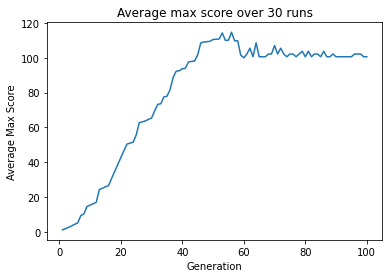

In [13]:
# #fitness curves
x = []
y = []
average_maxes = np.zeros(numGens)
# average_maxes = np.zeros(100)

for i in range(len(gens)):
    for q in range(len(runs_score_track)):
        average_maxes[i] += runs_score_track[q]['maxes'][i]
    average_maxes[i] /= len(runs_score_track)
    
for gen in gens:
    x.append(gen)

# plt.title(f'Average max score over {len(runs_score_track)} runs for {envName}')
plt.title(f'Average max score over {len(runs_score_track)} runs')
plt.xlabel('Generation')
plt.ylabel('Average Max Score')
plt.plot(x, average_maxes)

plt.savefig(f'qtpg/fitness_curves/{plotName}.png')

plt.show()

## Reinforcement Learning + Victory Lap

In [14]:
if load == True:
    runs = 30
    resultsManager = ResultsManager()
    run_winners, loadedQueryTotals, win_loss = resultsManager.load_champions(envName)
    print(loadedQueryTotals)
    run_count = 0
    for run in range(runs):
        if (run_count >= len(run_winners)):
            run_winners.append({'run': run_count, 'winners': []})
        elif run_winners[run]['run'] != run_count:
            run_winners.insert(run_count, {'run': run_count, 'winners': []})
        run_count += 1
    for run in run_winners:
    #     print(run)
        for champ in run['winners']:
            print(champ.id)
else:
    print('not loading!')

not loading!


In [15]:
# team = searchManager.winners[0]
win_loss = []

total_count = 0
fail_count = 0
# team = run_winners[0]['winners'][0]
stuck_count = 0
switch_count = 0
agent_failed = 0
for run in range(runs):
    for team in run_winners[run]['winners']:
        total_count += 1
        stuck_count = 0
        switch_count = 0
        print('NEW CHAMPION!')
        print(f'Run: {run}')
        print(f'Winner: {team.id}')
        team.discount = 0.9
        team.alpha = 0.5
        # for learner in team.learners:
        #     print(learner.program.rule.region)

        # team.prune_single_cell_regions() # don't think this is good...
        team.prune_duplicate_regions()
        print('pruned!')
        # illegal_states = [(2, 0), (2, 1), (3, 1), (1, 3), (2, 3), (3, 3), (1, 4)]
        illegal_states = env.illegal_states
        dimensions = [env.rows, env.cols]

#         print(env.start_state)
#         print(env.win_state)
        for i in range(env.rows):
            agent_failed = 0
        #     print(f'Epoch: {i+1} --------')
        #     env.reset()
            switch_count = 0
            stuck_count = 0
            current_state = env.start_state
#             print(f'curr -> {env.current_state}')
            win = False
            selected_learner = team.select_learner(current_state, [0, 0, 0, 0])
            while not win and stuck_count < 15 and switch_count < 1000:
#             while not win:
        #         win, needs_update, reward, winning_action = team.q_evaluation(env, selected_learner)
                if selected_learner is None:
                    stuck_count += 1
#                     print('nnone!-0')
                else:
                    win, needs_update, reward, winning_action, current_state = team.q_evaluation(current_state, selected_learner, illegal_states, dimensions)
                    if reward is False:
                        break
                        agent_failed = 1
                    print(current_state)
                    if not win:
                        selected_learner = team.select_learner(current_state, selected_learner.program.rule.region)
                        if selected_learner is None:
#                             print('none!?')
                            stuck_count += 1
                        else:
                            team.transition_update(reward, winning_action, needs_update, selected_learner)
                            switch_count += 1
#                             stuck_count = 0
            if stuck_count >= 15:
                print('stuck fail!')
#                 fail_count += 1
                agent_failed = 1
            if switch_count >= 1000:
                print('switch fail!')
#                 fail_count += 1
                agent_failed = 1
            if reward is not False:
                team.final_update(reward, winning_action, needs_update)
            else:
                if agent_failed == 0:
                    fail_count += 1
        print(f'Win? --> {win}')
        win_loss.append(win)
#         for learner in team.learners:
#             print(f'{learner.program.rule.region}')
#             for i in range(len(learner.program.rule.action_set)):
#                   print(f'{learner.program.rule.action_set[i]} --> {learner.program.rule.value_set[i]}')

NEW CHAMPION!
Run: 0
Winner: 436a9636-3345-4a03-ac48-0ae93547fbad
pruned!
(0, 0)
(1, 0)
(7, 0)
(1, 0)
(1, 1)
(3, 1)
(5, 1)
(5, 0)
(7, 0)
(5, 0)
(7, 0)
(1, 0)
(7, 0)
(1, 0)
(1, 1)
(5, 1)
(5, 6)
(5, 0)
(7, 0)
(1, 0)
(1, 1)
(5, 1)
(5, 6)
(5, 0)
(5, 1)
(5, 6)
(0, 6)
(0, 9)
win!
(4, 9)
(0, 0)
(1, 0)
(7, 0)
(1, 0)
(7, 0)
(1, 0)
(1, 1)
(5, 1)
(3, 1)
(3, 3)
(2, 3)
(2, 1)
(5, 1)
(5, 6)
(5, 0)
(7, 0)
(1, 0)
(5, 0)
(5, 1)
(5, 6)
(5, 1)
(5, 6)
(5, 0)
(5, 1)
(5, 6)
(5, 1)
(5, 0)
(1, 0)
(7, 0)
(5, 0)
(7, 0)
(1, 0)
(7, 0)
(1, 0)
(5, 0)
(1, 0)
(1, 1)
(5, 1)
(5, 0)
(5, 6)
(5, 0)
(5, 6)
(0, 6)
(0, 9)
win!
(4, 9)
(2, 3)
(2, 1)
(3, 1)
(5, 1)
(5, 6)
(0, 6)
(0, 9)
win!
(4, 9)
(0, 0)
(5, 0)
(5, 1)
(5, 0)
(7, 0)
(1, 0)
(1, 1)
(3, 1)
(5, 1)
(5, 6)
(5, 0)
(1, 0)
(1, 1)
(3, 1)
(3, 3)
(2, 3)
(2, 1)
(3, 1)
(5, 1)
(5, 6)
(0, 6)
(0, 9)
win!
(4, 9)
(2, 3)
(2, 1)
(5, 1)
(5, 6)
(5, 1)
(5, 6)
(5, 0)
(7, 0)
(5, 0)
(5, 1)
(5, 6)
(5, 1)
(5, 6)
(5, 1)
(3, 1)
(3, 3)
(2, 3)
(2, 1)
(3, 1)
(3, 3)
(2, 3)
(2, 1)
(5, 1)
(3, 1)
(5,

(5, 7)
(5, 1)
(5, 7)
(2, 7)
(2, 9)
win!
(4, 9)
(2, 3)
(2, 1)
(5, 1)
(5, 5)
(5, 7)
(5, 5)
(9, 5)
(9, 3)
(5, 3)
(5, 0)
(7, 0)
(1, 0)
(8, 0)
(4, 0)
(5, 0)
(4, 0)
(7, 0)
(8, 0)
(5, 0)
(4, 0)
(5, 0)
(1, 0)
(8, 0)
(7, 0)
(8, 0)
(5, 0)
(7, 0)
(1, 0)
(4, 0)
(5, 0)
(4, 0)
(7, 0)
(1, 0)
(5, 0)
(5, 1)
(5, 0)
(1, 0)
(7, 0)
(5, 0)
(5, 1)
(5, 0)
(5, 5)
(5, 7)
(5, 5)
(5, 7)
(2, 7)
(2, 9)
win!
(4, 9)
(0, 0)
(1, 0)
(4, 0)
(1, 0)
(7, 0)
(8, 0)
(7, 0)
(4, 0)
(5, 0)
(4, 0)
(7, 0)
(4, 0)
(7, 0)
(4, 0)
(7, 0)
(4, 0)
(7, 0)
(5, 0)
(4, 0)
(8, 0)
(1, 0)
(8, 0)
(4, 0)
(7, 0)
(4, 0)
(1, 0)
(4, 0)
(1, 0)
(4, 0)
(7, 0)
(4, 0)
(7, 0)
(1, 0)
(5, 0)
(4, 0)
(7, 0)
(8, 0)
(4, 0)
(7, 0)
(4, 0)
(7, 0)
(4, 0)
(1, 0)
(5, 0)
(4, 0)
(5, 0)
(5, 1)
(5, 0)
(7, 0)
(4, 0)
(5, 0)
(8, 0)
(5, 0)
(5, 5)
(5, 0)
(7, 0)
(4, 0)
(7, 0)
(5, 0)
(5, 5)
(9, 5)
(9, 3)
(5, 3)
(5, 1)
(3, 1)
(3, 3)
(2, 3)
(2, 1)
(5, 1)
(5, 5)
(5, 7)
(5, 1)
(5, 7)
(5, 0)
(5, 1)
(5, 0)
(5, 5)
(5, 7)
(2, 7)
(2, 9)
win!
(4, 9)
(2, 3)
(2, 1)
(5, 1)
(5, 7)
(5, 0)
(7, 0

(2, 1)
(6, 1)
(9, 1)
(2, 1)
(8, 1)
(8, 2)
(7, 2)
(7, 1)
(3, 1)
(7, 1)
(3, 1)
(2, 1)
(2, 0)
(9, 0)
(5, 0)
(5, 6)
(5, 0)
(9, 0)
(5, 0)
(9, 0)
(5, 0)
(2, 0)
(9, 0)
(4, 0)
(5, 0)
(2, 0)
(9, 0)
(1, 0)
(4, 0)
(1, 0)
(1, 1)
(7, 1)
(6, 1)
(8, 1)
(2, 1)
(2, 0)
(9, 0)
(5, 0)
(5, 6)
(5, 0)
(9, 0)
(4, 0)
(5, 0)
(5, 6)
(5, 0)
(1, 0)
(4, 0)
(5, 0)
(9, 0)
(5, 0)
(2, 0)
(9, 0)
(1, 0)
(9, 0)
(9, 7)
(9, 1)
(2, 1)
(9, 1)
(2, 1)
(2, 0)
(2, 1)
(3, 1)
(2, 1)
(2, 0)
(5, 0)
(2, 0)
(2, 1)
(7, 1)
(3, 1)
(9, 1)
(9, 0)
(2, 0)
(4, 0)
(9, 0)
(2, 0)
(5, 0)
(9, 0)
(9, 1)
(2, 1)
(2, 0)
(2, 1)
(7, 1)
(3, 1)
(2, 1)
(3, 1)
(7, 1)
(3, 1)
(2, 1)
(2, 0)
(1, 0)
(9, 0)
(5, 0)
(9, 0)
(9, 1)
(9, 0)
(2, 0)
(9, 0)
(4, 0)
(5, 0)
(9, 0)
(5, 0)
(5, 6)
(5, 0)
(2, 0)
(9, 0)
(2, 0)
(5, 0)
(9, 0)
(5, 0)
(9, 0)
(5, 0)
(1, 0)
(1, 3)
(2, 3)
(2, 0)
(2, 1)
(6, 1)
(9, 1)
(2, 1)
(2, 0)
(1, 0)
(1, 3)
(2, 3)
(2, 0)
(9, 0)
(2, 0)
(2, 1)
(2, 0)
(1, 0)
(5, 0)
(5, 6)
(2, 6)
(5, 6)
(5, 0)
(4, 0)
(5, 0)
(2, 0)
(5, 0)
(9, 0)
(2, 0)
(5, 0)
(4, 0)
(5, 0)

(5, 6)
(5, 0)
(2, 0)
(4, 0)
(5, 0)
(9, 0)
(9, 7)
(6, 7)
(4, 7)
(6, 7)
(4, 7)
(4, 6)
(5, 6)
(5, 0)
(2, 0)
(2, 1)
(9, 1)
(6, 1)
(2, 1)
(2, 0)
(9, 0)
(2, 0)
(9, 0)
(5, 0)
(2, 0)
(4, 0)
(5, 0)
(4, 0)
(5, 0)
(5, 6)
(1, 6)
(1, 9)
win!
(4, 9)
(2, 3)
(2, 0)
(1, 0)
(5, 0)
(5, 6)
(1, 6)
(5, 6)
(5, 0)
(5, 6)
(1, 6)
(5, 6)
(5, 0)
(2, 0)
(2, 1)
(8, 1)
(7, 1)
(9, 1)
(2, 1)
(7, 1)
(2, 1)
(9, 1)
(2, 1)
(8, 1)
(6, 1)
(8, 1)
(6, 1)
(2, 1)
(6, 1)
(2, 1)
(2, 0)
(9, 0)
(1, 0)
(9, 0)
(9, 7)
(6, 7)
(4, 7)
(4, 6)
(5, 6)
(1, 6)
(2, 6)
(1, 6)
(5, 6)
(5, 0)
(4, 0)
(9, 0)
(2, 0)
(5, 0)
(9, 0)
(9, 1)
(2, 1)
(3, 1)
(8, 1)
(8, 2)
(7, 2)
(7, 1)
(8, 1)
(7, 1)
(2, 1)
(2, 0)
(1, 0)
(9, 0)
(9, 7)
(6, 7)
(4, 7)
(6, 7)
(4, 7)
(4, 6)
(5, 6)
(5, 0)
(9, 0)
(2, 0)
(4, 0)
(5, 0)
(1, 0)
(2, 0)
(2, 1)
(2, 0)
(1, 0)
(9, 0)
(4, 0)
(2, 0)
(1, 0)
(2, 0)
(1, 0)
(9, 0)
(5, 0)
(2, 0)
(9, 0)
(9, 7)
(4, 7)
(4, 6)
(1, 6)
(1, 9)
win!
(4, 9)
(0, 2)
(1, 2)
(1, 1)
(7, 1)
(2, 1)
(9, 1)
(8, 1)
(9, 1)
(7, 1)
(3, 1)
(6, 1)
(9, 1)
(2, 1)
(2, 0)
(1,

(3, 1)
(3, 0)
(4, 0)
(1, 0)
(9, 0)
(5, 0)
(9, 0)
(1, 0)
(5, 0)
(5, 6)
(5, 0)
(9, 0)
(5, 0)
(2, 0)
(2, 1)
(7, 1)
(8, 1)
(2, 1)
(2, 0)
(2, 1)
(2, 0)
(4, 0)
(4, 1)
(6, 1)
(2, 1)
(8, 1)
(8, 2)
(7, 2)
(7, 1)
(6, 1)
(2, 1)
(2, 0)
(2, 1)
(6, 1)
(8, 1)
(2, 1)
(2, 0)
(4, 0)
(9, 0)
(2, 0)
(1, 0)
(4, 0)
(2, 0)
(2, 1)
(9, 1)
(9, 0)
(5, 0)
(2, 0)
(4, 0)
(2, 0)
(9, 0)
(9, 7)
(4, 7)
(6, 7)
(4, 7)
(4, 6)
(5, 6)
(5, 0)
(9, 0)
(2, 0)
(1, 0)
(4, 0)
(4, 1)
(2, 1)
(3, 1)
(7, 1)
(9, 1)
(9, 0)
(1, 0)
(1, 3)
(1, 1)
(8, 1)
(2, 1)
(2, 0)
(5, 0)
(2, 0)
(2, 1)
(2, 0)
(9, 0)
(2, 0)
(1, 0)
(9, 0)
(5, 0)
(2, 0)
(4, 0)
(5, 0)
(4, 0)
(2, 0)
(5, 0)
(5, 6)
(2, 6)
(5, 6)
(2, 6)
(1, 6)
(5, 6)
(2, 6)
(5, 6)
(5, 0)
(9, 0)
(5, 0)
(9, 0)
(5, 0)
(9, 0)
(5, 0)
(5, 6)
(5, 0)
(9, 0)
(2, 0)
(9, 0)
(2, 0)
(2, 1)
(9, 1)
(3, 1)
(7, 1)
(2, 1)
(7, 1)
(8, 1)
(9, 1)
(6, 1)
(2, 1)
(2, 0)
(9, 0)
(9, 1)
(2, 1)
(3, 1)
(6, 1)
(2, 1)
(2, 0)
(1, 0)
(4, 0)
(4, 1)
(9, 1)
(3, 1)
(2, 1)
(6, 1)
(2, 1)
(2, 0)
(2, 1)
(9, 1)
(2, 1)
(2, 0)
(2, 1)
(2, 0)

(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
switch fail!
(0, 1)
(8, 1)
(7, 1)
(7, 0)
(0, 0)
(4, 0)
(5, 0)
(4, 0)
(0, 0)
(0, 3)
(0, 1)
(6, 1)
(6, 2)
(8, 2)
(9, 2)
(9, 9)
(9, 2)
(9, 0)
(0, 0)
(0, 4)
(0, 1)
(8, 1)
(6, 1)
(6, 4)
(6, 2)
(6, 4)
(6, 2)
(9, 2)
(9, 9)
(9, 2)
(9, 4)
(9, 2)
(8, 2)
(6, 2)
(9, 2)
(9, 0)
(9, 4)
(7, 4)
(9, 4)
(9, 9)
(9, 4)
(7, 4)
(9, 4)
(9, 0)
(4, 0)
(5, 0)
(0, 0)
(0, 3)
(2, 3)
(2, 1)
(6, 1)
(8, 1)
(6, 1)
(6, 4)
(9, 4)
(9, 9)
(9, 0)
(4, 0)
(5, 0)
(0, 0)
(4, 0)
(0, 0)
(5, 0)
(0, 0)
(4, 0)
(0, 0)
(0, 1)
(7, 1)
(6, 1)
(6, 2)
(9, 2)
(9, 0)
(4, 0)
(5, 0)
(4, 0)
(5, 0)
(0, 0)
(0, 1)
(8, 1)
(8, 2)
(9, 2)
(8, 2)
(9, 2)
(9, 4)
(9, 0)
(9, 2)
(6, 2)
(8, 2)
(8, 1)
(8, 2)
(8, 1)
(7, 1)
(8, 1)
(6, 1)
(6, 4)
(6, 2)
(8, 2)
(9, 2)
(8, 2)
(6, 2)
(6, 4)
(6, 2)
(9, 2)
(6, 2)
(8, 2)
(6, 2)
(6, 4)
(9, 4)


(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)

pruned!
(0, 1)
(6, 1)
(6, 2)
(6, 4)
(7, 4)
(9, 4)
(7, 4)
(7, 0)
(4, 0)
(5, 0)
(4, 0)
(5, 0)
(4, 0)
(0, 0)
(4, 0)
(0, 0)
(0, 4)
(0, 1)
(0, 4)
(0, 3)
(0, 4)
(0, 1)
(8, 1)
(6, 1)
(8, 1)
(6, 1)
(6, 2)
(9, 2)
(9, 0)
(4, 0)
(0, 0)
(0, 4)
(0, 3)
(0, 1)
(0, 3)
(0, 4)
(0, 1)
(0, 3)
(0, 1)
(8, 1)
(7, 1)
(8, 1)
(6, 1)
(6, 2)
(9, 2)
(9, 8)
(9, 2)
(9, 4)
(7, 4)
(9, 4)
(7, 4)
(7, 2)
(7, 0)
(5, 0)
(0, 0)
(4, 0)
(0, 0)
(5, 0)
(0, 0)
(0, 1)
(0, 3)
(0, 4)
(0, 3)
(2, 3)
(2, 1)
(8, 1)
(6, 1)
(8, 1)
(6, 1)
(6, 2)
(9, 2)
(9, 4)
(9, 9)
(9, 0)
(9, 2)
(8, 2)
(8, 1)
(7, 1)
(7, 2)
(8, 2)
(8, 1)
(8, 2)
(9, 2)
(8, 2)
(6, 2)
(9, 2)
(9, 9)
(9, 8)
(9, 0)
(9, 2)
(8, 2)
(9, 2)
(6, 2)
(8, 2)
(6, 2)
(9, 2)
(9, 0)
(9, 4)
(9, 9)
(9, 2)
(9, 4)
(7, 4)
(9, 4)
(7, 4)
(7, 0)
(0, 0)
(0, 4)
(0, 1)
(6, 1)
(7, 1)
(7, 0)
(7, 2)
(9, 2)
(6, 2)
(6, 4)
(9, 4)
(9, 9)
(9, 0)
(9, 2)
(9, 0)
(9, 9)
(9, 2)
(9, 4)
(9, 2)
(9, 4)
(9, 9)
(9, 4)
(9, 9)
(9, 4)
(9, 2)
(9, 4)
(9, 2)
(9, 0)
(9, 9)
(9, 4)
(9, 0)
(9, 9)
(9, 4)
(9, 8)
(6, 8)
(9, 8)
(9, 4

(0, 1)
(7, 1)
(7, 0)
(2, 0)
(9, 0)
(9, 1)
(9, 5)
(9, 3)
(9, 7)
(9, 1)
(9, 7)
(9, 5)
(9, 3)
(9, 5)
(9, 1)
(9, 5)
(9, 3)
(9, 7)
(9, 3)
(9, 5)
(9, 7)
(9, 1)
(9, 7)
(2, 7)
(2, 9)
(1, 9)
eek!
stuck fail!
Win? --> False
NEW CHAMPION!
Run: 5
Winner: 42ea690c-7396-4473-8b21-74741d1a4531
pruned!
(0, 1)
(8, 1)
(8, 0)
(8, 2)
(8, 0)
(5, 0)
(9, 0)
(9, 1)
(9, 7)
(9, 1)
(8, 1)
(7, 1)
(8, 1)
(8, 2)
(8, 0)
(2, 0)
(0, 0)
(5, 0)
(2, 0)
(9, 0)
(9, 7)
(9, 5)
(9, 1)
(9, 5)
(9, 3)
(9, 5)
(9, 7)
(9, 3)
(9, 1)
(9, 5)
(9, 7)
(9, 5)
(9, 1)
(6, 1)
(8, 1)
(7, 1)
(6, 1)
(8, 1)
(7, 1)
(8, 1)
(8, 0)
(0, 0)
(5, 0)
(5, 1)
(8, 1)
(6, 1)
(8, 1)
(9, 1)
(9, 7)
(9, 1)
(9, 7)
(9, 5)
(9, 7)
(9, 5)
(9, 3)
(9, 1)
(8, 1)
(9, 1)
(6, 1)
(7, 1)
(8, 1)
(6, 1)
(8, 1)
(9, 1)
(9, 3)
(9, 7)
(9, 3)
(9, 1)
(8, 1)
(8, 2)
(9, 2)
(9, 5)
(9, 7)
(9, 1)
(8, 1)
(7, 1)
(6, 1)
(7, 1)
(6, 1)
(8, 1)
(9, 1)
(7, 1)
(6, 1)
(8, 1)
(7, 1)
(8, 1)
(8, 2)
(8, 0)
(0, 0)
(0, 3)
(1, 3)
(1, 0)
(0, 0)
(0, 1)
(7, 1)
(6, 1)
(9, 1)
(9, 5)
(9, 3)
(9, 1)
(8, 1)
(6, 1

win!
(4, 9)
(0, 4)
(1, 4)
(1, 3)
(1, 4)
(1, 0)
(5, 0)
(1, 0)
(1, 4)
(3, 4)
(1, 4)
(1, 0)
(1, 4)
(1, 3)
(1, 4)
(1, 0)
(1, 3)
(1, 0)
(1, 3)
(1, 4)
(3, 4)
(3, 0)
(5, 0)
(1, 0)
(1, 3)
(1, 0)
(1, 4)
(1, 3)
(1, 4)
(1, 3)
(1, 0)
(1, 4)
(1, 3)
(1, 0)
(1, 4)
(1, 3)
(1, 4)
(1, 3)
(1, 0)
(5, 0)
(5, 3)
(9, 3)
(9, 7)
(9, 1)
(9, 5)
(9, 1)
(9, 7)
(9, 3)
(9, 1)
(9, 5)
(9, 3)
(9, 7)
(9, 5)
(9, 1)
(9, 3)
(9, 5)
(9, 3)
(9, 1)
(9, 7)
(3, 7)
(0, 7)
(0, 9)
win!
(4, 9)
(1, 3)
(1, 4)
(1, 3)
(1, 4)
(1, 0)
(1, 3)
(1, 4)
(1, 3)
(1, 4)
(1, 3)
(1, 4)
(1, 0)
(5, 0)
(1, 0)
(5, 0)
(1, 0)
(1, 4)
(1, 3)
(1, 4)
(3, 4)
(3, 0)
(5, 0)
(5, 3)
(9, 3)
(9, 1)
(9, 7)
(3, 7)
(0, 7)
(0, 9)
win!
(4, 9)
(0, 4)
(3, 4)
(3, 0)
(5, 0)
(5, 3)
(9, 3)
(9, 7)
(9, 1)
(9, 3)
(9, 1)
(9, 7)
(0, 7)
(0, 9)
win!
(4, 9)
(1, 3)
(1, 0)
(1, 4)
(1, 0)
(1, 3)
(1, 4)
(1, 3)
(1, 0)
(1, 4)
(1, 0)
(1, 4)
(1, 0)
(5, 0)
(5, 3)
(9, 3)
(9, 7)
(9, 5)
(9, 1)
(9, 3)
(9, 5)
(9, 3)
(9, 1)
(9, 3)
(9, 5)
(9, 1)
(9, 5)
(9, 3)
(9, 5)
(9, 3)
(9, 5)
(9, 7)
(0, 7)
(0, 9)


(5, 6)
(5, 3)
(5, 6)
(5, 3)
(5, 6)
(5, 5)
(9, 5)
(9, 7)
(8, 7)
(8, 9)
(9, 9)
(9, 7)
(2, 7)
(5, 7)
(5, 6)
(5, 5)
(5, 3)
(5, 6)
(5, 5)
(5, 3)
(5, 5)
(9, 5)
(9, 7)
(2, 7)
(2, 6)
(5, 6)
(0, 6)
(0, 7)
(8, 7)
(2, 7)
(2, 9)
win!
(4, 9)
(0, 2)
(3, 2)
(3, 0)
(5, 0)
(5, 6)
(0, 6)
(5, 6)
(5, 3)
(5, 6)
(5, 3)
(5, 5)
(5, 3)
(5, 6)
(5, 5)
(5, 6)
(5, 3)
(5, 6)
(0, 6)
(0, 7)
(5, 7)
(5, 5)
(5, 6)
(5, 5)
(9, 5)
(9, 7)
(5, 7)
(5, 6)
(5, 3)
(5, 6)
(5, 3)
(5, 6)
(2, 6)
(2, 9)
win!
(4, 9)
(0, 2)
(3, 2)
(3, 0)
(5, 0)
(5, 5)
(5, 6)
(2, 6)
(5, 6)
(2, 6)
(0, 6)
(0, 7)
(5, 7)
(5, 3)
(5, 6)
(5, 3)
(5, 6)
(0, 6)
(0, 7)
(5, 7)
(2, 7)
(8, 7)
(8, 9)
(9, 9)
(9, 7)
(8, 7)
(5, 7)
(2, 7)
(2, 6)
(5, 6)
(0, 6)
(0, 7)
(2, 7)
(8, 7)
(8, 9)
(9, 9)
(9, 7)
(2, 7)
(2, 9)
win!
(4, 9)
(0, 2)
(3, 2)
(3, 0)
(5, 0)
(5, 5)
(5, 6)
(0, 6)
(5, 6)
(0, 6)
(0, 7)
(8, 7)
(5, 7)
(5, 3)
(5, 6)
(2, 6)
(2, 9)
(2, 6)
(2, 9)
win!
(4, 9)
(0, 2)
(3, 2)
(3, 0)
(5, 0)
(5, 6)
(0, 6)
(5, 6)
(2, 6)
(2, 9)
(2, 6)
(0, 6)
(2, 6)
(2, 9)
(2, 6)
(5, 6)
(0, 6)


(6, 1)
(7, 1)
(4, 1)
(7, 1)
(7, 0)
(9, 0)
(5, 0)
(5, 2)
(7, 2)
(7, 0)
(9, 0)
(9, 7)
(5, 7)
(5, 2)
(5, 7)
(5, 2)
(6, 2)
(7, 2)
(7, 0)
(7, 1)
(7, 0)
(5, 0)
(9, 0)
(9, 2)
(9, 3)
(9, 2)
(6, 2)
(6, 5)
(6, 1)
(0, 1)
(0, 0)
(9, 0)
(1, 0)
(1, 1)
(4, 1)
(7, 1)
(7, 0)
(7, 1)
(9, 1)
(7, 1)
(7, 0)
(9, 0)
(9, 7)
(9, 0)
(9, 3)
(9, 7)
(9, 3)
(9, 2)
(7, 2)
(6, 2)
(6, 5)
(6, 1)
(4, 1)
(6, 1)
(7, 1)
(7, 0)
(7, 1)
(4, 1)
(9, 1)
(9, 2)
(9, 3)
(9, 1)
(6, 1)
(9, 1)
(0, 1)
(7, 1)
(6, 1)
(7, 1)
(9, 1)
(7, 1)
(0, 1)
(6, 1)
(9, 1)
(4, 1)
(0, 1)
(7, 1)
(6, 1)
(6, 5)
(6, 1)
(9, 1)
(9, 3)
(9, 2)
(7, 2)
(7, 1)
(7, 0)
(9, 0)
(1, 0)
(9, 0)
(9, 3)
(9, 0)
(9, 3)
(6, 3)
(6, 1)
(4, 1)
(4, 0)
(9, 0)
(9, 2)
(6, 2)
(7, 2)
(7, 0)
(9, 0)
(9, 1)
(9, 7)
(9, 3)
(9, 1)
(9, 3)
(9, 2)
(9, 0)
(9, 3)
(7, 3)
(9, 3)
(9, 7)
(9, 3)
(9, 0)
(9, 3)
(9, 0)
(9, 2)
(6, 2)
(6, 3)
(6, 1)
(6, 5)
(6, 3)
(7, 3)
(9, 3)
(9, 1)
(9, 2)
(9, 7)
(1, 7)
(5, 7)
(1, 7)
(5, 7)
(1, 7)
(5, 7)
(1, 7)
(1, 9)
(0, 9)
eek!
stuck fail!
(0, 1)
(4, 1)
(0, 1)
(0, 0)
(5,

(9, 9)
(9, 0)
(6, 0)
(6, 2)
(9, 2)
(9, 7)
(9, 0)
(6, 0)
(6, 2)
(9, 2)
(9, 9)
(9, 7)
(0, 7)
(0, 9)
win!
(4, 9)
(1, 3)
(1, 0)
(8, 0)
(6, 0)
(8, 0)
(8, 2)
(9, 2)
(9, 0)
(9, 9)
(9, 0)
(9, 7)
(1, 7)
(1, 6)
(2, 6)
(2, 7)
(1, 7)
(1, 6)
(2, 6)
(2, 7)
(1, 7)
(1, 6)
(2, 6)
(2, 7)
(1, 7)
(0, 7)
(1, 7)
(1, 6)
(2, 6)
(2, 7)
(1, 7)
(1, 6)
(2, 6)
(2, 7)
(1, 7)
(0, 7)
(0, 9)
win!
(4, 9)
(1, 3)
(1, 0)
(8, 0)
(6, 0)
(8, 0)
(6, 0)
(6, 2)
(9, 2)
(9, 0)
(9, 9)
(9, 7)
(0, 7)
(1, 7)
(0, 7)
(0, 9)
win!
(4, 9)
(1, 3)
(1, 0)
(6, 0)
(8, 0)
(8, 2)
(9, 2)
(9, 0)
(6, 0)
(8, 0)
(6, 0)
(8, 0)
(8, 2)
(9, 2)
(9, 9)
(9, 0)
(6, 0)
(8, 0)
(8, 2)
(9, 2)
(9, 0)
(9, 7)
(0, 7)
(0, 9)
win!
(4, 9)
(1, 3)
(1, 0)
(6, 0)
(8, 0)
(8, 2)
(9, 2)
(9, 7)
(0, 7)
(1, 7)
(0, 7)
(1, 7)
(1, 6)
(2, 6)
(2, 7)
(1, 7)
(0, 7)
(0, 9)
win!
(4, 9)
(1, 3)
(1, 0)
(8, 0)
(8, 2)
(9, 2)
(9, 7)
(9, 9)
(9, 0)
(6, 0)
(8, 0)
(8, 2)
(9, 2)
(9, 7)
(9, 0)
(6, 0)
(6, 2)
(9, 2)
(9, 0)
(9, 9)
(9, 7)
(9, 9)
(9, 7)
(9, 0)
(8, 0)
(6, 0)
(6, 2)
(9, 2)
(9, 7)
(1, 7)
(1

(8, 0)
(8, 2)
(6, 2)
(5, 2)
(5, 6)
(5, 7)
(5, 4)
(5, 7)
(5, 2)
(6, 2)
(5, 2)
(5, 7)
(5, 4)
(5, 7)
(5, 6)
(5, 7)
(5, 2)
(5, 4)
(5, 7)
(5, 4)
(5, 6)
(5, 4)
(9, 4)
(9, 7)
(5, 7)
(5, 4)
(5, 7)
(5, 6)
(5, 3)
(5, 7)
(5, 4)
(5, 3)
(5, 7)
(1, 7)
(5, 7)
(5, 4)
(5, 2)
(5, 7)
(5, 4)
(5, 7)
(5, 3)
(5, 6)
(5, 4)
(5, 7)
(5, 6)
(5, 7)
(5, 2)
(5, 7)
(5, 2)
(5, 3)
(5, 7)
(5, 2)
(5, 4)
(5, 3)
(5, 7)
(5, 6)
(5, 3)
(5, 6)
(5, 2)
(5, 4)
(5, 7)
(5, 6)
(5, 7)
(1, 7)
(1, 6)
(3, 6)
(1, 6)
(3, 6)
(1, 6)
(5, 6)
(1, 6)
(5, 6)
(5, 3)
(9, 3)
(9, 9)
(9, 0)
(6, 0)
(5, 0)
(5, 3)
(5, 7)
(5, 3)
(5, 7)
(5, 2)
(5, 7)
(5, 6)
(1, 6)
(1, 9)
(1, 6)
(5, 6)
(5, 7)
(5, 2)
(5, 7)
(5, 4)
(5, 7)
(5, 6)
(5, 7)
(5, 6)
(5, 7)
(5, 6)
(5, 3)
(5, 7)
(5, 3)
(5, 2)
(5, 7)
(5, 3)
(5, 6)
(5, 4)
(9, 4)
(9, 0)
(5, 0)
(5, 7)
(5, 2)
(5, 7)
(1, 7)
(1, 9)
(1, 6)
(5, 6)
(5, 4)
(5, 2)
(5, 7)
(5, 6)
(5, 4)
(9, 4)
(9, 0)
(9, 7)
(5, 7)
(5, 3)
(5, 7)
(5, 6)
(5, 3)
(5, 6)
(5, 2)
(9, 2)
(5, 2)
(5, 3)
(5, 6)
(5, 7)
(5, 6)
(1, 6)
(3, 6)
(1, 6)
(5, 6)
(5, 4)

(6, 2)
(6, 0)
(8, 0)
(6, 0)
(6, 2)
(9, 2)
(9, 0)
(6, 0)
(6, 2)
(6, 0)
(5, 0)
(5, 7)
(5, 3)
(5, 4)
(5, 3)
(5, 7)
(1, 7)
(5, 7)
(5, 3)
(5, 7)
(5, 4)
(5, 3)
(5, 4)
(5, 2)
(9, 2)
(9, 0)
(6, 0)
(6, 2)
(9, 2)
(5, 2)
(5, 4)
(5, 7)
(5, 6)
(5, 3)
(5, 7)
(5, 3)
(5, 6)
(5, 7)
(5, 3)
(5, 7)
(5, 4)
(5, 3)
(5, 6)
(1, 6)
(5, 6)
(5, 3)
(5, 4)
(5, 6)
(5, 7)
(5, 6)
(5, 7)
(5, 2)
(5, 6)
(5, 3)
(5, 7)
(5, 3)
(5, 6)
(1, 6)
(5, 6)
(3, 6)
(3, 7)
(5, 7)
(5, 2)
(5, 4)
(5, 3)
(5, 2)
(5, 3)
(5, 7)
(5, 6)
(5, 7)
(1, 7)
(1, 9)
(0, 9)
eek!
stuck fail!
(1, 3)
(1, 0)
(6, 0)
(8, 0)
(8, 3)
(9, 3)
(5, 3)
(5, 4)
(9, 4)
(5, 4)
(5, 7)
(5, 3)
(5, 7)
(5, 4)
(5, 7)
(5, 4)
(9, 4)
(9, 0)
(9, 7)
(5, 7)
(5, 2)
(5, 7)
(5, 2)
(5, 4)
(5, 7)
(1, 7)
(5, 7)
(5, 2)
(5, 7)
(5, 4)
(5, 6)
(1, 6)
(1, 9)
(1, 6)
(1, 9)
(0, 9)
eek!
stuck fail!
Win? --> False
NEW CHAMPION!
Run: 13
Winner: d3f722ce-6c12-4065-ae35-344eef09099e
pruned!
(1, 3)
(1, 0)
(8, 0)
(8, 2)
(5, 2)
(6, 2)
(5, 2)
(5, 7)
(5, 2)
(5, 4)
(5, 7)
(1, 7)
(1, 6)
(1, 7)
(5, 7)
(5, 4)
(

(5, 4)
(5, 7)
(5, 4)
(5, 6)
(5, 3)
(5, 4)
(5, 7)
(5, 3)
(5, 6)
(5, 7)
(1, 7)
(5, 7)
(1, 7)
(5, 7)
(1, 7)
(5, 7)
(5, 6)
(5, 7)
(1, 7)
(5, 7)
(5, 6)
(5, 3)
(5, 7)
(5, 6)
(5, 2)
(5, 6)
(1, 6)
(1, 7)
(5, 7)
(5, 4)
(5, 6)
(5, 3)
(5, 7)
(5, 3)
(5, 7)
(5, 6)
(5, 4)
(5, 3)
(5, 7)
(5, 4)
(5, 7)
(5, 6)
(5, 4)
(5, 6)
(5, 3)
(5, 4)
(5, 7)
(5, 4)
(5, 3)
(5, 7)
(5, 6)
(5, 7)
(5, 6)
(3, 6)
(5, 6)
(5, 3)
(5, 4)
(5, 7)
(5, 6)
(5, 7)
(5, 4)
(5, 7)
(1, 7)
(5, 7)
(5, 4)
(5, 7)
(5, 6)
(5, 3)
(5, 7)
(1, 7)
(5, 7)
(5, 6)
(5, 2)
(9, 2)
(6, 2)
(9, 2)
(5, 2)
(5, 3)
(5, 7)
(1, 7)
(5, 7)
(5, 4)
(5, 7)
(5, 6)
(5, 3)
(5, 4)
(9, 4)
(9, 9)
(9, 0)
(6, 0)
(6, 2)
(9, 2)
(6, 2)
(9, 2)
(9, 9)
(9, 7)
(9, 0)
(9, 9)
(9, 0)
(8, 0)
(8, 3)
(8, 2)
(6, 2)
(6, 0)
(8, 0)
(5, 0)
(5, 7)
(1, 7)
(5, 7)
(5, 3)
(5, 4)
(5, 2)
(5, 7)
(5, 4)
(5, 6)
(5, 7)
(5, 4)
(5, 2)
(5, 3)
(5, 4)
(5, 2)
(6, 2)
(9, 2)
(6, 2)
(9, 2)
(5, 2)
(5, 4)
(5, 2)
(5, 6)
(5, 7)
(5, 3)
(5, 7)
(5, 3)
(5, 4)
(5, 7)
(5, 4)
(5, 7)
(5, 3)
(5, 7)
(1, 7)
(5, 7)
(5, 3)
(5, 6)

(1, 9)
(1, 6)
(1, 7)
(5, 7)
(5, 6)
(5, 7)
(5, 6)
(5, 7)
(5, 3)
(5, 6)
(5, 7)
(5, 3)
(5, 7)
(5, 3)
(9, 3)
(5, 3)
(5, 6)
(5, 4)
(5, 3)
(5, 6)
(1, 6)
(5, 6)
(5, 7)
(5, 3)
(5, 6)
(1, 6)
(5, 6)
(5, 7)
(5, 6)
(1, 6)
(5, 6)
(1, 6)
(5, 6)
(5, 7)
(5, 3)
(5, 7)
(5, 3)
(5, 7)
(5, 3)
(9, 3)
(9, 0)
(9, 7)
(5, 7)
(5, 6)
(5, 7)
(5, 2)
(9, 2)
(9, 9)
(9, 7)
(5, 7)
(5, 3)
(5, 7)
(1, 7)
(5, 7)
(5, 2)
(5, 4)
(9, 4)
(9, 2)
(5, 2)
(5, 6)
(5, 7)
(1, 7)
(1, 9)
(1, 7)
(5, 7)
(5, 3)
(5, 2)
(5, 6)
(5, 7)
(1, 7)
(5, 7)
(5, 6)
(5, 4)
(5, 6)
(5, 3)
(5, 7)
(1, 7)
(5, 7)
(5, 4)
(5, 3)
(5, 4)
(5, 7)
(5, 6)
(5, 7)
(5, 6)
(5, 7)
(5, 6)
(5, 7)
(1, 7)
(5, 7)
(5, 4)
(5, 3)
(5, 7)
(5, 6)
(5, 7)
(1, 7)
(5, 7)
(1, 7)
(1, 6)
(1, 9)
(1, 6)
(5, 6)
(5, 3)
(5, 7)
(5, 4)
(5, 2)
(5, 3)
(5, 7)
(5, 4)
(5, 6)
(5, 2)
(9, 2)
(6, 2)
(6, 0)
(8, 0)
(5, 0)
(5, 7)
(5, 4)
(5, 2)
(5, 4)
(5, 7)
(5, 6)
(5, 3)
(5, 6)
(5, 4)
(9, 4)
(5, 4)
(5, 7)
(5, 6)
(5, 4)
(5, 7)
(5, 6)
(3, 6)
(1, 6)
(1, 9)
(1, 6)
(5, 6)
(5, 7)
(5, 4)
(5, 7)
(1, 7)
(5, 7)
(5, 3)

(5, 7)
(5, 6)
(5, 3)
(5, 6)
(3, 6)
(1, 6)
(1, 7)
(5, 7)
(1, 7)
(5, 7)
(5, 4)
(9, 4)
(9, 9)
(9, 2)
(5, 2)
(9, 2)
(5, 2)
(5, 3)
(9, 3)
(9, 0)
(9, 9)
(9, 7)
(1, 7)
(5, 7)
(5, 4)
(9, 4)
(9, 7)
(9, 0)
(9, 9)
(9, 0)
(8, 0)
(5, 0)
(5, 7)
(5, 2)
(5, 7)
(1, 7)
(1, 6)
(1, 9)
win!
(4, 9)
(1, 3)
(1, 0)
(5, 0)
(5, 3)
(5, 6)
(5, 7)
(5, 6)
(5, 7)
(5, 3)
(5, 6)
(5, 7)
(5, 3)
(5, 6)
(5, 4)
(5, 6)
(5, 7)
(5, 6)
(5, 4)
(5, 6)
(5, 3)
(5, 7)
(5, 3)
(5, 2)
(5, 6)
(5, 4)
(5, 7)
(5, 3)
(5, 6)
(5, 2)
(5, 3)
(5, 2)
(5, 7)
(5, 4)
(5, 3)
(5, 4)
(5, 3)
(5, 2)
(9, 2)
(9, 7)
(5, 7)
(5, 3)
(5, 7)
(5, 6)
(5, 3)
(5, 7)
(5, 4)
(5, 6)
(5, 4)
(5, 7)
(5, 6)
(5, 7)
(5, 3)
(5, 6)
(5, 2)
(9, 2)
(9, 0)
(8, 0)
(8, 2)
(9, 2)
(5, 2)
(5, 7)
(1, 7)
(1, 6)
(1, 9)
(1, 7)
(5, 7)
(5, 2)
(5, 6)
(5, 7)
(5, 4)
(5, 7)
(5, 6)
(5, 4)
(5, 3)
(5, 4)
(5, 6)
(5, 4)
(5, 7)
(1, 7)
(5, 7)
(1, 7)
(5, 7)
(5, 3)
(9, 3)
(9, 2)
(9, 7)
(9, 0)
(8, 0)
(6, 0)
(8, 0)
(5, 0)
(5, 4)
(9, 4)
(5, 4)
(5, 7)
(5, 6)
(5, 7)
(5, 6)
(5, 3)
(5, 2)
(6, 2)
(5, 2)
(5, 4)
(

(5, 4)
(5, 7)
(1, 7)
(5, 7)
(5, 6)
(5, 3)
(5, 4)
(9, 4)
(9, 0)
(8, 0)
(8, 3)
(5, 3)
(5, 7)
(5, 6)
(5, 7)
(1, 7)
(5, 7)
(1, 7)
(5, 7)
(5, 4)
(5, 2)
(5, 7)
(1, 7)
(5, 7)
(1, 7)
(5, 7)
(1, 7)
(5, 7)
(1, 7)
(1, 9)
win!
(4, 9)
Win? --> True
NEW CHAMPION!
Run: 13
Winner: c66787c5-e524-4561-885d-dd97cb796105
pruned!
(1, 3)
(1, 0)
(5, 0)
(5, 3)
(5, 7)
(5, 4)
(5, 6)
(5, 3)
(5, 7)
(1, 7)
(5, 7)
(5, 3)
(5, 7)
(5, 3)
(5, 6)
(5, 3)
(5, 4)
(5, 3)
(5, 7)
(5, 6)
(5, 3)
(5, 6)
(5, 7)
(1, 7)
(5, 7)
(5, 6)
(5, 7)
(5, 6)
(5, 3)
(5, 6)
(5, 7)
(5, 3)
(5, 6)
(5, 4)
(5, 2)
(6, 2)
(9, 2)
(9, 7)
(5, 7)
(5, 4)
(5, 7)
(5, 6)
(1, 6)
(5, 6)
(5, 7)
(5, 6)
(5, 3)
(5, 7)
(5, 4)
(5, 7)
(5, 4)
(5, 3)
(5, 7)
(5, 3)
(5, 4)
(9, 4)
(5, 4)
(5, 6)
(5, 7)
(1, 7)
(5, 7)
(5, 4)
(5, 3)
(5, 6)
(5, 3)
(5, 7)
(5, 6)
(5, 4)
(5, 6)
(5, 7)
(5, 4)
(5, 7)
(5, 2)
(5, 7)
(5, 3)
(5, 7)
(5, 4)
(5, 6)
(5, 7)
(1, 7)
(5, 7)
(5, 6)
(5, 2)
(9, 2)
(9, 0)
(9, 2)
(6, 2)
(9, 2)
(5, 2)
(6, 2)
(6, 0)
(6, 2)
(9, 2)
(9, 9)
(9, 7)
(1, 7)
(5, 7)
(5, 2)
(5,

(6, 0)
(6, 2)
(9, 2)
(9, 9)
(9, 0)
(8, 0)
(6, 0)
(5, 0)
(5, 7)
(1, 7)
(1, 9)
(1, 7)
(5, 7)
(5, 4)
(5, 7)
(5, 3)
(5, 6)
(5, 2)
(5, 4)
(9, 4)
(9, 0)
(8, 0)
(5, 0)
(8, 0)
(8, 2)
(8, 3)
(5, 3)
(5, 6)
(5, 3)
(5, 4)
(9, 4)
(9, 9)
(9, 2)
(9, 0)
(5, 0)
(5, 7)
(1, 7)
(1, 9)
(0, 9)
eek!
stuck fail!
(1, 3)
(1, 0)
(5, 0)
(5, 4)
(5, 7)
(5, 6)
(5, 2)
(5, 3)
(5, 7)
(1, 7)
(5, 7)
(5, 3)
(5, 6)
(5, 4)
(5, 3)
(5, 4)
(5, 6)
(5, 7)
(5, 2)
(5, 4)
(5, 7)
(5, 4)
(5, 2)
(5, 6)
(5, 7)
(5, 6)
(5, 7)
(5, 3)
(5, 4)
(5, 7)
(5, 6)
(5, 2)
(5, 7)
(5, 2)
(5, 4)
(5, 7)
(1, 7)
(5, 7)
(1, 7)
(1, 6)
(3, 6)
(1, 6)
(5, 6)
(3, 6)
(3, 7)
(5, 7)
(5, 3)
(5, 2)
(5, 7)
(5, 4)
(5, 7)
(5, 3)
(5, 7)
(5, 4)
(5, 6)
(1, 6)
(1, 7)
(1, 9)
(1, 6)
(3, 6)
(1, 6)
(1, 7)
(5, 7)
(5, 2)
(5, 7)
(5, 4)
(5, 7)
(5, 3)
(9, 3)
(9, 9)
(9, 2)
(9, 9)
(9, 7)
(5, 7)
(1, 7)
(5, 7)
(5, 4)
(5, 7)
(5, 4)
(9, 4)
(9, 0)
(9, 2)
(9, 7)
(9, 2)
(9, 9)
(9, 7)
(5, 7)
(5, 4)
(9, 4)
(9, 2)
(6, 2)
(5, 2)
(5, 7)
(5, 4)
(5, 7)
(5, 3)
(5, 7)
(1, 7)
(1, 9)
(1, 7)
(1, 9)
(1,

(5, 4)
(5, 6)
(5, 4)
(5, 6)
(5, 7)
(1, 7)
(1, 6)
(1, 7)
(5, 7)
(5, 4)
(5, 7)
(5, 6)
(5, 7)
(5, 3)
(5, 2)
(9, 2)
(9, 7)
(1, 7)
(5, 7)
(1, 7)
(5, 7)
(5, 3)
(5, 7)
(5, 3)
(5, 7)
(5, 4)
(5, 3)
(5, 4)
(5, 3)
(5, 4)
(5, 7)
(5, 6)
(3, 6)
(5, 6)
(5, 2)
(6, 2)
(9, 2)
(9, 0)
(5, 0)
(5, 4)
(5, 7)
(5, 3)
(5, 7)
(5, 6)
(5, 4)
(5, 6)
(1, 6)
(3, 6)
(3, 7)
(5, 7)
(5, 6)
(5, 3)
(9, 3)
(9, 7)
(1, 7)
(5, 7)
(5, 4)
(5, 6)
(5, 7)
(5, 6)
(5, 7)
(1, 7)
(5, 7)
(5, 2)
(9, 2)
(9, 0)
(6, 0)
(8, 0)
(8, 2)
(9, 2)
(9, 0)
(9, 7)
(9, 0)
(9, 7)
(5, 7)
(1, 7)
(5, 7)
(5, 2)
(5, 7)
(5, 3)
(5, 7)
(5, 3)
(5, 2)
(5, 3)
(9, 3)
(9, 2)
(5, 2)
(5, 7)
(5, 3)
(5, 4)
(5, 2)
(5, 4)
(5, 7)
(5, 3)
(5, 4)
(5, 3)
(5, 7)
(5, 4)
(9, 4)
(9, 0)
(9, 7)
(5, 7)
(5, 4)
(5, 3)
(9, 3)
(5, 3)
(5, 7)
(5, 6)
(5, 7)
(5, 6)
(1, 6)
(5, 6)
(5, 7)
(5, 2)
(5, 6)
(1, 6)
(1, 9)
(1, 6)
(3, 6)
(5, 6)
(5, 7)
(5, 4)
(5, 6)
(5, 7)
(5, 4)
(5, 7)
(5, 3)
(9, 3)
(9, 9)
(9, 0)
(8, 0)
(8, 2)
(9, 2)
(5, 2)
(5, 4)
(5, 7)
(5, 3)
(5, 2)
(5, 6)
(5, 7)
(1, 7)
(5, 7)
(1, 7)

(9, 7)
(5, 7)
(5, 5)
(5, 7)
(5, 6)
(5, 0)
(5, 3)
(5, 4)
(5, 0)
(9, 0)
(6, 0)
(4, 0)
(7, 0)
(5, 0)
(5, 5)
(5, 0)
(5, 7)
(2, 7)
(5, 7)
(5, 3)
(5, 5)
(5, 3)
(7, 3)
(7, 1)
(3, 1)
(7, 1)
(1, 1)
(3, 1)
(7, 1)
(4, 1)
(1, 1)
(3, 1)
(4, 1)
(4, 0)
(9, 0)
(7, 0)
(7, 4)
(7, 0)
(6, 0)
(6, 5)
(5, 5)
(5, 7)
(5, 5)
(9, 5)
(9, 3)
(9, 7)
(5, 7)
(5, 3)
(7, 3)
(5, 3)
(7, 3)
(7, 0)
(6, 0)
(6, 2)
(6, 0)
(5, 0)
(6, 0)
(6, 2)
(9, 2)
(9, 1)
(1, 1)
(7, 1)
(3, 1)
(4, 1)
(7, 1)
(7, 4)
(5, 4)
(5, 0)
(0, 0)
(6, 0)
(5, 0)
(9, 0)
(9, 3)
(5, 3)
(5, 0)
(5, 5)
(5, 3)
(5, 0)
(5, 7)
(2, 7)
(5, 7)
(5, 0)
(6, 0)
(6, 5)
(6, 0)
(9, 0)
(9, 1)
(4, 1)
(1, 1)
(7, 1)
(1, 1)
(3, 1)
(1, 1)
(3, 1)
(1, 1)
(3, 1)
(1, 1)
(3, 1)
(1, 1)
(1, 0)
(6, 0)
(9, 0)
(0, 0)
(6, 0)
(9, 0)
(6, 0)
(0, 0)
(4, 0)
(5, 0)
(5, 7)
(5, 0)
(5, 3)
(5, 7)
(5, 0)
(5, 5)
(5, 7)
(5, 5)
(5, 0)
(9, 0)
(9, 3)
(9, 7)
(5, 7)
(2, 7)
(5, 7)
(5, 0)
(9, 0)
(9, 3)
(5, 3)
(5, 4)
(5, 0)
(5, 7)
(5, 3)
(5, 7)
(5, 0)
(5, 6)
(5, 0)
(9, 0)
(9, 1)
(1, 1)
(3, 1)
(7, 1)
(7, 0)
(9, 0)

(5, 4)
(5, 5)
(5, 0)
(5, 7)
(2, 7)
(5, 7)
(5, 4)
(5, 7)
(5, 0)
(6, 0)
(6, 2)
(6, 0)
(0, 0)
(6, 0)
(7, 0)
(6, 0)
(6, 5)
(6, 0)
(0, 0)
(9, 0)
(4, 0)
(6, 0)
(6, 2)
(6, 5)
(9, 5)
(9, 1)
(3, 1)
(1, 1)
(4, 1)
(1, 1)
(4, 1)
(1, 1)
(4, 1)
(3, 1)
(4, 1)
(7, 1)
(4, 1)
(7, 1)
(7, 0)
(6, 0)
(9, 0)
(6, 0)
(5, 0)
(5, 7)
(5, 4)
(5, 0)
(7, 0)
(7, 4)
(5, 4)
(5, 5)
(9, 5)
(9, 3)
(7, 3)
(5, 3)
(5, 0)
(5, 7)
(5, 3)
(5, 7)
(2, 7)
(5, 7)
(5, 0)
(4, 0)
(0, 0)
(4, 0)
(9, 0)
(0, 0)
(4, 0)
(4, 1)
(7, 1)
(4, 1)
(4, 0)
(6, 0)
(5, 0)
(6, 0)
(4, 0)
(5, 0)
(6, 0)
(7, 0)
(7, 1)
(1, 1)
(4, 1)
(1, 1)
(1, 0)
(9, 0)
(7, 0)
(6, 0)
(4, 0)
(7, 0)
(7, 4)
(5, 4)
(5, 5)
(5, 0)
(5, 3)
(5, 0)
(5, 5)
(5, 3)
(5, 0)
(5, 3)
(5, 7)
(5, 6)
(5, 3)
(5, 7)
(2, 7)
(5, 7)
(5, 5)
(5, 0)
(5, 7)
(5, 3)
(7, 3)
(7, 0)
(7, 1)
(7, 4)
(7, 0)
(6, 0)
(7, 0)
(9, 0)
(9, 3)
(9, 1)
(7, 1)
(3, 1)
(7, 1)
(4, 1)
(4, 0)
(6, 0)
(7, 0)
(6, 0)
(0, 0)
(7, 0)
(7, 1)
(1, 1)
(4, 1)
(7, 1)
(7, 0)
(5, 0)
(5, 5)
(5, 7)
(5, 0)
(6, 0)
(4, 0)
(9, 0)
(6, 0)
(6, 5)
(6, 2)

(6, 0)
(6, 5)
(7, 5)
(7, 3)
(5, 3)
(5, 5)
(7, 5)
(7, 2)
(5, 2)
(5, 0)
(4, 0)
(1, 0)
(9, 0)
(1, 0)
(7, 0)
(9, 0)
(6, 0)
(5, 0)
(9, 0)
(9, 7)
(1, 7)
(1, 9)
(0, 9)
eek!
stuck fail!
(0, 1)
(3, 1)
(9, 1)
(9, 8)
(9, 7)
(9, 3)
(9, 7)
(9, 0)
(7, 0)
(5, 0)
(5, 5)
(7, 5)
(7, 3)
(5, 3)
(5, 0)
(7, 0)
(5, 0)
(7, 0)
(6, 0)
(6, 5)
(7, 5)
(9, 5)
(7, 5)
(7, 3)
(5, 3)
(5, 0)
(5, 2)
(5, 0)
(5, 2)
(7, 2)
(7, 3)
(5, 3)
(5, 2)
(5, 5)
(5, 2)
(5, 5)
(5, 0)
(9, 0)
(9, 3)
(9, 8)
(9, 7)
(9, 3)
(5, 3)
(5, 0)
(5, 2)
(5, 0)
(1, 0)
(7, 0)
(7, 2)
(5, 2)
(5, 0)
(7, 0)
(4, 0)
(5, 0)
(5, 2)
(5, 0)
(9, 0)
(5, 0)
(1, 0)
(4, 0)
(1, 0)
(6, 0)
(5, 0)
(7, 0)
(1, 0)
(5, 0)
(4, 0)
(7, 0)
(5, 0)
(1, 0)
(6, 0)
(4, 0)
(7, 0)
(5, 0)
(6, 0)
(5, 0)
(5, 5)
(5, 0)
(1, 0)
(7, 0)
(7, 2)
(5, 2)
(5, 0)
(4, 0)
(5, 0)
(5, 2)
(5, 0)
(7, 0)
(4, 0)
(4, 1)
(9, 1)
(9, 7)
(9, 8)
(9, 3)
(9, 0)
(9, 3)
(9, 7)
(9, 3)
(9, 0)
(9, 7)
(9, 3)
(5, 3)
(5, 0)
(5, 5)
(5, 0)
(7, 0)
(4, 0)
(9, 0)
(6, 0)
(9, 0)
(1, 0)
(4, 0)
(1, 0)
(5, 0)
(4, 0)
(5, 0)
(1, 0)
(5,

(5, 0)
(3, 0)
(5, 0)
(9, 0)
(1, 0)
(0, 0)
(5, 0)
(2, 0)
(9, 0)
(0, 0)
(4, 0)
(2, 0)
(0, 0)
(3, 0)
(0, 0)
(1, 0)
(5, 0)
(9, 0)
(2, 0)
(9, 0)
(9, 4)
(9, 5)
(9, 1)
(9, 2)
(5, 2)
(5, 3)
(5, 6)
(5, 3)
(5, 6)
(5, 0)
(1, 0)
(5, 0)
(0, 0)
(9, 0)
(5, 0)
(9, 0)
(9, 1)
(9, 2)
(5, 2)
(5, 3)
(5, 6)
(5, 3)
(5, 0)
(4, 0)
(9, 0)
(5, 0)
(5, 3)
(6, 3)
(6, 4)
(6, 5)
(6, 1)
(1, 1)
(0, 1)
(1, 1)
(0, 1)
(2, 1)
(9, 1)
(1, 1)
(9, 1)
(0, 1)
(9, 1)
(9, 5)
(8, 5)
(8, 0)
(3, 0)
(0, 0)
(0, 2)
(0, 0)
(9, 0)
(4, 0)
(0, 0)
(0, 1)
(1, 1)
(9, 1)
(1, 1)
(1, 0)
(5, 0)
(5, 6)
(5, 3)
(5, 0)
(5, 6)
(5, 0)
(2, 0)
(0, 0)
(9, 0)
(2, 0)
(1, 0)
(3, 0)
(9, 0)
(2, 0)
(2, 3)
(2, 0)
(3, 0)
(1, 0)
(9, 0)
(5, 0)
(2, 0)
(0, 0)
(9, 0)
(2, 0)
(5, 0)
(0, 0)
(5, 0)
(3, 0)
(5, 0)
(5, 3)
(6, 3)
(6, 1)
(9, 1)
(9, 4)
(9, 5)
(8, 5)
(8, 0)
(2, 0)
(9, 0)
(3, 0)
(1, 0)
(2, 0)
(2, 3)
(1, 3)
(1, 0)
(9, 0)
(5, 0)
(5, 3)
(5, 0)
(5, 6)
(5, 0)
(0, 0)
(5, 0)
(3, 0)
(0, 0)
(0, 2)
(0, 1)
(1, 1)
(9, 1)
(2, 1)
(2, 3)
(2, 0)
(0, 0)
(5, 0)
(0, 0)
(3, 0)
(1, 0)

(5, 6)
(5, 3)
(5, 6)
(0, 6)
(0, 9)
win!
(4, 9)
(0, 1)
(2, 1)
(2, 0)
(5, 0)
(9, 0)
(1, 0)
(2, 0)
(2, 3)
(1, 3)
(1, 0)
(2, 0)
(4, 0)
(9, 0)
(1, 0)
(5, 0)
(0, 0)
(9, 0)
(9, 2)
(5, 2)
(5, 6)
(0, 6)
(0, 9)
win!
(4, 9)
(0, 1)
(0, 2)
(0, 1)
(9, 1)
(0, 1)
(0, 2)
(0, 1)
(1, 1)
(9, 1)
(9, 2)
(9, 4)
(6, 4)
(6, 5)
(8, 5)
(8, 0)
(4, 0)
(5, 0)
(9, 0)
(1, 0)
(5, 0)
(5, 3)
(5, 6)
(5, 0)
(0, 0)
(5, 0)
(9, 0)
(3, 0)
(0, 0)
(3, 0)
(2, 0)
(9, 0)
(9, 2)
(9, 1)
(1, 1)
(9, 1)
(1, 1)
(1, 0)
(0, 0)
(9, 0)
(9, 1)
(1, 1)
(1, 0)
(5, 0)
(5, 6)
(5, 0)
(3, 0)
(2, 0)
(5, 0)
(4, 0)
(9, 0)
(9, 5)
(8, 5)
(8, 0)
(5, 0)
(0, 0)
(2, 0)
(3, 0)
(9, 0)
(1, 0)
(5, 0)
(5, 6)
(0, 6)
(0, 9)
win!
(4, 9)
(1, 3)
(1, 1)
(1, 0)
(2, 0)
(9, 0)
(2, 0)
(9, 0)
(5, 0)
(1, 0)
(4, 0)
(9, 0)
(4, 0)
(9, 0)
(9, 1)
(0, 1)
(2, 1)
(9, 1)
(1, 1)
(1, 0)
(9, 0)
(9, 1)
(1, 1)
(2, 1)
(1, 1)
(9, 1)
(9, 2)
(9, 1)
(1, 1)
(1, 0)
(9, 0)
(9, 5)
(8, 5)
(8, 0)
(5, 0)
(3, 0)
(2, 0)
(9, 0)
(2, 0)
(0, 0)
(1, 0)
(0, 0)
(9, 0)
(9, 1)
(1, 1)
(1, 0)
(3, 0)
(0, 0)
(2, 0

(0, 0)
(3, 0)
(4, 0)
(9, 0)
(4, 0)
(4, 1)
(0, 1)
(9, 1)
(9, 2)
(9, 5)
(9, 4)
(6, 4)
(6, 1)
(1, 1)
(1, 0)
(0, 0)
(3, 0)
(9, 0)
(9, 1)
(1, 1)
(1, 0)
(2, 0)
(9, 0)
(2, 0)
(9, 0)
(2, 0)
(1, 0)
(3, 0)
(1, 0)
(5, 0)
(5, 6)
(0, 6)
(0, 9)
win!
(4, 9)
(0, 2)
(3, 2)
(3, 0)
(2, 0)
(0, 0)
(9, 0)
(0, 0)
(5, 0)
(9, 0)
(2, 0)
(3, 0)
(2, 0)
(0, 0)
(2, 0)
(5, 0)
(9, 0)
(9, 1)
(9, 4)
(9, 1)
(1, 1)
(1, 0)
(9, 0)
(0, 0)
(0, 2)
(0, 0)
(4, 0)
(1, 0)
(9, 0)
(4, 0)
(5, 0)
(9, 0)
(1, 0)
(4, 0)
(9, 0)
(4, 0)
(1, 0)
(9, 0)
(3, 0)
(1, 0)
(0, 0)
(3, 0)
(4, 0)
(5, 0)
(1, 0)
(9, 0)
(5, 0)
(9, 0)
(9, 1)
(9, 2)
(5, 2)
(5, 6)
(5, 0)
(4, 0)
(5, 0)
(4, 0)
(5, 0)
(9, 0)
(3, 0)
(0, 0)
(5, 0)
(1, 0)
(0, 0)
(2, 0)
(0, 0)
(9, 0)
(5, 0)
(3, 0)
(9, 0)
(1, 0)
(5, 0)
(2, 0)
(5, 0)
(5, 3)
(5, 6)
(5, 3)
(6, 3)
(6, 5)
(6, 1)
(6, 4)
(6, 5)
(6, 4)
(6, 1)
(6, 5)
(6, 1)
(6, 5)
(6, 1)
(6, 4)
(6, 5)
(6, 4)
(6, 5)
(6, 4)
(6, 5)
(8, 5)
(8, 0)
(5, 0)
(4, 0)
(1, 0)
(2, 0)
(1, 0)
(9, 0)
(9, 4)
(9, 2)
(5, 2)
(5, 0)
(0, 0)
(9, 0)
(9, 1)
(9, 5)
(

(2, 1)
(9, 1)
(0, 1)
(9, 1)
(9, 2)
(9, 1)
(1, 1)
(2, 1)
(2, 0)
(5, 0)
(0, 0)
(2, 0)
(0, 0)
(4, 0)
(3, 0)
(9, 0)
(9, 5)
(9, 2)
(9, 1)
(9, 4)
(9, 5)
(8, 5)
(8, 1)
(1, 1)
(1, 0)
(3, 0)
(9, 0)
(3, 0)
(1, 0)
(9, 0)
(0, 0)
(5, 0)
(2, 0)
(4, 0)
(1, 0)
(9, 0)
(2, 0)
(9, 0)
(3, 0)
(2, 0)
(4, 0)
(5, 0)
(0, 0)
(1, 0)
(9, 0)
(4, 0)
(4, 1)
(1, 1)
(1, 0)
(9, 0)
(5, 0)
(1, 0)
(5, 0)
(9, 0)
(5, 0)
(9, 0)
(9, 4)
(6, 4)
(6, 1)
(6, 5)
(6, 1)
(6, 5)
(6, 1)
(1, 1)
(9, 1)
(2, 1)
(1, 1)
(0, 1)
(0, 2)
(3, 2)
(3, 0)
(9, 0)
(5, 0)
(3, 0)
(0, 0)
(9, 0)
(1, 0)
(2, 0)
(3, 0)
(9, 0)
(9, 4)
(9, 1)
(2, 1)
(9, 1)
(9, 5)
(8, 5)
(8, 1)
(0, 1)
(0, 2)
(0, 0)
(1, 0)
(9, 0)
(5, 0)
(9, 0)
(9, 5)
(9, 2)
(9, 4)
(6, 4)
(6, 1)
(2, 1)
(2, 3)
(2, 0)
(1, 0)
(1, 1)
(9, 1)
(9, 5)
(9, 2)
(9, 5)
(9, 2)
(9, 4)
(6, 4)
(6, 1)
(9, 1)
(9, 5)
(9, 2)
(5, 2)
(5, 0)
(0, 0)
(2, 0)
(9, 0)
(2, 0)
(9, 0)
(5, 0)
(0, 0)
(9, 0)
(9, 4)
(6, 4)
(6, 1)
(0, 1)
(2, 1)
(0, 1)
(0, 0)
(0, 2)
(3, 2)
(3, 0)
(1, 0)
(2, 0)
(1, 0)
(0, 0)
(2, 0)
(0, 0)
(4, 0)
(9, 0)

(9, 1)
(2, 1)
(1, 1)
(1, 0)
(9, 0)
(9, 1)
(2, 1)
(0, 1)
(2, 1)
(1, 1)
(1, 0)
(2, 0)
(0, 0)
(4, 0)
(9, 0)
(5, 0)
(5, 3)
(5, 0)
(9, 0)
(9, 5)
(9, 4)
(9, 5)
(8, 5)
(8, 0)
(9, 0)
(9, 5)
(8, 5)
(8, 1)
(0, 1)
(9, 1)
(1, 1)
(9, 1)
(1, 1)
(9, 1)
(9, 4)
(9, 2)
(9, 1)
(9, 5)
(9, 1)
(2, 1)
(1, 1)
(1, 0)
(9, 0)
(9, 4)
(6, 4)
(6, 1)
(6, 4)
(6, 5)
(6, 4)
(6, 1)
(9, 1)
(0, 1)
(9, 1)
(2, 1)
(1, 1)
(1, 0)
(3, 0)
(9, 0)
(4, 0)
(9, 0)
(1, 0)
(1, 1)
(1, 0)
(2, 0)
(9, 0)
(9, 5)
(9, 1)
(9, 5)
(9, 1)
(2, 1)
(1, 1)
(0, 1)
(1, 1)
(2, 1)
(2, 0)
(9, 0)
(2, 0)
(1, 0)
(9, 0)
(9, 1)
(9, 5)
(8, 5)
(8, 1)
(2, 1)
(0, 1)
(1, 1)
(9, 1)
(0, 1)
(2, 1)
(0, 1)
(0, 2)
(3, 2)
(3, 0)
(5, 0)
(4, 0)
(5, 0)
(9, 0)
(0, 0)
(4, 0)
(9, 0)
(1, 0)
(5, 0)
(4, 0)
(9, 0)
(2, 0)
(4, 0)
(3, 0)
(0, 0)
(3, 0)
(9, 0)
(2, 0)
(5, 0)
(9, 0)
(9, 1)
(1, 1)
(1, 0)
(4, 0)
(1, 0)
(1, 1)
(9, 1)
(1, 1)
(0, 1)
(0, 2)
(0, 1)
(9, 1)
(9, 2)
(9, 1)
(0, 1)
(9, 1)
(9, 4)
(6, 4)
(6, 1)
(0, 1)
(0, 2)
(3, 2)
(3, 0)
(9, 0)
(1, 0)
(4, 0)
(5, 0)
(3, 0)
(1, 0)
(9, 0)

(5, 0)
(9, 0)
(9, 5)
(8, 5)
(8, 0)
(1, 0)
(1, 1)
(9, 1)
(9, 5)
(9, 4)
(9, 1)
(2, 1)
(2, 0)
(5, 0)
(5, 6)
(5, 3)
(6, 3)
(6, 5)
(8, 5)
(8, 1)
(8, 0)
(3, 0)
(5, 0)
(4, 0)
(9, 0)
(9, 5)
(8, 5)
(8, 1)
(9, 1)
(9, 5)
(8, 5)
(8, 0)
(0, 0)
(1, 0)
(9, 0)
(9, 5)
(8, 5)
(8, 0)
(9, 0)
(2, 0)
(1, 0)
(4, 0)
(1, 0)
(1, 1)
(1, 0)
(5, 0)
(5, 6)
(0, 6)
(0, 9)
win!
(4, 9)
(0, 0)
(9, 0)
(9, 2)
(5, 2)
(5, 6)
(5, 0)
(1, 0)
(5, 0)
(9, 0)
(4, 0)
(5, 0)
(4, 0)
(1, 0)
(5, 0)
(9, 0)
(0, 0)
(4, 0)
(0, 0)
(3, 0)
(9, 0)
(4, 0)
(9, 0)
(5, 0)
(4, 0)
(5, 0)
(5, 3)
(6, 3)
(6, 4)
(6, 5)
(8, 5)
(8, 1)
(9, 1)
(1, 1)
(9, 1)
(2, 1)
(2, 0)
(0, 0)
(3, 0)
(0, 0)
(0, 1)
(0, 2)
(0, 0)
(3, 0)
(5, 0)
(3, 0)
(9, 0)
(5, 0)
(5, 3)
(5, 6)
(0, 6)
(0, 9)
win!
(4, 9)
(0, 2)
(0, 0)
(0, 1)
(1, 1)
(1, 0)
(2, 0)
(4, 0)
(0, 0)
(9, 0)
(1, 0)
(0, 0)
(3, 0)
(1, 0)
(9, 0)
(4, 0)
(3, 0)
(4, 0)
(5, 0)
(0, 0)
(4, 0)
(5, 0)
(9, 0)
(9, 5)
(8, 5)
(8, 1)
(0, 1)
(9, 1)
(1, 1)
(9, 1)
(1, 1)
(9, 1)
(0, 1)
(1, 1)
(0, 1)
(2, 1)
(0, 1)
(1, 1)
(9, 1)
(9, 5)
(9,

(3, 0)
(9, 0)
(5, 0)
(5, 3)
(5, 6)
(5, 3)
(6, 3)
(6, 4)
(6, 5)
(8, 5)
(8, 1)
(9, 1)
(9, 5)
(8, 5)
(8, 0)
(0, 0)
(9, 0)
(4, 0)
(9, 0)
(5, 0)
(5, 3)
(5, 6)
(0, 6)
(0, 9)
win!
(4, 9)
(0, 1)
(1, 1)
(1, 0)
(1, 1)
(1, 0)
(9, 0)
(5, 0)
(3, 0)
(5, 0)
(5, 6)
(5, 3)
(6, 3)
(6, 4)
(6, 1)
(9, 1)
(9, 4)
(9, 5)
(8, 5)
(8, 0)
(2, 0)
(3, 0)
(0, 0)
(1, 0)
(0, 0)
(1, 0)
(9, 0)
(9, 2)
(9, 1)
(0, 1)
(0, 0)
(2, 0)
(5, 0)
(2, 0)
(4, 0)
(0, 0)
(5, 0)
(5, 6)
(5, 0)
(9, 0)
(5, 0)
(3, 0)
(9, 0)
(5, 0)
(5, 6)
(5, 3)
(5, 0)
(2, 0)
(3, 0)
(9, 0)
(0, 0)
(2, 0)
(9, 0)
(5, 0)
(9, 0)
(1, 0)
(5, 0)
(3, 0)
(5, 0)
(0, 0)
(1, 0)
(3, 0)
(1, 0)
(9, 0)
(9, 5)
(8, 5)
(8, 0)
(1, 0)
(3, 0)
(4, 0)
(4, 1)
(9, 1)
(9, 4)
(6, 4)
(6, 5)
(6, 4)
(6, 5)
(8, 5)
(8, 0)
(9, 0)
(9, 5)
(9, 1)
(2, 1)
(9, 1)
(1, 1)
(1, 0)
(9, 0)
(1, 0)
(0, 0)
(9, 0)
(0, 0)
(0, 2)
(0, 1)
(2, 1)
(9, 1)
(2, 1)
(9, 1)
(2, 1)
(9, 1)
(1, 1)
(9, 1)
(9, 4)
(9, 1)
(2, 1)
(2, 3)
(1, 3)
(1, 0)
(2, 0)
(1, 0)
(3, 0)
(0, 0)
(1, 0)
(1, 1)
(1, 0)
(9, 0)
(1, 0)
(5, 0)
(9, 0)
(

(2, 0)
(2, 3)
(2, 0)
(1, 0)
(5, 0)
(3, 0)
(5, 0)
(0, 0)
(0, 2)
(0, 1)
(9, 1)
(9, 2)
(9, 4)
(9, 1)
(1, 1)
(9, 1)
(1, 1)
(9, 1)
(9, 5)
(9, 4)
(9, 5)
(9, 1)
(9, 2)
(9, 5)
(9, 1)
(9, 2)
(9, 4)
(9, 5)
(9, 1)
(9, 2)
(9, 4)
(6, 4)
(6, 1)
(6, 5)
(6, 1)
(0, 1)
(0, 0)
(4, 0)
(5, 0)
(9, 0)
(1, 0)
(5, 0)
(1, 0)
(4, 0)
(5, 0)
(0, 0)
(1, 0)
(0, 0)
(5, 0)
(0, 0)
(1, 0)
(5, 0)
(3, 0)
(9, 0)
(5, 0)
(5, 6)
(5, 0)
(2, 0)
(4, 0)
(3, 0)
(0, 0)
(4, 0)
(1, 0)
(4, 0)
(0, 0)
(0, 2)
(3, 2)
(3, 0)
(1, 0)
(3, 0)
(0, 0)
(1, 0)
(2, 0)
(5, 0)
(5, 3)
(5, 6)
(5, 0)
(4, 0)
(1, 0)
(2, 0)
(3, 0)
(1, 0)
(1, 1)
(9, 1)
(2, 1)
(9, 1)
(9, 5)
(9, 2)
(9, 5)
(9, 2)
(9, 1)
(9, 2)
(9, 1)
(9, 5)
(9, 1)
(1, 1)
(2, 1)
(2, 3)
(2, 0)
(1, 0)
(2, 0)
(2, 3)
(2, 0)
(5, 0)
(5, 3)
(6, 3)
(6, 5)
(8, 5)
(8, 0)
(2, 0)
(9, 0)
(9, 5)
(8, 5)
(8, 1)
(8, 0)
(9, 0)
(9, 1)
(1, 1)
(2, 1)
(9, 1)
(2, 1)
(9, 1)
(9, 2)
(9, 4)
(6, 4)
(6, 1)
(0, 1)
(0, 2)
(0, 1)
(9, 1)
(1, 1)
(9, 1)
(9, 5)
(8, 5)
(8, 0)
(9, 0)
(0, 0)
(1, 0)
(9, 0)
(5, 0)
(0, 0)
(4, 0)
(5, 0)

(5, 0)
(4, 0)
(2, 0)
(2, 3)
(2, 0)
(2, 3)
(1, 3)
(1, 1)
(9, 1)
(9, 5)
(9, 1)
(2, 1)
(9, 1)
(1, 1)
(1, 0)
(1, 1)
(1, 0)
(3, 0)
(4, 0)
(3, 0)
(1, 0)
(3, 0)
(2, 0)
(5, 0)
(3, 0)
(9, 0)
(9, 2)
(9, 4)
(9, 1)
(1, 1)
(0, 1)
(1, 1)
(1, 0)
(9, 0)
(5, 0)
(2, 0)
(5, 0)
(0, 0)
(0, 2)
(3, 2)
(3, 0)
(5, 0)
(4, 0)
(0, 0)
(0, 1)
(1, 1)
(9, 1)
(1, 1)
(1, 0)
(9, 0)
(5, 0)
(9, 0)
(9, 2)
(9, 4)
(9, 2)
(9, 4)
(9, 1)
(2, 1)
(2, 3)
(1, 3)
(1, 0)
(2, 0)
(9, 0)
(9, 5)
(9, 1)
(9, 4)
(6, 4)
(6, 1)
(2, 1)
(0, 1)
(0, 2)
(0, 0)
(4, 0)
(2, 0)
(3, 0)
(4, 0)
(5, 0)
(1, 0)
(9, 0)
(4, 0)
(4, 1)
(1, 1)
(1, 0)
(1, 1)
(2, 1)
(9, 1)
(0, 1)
(9, 1)
(9, 4)
(9, 1)
(2, 1)
(0, 1)
(0, 0)
(3, 0)
(2, 0)
(1, 0)
(3, 0)
(9, 0)
(9, 1)
(0, 1)
(2, 1)
(1, 1)
(1, 0)
(3, 0)
(9, 0)
(9, 4)
(9, 2)
(9, 5)
(8, 5)
(8, 0)
(8, 1)
(9, 1)
(9, 5)
(9, 1)
(9, 2)
(9, 1)
(9, 2)
(5, 2)
(5, 6)
(0, 6)
(0, 9)
win!
(4, 9)
(0, 2)
(0, 0)
(2, 0)
(0, 0)
(0, 2)
(0, 1)
(2, 1)
(1, 1)
(9, 1)
(1, 1)
(1, 0)
(1, 1)
(9, 1)
(9, 5)
(9, 2)
(5, 2)
(5, 0)
(3, 0)
(2, 0)
(4, 0)
(

(9, 4)
(6, 4)
(6, 5)
(6, 1)
(6, 4)
(6, 5)
(6, 4)
(6, 5)
(6, 1)
(6, 5)
(6, 4)
(6, 5)
(8, 5)
(8, 1)
(1, 1)
(1, 0)
(5, 0)
(2, 0)
(5, 0)
(9, 0)
(0, 0)
(9, 0)
(1, 0)
(0, 0)
(3, 0)
(5, 0)
(9, 0)
(9, 5)
(9, 4)
(9, 2)
(9, 4)
(6, 4)
(6, 5)
(6, 1)
(1, 1)
(2, 1)
(1, 1)
(1, 0)
(5, 0)
(5, 3)
(5, 6)
(5, 3)
(6, 3)
(6, 4)
(6, 1)
(6, 5)
(6, 4)
(6, 1)
(6, 5)
(6, 4)
(6, 5)
(8, 5)
(8, 0)
(2, 0)
(0, 0)
(3, 0)
(1, 0)
(0, 0)
(5, 0)
(9, 0)
(9, 2)
(9, 1)
(9, 4)
(9, 5)
(9, 1)
(2, 1)
(9, 1)
(9, 2)
(9, 5)
(9, 2)
(9, 1)
(9, 5)
(9, 2)
(9, 4)
(6, 4)
(6, 1)
(1, 1)
(9, 1)
(1, 1)
(1, 0)
(2, 0)
(0, 0)
(3, 0)
(0, 0)
(0, 1)
(1, 1)
(0, 1)
(9, 1)
(1, 1)
(9, 1)
(0, 1)
(0, 2)
(0, 1)
(0, 2)
(3, 2)
(3, 0)
(5, 0)
(5, 3)
(5, 6)
(0, 6)
(0, 9)
win!
(4, 9)
Win? --> True
NEW CHAMPION!
Run: 18
Winner: 796c39bb-98e5-4f5f-b827-a971a420ec13
pruned!
(3, 3)
(3, 0)
(4, 0)
(0, 0)
(0, 1)
(5, 1)
(2, 1)
(5, 1)
(8, 1)
(5, 1)
(5, 6)
(5, 1)
(5, 2)
(5, 1)
(1, 1)
(5, 1)
(1, 1)
(8, 1)
(5, 1)
(1, 1)
(5, 1)
(5, 3)
(5, 6)
(2, 6)
(2, 9)
win!
(4, 9)
(0, 0

(2, 1)
(2, 3)
(2, 1)
(5, 1)
(5, 3)
(5, 2)
(5, 1)
(5, 3)
(5, 7)
(5, 3)
(7, 3)
(7, 5)
(7, 2)
(7, 5)
(5, 5)
(9, 5)
(8, 5)
(8, 0)
(8, 3)
(8, 5)
(5, 5)
(5, 3)
(8, 3)
(5, 3)
(7, 3)
(7, 2)
(7, 5)
(9, 5)
(8, 5)
(9, 5)
(9, 1)
(2, 1)
(1, 1)
(2, 1)
(2, 3)
(3, 3)
(3, 1)
(6, 1)
(0, 1)
(6, 1)
(2, 1)
(6, 1)
(2, 1)
(8, 1)
(8, 0)
(5, 0)
(4, 0)
(8, 0)
(8, 5)
(8, 0)
(8, 3)
(5, 3)
(5, 1)
(6, 1)
(6, 0)
(1, 0)
(4, 0)
(4, 1)
(1, 1)
(5, 1)
(2, 1)
(6, 1)
(8, 1)
(8, 5)
(8, 0)
(4, 0)
(4, 1)
(4, 0)
(3, 0)
(5, 0)
(8, 0)
(1, 0)
(4, 0)
(8, 0)
(4, 0)
(8, 0)
(4, 0)
(4, 1)
(6, 1)
(0, 1)
(1, 1)
(6, 1)
(8, 1)
(0, 1)
(6, 1)
(2, 1)
(0, 1)
(2, 1)
(5, 1)
(5, 7)
(1, 7)
(1, 9)
win!
(4, 9)
(3, 3)
(3, 0)
(3, 1)
(5, 1)
(5, 3)
(5, 1)
(2, 1)
(5, 1)
(6, 1)
(2, 1)
(6, 1)
(5, 1)
(1, 1)
(6, 1)
(6, 0)
(8, 0)
(3, 0)
(1, 0)
(3, 0)
(5, 0)
(5, 1)
(6, 1)
(5, 1)
(6, 1)
(8, 1)
(8, 3)
(7, 3)
(8, 3)
(7, 3)
(8, 3)
(5, 3)
(5, 1)
(5, 3)
(5, 7)
(5, 1)
(5, 2)
(5, 1)
(8, 1)
(0, 1)
(6, 1)
(5, 1)
(1, 1)
(8, 1)
(2, 1)
(5, 1)
(5, 3)
(5, 1)
(2, 1)
(5, 1)
(

(6, 1)
(6, 5)
(5, 5)
(9, 5)
(5, 5)
(5, 3)
(8, 3)
(8, 0)
(8, 3)
(5, 3)
(5, 1)
(5, 2)
(5, 3)
(7, 3)
(8, 3)
(8, 5)
(8, 3)
(5, 3)
(7, 3)
(7, 2)
(7, 5)
(9, 5)
(8, 5)
(8, 0)
(8, 3)
(5, 3)
(8, 3)
(7, 3)
(8, 3)
(7, 3)
(7, 5)
(9, 5)
(9, 1)
(1, 1)
(6, 1)
(8, 1)
(2, 1)
(5, 1)
(0, 1)
(6, 1)
(8, 1)
(8, 3)
(5, 3)
(5, 2)
(5, 1)
(6, 1)
(1, 1)
(6, 1)
(6, 5)
(5, 5)
(8, 5)
(5, 5)
(5, 1)
(2, 1)
(1, 1)
(6, 1)
(2, 1)
(8, 1)
(1, 1)
(8, 1)
(8, 0)
(3, 0)
(8, 0)
(1, 0)
(8, 0)
(4, 0)
(4, 1)
(2, 1)
(6, 1)
(1, 1)
(0, 1)
(0, 0)
(0, 1)
(0, 0)
(4, 0)
(8, 0)
(1, 0)
(8, 0)
(4, 0)
(1, 0)
(1, 1)
(5, 1)
(6, 1)
(2, 1)
(6, 1)
(2, 1)
(8, 1)
(5, 1)
(5, 7)
(5, 1)
(5, 3)
(5, 7)
(5, 3)
(5, 1)
(1, 1)
(2, 1)
(5, 1)
(5, 2)
(5, 1)
(5, 7)
(5, 1)
(2, 1)
(6, 1)
(2, 1)
(0, 1)
(6, 1)
(6, 5)
(6, 0)
(5, 0)
(5, 7)
(5, 3)
(7, 3)
(7, 2)
(5, 2)
(5, 7)
(5, 3)
(7, 3)
(5, 3)
(5, 2)
(7, 2)
(7, 5)
(8, 5)
(8, 3)
(8, 5)
(9, 5)
(9, 1)
(6, 1)
(2, 1)
(6, 1)
(8, 1)
(6, 1)
(6, 5)
(8, 5)
(8, 0)
(5, 0)
(5, 3)
(7, 3)
(7, 2)
(5, 2)
(5, 1)
(0, 1)
(2, 1)
(0, 1)

(5, 1)
(5, 3)
(7, 3)
(5, 3)
(5, 1)
(5, 2)
(7, 2)
(7, 5)
(8, 5)
(8, 0)
(3, 0)
(5, 0)
(1, 0)
(3, 0)
(4, 0)
(8, 0)
(8, 3)
(8, 0)
(8, 5)
(8, 0)
(3, 0)
(4, 0)
(8, 0)
(8, 3)
(8, 0)
(8, 3)
(8, 5)
(8, 3)
(7, 3)
(7, 5)
(8, 5)
(8, 0)
(4, 0)
(1, 0)
(1, 1)
(0, 1)
(6, 1)
(6, 5)
(6, 0)
(3, 0)
(4, 0)
(1, 0)
(4, 0)
(3, 0)
(8, 0)
(3, 0)
(1, 0)
(3, 0)
(1, 0)
(4, 0)
(4, 1)
(2, 1)
(5, 1)
(5, 7)
(5, 1)
(0, 1)
(2, 1)
(1, 1)
(5, 1)
(5, 2)
(5, 7)
(5, 1)
(6, 1)
(5, 1)
(0, 1)
(5, 1)
(5, 3)
(5, 1)
(6, 1)
(6, 0)
(3, 0)
(4, 0)
(8, 0)
(5, 0)
(5, 7)
(5, 2)
(5, 1)
(6, 1)
(6, 0)
(3, 0)
(4, 0)
(8, 0)
(4, 0)
(1, 0)
(5, 0)
(8, 0)
(1, 0)
(1, 1)
(6, 1)
(8, 1)
(6, 1)
(5, 1)
(2, 1)
(2, 3)
(3, 3)
(3, 0)
(8, 0)
(1, 0)
(1, 1)
(5, 1)
(2, 1)
(5, 1)
(6, 1)
(2, 1)
(0, 1)
(0, 0)
(4, 0)
(8, 0)
(1, 0)
(5, 0)
(8, 0)
(3, 0)
(5, 0)
(3, 0)
(1, 0)
(4, 0)
(1, 0)
(1, 1)
(6, 1)
(6, 0)
(1, 0)
(3, 0)
(3, 1)
(1, 1)
(6, 1)
(6, 5)
(8, 5)
(8, 0)
(8, 3)
(7, 3)
(7, 2)
(5, 2)
(5, 3)
(8, 3)
(5, 3)
(5, 1)
(5, 2)
(5, 1)
(6, 1)
(6, 5)
(6, 0)
(8, 0)
(4, 0)

(5, 1)
(5, 7)
(0, 7)
(0, 9)
win!
(4, 9)
(0, 1)
(5, 1)
(7, 1)
(8, 1)
(7, 1)
(8, 1)
(5, 1)
(5, 4)
(5, 0)
(5, 1)
(5, 7)
(5, 4)
(5, 2)
(5, 1)
(6, 1)
(8, 1)
(7, 1)
(5, 1)
(5, 4)
(5, 7)
(5, 0)
(5, 7)
(5, 4)
(5, 1)
(8, 1)
(6, 1)
(6, 5)
(7, 5)
(9, 5)
(9, 3)
(5, 3)
(5, 4)
(5, 1)
(5, 0)
(7, 0)
(5, 0)
(7, 0)
(0, 0)
(7, 0)
(0, 0)
(0, 1)
(5, 1)
(7, 1)
(7, 5)
(7, 0)
(7, 1)
(5, 1)
(5, 7)
(0, 7)
(0, 9)
win!
(4, 9)
Win? --> True
NEW CHAMPION!
Run: 20
Winner: 1a027459-5388-4f2f-a451-ba39797d42f3
pruned!
(0, 1)
(6, 1)
(6, 0)
(5, 0)
(5, 4)
(5, 7)
(5, 1)
(5, 0)
(5, 2)
(5, 4)
(5, 1)
(5, 4)
(5, 7)
(5, 1)
(7, 1)
(7, 5)
(7, 0)
(7, 1)
(5, 1)
(5, 7)
(0, 7)
(0, 9)
win!
(4, 9)
(0, 1)
(7, 1)
(8, 1)
(7, 1)
(5, 1)
(5, 0)
(5, 7)
(5, 1)
(5, 2)
(5, 4)
(5, 0)
(5, 7)
(0, 7)
(0, 9)
win!
(4, 9)
(0, 0)
(7, 0)
(0, 0)
(5, 0)
(5, 1)
(5, 7)
(5, 2)
(5, 0)
(5, 1)
(6, 1)
(5, 1)
(5, 0)
(5, 4)
(5, 1)
(8, 1)
(5, 1)
(6, 1)
(8, 1)
(7, 1)
(7, 0)
(7, 5)
(7, 0)
(5, 0)
(5, 1)
(5, 4)
(5, 2)
(5, 1)
(7, 1)
(7, 0)
(5, 0)
(5, 1)
(7, 1)
(7, 0)
(5

(9, 0)
(5, 0)
(9, 0)
(9, 2)
(9, 8)
(9, 4)
(7, 4)
(7, 2)
(7, 3)
(7, 2)
(7, 0)
(9, 0)
(9, 1)
(9, 0)
(9, 8)
(9, 3)
(9, 4)
(9, 0)
(9, 4)
(7, 4)
(7, 2)
(7, 0)
(9, 0)
(9, 4)
(9, 8)
(9, 3)
(9, 4)
(9, 2)
(9, 4)
(9, 3)
(9, 8)
(9, 2)
(9, 8)
(9, 1)
(9, 2)
(9, 0)
(9, 3)
(9, 1)
(9, 4)
(7, 4)
(7, 3)
(7, 0)
(5, 0)
(5, 6)
(2, 6)
(2, 9)
win!
(4, 9)
(0, 4)
(1, 4)
(1, 1)
(8, 1)
(9, 1)
(9, 8)
(9, 0)
(9, 8)
(9, 1)
(9, 8)
(9, 2)
(9, 3)
(9, 0)
(9, 3)
(9, 2)
(9, 1)
(8, 1)
(8, 2)
(7, 2)
(9, 2)
(9, 3)
(9, 1)
(9, 8)
(9, 1)
(9, 0)
(9, 1)
(9, 8)
(9, 2)
(9, 0)
(9, 1)
(8, 1)
(8, 2)
(7, 2)
(7, 0)
(9, 0)
(9, 1)
(9, 4)
(9, 0)
(9, 8)
(9, 0)
(9, 1)
(9, 0)
(9, 2)
(9, 4)
(9, 3)
(9, 8)
(9, 0)
(5, 0)
(5, 6)
(2, 6)
(2, 9)
win!
(4, 9)
(0, 4)
(1, 4)
(1, 1)
(8, 1)
(8, 2)
(7, 2)
(7, 0)
(7, 2)
(7, 0)
(7, 2)
(7, 3)
(6, 3)
(9, 3)
(9, 8)
(9, 0)
(9, 8)
(9, 2)
(9, 1)
(9, 0)
(5, 0)
(9, 0)
(5, 0)
(5, 6)
(2, 6)
(2, 9)
win!
(4, 9)
(0, 4)
(1, 4)
(1, 1)
(9, 1)
(9, 0)
(9, 1)
(9, 3)
(6, 3)
(6, 0)
(9, 0)
(9, 3)
(9, 0)
(9, 8)
(9, 4)
(9, 8)
(9, 2

(9, 4)
(9, 3)
(6, 3)
(6, 0)
(9, 0)
(9, 8)
(9, 2)
(9, 8)
(9, 3)
(9, 2)
(9, 1)
(9, 2)
(9, 0)
(9, 3)
(9, 8)
(9, 1)
(9, 2)
(9, 4)
(9, 3)
(9, 8)
(9, 1)
(9, 8)
(9, 1)
(9, 8)
(9, 2)
(9, 8)
(9, 0)
(9, 4)
(9, 1)
(9, 4)
(9, 8)
(9, 2)
(7, 2)
(7, 0)
(9, 0)
(9, 3)
(9, 2)
(7, 2)
(7, 0)
(9, 0)
(9, 1)
(9, 3)
(9, 8)
(9, 0)
(5, 0)
(9, 0)
(9, 2)
(7, 2)
(7, 0)
(9, 0)
(5, 0)
(5, 6)
(2, 6)
(2, 9)
win!
(4, 9)
Win? --> True
NEW CHAMPION!
Run: 23
Winner: 5f41642a-31dc-4da2-bc34-4d996992e786
pruned!
(3, 3)
(3, 0)
(3, 1)
(7, 1)
(8, 1)
(2, 1)
(9, 1)
(9, 4)
(9, 8)
(9, 2)
(9, 4)
(9, 2)
(9, 4)
(9, 2)
(5, 2)
(5, 0)
(8, 0)
(8, 3)
(9, 3)
(9, 5)
(9, 4)
(9, 2)
(9, 5)
(9, 4)
(9, 5)
(9, 4)
(9, 2)
(9, 4)
(9, 2)
(9, 4)
(9, 2)
(5, 2)
(5, 7)
(5, 0)
(5, 7)
(2, 7)
(3, 7)
(2, 7)
(3, 7)
(0, 7)
(5, 7)
(5, 1)
(7, 1)
(7, 2)
(9, 2)
(9, 4)
(9, 8)
(9, 2)
(5, 2)
(5, 0)
(8, 0)
(3, 0)
(3, 1)
(7, 1)
(3, 1)
(8, 1)
(2, 1)
(9, 1)
(8, 1)
(8, 3)
(9, 3)
(9, 4)
(9, 2)
(9, 4)
(9, 8)
(9, 4)
(9, 8)
(9, 4)
(9, 2)
(9, 4)
(9, 2)
(9, 4)
(9, 5)
(9, 4)
(9,

(9, 4)
(6, 4)
(6, 0)
(6, 4)
(9, 4)
(6, 4)
(6, 0)
(5, 0)
(4, 0)
(4, 1)
(2, 1)
(2, 0)
(5, 0)
(5, 7)
(5, 4)
(5, 7)
(0, 7)
(0, 9)
win!
(4, 9)
(0, 2)
(3, 2)
(3, 0)
(5, 0)
(5, 7)
(0, 7)
(0, 9)
win!
(4, 9)
(0, 2)
(3, 2)
(3, 0)
(4, 0)
(5, 0)
(5, 7)
(0, 7)
(0, 9)
win!
(4, 9)
(0, 2)
(3, 2)
(3, 0)
(5, 0)
(5, 4)
(5, 7)
(0, 7)
(0, 9)
win!
(4, 9)
Win? --> True
NEW CHAMPION!
Run: 24
Winner: 4566ee37-8aef-471d-a6c5-5f33db3d9ee0
pruned!
(0, 2)
(3, 2)
(3, 1)
(3, 0)
(3, 1)
(2, 1)
(2, 0)
(6, 0)
(5, 0)
(1, 0)
(1, 1)
(2, 1)
(3, 1)
(5, 1)
(5, 6)
(5, 4)
(8, 4)
(6, 4)
(9, 4)
(9, 0)
(6, 0)
(1, 0)
(6, 0)
(1, 0)
(4, 0)
(4, 1)
(3, 1)
(5, 1)
(2, 1)
(3, 1)
(2, 1)
(3, 1)
(2, 1)
(2, 0)
(6, 0)
(1, 0)
(6, 0)
(6, 4)
(6, 0)
(5, 0)
(1, 0)
(6, 0)
(6, 4)
(6, 0)
(5, 0)
(5, 6)
(2, 6)
(2, 9)
win!
(4, 9)
(0, 2)
(3, 2)
(3, 0)
(5, 0)
(6, 0)
(6, 4)
(8, 4)
(9, 4)
(9, 0)
(6, 0)
(5, 0)
(4, 0)
(5, 0)
(6, 0)
(6, 4)
(6, 0)
(6, 4)
(9, 4)
(8, 4)
(9, 4)
(9, 0)
(1, 0)
(5, 0)
(6, 0)
(4, 0)
(1, 0)
(5, 0)
(5, 6)
(2, 6)
(2, 9)
win!
(4, 9)
(0, 2)

(1, 6)
(1, 9)
(1, 6)
(1, 9)
(1, 6)
(1, 9)
win!
(4, 9)
(0, 2)
(3, 2)
(3, 0)
(6, 0)
(1, 0)
(5, 0)
(6, 0)
(1, 0)
(6, 0)
(6, 4)
(9, 4)
(8, 4)
(6, 4)
(9, 4)
(6, 4)
(6, 0)
(6, 4)
(9, 4)
(9, 0)
(1, 0)
(1, 1)
(2, 1)
(3, 1)
(2, 1)
(2, 0)
(1, 0)
(6, 0)
(5, 0)
(6, 0)
(5, 0)
(5, 6)
(2, 6)
(2, 8)
(0, 8)
(1, 8)
(1, 9)
win!
(4, 9)
(0, 2)
(3, 2)
(3, 1)
(3, 0)
(5, 0)
(5, 6)
(2, 6)
(2, 8)
(0, 8)
(2, 8)
(0, 8)
(1, 8)
(2, 8)
(0, 8)
(1, 8)
(1, 9)
(1, 6)
(2, 6)
(2, 8)
(1, 8)
(0, 8)
(1, 8)
(2, 8)
(1, 8)
(1, 9)
win!
(4, 9)
(0, 2)
(3, 2)
(3, 1)
(2, 1)
(2, 0)
(5, 0)
(6, 0)
(6, 4)
(8, 4)
(9, 4)
(6, 4)
(8, 4)
(6, 4)
(9, 4)
(6, 4)
(6, 0)
(5, 0)
(6, 0)
(6, 4)
(9, 4)
(6, 4)
(9, 4)
(6, 4)
(6, 0)
(1, 0)
(6, 0)
(6, 4)
(6, 0)
(1, 0)
(1, 1)
(2, 1)
(2, 0)
(1, 0)
(4, 0)
(6, 0)
(1, 0)
(6, 0)
(6, 4)
(9, 4)
(9, 0)
(1, 0)
(6, 0)
(6, 4)
(9, 4)
(8, 4)
(8, 0)
(6, 0)
(1, 0)
(6, 0)
(5, 0)
(5, 6)
(1, 6)
(1, 9)
win!
(4, 9)
(0, 2)
(3, 2)
(3, 1)
(2, 1)
(5, 1)
(5, 4)
(9, 4)
(9, 0)
(6, 0)
(1, 0)
(5, 0)
(5, 6)
(1, 6)
(2, 6)
(2, 8)
(1, 8)


(2, 7)
(7, 7)
(5, 7)
(5, 1)
(5, 6)
(5, 1)
(5, 0)
(5, 1)
(7, 1)
(9, 1)
(9, 4)
(5, 4)
(5, 0)
(5, 7)
(5, 1)
(5, 6)
(5, 0)
(7, 0)
(8, 0)
(5, 0)
(5, 1)
(9, 1)
(5, 1)
(7, 1)
(7, 4)
(7, 0)
(8, 0)
(7, 0)
(8, 0)
(5, 0)
(5, 7)
(5, 0)
(5, 7)
(5, 0)
(5, 1)
(5, 0)
(7, 0)
(7, 4)
(5, 4)
(5, 1)
(5, 7)
(5, 6)
(5, 7)
(2, 7)
(7, 7)
(2, 7)
(0, 7)
(7, 7)
(5, 7)
(5, 1)
(5, 7)
(7, 7)
(0, 7)
(7, 7)
(5, 7)
(0, 7)
(5, 7)
(5, 0)
(5, 7)
(5, 0)
(8, 0)
(8, 1)
(9, 1)
(7, 1)
(1, 1)
(1, 0)
(7, 0)
(5, 0)
(7, 0)
(5, 0)
(5, 6)
(5, 1)
(5, 7)
(5, 0)
(5, 1)
(5, 7)
(5, 1)
(9, 1)
(5, 1)
(5, 6)
(5, 0)
(2, 0)
(2, 1)
(7, 1)
(5, 1)
(5, 7)
(5, 1)
(5, 0)
(5, 7)
(5, 6)
(5, 0)
(5, 7)
(5, 1)
(5, 0)
(5, 7)
(5, 1)
(1, 1)
(5, 1)
(1, 1)
(5, 1)
(5, 0)
(5, 7)
(2, 7)
(0, 7)
(5, 7)
(5, 1)
(5, 7)
(2, 7)
(7, 7)
(2, 7)
(7, 7)
(0, 7)
(7, 7)
(5, 7)
(0, 7)
(2, 7)
(7, 7)
(2, 7)
(5, 7)
(2, 7)
(7, 7)
(2, 7)
(0, 7)
(5, 7)
(5, 0)
(5, 7)
(2, 7)
(5, 7)
(5, 0)
(5, 1)
(1, 1)
(5, 1)
(5, 7)
(2, 7)
(0, 7)
(5, 7)
(5, 0)
(5, 6)
(5, 7)
(0, 7)
(5, 7)
(5, 0)
(5, 7)

(7, 7)
(5, 7)
(5, 6)
(5, 0)
(5, 6)
(5, 0)
(5, 7)
(5, 6)
(5, 0)
(8, 0)
(5, 0)
(8, 0)
(5, 0)
(5, 7)
(5, 1)
(5, 0)
(7, 0)
(5, 0)
(2, 0)
(8, 0)
(5, 0)
(5, 7)
(5, 1)
(7, 1)
(7, 2)
(8, 2)
(8, 0)
(7, 0)
(7, 2)
(7, 4)
(5, 4)
(5, 0)
(2, 0)
(2, 1)
(5, 1)
(5, 0)
(7, 0)
(7, 2)
(8, 2)
(8, 0)
(5, 0)
(5, 7)
(5, 1)
(5, 0)
(7, 0)
(5, 0)
(5, 6)
(5, 7)
(5, 0)
(7, 0)
(7, 2)
(8, 2)
(8, 0)
(7, 0)
(2, 0)
(8, 0)
(2, 0)
(2, 1)
(9, 1)
(1, 1)
(9, 1)
(7, 1)
(7, 4)
(5, 4)
(5, 6)
(5, 7)
(2, 7)
(7, 7)
(5, 7)
(7, 7)
(2, 7)
(5, 7)
(5, 1)
(5, 0)
(7, 0)
(7, 2)
(8, 2)
(8, 0)
(7, 0)
(8, 0)
(7, 0)
(7, 2)
(7, 0)
(8, 0)
(8, 1)
(1, 1)
(9, 1)
(7, 1)
(5, 1)
(7, 1)
(7, 0)
(8, 0)
(7, 0)
(7, 2)
(7, 0)
(5, 0)
(5, 7)
(5, 0)
(2, 0)
(8, 0)
(5, 0)
(8, 0)
(5, 0)
(5, 1)
(5, 0)
(5, 6)
(5, 1)
(9, 1)
(9, 4)
(5, 4)
(5, 7)
(5, 0)
(2, 0)
(2, 1)
(5, 1)
(5, 6)
(5, 0)
(5, 1)
(1, 1)
(5, 1)
(5, 7)
(5, 1)
(9, 1)
(7, 1)
(7, 0)
(8, 0)
(5, 0)
(5, 6)
(5, 7)
(5, 1)
(5, 7)
(5, 1)
(5, 7)
(5, 0)
(5, 1)
(5, 7)
(7, 7)
(1, 7)
(7, 7)
(1, 7)
(2, 7)
(7, 7)
(2, 7)

(7, 0)
(7, 2)
(8, 2)
(6, 2)
(8, 2)
(6, 2)
(8, 2)
(6, 2)
(6, 4)
(5, 4)
(5, 0)
(5, 1)
(9, 1)
(9, 4)
(5, 4)
(5, 7)
(5, 0)
(7, 0)
(5, 0)
(5, 1)
(5, 0)
(5, 6)
(5, 1)
(5, 7)
(5, 6)
(5, 7)
(5, 0)
(5, 1)
(1, 1)
(1, 0)
(1, 1)
(9, 1)
(7, 1)
(7, 0)
(7, 4)
(7, 0)
(7, 4)
(5, 4)
(5, 1)
(9, 1)
(9, 4)
(9, 1)
(1, 1)
(8, 1)
(1, 1)
(1, 0)
(5, 0)
(5, 7)
(5, 0)
(5, 6)
(5, 7)
(5, 1)
(5, 7)
(5, 6)
(5, 1)
(8, 1)
(8, 0)
(5, 0)
(2, 0)
(7, 0)
(8, 0)
(7, 0)
(2, 0)
(2, 1)
(8, 1)
(5, 1)
(5, 6)
(5, 7)
(5, 1)
(5, 0)
(5, 7)
(9, 7)
(7, 7)
(5, 7)
(2, 7)
(7, 7)
(5, 7)
(5, 1)
(5, 6)
(5, 7)
(5, 1)
(8, 1)
(8, 0)
(8, 2)
(8, 0)
(5, 0)
(5, 6)
(5, 1)
(5, 6)
(5, 7)
(5, 6)
(5, 0)
(2, 0)
(7, 0)
(7, 2)
(7, 0)
(2, 0)
(8, 0)
(8, 2)
(8, 0)
(7, 0)
(7, 4)
(7, 2)
(7, 4)
(7, 2)
(7, 0)
(7, 2)
(6, 2)
(6, 4)
(5, 4)
(5, 6)
(0, 6)
(0, 9)
win!
(4, 9)
(1, 3)
(1, 0)
(5, 0)
(5, 7)
(5, 0)
(5, 7)
(5, 1)
(5, 7)
(5, 0)
(5, 6)
(0, 6)
(5, 6)
(5, 7)
(5, 1)
(1, 1)
(5, 1)
(1, 1)
(8, 1)
(7, 1)
(8, 1)
(5, 1)
(5, 6)
(5, 7)
(9, 7)
(2, 7)
(7, 7)
(2, 7)
(7, 7)
(

(8, 0)
(7, 0)
(7, 4)
(7, 2)
(8, 2)
(8, 1)
(1, 1)
(8, 1)
(7, 1)
(9, 1)
(5, 1)
(5, 6)
(5, 0)
(8, 0)
(2, 0)
(5, 0)
(7, 0)
(8, 0)
(8, 1)
(7, 1)
(7, 0)
(5, 0)
(8, 0)
(8, 1)
(9, 1)
(5, 1)
(5, 6)
(5, 7)
(9, 7)
(5, 7)
(5, 1)
(1, 1)
(9, 1)
(8, 1)
(8, 2)
(8, 0)
(8, 1)
(1, 1)
(5, 1)
(1, 1)
(7, 1)
(7, 4)
(5, 4)
(5, 6)
(5, 0)
(5, 6)
(5, 0)
(7, 0)
(5, 0)
(5, 6)
(5, 0)
(5, 7)
(7, 7)
(2, 7)
(9, 7)
(5, 7)
(5, 0)
(7, 0)
(5, 0)
(5, 6)
(5, 1)
(8, 1)
(8, 0)
(2, 0)
(8, 0)
(7, 0)
(7, 4)
(7, 2)
(7, 4)
(7, 2)
(6, 2)
(6, 4)
(5, 4)
(5, 6)
(0, 6)
(0, 9)
win!
(4, 9)
Win? --> True
NEW CHAMPION!
Run: 25
Winner: dff8ed3e-3890-452c-83f9-a28d95ca5c9c
pruned!
(1, 3)
(1, 1)
(1, 0)
(1, 1)
(1, 0)
(2, 0)
(2, 1)
(7, 1)
(5, 1)
(5, 6)
(5, 7)
(5, 6)
(5, 7)
(2, 7)
(5, 7)
(5, 6)
(5, 1)
(7, 1)
(9, 1)
(1, 1)
(1, 0)
(5, 0)
(2, 0)
(7, 0)
(8, 0)
(8, 1)
(8, 2)
(8, 0)
(7, 0)
(7, 2)
(7, 0)
(2, 0)
(5, 0)
(5, 6)
(5, 1)
(8, 1)
(7, 1)
(7, 4)
(5, 4)
(5, 1)
(5, 6)
(5, 7)
(5, 0)
(2, 0)
(5, 0)
(5, 1)
(5, 6)
(5, 0)
(5, 7)
(5, 6)
(5, 7)
(5, 1)
(7,

(5, 7)
(5, 1)
(5, 6)
(5, 1)
(5, 6)
(5, 7)
(9, 7)
(5, 7)
(2, 7)
(7, 7)
(2, 7)
(9, 7)
(9, 4)
(5, 4)
(5, 6)
(5, 7)
(5, 6)
(5, 0)
(5, 6)
(0, 6)
(5, 6)
(0, 6)
(0, 9)
win!
(4, 9)
(1, 3)
(1, 0)
(7, 0)
(7, 4)
(5, 4)
(5, 1)
(5, 0)
(5, 7)
(9, 7)
(9, 4)
(5, 4)
(5, 1)
(9, 1)
(7, 1)
(7, 4)
(7, 2)
(8, 2)
(8, 1)
(1, 1)
(5, 1)
(5, 6)
(5, 1)
(5, 0)
(5, 1)
(5, 6)
(5, 7)
(2, 7)
(5, 7)
(5, 6)
(5, 7)
(2, 7)
(5, 7)
(5, 0)
(7, 0)
(2, 0)
(2, 1)
(5, 1)
(5, 6)
(0, 6)
(5, 6)
(5, 7)
(7, 7)
(9, 7)
(9, 1)
(9, 4)
(9, 1)
(1, 1)
(5, 1)
(7, 1)
(1, 1)
(1, 0)
(8, 0)
(7, 0)
(5, 0)
(8, 0)
(2, 0)
(2, 1)
(5, 1)
(9, 1)
(8, 1)
(8, 0)
(2, 0)
(5, 0)
(2, 0)
(7, 0)
(5, 0)
(5, 7)
(5, 6)
(5, 0)
(7, 0)
(7, 4)
(5, 4)
(5, 6)
(5, 7)
(2, 7)
(7, 7)
(2, 7)
(7, 7)
(2, 7)
(7, 7)
(5, 7)
(9, 7)
(7, 7)
(5, 7)
(9, 7)
(9, 4)
(5, 4)
(5, 6)
(5, 1)
(5, 6)
(5, 1)
(5, 6)
(5, 0)
(7, 0)
(8, 0)
(2, 0)
(2, 1)
(7, 1)
(9, 1)
(7, 1)
(1, 1)
(9, 1)
(5, 1)
(5, 0)
(5, 7)
(2, 7)
(9, 7)
(9, 4)
(5, 4)
(5, 1)
(5, 0)
(8, 0)
(8, 1)
(1, 1)
(9, 1)
(5, 1)
(5, 0)
(8, 0)
(

(1, 1)
(7, 1)
(5, 1)
(1, 1)
(8, 1)
(5, 1)
(5, 6)
(5, 7)
(5, 6)
(5, 1)
(8, 1)
(7, 1)
(7, 0)
(2, 0)
(8, 0)
(7, 0)
(7, 2)
(7, 0)
(2, 0)
(8, 0)
(7, 0)
(2, 0)
(2, 1)
(1, 1)
(5, 1)
(8, 1)
(5, 1)
(5, 7)
(5, 6)
(5, 7)
(9, 7)
(2, 7)
(5, 7)
(2, 7)
(7, 7)
(9, 7)
(5, 7)
(2, 7)
(5, 7)
(5, 6)
(5, 0)
(8, 0)
(2, 0)
(7, 0)
(5, 0)
(7, 0)
(8, 0)
(7, 0)
(7, 4)
(7, 0)
(8, 0)
(2, 0)
(5, 0)
(5, 7)
(5, 6)
(5, 1)
(5, 7)
(5, 6)
(0, 6)
(0, 9)
win!
(4, 9)
(1, 3)
(1, 0)
(1, 1)
(5, 1)
(5, 0)
(5, 6)
(5, 1)
(5, 6)
(5, 1)
(1, 1)
(7, 1)
(1, 1)
(9, 1)
(9, 4)
(5, 4)
(5, 1)
(1, 1)
(5, 1)
(5, 6)
(5, 1)
(7, 1)
(9, 1)
(8, 1)
(1, 1)
(8, 1)
(8, 0)
(8, 2)
(8, 0)
(8, 1)
(8, 2)
(8, 0)
(5, 0)
(5, 1)
(5, 0)
(5, 1)
(9, 1)
(1, 1)
(8, 1)
(5, 1)
(5, 0)
(5, 7)
(5, 6)
(5, 1)
(5, 0)
(5, 7)
(7, 7)
(2, 7)
(9, 7)
(5, 7)
(5, 0)
(7, 0)
(8, 0)
(8, 1)
(7, 1)
(5, 1)
(5, 0)
(5, 1)
(5, 6)
(0, 6)
(5, 6)
(5, 7)
(5, 1)
(8, 1)
(7, 1)
(7, 0)
(5, 0)
(5, 7)
(7, 7)
(2, 7)
(9, 7)
(5, 7)
(5, 6)
(5, 0)
(5, 1)
(5, 6)
(5, 0)
(2, 0)
(8, 0)
(8, 1)
(8, 2)
(6, 2)
(

(5, 1)
(9, 1)
(1, 1)
(5, 1)
(5, 6)
(5, 7)
(9, 7)
(9, 1)
(8, 1)
(8, 0)
(2, 0)
(7, 0)
(8, 0)
(7, 0)
(8, 0)
(7, 0)
(8, 0)
(2, 0)
(8, 0)
(7, 0)
(8, 0)
(8, 2)
(8, 0)
(2, 0)
(8, 0)
(5, 0)
(2, 0)
(7, 0)
(7, 4)
(5, 4)
(5, 6)
(5, 7)
(5, 0)
(7, 0)
(5, 0)
(8, 0)
(7, 0)
(7, 4)
(5, 4)
(5, 7)
(5, 0)
(5, 1)
(5, 0)
(5, 6)
(5, 7)
(2, 7)
(7, 7)
(5, 7)
(5, 0)
(5, 7)
(5, 0)
(7, 0)
(8, 0)
(7, 0)
(7, 2)
(8, 2)
(8, 1)
(9, 1)
(8, 1)
(8, 0)
(7, 0)
(7, 4)
(5, 4)
(5, 7)
(5, 0)
(8, 0)
(7, 0)
(7, 2)
(6, 2)
(6, 4)
(5, 4)
(5, 1)
(5, 6)
(5, 0)
(8, 0)
(2, 0)
(2, 1)
(9, 1)
(8, 1)
(9, 1)
(8, 1)
(1, 1)
(7, 1)
(8, 1)
(5, 1)
(8, 1)
(8, 0)
(8, 1)
(8, 0)
(8, 2)
(8, 0)
(2, 0)
(8, 0)
(5, 0)
(8, 0)
(8, 2)
(8, 0)
(8, 2)
(6, 2)
(8, 2)
(6, 2)
(6, 4)
(5, 4)
(5, 0)
(2, 0)
(7, 0)
(7, 4)
(5, 4)
(5, 0)
(5, 7)
(5, 6)
(0, 6)
(0, 9)
win!
(4, 9)
(1, 3)
(1, 1)
(5, 1)
(1, 1)
(5, 1)
(5, 7)
(5, 6)
(5, 7)
(2, 7)
(5, 7)
(7, 7)
(2, 7)
(5, 7)
(5, 1)
(8, 1)
(8, 2)
(6, 2)
(6, 4)
(5, 4)
(5, 7)
(5, 1)
(8, 1)
(8, 0)
(2, 0)
(2, 1)
(5, 1)
(1, 1)
(9, 1)
(

(8, 0)
(7, 0)
(8, 0)
(8, 1)
(8, 0)
(5, 0)
(2, 0)
(5, 0)
(5, 1)
(7, 1)
(1, 1)
(7, 1)
(7, 2)
(7, 4)
(5, 4)
(5, 1)
(5, 6)
(5, 0)
(5, 1)
(5, 0)
(5, 7)
(5, 1)
(9, 1)
(1, 1)
(5, 1)
(5, 7)
(5, 1)
(5, 0)
(2, 0)
(2, 1)
(5, 1)
(7, 1)
(1, 1)
(5, 1)
(5, 6)
(0, 6)
(5, 6)
(5, 7)
(5, 6)
(5, 1)
(5, 6)
(5, 0)
(5, 7)
(5, 0)
(7, 0)
(5, 0)
(5, 1)
(5, 6)
(5, 1)
(5, 7)
(5, 0)
(2, 0)
(2, 1)
(7, 1)
(7, 2)
(7, 4)
(7, 2)
(8, 2)
(8, 0)
(7, 0)
(8, 0)
(5, 0)
(2, 0)
(5, 0)
(8, 0)
(2, 0)
(8, 0)
(2, 0)
(8, 0)
(7, 0)
(8, 0)
(2, 0)
(7, 0)
(8, 0)
(2, 0)
(8, 0)
(5, 0)
(5, 6)
(5, 1)
(7, 1)
(5, 1)
(5, 7)
(7, 7)
(2, 7)
(9, 7)
(9, 4)
(5, 4)
(5, 7)
(5, 6)
(0, 6)
(5, 6)
(5, 0)
(2, 0)
(7, 0)
(5, 0)
(5, 1)
(5, 0)
(5, 6)
(5, 0)
(5, 6)
(5, 0)
(7, 0)
(7, 4)
(7, 0)
(7, 4)
(5, 4)
(5, 6)
(5, 1)
(7, 1)
(7, 0)
(7, 2)
(7, 0)
(2, 0)
(7, 0)
(8, 0)
(7, 0)
(7, 2)
(7, 4)
(5, 4)
(5, 1)
(9, 1)
(5, 1)
(5, 0)
(5, 1)
(7, 1)
(5, 1)
(5, 0)
(2, 0)
(5, 0)
(8, 0)
(7, 0)
(2, 0)
(2, 1)
(8, 1)
(8, 0)
(2, 0)
(7, 0)
(5, 0)
(5, 7)
(9, 7)
(9, 4)
(5, 4)
(5, 6)

(8, 2)
(8, 0)
(5, 0)
(5, 6)
(5, 0)
(5, 7)
(5, 1)
(7, 1)
(9, 1)
(5, 1)
(8, 1)
(8, 0)
(7, 0)
(5, 0)
(5, 6)
(5, 7)
(5, 0)
(5, 1)
(8, 1)
(1, 1)
(8, 1)
(7, 1)
(8, 1)
(1, 1)
(5, 1)
(5, 0)
(5, 6)
(5, 0)
(8, 0)
(8, 1)
(5, 1)
(9, 1)
(7, 1)
(5, 1)
(9, 1)
(7, 1)
(7, 2)
(8, 2)
(8, 0)
(8, 2)
(6, 2)
(6, 4)
(5, 4)
(5, 1)
(5, 6)
(5, 0)
(7, 0)
(5, 0)
(2, 0)
(2, 1)
(1, 1)
(8, 1)
(9, 1)
(7, 1)
(5, 1)
(5, 0)
(5, 6)
(0, 6)
(0, 9)
win!
(4, 9)
(1, 3)
(1, 1)
(5, 1)
(5, 0)
(5, 6)
(5, 1)
(5, 7)
(2, 7)
(5, 7)
(5, 0)
(5, 6)
(5, 0)
(8, 0)
(8, 2)
(8, 0)
(7, 0)
(8, 0)
(8, 2)
(8, 0)
(8, 2)
(8, 0)
(8, 1)
(8, 0)
(5, 0)
(5, 1)
(1, 1)
(7, 1)
(1, 1)
(5, 1)
(7, 1)
(7, 2)
(7, 4)
(7, 0)
(5, 0)
(5, 1)
(1, 1)
(7, 1)
(5, 1)
(5, 6)
(5, 1)
(5, 6)
(5, 1)
(5, 6)
(5, 1)
(7, 1)
(7, 2)
(7, 4)
(7, 0)
(2, 0)
(5, 0)
(8, 0)
(8, 1)
(1, 1)
(7, 1)
(5, 1)
(9, 1)
(1, 1)
(8, 1)
(5, 1)
(5, 7)
(2, 7)
(9, 7)
(2, 7)
(5, 7)
(5, 0)
(8, 0)
(7, 0)
(8, 0)
(8, 1)
(8, 0)
(2, 0)
(8, 0)
(2, 0)
(8, 0)
(7, 0)
(8, 0)
(8, 2)
(6, 2)
(8, 2)
(6, 2)
(8, 2)
(6, 2)
(

(8, 2)
(8, 1)
(8, 2)
(8, 0)
(2, 0)
(8, 0)
(7, 0)
(5, 0)
(2, 0)
(2, 1)
(5, 1)
(9, 1)
(5, 1)
(8, 1)
(7, 1)
(7, 0)
(7, 2)
(6, 2)
(6, 4)
(5, 4)
(5, 7)
(5, 0)
(5, 1)
(5, 7)
(5, 6)
(5, 0)
(7, 0)
(7, 2)
(6, 2)
(6, 4)
(5, 4)
(5, 1)
(5, 0)
(5, 7)
(2, 7)
(9, 7)
(2, 7)
(9, 7)
(9, 4)
(5, 4)
(5, 0)
(5, 7)
(5, 1)
(5, 7)
(5, 6)
(5, 0)
(5, 7)
(5, 1)
(5, 7)
(2, 7)
(5, 7)
(5, 0)
(5, 7)
(5, 0)
(5, 1)
(5, 7)
(2, 7)
(9, 7)
(2, 7)
(7, 7)
(9, 7)
(5, 7)
(9, 7)
(9, 1)
(9, 4)
(9, 1)
(9, 4)
(5, 4)
(5, 1)
(9, 1)
(5, 1)
(7, 1)
(7, 4)
(5, 4)
(5, 1)
(9, 1)
(9, 4)
(9, 1)
(1, 1)
(1, 0)
(8, 0)
(2, 0)
(8, 0)
(7, 0)
(8, 0)
(8, 2)
(8, 0)
(8, 2)
(8, 0)
(5, 0)
(7, 0)
(7, 2)
(6, 2)
(8, 2)
(8, 0)
(7, 0)
(8, 0)
(7, 0)
(8, 0)
(7, 0)
(2, 0)
(7, 0)
(7, 2)
(6, 2)
(8, 2)
(8, 1)
(5, 1)
(9, 1)
(9, 4)
(9, 1)
(1, 1)
(1, 0)
(5, 0)
(5, 7)
(9, 7)
(7, 7)
(9, 7)
(5, 7)
(5, 1)
(9, 1)
(9, 4)
(5, 4)
(5, 6)
(5, 1)
(5, 0)
(5, 7)
(5, 0)
(5, 7)
(5, 6)
(5, 0)
(5, 7)
(5, 1)
(5, 0)
(5, 7)
(5, 0)
(7, 0)
(8, 0)
(8, 1)
(5, 1)
(1, 1)
(8, 1)
(8, 0)
(8, 2)

(6, 2)
(6, 4)
(5, 4)
(5, 0)
(7, 0)
(2, 0)
(8, 0)
(5, 0)
(5, 6)
(5, 0)
(2, 0)
(8, 0)
(2, 0)
(8, 0)
(5, 0)
(5, 7)
(5, 1)
(8, 1)
(7, 1)
(9, 1)
(1, 1)
(5, 1)
(5, 6)
(0, 6)
(0, 9)
win!
(4, 9)
(1, 3)
(1, 1)
(5, 1)
(5, 7)
(5, 1)
(5, 7)
(5, 0)
(8, 0)
(7, 0)
(8, 0)
(8, 2)
(8, 0)
(2, 0)
(8, 0)
(8, 2)
(6, 2)
(8, 2)
(8, 1)
(8, 0)
(7, 0)
(7, 4)
(7, 2)
(8, 2)
(6, 2)
(6, 4)
(5, 4)
(5, 7)
(5, 1)
(7, 1)
(1, 1)
(7, 1)
(1, 1)
(8, 1)
(5, 1)
(5, 0)
(5, 1)
(1, 1)
(8, 1)
(8, 0)
(5, 0)
(7, 0)
(7, 2)
(6, 2)
(6, 4)
(5, 4)
(5, 6)
(0, 6)
(0, 9)
win!
(4, 9)
(1, 3)
(1, 0)
(1, 1)
(5, 1)
(5, 7)
(5, 1)
(5, 6)
(5, 0)
(5, 6)
(5, 1)
(5, 7)
(2, 7)
(5, 7)
(5, 6)
(5, 7)
(5, 1)
(5, 6)
(5, 1)
(5, 7)
(5, 1)
(9, 1)
(8, 1)
(8, 0)
(8, 1)
(9, 1)
(5, 1)
(9, 1)
(7, 1)
(1, 1)
(5, 1)
(5, 0)
(5, 6)
(5, 7)
(5, 6)
(5, 7)
(5, 0)
(5, 7)
(2, 7)
(9, 7)
(5, 7)
(5, 0)
(5, 7)
(9, 7)
(9, 4)
(5, 4)
(5, 7)
(5, 1)
(8, 1)
(8, 0)
(5, 0)
(8, 0)
(2, 0)
(7, 0)
(7, 4)
(7, 2)
(8, 2)
(8, 0)
(8, 1)
(7, 1)
(9, 1)
(8, 1)
(8, 2)
(8, 0)
(2, 0)
(7, 0)
(8, 0)
(7,

(5, 7)
(5, 6)
(5, 1)
(7, 1)
(8, 1)
(5, 1)
(5, 6)
(5, 0)
(2, 0)
(5, 0)
(5, 7)
(7, 7)
(2, 7)
(9, 7)
(2, 7)
(5, 7)
(5, 0)
(2, 0)
(2, 1)
(7, 1)
(5, 1)
(5, 7)
(5, 1)
(5, 0)
(5, 7)
(2, 7)
(9, 7)
(2, 7)
(7, 7)
(5, 7)
(5, 1)
(5, 7)
(5, 0)
(5, 7)
(5, 0)
(5, 6)
(0, 6)
(5, 6)
(5, 7)
(2, 7)
(9, 7)
(9, 4)
(5, 4)
(5, 7)
(5, 1)
(5, 6)
(5, 1)
(1, 1)
(1, 0)
(7, 0)
(5, 0)
(7, 0)
(2, 0)
(8, 0)
(5, 0)
(5, 7)
(5, 1)
(5, 6)
(5, 7)
(2, 7)
(5, 7)
(5, 6)
(5, 7)
(5, 1)
(5, 0)
(2, 0)
(8, 0)
(5, 0)
(8, 0)
(8, 2)
(6, 2)
(6, 4)
(5, 4)
(5, 7)
(5, 0)
(2, 0)
(2, 1)
(1, 1)
(5, 1)
(5, 7)
(2, 7)
(7, 7)
(9, 7)
(9, 1)
(1, 1)
(9, 1)
(1, 1)
(7, 1)
(7, 4)
(7, 0)
(2, 0)
(7, 0)
(2, 0)
(8, 0)
(2, 0)
(8, 0)
(7, 0)
(8, 0)
(2, 0)
(8, 0)
(7, 0)
(7, 4)
(5, 4)
(5, 1)
(5, 7)
(5, 6)
(5, 1)
(5, 6)
(0, 6)
(0, 9)
win!
(4, 9)
(1, 3)
(1, 0)
(8, 0)
(7, 0)
(5, 0)
(2, 0)
(8, 0)
(8, 2)
(8, 1)
(8, 2)
(8, 0)
(7, 0)
(7, 4)
(5, 4)
(5, 1)
(7, 1)
(5, 1)
(5, 7)
(5, 6)
(5, 0)
(5, 7)
(7, 7)
(5, 7)
(5, 0)
(7, 0)
(7, 2)
(8, 2)
(8, 1)
(8, 0)
(2, 0)
(7, 0)
(

(5, 6)
(5, 0)
(2, 0)
(8, 0)
(5, 0)
(5, 6)
(5, 0)
(8, 0)
(8, 2)
(8, 1)
(8, 2)
(8, 1)
(8, 2)
(8, 0)
(7, 0)
(2, 0)
(2, 1)
(5, 1)
(5, 7)
(5, 6)
(5, 7)
(9, 7)
(9, 4)
(5, 4)
(5, 7)
(5, 0)
(5, 7)
(5, 1)
(5, 6)
(5, 1)
(7, 1)
(5, 1)
(5, 6)
(5, 0)
(2, 0)
(5, 0)
(5, 6)
(5, 0)
(5, 1)
(5, 0)
(5, 1)
(9, 1)
(9, 4)
(5, 4)
(5, 1)
(5, 0)
(5, 6)
(5, 0)
(8, 0)
(2, 0)
(7, 0)
(2, 0)
(7, 0)
(5, 0)
(5, 1)
(5, 0)
(7, 0)
(7, 2)
(6, 2)
(8, 2)
(8, 0)
(2, 0)
(5, 0)
(5, 1)
(5, 6)
(5, 0)
(5, 7)
(5, 1)
(5, 6)
(5, 0)
(5, 1)
(8, 1)
(5, 1)
(8, 1)
(8, 0)
(8, 2)
(6, 2)
(8, 2)
(8, 0)
(8, 1)
(9, 1)
(1, 1)
(7, 1)
(9, 1)
(9, 4)
(5, 4)
(5, 7)
(5, 6)
(5, 1)
(9, 1)
(1, 1)
(9, 1)
(5, 1)
(5, 0)
(5, 7)
(5, 6)
(0, 6)
(0, 9)
win!
(4, 9)
(1, 3)
(1, 0)
(7, 0)
(5, 0)
(8, 0)
(7, 0)
(2, 0)
(5, 0)
(5, 7)
(5, 1)
(7, 1)
(7, 4)
(5, 4)
(5, 1)
(5, 0)
(7, 0)
(7, 2)
(7, 4)
(5, 4)
(5, 7)
(5, 1)
(5, 0)
(5, 6)
(5, 7)
(5, 0)
(8, 0)
(7, 0)
(5, 0)
(2, 0)
(8, 0)
(7, 0)
(7, 2)
(7, 4)
(5, 4)
(5, 1)
(7, 1)
(1, 1)
(1, 0)
(5, 0)
(5, 1)
(1, 1)
(5, 1)
(8, 1)
(

(8, 0)
(2, 0)
(7, 0)
(8, 0)
(7, 0)
(7, 4)
(5, 4)
(5, 1)
(5, 0)
(2, 0)
(7, 0)
(7, 2)
(7, 4)
(5, 4)
(5, 6)
(0, 6)
(0, 9)
win!
(4, 9)
(1, 3)
(1, 1)
(1, 0)
(1, 1)
(5, 1)
(5, 0)
(5, 6)
(5, 7)
(5, 6)
(5, 1)
(9, 1)
(9, 4)
(5, 4)
(5, 7)
(2, 7)
(7, 7)
(9, 7)
(5, 7)
(5, 1)
(5, 6)
(5, 7)
(5, 0)
(5, 6)
(5, 1)
(9, 1)
(8, 1)
(1, 1)
(5, 1)
(1, 1)
(1, 0)
(1, 1)
(5, 1)
(5, 0)
(7, 0)
(8, 0)
(8, 1)
(9, 1)
(9, 4)
(5, 4)
(5, 1)
(1, 1)
(7, 1)
(5, 1)
(5, 6)
(5, 1)
(5, 7)
(5, 6)
(0, 6)
(5, 6)
(5, 7)
(5, 0)
(7, 0)
(7, 2)
(6, 2)
(8, 2)
(8, 0)
(7, 0)
(8, 0)
(2, 0)
(7, 0)
(2, 0)
(8, 0)
(7, 0)
(2, 0)
(8, 0)
(7, 0)
(7, 2)
(7, 4)
(5, 4)
(5, 6)
(5, 7)
(5, 6)
(0, 6)
(5, 6)
(5, 0)
(5, 1)
(5, 6)
(5, 7)
(5, 6)
(5, 1)
(5, 0)
(5, 7)
(7, 7)
(9, 7)
(7, 7)
(5, 7)
(9, 7)
(2, 7)
(9, 7)
(9, 4)
(5, 4)
(5, 1)
(5, 6)
(5, 0)
(7, 0)
(7, 4)
(7, 0)
(5, 0)
(7, 0)
(2, 0)
(5, 0)
(7, 0)
(8, 0)
(7, 0)
(8, 0)
(2, 0)
(7, 0)
(7, 2)
(7, 0)
(8, 0)
(2, 0)
(2, 1)
(7, 1)
(1, 1)
(5, 1)
(8, 1)
(1, 1)
(9, 1)
(7, 1)
(5, 1)
(5, 0)
(2, 0)
(5, 0)
(5, 6)
(

(7, 4)
(5, 4)
(5, 6)
(5, 7)
(5, 1)
(5, 0)
(5, 7)
(5, 0)
(7, 0)
(7, 2)
(8, 2)
(8, 0)
(5, 0)
(2, 0)
(2, 1)
(5, 1)
(5, 6)
(5, 0)
(5, 7)
(5, 1)
(5, 6)
(5, 1)
(5, 7)
(5, 1)
(5, 6)
(5, 7)
(5, 1)
(5, 0)
(5, 7)
(9, 7)
(9, 4)
(5, 4)
(5, 0)
(7, 0)
(2, 0)
(2, 1)
(9, 1)
(8, 1)
(9, 1)
(7, 1)
(9, 1)
(5, 1)
(5, 7)
(5, 0)
(5, 6)
(5, 1)
(5, 7)
(2, 7)
(9, 7)
(9, 1)
(9, 4)
(5, 4)
(5, 7)
(5, 6)
(5, 7)
(9, 7)
(2, 7)
(5, 7)
(7, 7)
(9, 7)
(5, 7)
(5, 6)
(5, 1)
(5, 6)
(5, 7)
(5, 0)
(8, 0)
(7, 0)
(8, 0)
(7, 0)
(7, 4)
(5, 4)
(5, 0)
(7, 0)
(5, 0)
(7, 0)
(7, 2)
(7, 4)
(5, 4)
(5, 0)
(7, 0)
(8, 0)
(7, 0)
(7, 4)
(7, 0)
(7, 4)
(7, 0)
(8, 0)
(8, 2)
(8, 0)
(8, 2)
(8, 1)
(8, 0)
(8, 1)
(1, 1)
(1, 0)
(7, 0)
(2, 0)
(2, 1)
(9, 1)
(5, 1)
(5, 0)
(5, 6)
(5, 0)
(7, 0)
(8, 0)
(7, 0)
(7, 4)
(5, 4)
(5, 1)
(1, 1)
(5, 1)
(1, 1)
(1, 0)
(2, 0)
(8, 0)
(7, 0)
(8, 0)
(5, 0)
(2, 0)
(8, 0)
(8, 2)
(8, 0)
(8, 2)
(8, 1)
(7, 1)
(7, 2)
(6, 2)
(6, 4)
(5, 4)
(5, 1)
(5, 0)
(8, 0)
(5, 0)
(2, 0)
(7, 0)
(7, 2)
(6, 2)
(6, 4)
(5, 4)
(5, 0)
(2, 0)
(8, 0)

(5, 7)
(5, 6)
(5, 7)
(7, 7)
(5, 7)
(5, 6)
(5, 0)
(8, 0)
(7, 0)
(8, 0)
(2, 0)
(8, 0)
(5, 0)
(7, 0)
(8, 0)
(5, 0)
(5, 6)
(5, 0)
(5, 6)
(5, 1)
(5, 6)
(5, 1)
(5, 7)
(7, 7)
(2, 7)
(7, 7)
(9, 7)
(9, 4)
(9, 1)
(1, 1)
(8, 1)
(5, 1)
(5, 0)
(5, 6)
(5, 0)
(2, 0)
(8, 0)
(8, 2)
(8, 1)
(8, 2)
(8, 0)
(2, 0)
(7, 0)
(8, 0)
(8, 1)
(9, 1)
(1, 1)
(9, 1)
(7, 1)
(1, 1)
(5, 1)
(5, 0)
(5, 7)
(5, 6)
(5, 7)
(5, 1)
(5, 6)
(5, 7)
(5, 6)
(0, 6)
(0, 9)
win!
(4, 9)
(1, 3)
(1, 1)
(5, 1)
(9, 1)
(7, 1)
(5, 1)
(5, 6)
(5, 1)
(5, 0)
(7, 0)
(8, 0)
(8, 2)
(8, 0)
(8, 2)
(8, 1)
(1, 1)
(9, 1)
(9, 4)
(5, 4)
(5, 6)
(5, 0)
(5, 7)
(9, 7)
(7, 7)
(9, 7)
(9, 1)
(5, 1)
(8, 1)
(9, 1)
(9, 4)
(9, 1)
(1, 1)
(9, 1)
(9, 4)
(5, 4)
(5, 0)
(5, 6)
(5, 1)
(5, 6)
(0, 6)
(5, 6)
(5, 7)
(9, 7)
(9, 4)
(9, 1)
(1, 1)
(5, 1)
(5, 7)
(2, 7)
(5, 7)
(5, 1)
(5, 0)
(5, 6)
(5, 0)
(5, 1)
(9, 1)
(9, 4)
(5, 4)
(5, 1)
(5, 6)
(5, 7)
(5, 6)
(5, 7)
(5, 6)
(0, 6)
(0, 9)
win!
(4, 9)
(1, 3)
(1, 1)
(5, 1)
(7, 1)
(7, 0)
(5, 0)
(7, 0)
(5, 0)
(8, 0)
(7, 0)
(7, 2)
(6, 2)
(6,

(9, 1)
(1, 1)
(1, 0)
(7, 0)
(8, 0)
(7, 0)
(7, 2)
(8, 2)
(8, 0)
(7, 0)
(7, 4)
(5, 4)
(5, 7)
(5, 6)
(0, 6)
(5, 6)
(5, 0)
(5, 7)
(7, 7)
(9, 7)
(7, 7)
(9, 7)
(9, 1)
(7, 1)
(7, 2)
(7, 0)
(5, 0)
(5, 1)
(1, 1)
(5, 1)
(5, 6)
(0, 6)
(5, 6)
(5, 7)
(5, 1)
(8, 1)
(8, 0)
(7, 0)
(7, 2)
(7, 0)
(8, 0)
(7, 0)
(7, 4)
(5, 4)
(5, 6)
(5, 0)
(5, 1)
(1, 1)
(8, 1)
(8, 0)
(8, 2)
(8, 1)
(8, 2)
(8, 0)
(8, 1)
(8, 2)
(8, 1)
(7, 1)
(1, 1)
(1, 0)
(2, 0)
(8, 0)
(8, 1)
(5, 1)
(5, 7)
(5, 1)
(1, 1)
(5, 1)
(5, 7)
(9, 7)
(9, 1)
(5, 1)
(9, 1)
(7, 1)
(1, 1)
(5, 1)
(1, 1)
(9, 1)
(8, 1)
(8, 0)
(2, 0)
(2, 1)
(1, 1)
(5, 1)
(1, 1)
(5, 1)
(5, 7)
(7, 7)
(5, 7)
(5, 6)
(5, 0)
(5, 1)
(5, 0)
(8, 0)
(8, 2)
(8, 0)
(2, 0)
(8, 0)
(8, 2)
(8, 1)
(7, 1)
(7, 0)
(8, 0)
(7, 0)
(7, 2)
(7, 4)
(5, 4)
(5, 0)
(5, 1)
(5, 6)
(5, 0)
(5, 7)
(5, 6)
(5, 7)
(5, 1)
(7, 1)
(5, 1)
(7, 1)
(7, 2)
(7, 0)
(5, 0)
(5, 7)
(5, 0)
(5, 6)
(5, 7)
(5, 6)
(5, 1)
(5, 0)
(7, 0)
(2, 0)
(7, 0)
(7, 4)
(7, 2)
(7, 4)
(5, 4)
(5, 6)
(0, 6)
(0, 9)
win!
(4, 9)
(1, 3)
(1, 0)
(8, 0)
(

(5, 1)
(8, 1)
(9, 1)
(8, 1)
(8, 0)
(7, 0)
(7, 2)
(8, 2)
(8, 0)
(8, 2)
(6, 2)
(8, 2)
(8, 0)
(5, 0)
(2, 0)
(7, 0)
(7, 4)
(7, 2)
(7, 0)
(8, 0)
(7, 0)
(7, 4)
(5, 4)
(5, 6)
(5, 0)
(5, 1)
(5, 6)
(5, 1)
(7, 1)
(7, 2)
(7, 0)
(7, 4)
(5, 4)
(5, 7)
(9, 7)
(5, 7)
(5, 0)
(5, 1)
(8, 1)
(1, 1)
(5, 1)
(1, 1)
(8, 1)
(8, 0)
(8, 1)
(5, 1)
(5, 6)
(5, 7)
(5, 0)
(5, 7)
(5, 6)
(5, 1)
(5, 7)
(5, 0)
(5, 1)
(9, 1)
(9, 4)
(5, 4)
(5, 1)
(9, 1)
(1, 1)
(9, 1)
(9, 4)
(5, 4)
(5, 6)
(5, 7)
(7, 7)
(2, 7)
(9, 7)
(9, 4)
(5, 4)
(5, 0)
(5, 1)
(8, 1)
(5, 1)
(5, 0)
(8, 0)
(7, 0)
(8, 0)
(2, 0)
(7, 0)
(2, 0)
(8, 0)
(2, 0)
(7, 0)
(7, 2)
(6, 2)
(6, 4)
(5, 4)
(5, 0)
(5, 7)
(5, 0)
(8, 0)
(7, 0)
(7, 4)
(7, 2)
(8, 2)
(8, 1)
(8, 2)
(8, 1)
(5, 1)
(9, 1)
(7, 1)
(8, 1)
(8, 0)
(5, 0)
(5, 1)
(1, 1)
(7, 1)
(5, 1)
(1, 1)
(8, 1)
(8, 2)
(8, 0)
(7, 0)
(7, 4)
(5, 4)
(5, 1)
(5, 7)
(5, 6)
(5, 1)
(5, 0)
(5, 1)
(1, 1)
(5, 1)
(5, 0)
(5, 1)
(5, 0)
(5, 1)
(9, 1)
(9, 4)
(9, 1)
(5, 1)
(1, 1)
(1, 0)
(1, 1)
(5, 1)
(1, 1)
(5, 1)
(5, 6)
(0, 6)
(5, 6)
(0, 6)

(7, 0)
(7, 4)
(5, 4)
(5, 1)
(5, 0)
(2, 0)
(5, 0)
(5, 7)
(9, 7)
(9, 1)
(5, 1)
(5, 7)
(5, 0)
(7, 0)
(2, 0)
(7, 0)
(8, 0)
(8, 1)
(7, 1)
(7, 4)
(7, 2)
(6, 2)
(8, 2)
(8, 1)
(5, 1)
(5, 6)
(5, 7)
(7, 7)
(2, 7)
(7, 7)
(2, 7)
(7, 7)
(9, 7)
(2, 7)
(9, 7)
(5, 7)
(5, 0)
(5, 7)
(7, 7)
(2, 7)
(9, 7)
(5, 7)
(5, 1)
(1, 1)
(1, 0)
(8, 0)
(7, 0)
(5, 0)
(8, 0)
(8, 1)
(8, 0)
(7, 0)
(2, 0)
(8, 0)
(2, 0)
(8, 0)
(5, 0)
(8, 0)
(7, 0)
(7, 2)
(7, 0)
(2, 0)
(8, 0)
(2, 0)
(8, 0)
(8, 1)
(8, 0)
(7, 0)
(7, 2)
(6, 2)
(6, 4)
(5, 4)
(5, 7)
(5, 6)
(5, 1)
(5, 7)
(5, 6)
(5, 1)
(5, 6)
(5, 7)
(7, 7)
(2, 7)
(9, 7)
(5, 7)
(7, 7)
(9, 7)
(2, 7)
(9, 7)
(2, 7)
(7, 7)
(2, 7)
(5, 7)
(5, 0)
(7, 0)
(8, 0)
(8, 1)
(8, 0)
(7, 0)
(5, 0)
(7, 0)
(2, 0)
(2, 1)
(5, 1)
(5, 6)
(5, 1)
(5, 0)
(7, 0)
(5, 0)
(8, 0)
(5, 0)
(5, 1)
(1, 1)
(5, 1)
(5, 7)
(5, 6)
(0, 6)
(5, 6)
(5, 0)
(5, 1)
(5, 0)
(5, 1)
(5, 7)
(5, 6)
(5, 1)
(5, 7)
(5, 6)
(0, 6)
(5, 6)
(5, 0)
(5, 7)
(5, 1)
(5, 6)
(5, 1)
(1, 1)
(8, 1)
(8, 2)
(6, 2)
(6, 4)
(5, 4)
(5, 1)
(7, 1)
(5, 1)
(5, 7)

(9, 7)
(2, 7)
(7, 7)
(5, 7)
(9, 7)
(5, 7)
(7, 7)
(2, 7)
(5, 7)
(5, 1)
(7, 1)
(9, 1)
(7, 1)
(5, 1)
(5, 6)
(5, 7)
(5, 6)
(5, 0)
(5, 6)
(5, 1)
(9, 1)
(7, 1)
(7, 0)
(7, 4)
(5, 4)
(5, 6)
(5, 1)
(5, 0)
(8, 0)
(7, 0)
(7, 2)
(7, 0)
(2, 0)
(8, 0)
(2, 0)
(7, 0)
(8, 0)
(5, 0)
(8, 0)
(7, 0)
(7, 2)
(7, 4)
(5, 4)
(5, 1)
(5, 0)
(5, 1)
(5, 0)
(8, 0)
(8, 2)
(8, 1)
(8, 0)
(7, 0)
(8, 0)
(7, 0)
(7, 2)
(7, 0)
(8, 0)
(8, 1)
(7, 1)
(1, 1)
(7, 1)
(7, 4)
(5, 4)
(5, 1)
(8, 1)
(8, 0)
(2, 0)
(7, 0)
(7, 4)
(5, 4)
(5, 6)
(5, 1)
(5, 7)
(2, 7)
(9, 7)
(5, 7)
(5, 6)
(0, 6)
(5, 6)
(5, 1)
(1, 1)
(5, 1)
(5, 0)
(5, 6)
(5, 0)
(5, 6)
(5, 1)
(5, 0)
(5, 1)
(5, 7)
(2, 7)
(9, 7)
(9, 1)
(1, 1)
(1, 0)
(8, 0)
(8, 1)
(9, 1)
(7, 1)
(7, 0)
(7, 4)
(5, 4)
(5, 1)
(5, 7)
(5, 6)
(5, 1)
(5, 6)
(5, 0)
(5, 1)
(5, 0)
(5, 1)
(7, 1)
(7, 2)
(7, 4)
(5, 4)
(5, 1)
(5, 6)
(5, 1)
(5, 0)
(5, 6)
(5, 1)
(5, 7)
(5, 0)
(8, 0)
(7, 0)
(7, 2)
(7, 4)
(5, 4)
(5, 0)
(2, 0)
(8, 0)
(8, 1)
(8, 0)
(8, 2)
(8, 0)
(7, 0)
(2, 0)
(7, 0)
(2, 0)
(7, 0)
(8, 0)
(5, 0)
(5, 7)

(5, 1)
(5, 6)
(5, 0)
(5, 6)
(5, 0)
(5, 6)
(5, 7)
(5, 1)
(1, 1)
(5, 1)
(9, 1)
(8, 1)
(5, 1)
(5, 7)
(2, 7)
(7, 7)
(5, 7)
(5, 6)
(5, 0)
(5, 7)
(5, 0)
(5, 1)
(5, 6)
(5, 0)
(5, 1)
(8, 1)
(8, 2)
(8, 1)
(8, 0)
(2, 0)
(7, 0)
(8, 0)
(8, 1)
(5, 1)
(5, 7)
(5, 0)
(5, 7)
(5, 1)
(5, 7)
(5, 6)
(5, 0)
(7, 0)
(5, 0)
(5, 1)
(8, 1)
(8, 2)
(8, 0)
(2, 0)
(7, 0)
(8, 0)
(7, 0)
(2, 0)
(8, 0)
(2, 0)
(5, 0)
(5, 7)
(5, 1)
(5, 0)
(5, 7)
(5, 6)
(0, 6)
(5, 6)
(0, 6)
(5, 6)
(5, 1)
(5, 7)
(5, 1)
(8, 1)
(5, 1)
(5, 7)
(5, 6)
(5, 7)
(2, 7)
(9, 7)
(9, 4)
(9, 1)
(5, 1)
(5, 7)
(5, 0)
(5, 1)
(9, 1)
(7, 1)
(7, 0)
(8, 0)
(8, 2)
(8, 0)
(8, 1)
(1, 1)
(8, 1)
(9, 1)
(9, 4)
(5, 4)
(5, 1)
(5, 6)
(5, 0)
(5, 7)
(7, 7)
(2, 7)
(9, 7)
(9, 1)
(1, 1)
(9, 1)
(1, 1)
(9, 1)
(8, 1)
(5, 1)
(8, 1)
(1, 1)
(1, 0)
(2, 0)
(8, 0)
(7, 0)
(7, 4)
(5, 4)
(5, 0)
(8, 0)
(7, 0)
(2, 0)
(7, 0)
(7, 4)
(7, 2)
(7, 0)
(5, 0)
(8, 0)
(7, 0)
(7, 2)
(8, 2)
(6, 2)
(8, 2)
(8, 1)
(8, 0)
(5, 0)
(8, 0)
(2, 0)
(8, 0)
(7, 0)
(7, 4)
(5, 4)
(5, 1)
(5, 0)
(2, 0)
(7, 0)
(7, 4)

(5, 1)
(5, 6)
(5, 7)
(7, 7)
(2, 7)
(9, 7)
(5, 7)
(5, 6)
(5, 7)
(9, 7)
(9, 1)
(9, 4)
(5, 4)
(5, 0)
(2, 0)
(7, 0)
(2, 0)
(8, 0)
(2, 0)
(5, 0)
(5, 1)
(1, 1)
(5, 1)
(8, 1)
(5, 1)
(7, 1)
(7, 2)
(6, 2)
(6, 4)
(5, 4)
(5, 7)
(5, 1)
(5, 0)
(7, 0)
(2, 0)
(7, 0)
(8, 0)
(5, 0)
(5, 1)
(5, 6)
(5, 1)
(5, 0)
(8, 0)
(8, 2)
(6, 2)
(6, 4)
(5, 4)
(5, 7)
(5, 0)
(7, 0)
(2, 0)
(8, 0)
(7, 0)
(8, 0)
(7, 0)
(8, 0)
(8, 2)
(8, 0)
(8, 2)
(6, 2)
(6, 4)
(5, 4)
(5, 7)
(5, 1)
(5, 7)
(5, 0)
(5, 7)
(5, 0)
(5, 1)
(5, 0)
(5, 1)
(5, 6)
(5, 1)
(5, 7)
(2, 7)
(7, 7)
(2, 7)
(9, 7)
(7, 7)
(9, 7)
(9, 1)
(1, 1)
(5, 1)
(5, 0)
(7, 0)
(8, 0)
(8, 1)
(7, 1)
(8, 1)
(9, 1)
(9, 4)
(5, 4)
(5, 6)
(5, 7)
(5, 6)
(5, 7)
(9, 7)
(5, 7)
(5, 0)
(8, 0)
(7, 0)
(2, 0)
(7, 0)
(7, 2)
(6, 2)
(6, 4)
(5, 4)
(5, 1)
(5, 0)
(2, 0)
(7, 0)
(7, 2)
(8, 2)
(6, 2)
(8, 2)
(6, 2)
(6, 4)
(5, 4)
(5, 1)
(8, 1)
(8, 2)
(8, 0)
(5, 0)
(7, 0)
(8, 0)
(7, 0)
(5, 0)
(5, 6)
(5, 7)
(5, 0)
(8, 0)
(8, 1)
(1, 1)
(8, 1)
(5, 1)
(5, 7)
(5, 0)
(5, 1)
(1, 1)
(1, 0)
(7, 0)
(8, 0)
(7, 0)

(1, 1)
(1, 0)
(7, 0)
(5, 0)
(5, 1)
(7, 1)
(5, 1)
(5, 6)
(5, 7)
(5, 6)
(5, 0)
(5, 6)
(5, 0)
(2, 0)
(2, 1)
(8, 1)
(5, 1)
(1, 1)
(8, 1)
(8, 2)
(8, 0)
(7, 0)
(2, 0)
(2, 1)
(5, 1)
(7, 1)
(7, 0)
(5, 0)
(5, 1)
(8, 1)
(8, 0)
(7, 0)
(7, 4)
(5, 4)
(5, 1)
(5, 0)
(7, 0)
(7, 2)
(7, 4)
(5, 4)
(5, 1)
(5, 7)
(9, 7)
(2, 7)
(5, 7)
(5, 1)
(5, 7)
(5, 0)
(5, 6)
(5, 7)
(2, 7)
(9, 7)
(2, 7)
(5, 7)
(5, 1)
(5, 7)
(5, 1)
(5, 0)
(8, 0)
(7, 0)
(8, 0)
(8, 1)
(9, 1)
(9, 4)
(5, 4)
(5, 6)
(5, 7)
(5, 6)
(5, 1)
(5, 6)
(5, 1)
(5, 7)
(5, 0)
(5, 7)
(5, 6)
(5, 0)
(7, 0)
(2, 0)
(5, 0)
(5, 6)
(5, 1)
(5, 6)
(5, 0)
(7, 0)
(7, 2)
(8, 2)
(8, 0)
(5, 0)
(5, 1)
(5, 7)
(2, 7)
(5, 7)
(5, 6)
(5, 0)
(5, 7)
(5, 6)
(5, 0)
(8, 0)
(7, 0)
(7, 2)
(7, 4)
(7, 2)
(7, 4)
(5, 4)
(5, 1)
(9, 1)
(5, 1)
(7, 1)
(5, 1)
(5, 7)
(5, 6)
(5, 0)
(5, 7)
(9, 7)
(7, 7)
(5, 7)
(5, 1)
(5, 0)
(7, 0)
(5, 0)
(8, 0)
(8, 1)
(7, 1)
(7, 2)
(7, 4)
(5, 4)
(5, 1)
(5, 6)
(5, 7)
(9, 7)
(2, 7)
(9, 7)
(9, 1)
(5, 1)
(5, 6)
(5, 1)
(5, 7)
(5, 1)
(5, 0)
(7, 0)
(8, 0)
(7, 0)
(8, 0)

(7, 0)
(7, 2)
(7, 0)
(7, 2)
(6, 2)
(8, 2)
(8, 0)
(5, 0)
(5, 6)
(5, 1)
(5, 6)
(0, 6)
(0, 9)
win!
(4, 9)
(1, 3)
(1, 1)
(9, 1)
(5, 1)
(5, 6)
(5, 7)
(5, 0)
(7, 0)
(5, 0)
(5, 6)
(5, 7)
(9, 7)
(2, 7)
(5, 7)
(5, 0)
(5, 7)
(7, 7)
(2, 7)
(9, 7)
(9, 4)
(5, 4)
(5, 7)
(5, 6)
(5, 1)
(5, 6)
(0, 6)
(0, 9)
win!
(4, 9)
(1, 3)
(1, 0)
(1, 1)
(5, 1)
(5, 7)
(9, 7)
(5, 7)
(5, 1)
(5, 0)
(8, 0)
(7, 0)
(5, 0)
(5, 7)
(5, 1)
(5, 0)
(5, 6)
(5, 0)
(5, 6)
(0, 6)
(5, 6)
(5, 1)
(5, 0)
(2, 0)
(8, 0)
(2, 0)
(7, 0)
(7, 2)
(6, 2)
(8, 2)
(8, 0)
(8, 1)
(8, 2)
(6, 2)
(6, 4)
(5, 4)
(5, 6)
(5, 1)
(5, 0)
(7, 0)
(8, 0)
(5, 0)
(7, 0)
(2, 0)
(2, 1)
(9, 1)
(1, 1)
(8, 1)
(8, 2)
(8, 1)
(5, 1)
(8, 1)
(9, 1)
(9, 4)
(5, 4)
(5, 7)
(9, 7)
(9, 1)
(8, 1)
(9, 1)
(5, 1)
(5, 6)
(5, 1)
(5, 7)
(5, 1)
(5, 7)
(5, 1)
(5, 0)
(5, 7)
(5, 6)
(5, 0)
(5, 6)
(5, 1)
(1, 1)
(5, 1)
(8, 1)
(5, 1)
(9, 1)
(7, 1)
(9, 1)
(9, 4)
(5, 4)
(5, 6)
(5, 7)
(7, 7)
(9, 7)
(9, 1)
(5, 1)
(5, 7)
(5, 1)
(5, 6)
(5, 0)
(5, 1)
(8, 1)
(9, 1)
(5, 1)
(5, 0)
(2, 0)
(7, 0)
(2, 0)
(8,

(8, 1)
(8, 0)
(8, 1)
(5, 1)
(9, 1)
(8, 1)
(8, 2)
(8, 1)
(9, 1)
(9, 4)
(5, 4)
(5, 6)
(5, 7)
(5, 6)
(0, 6)
(0, 9)
win!
(4, 9)
(1, 3)
(1, 0)
(8, 0)
(7, 0)
(8, 0)
(7, 0)
(8, 0)
(7, 0)
(8, 0)
(8, 1)
(5, 1)
(1, 1)
(5, 1)
(5, 6)
(5, 1)
(5, 6)
(5, 0)
(5, 1)
(7, 1)
(5, 1)
(5, 6)
(5, 7)
(5, 1)
(5, 0)
(7, 0)
(5, 0)
(8, 0)
(7, 0)
(8, 0)
(2, 0)
(2, 1)
(8, 1)
(8, 0)
(8, 2)
(6, 2)
(6, 4)
(5, 4)
(5, 7)
(7, 7)
(9, 7)
(5, 7)
(9, 7)
(9, 1)
(5, 1)
(5, 6)
(5, 0)
(5, 7)
(9, 7)
(9, 1)
(1, 1)
(1, 0)
(1, 1)
(1, 0)
(8, 0)
(7, 0)
(8, 0)
(8, 1)
(8, 0)
(7, 0)
(8, 0)
(7, 0)
(7, 2)
(6, 2)
(6, 4)
(5, 4)
(5, 7)
(5, 0)
(2, 0)
(7, 0)
(8, 0)
(7, 0)
(8, 0)
(7, 0)
(7, 4)
(7, 2)
(6, 2)
(8, 2)
(8, 0)
(8, 2)
(8, 0)
(7, 0)
(7, 4)
(5, 4)
(5, 6)
(5, 7)
(2, 7)
(7, 7)
(9, 7)
(7, 7)
(5, 7)
(9, 7)
(7, 7)
(5, 7)
(5, 0)
(8, 0)
(7, 0)
(7, 2)
(8, 2)
(6, 2)
(6, 4)
(5, 4)
(5, 0)
(5, 7)
(5, 6)
(5, 1)
(5, 6)
(5, 0)
(5, 1)
(5, 0)
(5, 7)
(5, 1)
(5, 0)
(7, 0)
(7, 4)
(5, 4)
(5, 1)
(5, 7)
(9, 7)
(9, 1)
(7, 1)
(9, 1)
(5, 1)
(5, 6)
(5, 1)
(1, 1)
(

(7, 0)
(7, 4)
(5, 4)
(5, 0)
(7, 0)
(7, 4)
(5, 4)
(5, 7)
(5, 6)
(5, 7)
(5, 6)
(5, 1)
(5, 0)
(5, 6)
(5, 0)
(5, 1)
(5, 6)
(5, 0)
(5, 1)
(8, 1)
(1, 1)
(9, 1)
(5, 1)
(5, 7)
(9, 7)
(9, 1)
(5, 1)
(8, 1)
(7, 1)
(7, 4)
(7, 2)
(7, 4)
(5, 4)
(5, 0)
(7, 0)
(2, 0)
(7, 0)
(7, 2)
(7, 0)
(7, 2)
(7, 0)
(7, 2)
(8, 2)
(8, 0)
(7, 0)
(8, 0)
(2, 0)
(7, 0)
(8, 0)
(7, 0)
(7, 2)
(6, 2)
(6, 4)
(5, 4)
(5, 0)
(5, 6)
(5, 1)
(1, 1)
(5, 1)
(5, 6)
(5, 7)
(2, 7)
(7, 7)
(5, 7)
(5, 1)
(5, 6)
(5, 1)
(5, 6)
(5, 1)
(5, 0)
(5, 1)
(9, 1)
(8, 1)
(7, 1)
(7, 0)
(2, 0)
(7, 0)
(5, 0)
(5, 1)
(7, 1)
(8, 1)
(9, 1)
(5, 1)
(9, 1)
(5, 1)
(1, 1)
(5, 1)
(5, 6)
(0, 6)
(0, 9)
win!
(4, 9)
(1, 3)
(1, 1)
(1, 0)
(8, 0)
(7, 0)
(8, 0)
(7, 0)
(5, 0)
(5, 1)
(8, 1)
(8, 2)
(8, 1)
(8, 2)
(8, 0)
(2, 0)
(8, 0)
(5, 0)
(5, 1)
(5, 6)
(5, 1)
(5, 7)
(5, 1)
(5, 7)
(9, 7)
(5, 7)
(5, 6)
(0, 6)
(5, 6)
(5, 1)
(5, 6)
(5, 1)
(9, 1)
(5, 1)
(8, 1)
(8, 0)
(8, 1)
(5, 1)
(7, 1)
(7, 2)
(7, 0)
(7, 4)
(7, 0)
(7, 4)
(5, 4)
(5, 0)
(5, 7)
(5, 1)
(5, 7)
(7, 7)
(9, 7)
(2, 7)
(

(5, 0)
(5, 7)
(5, 1)
(5, 0)
(5, 7)
(2, 7)
(9, 7)
(9, 4)
(5, 4)
(5, 1)
(9, 1)
(8, 1)
(8, 0)
(2, 0)
(7, 0)
(7, 4)
(5, 4)
(5, 7)
(5, 0)
(8, 0)
(2, 0)
(5, 0)
(8, 0)
(8, 1)
(8, 0)
(7, 0)
(7, 2)
(7, 4)
(5, 4)
(5, 1)
(5, 7)
(5, 0)
(5, 1)
(5, 0)
(5, 7)
(2, 7)
(5, 7)
(5, 1)
(5, 7)
(2, 7)
(5, 7)
(5, 1)
(1, 1)
(8, 1)
(7, 1)
(7, 2)
(8, 2)
(8, 0)
(8, 2)
(8, 1)
(1, 1)
(8, 1)
(8, 0)
(2, 0)
(7, 0)
(8, 0)
(8, 2)
(8, 1)
(7, 1)
(7, 2)
(8, 2)
(8, 0)
(8, 2)
(8, 0)
(2, 0)
(5, 0)
(2, 0)
(7, 0)
(2, 0)
(7, 0)
(8, 0)
(8, 1)
(7, 1)
(7, 0)
(7, 2)
(8, 2)
(8, 0)
(2, 0)
(7, 0)
(5, 0)
(5, 6)
(5, 0)
(5, 6)
(5, 7)
(5, 0)
(2, 0)
(5, 0)
(7, 0)
(2, 0)
(2, 1)
(7, 1)
(7, 0)
(8, 0)
(7, 0)
(8, 0)
(8, 1)
(8, 0)
(2, 0)
(8, 0)
(2, 0)
(2, 1)
(8, 1)
(1, 1)
(9, 1)
(8, 1)
(9, 1)
(7, 1)
(5, 1)
(5, 6)
(5, 7)
(2, 7)
(5, 7)
(5, 6)
(5, 7)
(5, 0)
(5, 6)
(5, 0)
(5, 7)
(5, 6)
(5, 7)
(5, 1)
(9, 1)
(1, 1)
(1, 0)
(2, 0)
(7, 0)
(7, 4)
(7, 0)
(8, 0)
(7, 0)
(5, 0)
(5, 6)
(5, 0)
(5, 7)
(5, 1)
(9, 1)
(5, 1)
(7, 1)
(8, 1)
(8, 0)
(2, 0)
(7, 0)
(7, 4)

(5, 7)
(2, 7)
(7, 7)
(2, 7)
(5, 7)
(7, 7)
(5, 7)
(5, 1)
(8, 1)
(1, 1)
(9, 1)
(9, 4)
(5, 4)
(5, 7)
(5, 6)
(5, 0)
(5, 6)
(5, 1)
(1, 1)
(8, 1)
(8, 0)
(7, 0)
(5, 0)
(5, 1)
(5, 7)
(5, 1)
(5, 0)
(8, 0)
(7, 0)
(5, 0)
(2, 0)
(5, 0)
(5, 1)
(5, 7)
(5, 6)
(5, 1)
(5, 7)
(5, 6)
(5, 7)
(9, 7)
(7, 7)
(2, 7)
(9, 7)
(2, 7)
(5, 7)
(5, 1)
(5, 0)
(7, 0)
(7, 4)
(5, 4)
(5, 1)
(5, 7)
(7, 7)
(2, 7)
(9, 7)
(5, 7)
(2, 7)
(9, 7)
(9, 4)
(5, 4)
(5, 1)
(5, 0)
(5, 6)
(5, 0)
(5, 6)
(5, 0)
(5, 6)
(5, 0)
(8, 0)
(8, 1)
(9, 1)
(9, 4)
(9, 1)
(9, 4)
(5, 4)
(5, 7)
(5, 6)
(0, 6)
(5, 6)
(5, 1)
(8, 1)
(7, 1)
(7, 0)
(7, 4)
(7, 2)
(7, 0)
(7, 2)
(7, 0)
(5, 0)
(7, 0)
(7, 4)
(7, 2)
(8, 2)
(8, 1)
(9, 1)
(5, 1)
(1, 1)
(7, 1)
(7, 2)
(7, 0)
(8, 0)
(7, 0)
(2, 0)
(5, 0)
(5, 1)
(5, 0)
(8, 0)
(5, 0)
(5, 7)
(5, 6)
(5, 1)
(5, 6)
(5, 0)
(5, 6)
(5, 7)
(9, 7)
(2, 7)
(7, 7)
(5, 7)
(5, 1)
(7, 1)
(8, 1)
(7, 1)
(5, 1)
(8, 1)
(5, 1)
(1, 1)
(5, 1)
(1, 1)
(5, 1)
(5, 0)
(5, 1)
(5, 6)
(5, 7)
(5, 6)
(5, 1)
(5, 7)
(7, 7)
(2, 7)
(9, 7)
(2, 7)
(9, 7)
(2, 7)

(5, 6)
(5, 7)
(5, 1)
(9, 1)
(8, 1)
(5, 1)
(7, 1)
(7, 2)
(7, 4)
(5, 4)
(5, 7)
(5, 0)
(8, 0)
(7, 0)
(7, 4)
(7, 2)
(8, 2)
(6, 2)
(6, 4)
(5, 4)
(5, 7)
(2, 7)
(7, 7)
(2, 7)
(7, 7)
(9, 7)
(9, 4)
(5, 4)
(5, 1)
(5, 6)
(5, 7)
(5, 6)
(5, 1)
(5, 6)
(5, 7)
(5, 1)
(1, 1)
(9, 1)
(9, 4)
(5, 4)
(5, 6)
(5, 7)
(9, 7)
(2, 7)
(9, 7)
(9, 1)
(1, 1)
(5, 1)
(7, 1)
(7, 2)
(6, 2)
(6, 4)
(5, 4)
(5, 7)
(2, 7)
(9, 7)
(2, 7)
(7, 7)
(5, 7)
(2, 7)
(7, 7)
(2, 7)
(5, 7)
(9, 7)
(5, 7)
(5, 0)
(8, 0)
(8, 2)
(8, 0)
(7, 0)
(2, 0)
(2, 1)
(8, 1)
(5, 1)
(5, 7)
(5, 1)
(5, 6)
(5, 7)
(5, 0)
(5, 1)
(5, 7)
(5, 1)
(8, 1)
(9, 1)
(1, 1)
(5, 1)
(8, 1)
(5, 1)
(9, 1)
(5, 1)
(5, 6)
(0, 6)
(0, 9)
win!
(4, 9)
(1, 3)
(1, 0)
(7, 0)
(8, 0)
(2, 0)
(7, 0)
(5, 0)
(2, 0)
(8, 0)
(5, 0)
(2, 0)
(5, 0)
(8, 0)
(5, 0)
(7, 0)
(7, 4)
(5, 4)
(5, 0)
(7, 0)
(2, 0)
(2, 1)
(1, 1)
(5, 1)
(5, 0)
(8, 0)
(8, 1)
(8, 0)
(2, 0)
(8, 0)
(5, 0)
(5, 6)
(5, 1)
(5, 7)
(5, 1)
(5, 7)
(5, 0)
(8, 0)
(2, 0)
(7, 0)
(5, 0)
(5, 1)
(5, 6)
(5, 0)
(8, 0)
(5, 0)
(5, 6)
(5, 7)
(5, 1)
(

(9, 1)
(7, 1)
(1, 1)
(8, 1)
(5, 1)
(5, 7)
(5, 0)
(5, 7)
(5, 6)
(5, 1)
(5, 6)
(5, 1)
(5, 6)
(5, 7)
(7, 7)
(5, 7)
(5, 1)
(5, 7)
(5, 1)
(5, 7)
(2, 7)
(7, 7)
(2, 7)
(5, 7)
(5, 1)
(5, 6)
(5, 7)
(5, 0)
(5, 7)
(2, 7)
(7, 7)
(9, 7)
(7, 7)
(9, 7)
(9, 4)
(5, 4)
(5, 7)
(7, 7)
(9, 7)
(2, 7)
(5, 7)
(9, 7)
(9, 1)
(1, 1)
(5, 1)
(5, 6)
(5, 7)
(5, 0)
(5, 6)
(5, 0)
(8, 0)
(7, 0)
(8, 0)
(2, 0)
(8, 0)
(2, 0)
(5, 0)
(5, 1)
(5, 6)
(5, 0)
(5, 7)
(5, 6)
(5, 1)
(5, 7)
(9, 7)
(2, 7)
(7, 7)
(5, 7)
(5, 1)
(9, 1)
(9, 4)
(5, 4)
(5, 6)
(0, 6)
(0, 9)
win!
(4, 9)
(1, 3)
(1, 0)
(8, 0)
(5, 0)
(7, 0)
(2, 0)
(7, 0)
(7, 2)
(8, 2)
(6, 2)
(8, 2)
(6, 2)
(8, 2)
(8, 0)
(8, 2)
(6, 2)
(8, 2)
(8, 0)
(2, 0)
(2, 1)
(8, 1)
(8, 0)
(7, 0)
(8, 0)
(7, 0)
(5, 0)
(5, 1)
(5, 0)
(2, 0)
(8, 0)
(8, 1)
(8, 2)
(8, 1)
(7, 1)
(7, 4)
(5, 4)
(5, 0)
(5, 7)
(5, 1)
(1, 1)
(1, 0)
(8, 0)
(8, 2)
(8, 0)
(2, 0)
(7, 0)
(5, 0)
(2, 0)
(5, 0)
(2, 0)
(5, 0)
(5, 6)
(5, 1)
(5, 6)
(5, 7)
(5, 1)
(5, 0)
(2, 0)
(5, 0)
(8, 0)
(2, 0)
(5, 0)
(5, 7)
(2, 7)
(7, 7)
(2, 7)
(

(5, 0)
(5, 7)
(5, 6)
(5, 1)
(5, 6)
(5, 7)
(5, 1)
(5, 0)
(8, 0)
(8, 1)
(8, 0)
(7, 0)
(7, 2)
(6, 2)
(6, 4)
(5, 4)
(5, 1)
(5, 0)
(8, 0)
(8, 2)
(6, 2)
(6, 4)
(5, 4)
(5, 7)
(5, 0)
(5, 1)
(5, 6)
(5, 7)
(9, 7)
(7, 7)
(5, 7)
(2, 7)
(7, 7)
(9, 7)
(5, 7)
(5, 6)
(5, 1)
(5, 0)
(8, 0)
(7, 0)
(8, 0)
(5, 0)
(5, 7)
(7, 7)
(9, 7)
(9, 4)
(5, 4)
(5, 0)
(8, 0)
(8, 2)
(8, 0)
(7, 0)
(2, 0)
(8, 0)
(7, 0)
(7, 2)
(7, 0)
(7, 4)
(5, 4)
(5, 1)
(8, 1)
(8, 2)
(8, 1)
(5, 1)
(9, 1)
(5, 1)
(5, 6)
(5, 0)
(5, 1)
(5, 7)
(5, 0)
(7, 0)
(5, 0)
(2, 0)
(2, 1)
(5, 1)
(5, 7)
(5, 0)
(5, 1)
(9, 1)
(5, 1)
(5, 6)
(5, 7)
(5, 1)
(7, 1)
(7, 4)
(5, 4)
(5, 6)
(5, 0)
(2, 0)
(8, 0)
(8, 2)
(8, 0)
(2, 0)
(7, 0)
(2, 0)
(8, 0)
(8, 2)
(8, 1)
(1, 1)
(5, 1)
(5, 0)
(8, 0)
(7, 0)
(7, 2)
(8, 2)
(6, 2)
(8, 2)
(8, 0)
(2, 0)
(7, 0)
(8, 0)
(2, 0)
(7, 0)
(7, 4)
(5, 4)
(5, 7)
(5, 0)
(5, 6)
(5, 7)
(5, 1)
(5, 0)
(5, 7)
(5, 0)
(5, 1)
(5, 7)
(5, 6)
(5, 1)
(5, 6)
(5, 1)
(7, 1)
(1, 1)
(9, 1)
(5, 1)
(9, 1)
(9, 4)
(5, 4)
(5, 1)
(7, 1)
(5, 1)
(5, 7)
(5, 0)
(5, 1)

(5, 1)
(5, 7)
(9, 7)
(9, 1)
(7, 1)
(7, 4)
(7, 0)
(5, 0)
(8, 0)
(5, 0)
(5, 7)
(5, 1)
(7, 1)
(7, 4)
(7, 0)
(2, 0)
(7, 0)
(7, 4)
(7, 2)
(6, 2)
(8, 2)
(8, 0)
(8, 1)
(8, 2)
(6, 2)
(6, 4)
(5, 4)
(5, 0)
(7, 0)
(2, 0)
(5, 0)
(5, 6)
(5, 7)
(2, 7)
(5, 7)
(5, 1)
(5, 0)
(5, 6)
(5, 7)
(5, 6)
(5, 1)
(5, 7)
(5, 6)
(5, 1)
(5, 6)
(5, 7)
(5, 0)
(2, 0)
(2, 1)
(8, 1)
(8, 0)
(7, 0)
(2, 0)
(7, 0)
(5, 0)
(5, 7)
(2, 7)
(9, 7)
(7, 7)
(9, 7)
(5, 7)
(5, 6)
(5, 0)
(5, 7)
(9, 7)
(2, 7)
(9, 7)
(5, 7)
(5, 6)
(5, 7)
(5, 1)
(5, 7)
(5, 0)
(5, 6)
(5, 0)
(7, 0)
(2, 0)
(5, 0)
(5, 1)
(5, 0)
(8, 0)
(2, 0)
(8, 0)
(8, 2)
(6, 2)
(8, 2)
(8, 1)
(9, 1)
(9, 4)
(5, 4)
(5, 7)
(5, 6)
(5, 0)
(8, 0)
(8, 2)
(8, 1)
(8, 0)
(7, 0)
(8, 0)
(7, 0)
(8, 0)
(2, 0)
(8, 0)
(2, 0)
(2, 1)
(7, 1)
(9, 1)
(1, 1)
(5, 1)
(1, 1)
(5, 1)
(8, 1)
(8, 0)
(8, 1)
(8, 0)
(8, 2)
(6, 2)
(6, 4)
(5, 4)
(5, 7)
(9, 7)
(9, 4)
(5, 4)
(5, 0)
(5, 6)
(5, 0)
(7, 0)
(2, 0)
(8, 0)
(8, 2)
(8, 0)
(5, 0)
(5, 7)
(5, 0)
(5, 6)
(5, 1)
(5, 7)
(5, 6)
(5, 0)
(5, 1)
(5, 7)
(2, 7)
(7, 7)

(0, 7)
(7, 7)
(1, 7)
(5, 7)
(5, 2)
(5, 5)
(9, 5)
(9, 7)
(5, 7)
(2, 7)
(7, 7)
(0, 7)
(7, 7)
(0, 7)
(3, 7)
(7, 7)
(3, 7)
(5, 7)
(2, 7)
(7, 7)
(3, 7)
(0, 7)
(7, 7)
(5, 7)
(5, 2)
(5, 5)
(5, 2)
(5, 5)
(5, 2)
(5, 5)
(9, 5)
(9, 7)
(0, 7)
(1, 7)
(7, 7)
(2, 7)
(3, 7)
(2, 7)
(7, 7)
(2, 7)
(1, 7)
(2, 7)
(1, 7)
(0, 7)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 7)
(1, 9)
(1, 7)
(2, 7)
(7, 7)
(3, 7)
(5, 7)
(5, 2)
(5, 5)
(5, 7)
(5, 2)
(5, 5)
(5, 2)
(5, 7)
(3, 7)
(2, 7)
(7, 7)
(2, 7)
(1, 7)
(0, 7)
(7, 7)
(1, 7)
(2, 7)
(1, 7)
(2, 7)
(0, 7)
(1, 7)
(1, 9)
(1, 7)
(2, 7)
(3, 7)
(1, 7)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(1, 7)
(3, 7)
(7, 7)
(2, 7)
(0, 7)
(3, 7)
(2, 7)
(5, 7)
(5, 2)
(5, 5)
(5, 2)
(5, 5)
(9, 5)
(9, 7)
(3, 7)
(0, 7)
(3, 7)
(5, 7)
(7, 7)
(3, 7)
(5, 7)
(0, 7)
(5, 7)
(5, 2)
(5, 5)
(5, 2)
(5, 7)
(1, 7)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(1, 7)
(0, 7)
(2, 7)
(0, 7)
(2, 7)
(3, 7)
(7, 7)
(3, 7)
(0, 7)
(0, 8)
(1, 8)
(1, 9)
(1, 7)
(5, 7)
(5, 2)
(5, 5)
(9, 5)
(9, 7)
(7, 7)

(2, 7)
(1, 7)
(2, 7)
(1, 7)
(2, 7)
(1, 7)
(7, 7)
(5, 7)
(5, 2)
(5, 7)
(7, 7)
(2, 7)
(7, 7)
(0, 7)
(5, 7)
(5, 2)
(5, 7)
(1, 7)
(3, 7)
(5, 7)
(5, 2)
(5, 7)
(5, 5)
(9, 5)
(9, 7)
(0, 7)
(3, 7)
(7, 7)
(1, 7)
(3, 7)
(0, 7)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 7)
(0, 7)
(7, 7)
(5, 7)
(5, 2)
(5, 5)
(5, 2)
(5, 7)
(1, 7)
(2, 7)
(5, 7)
(7, 7)
(1, 7)
(1, 9)
(1, 7)
(1, 9)
(1, 7)
(7, 7)
(0, 7)
(3, 7)
(7, 7)
(2, 7)
(1, 7)
(2, 7)
(3, 7)
(0, 7)
(5, 7)
(5, 5)
(9, 5)
(9, 7)
(1, 7)
(1, 9)
(1, 7)
(2, 7)
(7, 7)
(0, 7)
(0, 8)
(1, 8)
(1, 7)
(5, 7)
(2, 7)
(1, 7)
(7, 7)
(1, 7)
(2, 7)
(3, 7)
(5, 7)
(7, 7)
(5, 7)
(1, 7)
(7, 7)
(3, 7)
(0, 7)
(2, 7)
(0, 7)
(3, 7)
(7, 7)
(0, 7)
(1, 7)
(5, 7)
(5, 2)
(5, 7)
(7, 7)
(3, 7)
(0, 7)
(1, 7)
(3, 7)
(2, 7)
(5, 7)
(5, 5)
(5, 7)
(0, 7)
(5, 7)
(7, 7)
(2, 7)
(3, 7)
(7, 7)
(2, 7)
(3, 7)
(7, 7)
(2, 7)
(0, 7)
(7, 7)
(5, 7)
(7, 7)
(1, 7)
(2, 7)
(0, 7)
(2, 7)
(3, 7)
(0, 7)
(7, 7)
(1, 7)
(1, 9)
(1, 7)
(1, 9)
(1, 7)
(2, 7)
(0, 7)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 7)

(7, 7)
(5, 7)
(5, 5)
(5, 7)
(5, 2)
(5, 7)
(7, 7)
(1, 7)
(5, 7)
(3, 7)
(1, 7)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 7)
(1, 9)
(1, 7)
(5, 7)
(7, 7)
(0, 7)
(0, 8)
(1, 8)
(1, 7)
(3, 7)
(5, 7)
(1, 7)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 7)
(3, 7)
(2, 7)
(1, 7)
(1, 9)
(1, 7)
(3, 7)
(0, 7)
(2, 7)
(3, 7)
(1, 7)
(1, 9)
(1, 7)
(0, 7)
(0, 8)
(1, 8)
(1, 7)
(5, 7)
(2, 7)
(5, 7)
(3, 7)
(1, 7)
(5, 7)
(3, 7)
(1, 7)
(2, 7)
(5, 7)
(0, 7)
(3, 7)
(1, 7)
(2, 7)
(1, 7)
(3, 7)
(7, 7)
(1, 7)
(0, 7)
(5, 7)
(1, 7)
(7, 7)
(0, 7)
(2, 7)
(5, 7)
(2, 7)
(5, 7)
(7, 7)
(3, 7)
(5, 7)
(5, 5)
(5, 2)
(5, 5)
(5, 7)
(2, 7)
(5, 7)
(5, 2)
(5, 7)
(2, 7)
(7, 7)
(5, 7)
(3, 7)
(1, 7)
(5, 7)
(5, 5)
(5, 7)
(5, 2)
(5, 5)
(5, 2)
(5, 7)
(5, 2)
(5, 7)
(2, 7)
(5, 7)
(5, 5)
(9, 5)
(9, 7)
(7, 7)
(3, 7)
(2, 7)
(7, 7)
(1, 7)
(7, 7)
(0, 7)
(1, 7)
(2, 7)
(5, 7)
(5, 2)
(5, 5)
(5, 2)
(5, 7)
(5, 2)
(5, 5)
(5, 2)
(5, 5)
(9, 5)
(9, 7)
(0, 7)
(0, 8)
(1, 8)
(1, 9)
(1, 7)
(0, 7)
(1, 7)
(2, 7)
(1, 7)
(5, 7)
(1, 7)
(1, 9)
(0, 9)
(0, 8)

(2, 7)
(0, 7)
(0, 8)
(1, 8)
(1, 7)
(2, 7)
(1, 7)
(2, 7)
(3, 7)
(2, 7)
(0, 7)
(0, 8)
(1, 8)
(1, 7)
(7, 7)
(5, 7)
(5, 2)
(5, 7)
(5, 5)
(9, 5)
(9, 7)
(2, 7)
(7, 7)
(0, 7)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 7)
(2, 7)
(5, 7)
(5, 2)
(5, 7)
(5, 5)
(9, 5)
(9, 7)
(3, 7)
(1, 7)
(3, 7)
(7, 7)
(0, 7)
(5, 7)
(5, 5)
(9, 5)
(9, 7)
(2, 7)
(0, 7)
(0, 8)
(1, 8)
(1, 9)
(1, 7)
(2, 7)
(5, 7)
(2, 7)
(1, 7)
(5, 7)
(5, 5)
(5, 2)
(5, 7)
(5, 2)
(5, 7)
(5, 5)
(5, 7)
(7, 7)
(3, 7)
(0, 7)
(5, 7)
(7, 7)
(3, 7)
(1, 7)
(5, 7)
(5, 5)
(5, 2)
(5, 5)
(5, 2)
(5, 5)
(5, 7)
(1, 7)
(7, 7)
(5, 7)
(5, 5)
(5, 2)
(5, 7)
(7, 7)
(5, 7)
(5, 2)
(5, 5)
(5, 7)
(0, 7)
(5, 7)
(5, 5)
(5, 2)
(5, 5)
(9, 5)
(9, 7)
(5, 7)
(5, 2)
(5, 5)
(5, 7)
(5, 2)
(5, 7)
(7, 7)
(5, 7)
(1, 7)
(0, 7)
(7, 7)
(2, 7)
(3, 7)
(2, 7)
(0, 7)
(1, 7)
(2, 7)
(3, 7)
(1, 7)
(3, 7)
(2, 7)
(7, 7)
(3, 7)
(7, 7)
(2, 7)
(1, 7)
(7, 7)
(2, 7)
(1, 7)
(7, 7)
(5, 7)
(5, 2)
(5, 7)
(2, 7)
(5, 7)
(3, 7)
(5, 7)
(1, 7)
(2, 7)
(3, 7)
(1, 7)
(5, 7)
(2, 7)
(1, 7)
(1, 9)
(1, 7)

(1, 7)
(2, 7)
(1, 7)
(7, 7)
(0, 7)
(0, 8)
(1, 8)
(1, 9)
(1, 7)
(5, 7)
(5, 2)
(5, 5)
(5, 2)
(5, 5)
(5, 2)
(5, 7)
(1, 7)
(2, 7)
(5, 7)
(0, 7)
(0, 8)
(1, 8)
(1, 7)
(5, 7)
(2, 7)
(3, 7)
(1, 7)
(0, 7)
(5, 7)
(0, 7)
(3, 7)
(5, 7)
(5, 5)
(5, 7)
(3, 7)
(0, 7)
(7, 7)
(2, 7)
(7, 7)
(0, 7)
(7, 7)
(1, 7)
(0, 7)
(1, 7)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 7)
(5, 7)
(2, 7)
(5, 7)
(5, 2)
(5, 7)
(0, 7)
(2, 7)
(7, 7)
(2, 7)
(7, 7)
(1, 7)
(3, 7)
(2, 7)
(0, 7)
(7, 7)
(0, 7)
(1, 7)
(1, 9)
(1, 7)
(3, 7)
(1, 7)
(2, 7)
(0, 7)
(1, 7)
(7, 7)
(1, 7)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(1, 7)
(2, 7)
(7, 7)
(3, 7)
(1, 7)
(7, 7)
(0, 7)
(1, 7)
(3, 7)
(5, 7)
(3, 7)
(2, 7)
(3, 7)
(2, 7)
(0, 7)
(3, 7)
(5, 7)
(2, 7)
(5, 7)
(0, 7)
(7, 7)
(1, 7)
(0, 7)
(5, 7)
(5, 2)
(5, 7)
(7, 7)
(3, 7)
(2, 7)
(1, 7)
(5, 7)
(5, 2)
(5, 5)
(5, 2)
(5, 5)
(5, 7)
(5, 5)
(5, 2)
(5, 5)
(5, 7)
(5, 2)
(5, 5)
(5, 7)
(3, 7)
(0, 7)
(5, 7)
(5, 2)
(5, 7)
(5, 5)
(9, 5)
(9, 7)

(5, 7)
(2, 7)
(5, 7)
(3, 7)
(7, 7)
(0, 7)
(0, 8)
(1, 8)
(1, 7)
(3, 7)
(1, 7)
(7, 7)
(5, 7)
(5, 2)
(5, 7)
(3, 7)
(0, 7)
(0, 8)
(1, 8)
(1, 7)
(2, 7)
(1, 7)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 7)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(1, 7)
(2, 7)
(3, 7)
(7, 7)
(3, 7)
(1, 7)
(7, 7)
(3, 7)
(5, 7)
(3, 7)
(2, 7)
(1, 7)
(2, 7)
(5, 7)
(2, 7)
(0, 7)
(5, 7)
(5, 2)
(5, 7)
(3, 7)
(1, 7)
(0, 7)
(2, 7)
(3, 7)
(7, 7)
(0, 7)
(3, 7)
(0, 7)
(0, 8)
(1, 8)
(1, 9)
(1, 7)
(5, 7)
(0, 7)
(3, 7)
(7, 7)
(0, 7)
(2, 7)
(1, 7)
(0, 7)
(0, 8)
(1, 8)
(1, 7)
(0, 7)
(2, 7)
(5, 7)
(5, 2)
(5, 7)
(5, 5)
(5, 2)
(5, 7)
(1, 7)
(3, 7)
(1, 7)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 7)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 7)
(2, 7)
(3, 7)
(5, 7)
(1, 7)
(3, 7)
(0, 7)
(7, 7)
(0, 7)
(2, 7)
(1, 7)
(0, 7)
(5, 7)
(0, 7)
(7, 7)
(3, 7)
(1, 7)
(0, 7)
(5, 7)
(0, 7)
(1, 7)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 7)
(7, 7)
(5, 7)
(3, 7)
(1, 7)
(3, 7)
(2, 7)
(7, 7)
(5, 7)
(3, 7)
(7, 7)
(3, 7)
(0, 7)
(7, 7)
(1, 7)

(5, 7)
(5, 2)
(5, 7)
(1, 7)
(5, 7)
(0, 7)
(5, 7)
(7, 7)
(1, 7)
(0, 7)
(1, 7)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 7)
(3, 7)
(0, 7)
(1, 7)
(7, 7)
(1, 7)
(3, 7)
(2, 7)
(3, 7)
(2, 7)
(3, 7)
(7, 7)
(2, 7)
(3, 7)
(1, 7)
(1, 9)
(1, 7)
(3, 7)
(1, 7)
(2, 7)
(7, 7)
(5, 7)
(1, 7)
(7, 7)
(2, 7)
(3, 7)
(0, 7)
(2, 7)
(0, 7)
(3, 7)
(1, 7)
(0, 7)
(7, 7)
(1, 7)
(1, 9)
(1, 7)
(5, 7)
(7, 7)
(3, 7)
(5, 7)
(5, 2)
(5, 5)
(5, 2)
(5, 5)
(9, 5)
(9, 7)
(5, 7)
(2, 7)
(7, 7)
(2, 7)
(0, 7)
(3, 7)
(5, 7)
(3, 7)
(7, 7)
(1, 7)
(1, 9)
(1, 7)
(7, 7)
(1, 7)
(1, 9)
(1, 7)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 7)
(7, 7)
(5, 7)
(3, 7)
(7, 7)
(0, 7)
(2, 7)
(1, 7)
(7, 7)
(2, 7)
(3, 7)
(2, 7)
(7, 7)
(0, 7)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)
(1, 7)
(1, 9)
(1, 7)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 7)
(7, 7)
(0, 7)
(0, 8)
(1, 8)
(1, 9)
(1, 7)
(7, 7)
(3, 7)
(0, 7)
(2, 7)
(5, 7)
(0, 7)
(1, 7)
(7, 7)
(3, 7)
(0, 7)
(3, 7)
(7, 7)
(5, 7)
(2, 7)
(3, 7)
(0, 7)
(0, 8)
(1, 8)
(1, 9)
(0, 9)
(0, 8)
(1, 8)
(1, 9)

(3, 7)
(7, 7)
(3, 7)
(1, 7)
(0, 7)
(1, 7)
(1, 9)
(1, 7)
(1, 9)
(1, 7)
(1, 9)
(1, 7)
(5, 7)
(0, 7)
(5, 7)
(5, 2)
(5, 7)
(5, 2)
(5, 7)
(2, 7)
(5, 7)
(5, 5)
(9, 5)
(9, 7)
(7, 7)
(1, 7)
(2, 7)
(1, 7)
(1, 9)
(1, 7)
(0, 7)
(2, 7)
(1, 7)
(2, 7)
(1, 7)
(7, 7)
(2, 7)
(0, 7)
(1, 7)
(0, 7)
(1, 7)
(7, 7)
(3, 7)
(5, 7)
(1, 7)
(2, 7)
(3, 7)
(5, 7)
(5, 2)
(5, 5)
(9, 5)
(9, 7)
(0, 7)
(2, 7)
(5, 7)
(7, 7)
(1, 7)
(5, 7)
(3, 7)
(1, 7)
(3, 7)
(5, 7)
(5, 2)
(5, 5)
(5, 2)
(5, 5)
(5, 2)
(5, 5)
(9, 5)
(9, 7)
(2, 7)
(5, 7)
(5, 2)
(5, 7)
(5, 2)
(5, 5)
(5, 7)
(1, 7)
(0, 7)
(5, 7)
(5, 2)
(5, 5)
(5, 2)
(5, 5)
(5, 2)
(5, 5)
(5, 7)
(2, 7)
(1, 7)
(5, 7)
(5, 2)
(5, 5)
(9, 5)
(9, 7)
(1, 7)
(0, 7)
(7, 7)
(0, 7)
(2, 7)
(0, 7)
(2, 7)
(0, 7)
(7, 7)
(1, 7)
(2, 7)
(1, 7)
(0, 7)
(0, 8)
(1, 8)
(1, 9)
(1, 7)
(5, 7)
(3, 7)
(1, 7)
(0, 7)
(0, 8)
(1, 8)
(1, 9)
(1, 7)
(0, 7)
(5, 7)
(1, 7)
(2, 7)
(7, 7)
(2, 7)
(3, 7)
(7, 7)
(1, 7)
(0, 7)
(7, 7)
(3, 7)
(1, 7)
(5, 7)
(5, 2)
(5, 5)
(5, 7)
(1, 7)
(0, 7)
(5, 7)
(1, 7)
(0, 7)
(0, 8)
(1, 8)

(5, 0)
(3, 0)
(9, 0)
(9, 7)
(3, 7)
(3, 6)
(5, 6)
(5, 1)
(8, 1)
(1, 1)
(8, 1)
(8, 0)
(9, 0)
(9, 7)
(5, 7)
(2, 7)
(3, 7)
(2, 7)
(5, 7)
(5, 1)
(8, 1)
(8, 0)
(7, 0)
(9, 0)
(7, 0)
(9, 0)
(3, 0)
(9, 0)
(9, 8)
(9, 4)
(6, 4)
(6, 1)
(9, 1)
(9, 8)
(8, 8)
(8, 7)
(5, 7)
(5, 1)
(1, 1)
(9, 1)
(9, 4)
(9, 7)
(9, 4)
(9, 8)
(8, 8)
(8, 7)
(5, 7)
(3, 7)
(5, 7)
(5, 1)
(8, 1)
(1, 1)
(9, 1)
(9, 8)
(8, 8)
(8, 7)
(5, 7)
(2, 7)
(3, 7)
(5, 7)
(5, 1)
(8, 1)
(1, 1)
(8, 1)
(8, 0)
(9, 0)
(9, 8)
(9, 4)
(9, 8)
(9, 4)
(6, 4)
(6, 1)
(8, 1)
(8, 0)
(7, 0)
(9, 0)
(9, 4)
(9, 7)
(3, 7)
(2, 7)
(3, 7)
(3, 6)
(1, 6)
(5, 6)
(5, 1)
(4, 1)
(8, 1)
(8, 0)
(9, 0)
(9, 4)
(6, 4)
(6, 1)
(8, 1)
(4, 1)
(8, 1)
(4, 1)
(9, 1)
(9, 8)
(8, 8)
(8, 7)
(5, 7)
(5, 1)
(1, 1)
(9, 1)
(1, 1)
(8, 1)
(8, 0)
(9, 0)
(3, 0)
(9, 0)
(9, 8)
(9, 4)
(9, 7)
(9, 4)
(9, 7)
(3, 7)
(5, 7)
(3, 7)
(5, 7)
(3, 7)
(5, 7)
(5, 1)
(1, 1)
(8, 1)
(1, 1)
(8, 1)
(4, 1)
(8, 1)
(4, 1)
(4, 0)
(7, 0)
(5, 0)
(9, 0)
(9, 7)
(5, 7)
(5, 1)
(4, 1)
(9, 1)
(8, 1)
(8, 0)
(9, 0)
(9, 7)
(3, 7)

(9, 8)
(9, 7)
(9, 4)
(9, 7)
(2, 7)
(2, 6)
(1, 6)
(5, 6)
(5, 1)
(1, 1)
(9, 1)
(8, 1)
(8, 0)
(9, 0)
(3, 0)
(5, 0)
(9, 0)
(9, 7)
(5, 7)
(2, 7)
(5, 7)
(5, 1)
(8, 1)
(8, 0)
(3, 0)
(9, 0)
(3, 0)
(3, 3)
(1, 3)
(1, 1)
(8, 1)
(4, 1)
(8, 1)
(4, 1)
(8, 1)
(1, 1)
(8, 1)
(8, 0)
(9, 0)
(9, 4)
(9, 8)
(9, 7)
(5, 7)
(3, 7)
(2, 7)
(2, 6)
(5, 6)
(5, 1)
(9, 1)
(9, 7)
(9, 4)
(9, 7)
(2, 7)
(3, 7)
(5, 7)
(5, 1)
(1, 1)
(1, 0)
(9, 0)
(5, 0)
(9, 0)
(5, 0)
(9, 0)
(9, 4)
(6, 4)
(6, 1)
(1, 1)
(1, 0)
(7, 0)
(9, 0)
(9, 8)
(9, 4)
(9, 7)
(5, 7)
(5, 1)
(9, 1)
(9, 4)
(6, 4)
(6, 1)
(4, 1)
(4, 0)
(9, 0)
(9, 7)
(9, 8)
(9, 7)
(3, 7)
(5, 7)
(5, 1)
(8, 1)
(4, 1)
(4, 0)
(9, 0)
(9, 7)
(3, 7)
(5, 7)
(3, 7)
(3, 6)
(5, 6)
(5, 1)
(8, 1)
(9, 1)
(9, 4)
(6, 4)
(6, 1)
(1, 1)
(4, 1)
(8, 1)
(1, 1)
(8, 1)
(1, 1)
(9, 1)
(9, 7)
(5, 7)
(5, 1)
(8, 1)
(4, 1)
(4, 0)
(7, 0)
(9, 0)
(9, 8)
(9, 7)
(5, 7)
(5, 1)
(4, 1)
(8, 1)
(8, 0)
(5, 0)
(3, 0)
(5, 0)
(3, 0)
(5, 0)
(9, 0)
(9, 7)
(9, 4)
(9, 8)
(9, 7)
(5, 7)
(3, 7)
(3, 6)
(5, 6)
(1, 6)
(1, 9)
win!
(

(9, 0)
(3, 0)
(5, 0)
(7, 0)
(3, 0)
(9, 0)
(9, 7)
(2, 7)
(2, 6)
(5, 6)
(5, 1)
(8, 1)
(1, 1)
(8, 1)
(8, 0)
(5, 0)
(3, 0)
(5, 0)
(5, 1)
(1, 1)
(4, 1)
(4, 0)
(9, 0)
(9, 7)
(5, 7)
(2, 7)
(3, 7)
(5, 7)
(5, 1)
(4, 1)
(9, 1)
(9, 8)
(8, 8)
(8, 7)
(5, 7)
(5, 1)
(5, 7)
(5, 1)
(4, 1)
(8, 1)
(4, 1)
(9, 1)
(9, 7)
(5, 7)
(5, 1)
(4, 1)
(8, 1)
(4, 1)
(9, 1)
(9, 7)
(5, 7)
(2, 7)
(2, 6)
(1, 6)
(5, 6)
(5, 1)
(8, 1)
(4, 1)
(9, 1)
(9, 4)
(9, 7)
(5, 7)
(3, 7)
(5, 7)
(3, 7)
(5, 7)
(3, 7)
(2, 7)
(5, 7)
(5, 1)
(4, 1)
(8, 1)
(9, 1)
(1, 1)
(4, 1)
(1, 1)
(8, 1)
(8, 0)
(3, 0)
(7, 0)
(9, 0)
(9, 4)
(9, 8)
(9, 4)
(9, 7)
(2, 7)
(2, 6)
(1, 6)
(5, 6)
(5, 7)
(5, 1)
(4, 1)
(8, 1)
(8, 0)
(9, 0)
(9, 7)
(9, 4)
(6, 4)
(6, 1)
(8, 1)
(9, 1)
(1, 1)
(9, 1)
(8, 1)
(8, 0)
(9, 0)
(9, 4)
(9, 7)
(9, 4)
(6, 4)
(6, 1)
(1, 1)
(1, 0)
(3, 0)
(9, 0)
(9, 7)
(2, 7)
(5, 7)
(3, 7)
(3, 6)
(5, 6)
(1, 6)
(5, 6)
(1, 6)
(1, 9)
win!
(4, 9)
Win? --> True
NEW CHAMPION!
Run: 27
Winner: 49fd79ad-5ab4-4740-a542-8a02480afa40
pruned!
(0, 0)
(3, 0)
(9, 0)
(5,

(8, 1)
(6, 1)
(5, 1)
(5, 6)
(5, 3)
(7, 3)
(8, 3)
(7, 3)
(7, 0)
(9, 0)
(9, 1)
(5, 1)
(5, 3)
(5, 0)
(9, 0)
(9, 8)
(9, 1)
(6, 1)
(5, 1)
(7, 1)
(7, 0)
(6, 0)
(6, 5)
(6, 1)
(7, 1)
(5, 1)
(5, 5)
(5, 3)
(5, 0)
(9, 0)
(9, 1)
(5, 1)
(5, 3)
(7, 3)
(8, 3)
(7, 3)
(7, 5)
(5, 5)
(5, 2)
(5, 5)
(5, 0)
(5, 2)
(5, 6)
(5, 3)
(7, 3)
(7, 1)
(7, 5)
(5, 5)
(5, 6)
(5, 3)
(5, 2)
(5, 3)
(5, 2)
(8, 2)
(8, 5)
(9, 5)
(8, 5)
(9, 5)
(9, 0)
(9, 1)
(9, 3)
(9, 8)
(9, 3)
(7, 3)
(7, 5)
(7, 1)
(7, 0)
(7, 1)
(7, 5)
(9, 5)
(9, 2)
(5, 2)
(5, 0)
(5, 6)
(5, 3)
(7, 3)
(8, 3)
(7, 3)
(8, 3)
(8, 1)
(5, 1)
(5, 3)
(5, 0)
(9, 0)
(9, 3)
(8, 3)
(8, 5)
(9, 5)
(9, 8)
(9, 3)
(9, 2)
(9, 1)
(5, 1)
(5, 5)
(5, 0)
(5, 6)
(5, 3)
(5, 6)
(5, 0)
(9, 0)
(9, 8)
(9, 3)
(9, 0)
(9, 1)
(5, 1)
(5, 3)
(5, 6)
(5, 0)
(5, 6)
(5, 5)
(5, 6)
(5, 3)
(7, 3)
(7, 5)
(9, 5)
(9, 8)
(9, 2)
(9, 0)
(9, 8)
(9, 0)
(9, 2)
(9, 3)
(9, 0)
(6, 0)
(6, 1)
(6, 5)
(9, 5)
(9, 0)
(6, 0)
(6, 1)
(6, 5)
(5, 5)
(5, 2)
(5, 0)
(9, 0)
(9, 8)
(9, 3)
(8, 3)
(7, 3)
(7, 1)
(6, 1)
(5, 1)
(7, 1)

(8, 3)
(7, 3)
(8, 3)
(8, 5)
(8, 2)
(8, 1)
(7, 1)
(7, 0)
(6, 0)
(9, 0)
(6, 0)
(6, 1)
(7, 1)
(7, 0)
(9, 0)
(9, 1)
(9, 8)
(6, 8)
(6, 7)
(1, 7)
(1, 9)
(0, 9)
eek!
stuck fail!
(0, 1)
(6, 1)
(5, 1)
(5, 3)
(5, 5)
(5, 2)
(9, 2)
(5, 2)
(9, 2)
(5, 2)
(9, 2)
(5, 2)
(5, 6)
(5, 5)
(5, 3)
(5, 0)
(5, 5)
(5, 3)
(5, 6)
(5, 3)
(5, 2)
(5, 3)
(5, 6)
(5, 2)
(5, 3)
(5, 0)
(5, 2)
(9, 2)
(9, 1)
(9, 8)
(9, 2)
(9, 1)
(6, 1)
(6, 5)
(9, 5)
(5, 5)
(5, 3)
(8, 3)
(7, 3)
(7, 1)
(7, 0)
(7, 5)
(7, 1)
(5, 1)
(5, 3)
(5, 6)
(5, 5)
(9, 5)
(9, 1)
(7, 1)
(6, 1)
(5, 1)
(5, 3)
(5, 2)
(5, 0)
(5, 3)
(7, 3)
(8, 3)
(8, 1)
(5, 1)
(7, 1)
(5, 1)
(5, 2)
(5, 3)
(5, 6)
(5, 3)
(5, 5)
(9, 5)
(8, 5)
(8, 2)
(8, 5)
(9, 5)
(9, 1)
(5, 1)
(7, 1)
(5, 1)
(5, 3)
(5, 0)
(9, 0)
(9, 3)
(9, 8)
(9, 3)
(7, 3)
(7, 5)
(9, 5)
(9, 1)
(5, 1)
(5, 6)
(5, 2)
(5, 0)
(5, 3)
(7, 3)
(7, 1)
(5, 1)
(7, 1)
(6, 1)
(7, 1)
(5, 1)
(7, 1)
(5, 1)
(5, 3)
(7, 3)
(8, 3)
(7, 3)
(8, 3)
(7, 3)
(8, 3)
(7, 3)
(8, 3)
(7, 3)
(8, 3)
(7, 3)
(7, 5)
(9, 5)
(9, 0)
(9, 2)
(9, 3)
(9, 1)
(9,

(5, 7)
(2, 7)
(9, 7)
(6, 7)
(9, 7)
(9, 2)
(9, 7)
(2, 7)
(5, 7)
(5, 6)
(3, 6)
(3, 7)
(5, 7)
(0, 7)
(5, 7)
(9, 7)
(5, 7)
(6, 7)
(9, 7)
(2, 7)
(6, 7)
(0, 7)
(2, 7)
(9, 7)
(6, 7)
(5, 7)
(0, 7)
(6, 7)
(0, 7)
(9, 7)
(9, 2)
(9, 7)
(6, 7)
(5, 7)
(0, 7)
(5, 7)
(2, 7)
(0, 7)
(5, 7)
(6, 7)
(5, 7)
(5, 6)
(3, 6)
(3, 7)
(2, 7)
(5, 7)
(2, 7)
(5, 7)
(5, 6)
(3, 6)
(3, 7)
(9, 7)
(9, 2)
(6, 2)
(6, 0)
(6, 1)
(6, 0)
(6, 1)
(6, 0)
(4, 0)
(2, 0)
(4, 0)
(5, 0)
(5, 7)
(5, 6)
(5, 7)
(2, 7)
(0, 7)
(6, 7)
(5, 7)
(9, 7)
(5, 7)
(5, 6)
(5, 7)
(2, 7)
(5, 7)
(5, 6)
(5, 7)
(9, 7)
(9, 2)
(9, 7)
(5, 7)
(5, 6)
(3, 6)
(3, 7)
(9, 7)
(0, 7)
(5, 7)
(6, 7)
(9, 7)
(6, 7)
(0, 7)
(6, 7)
(9, 7)
(2, 7)
(6, 7)
(9, 7)
(9, 2)
(6, 2)
(6, 0)
(2, 0)
(2, 2)
(2, 0)
(2, 2)
(2, 0)
(2, 2)
(2, 0)
(2, 2)
(3, 2)
(3, 1)
(3, 2)
(3, 1)
(6, 1)
(9, 1)
(9, 7)
(2, 7)
(0, 7)
(6, 7)
(5, 7)
(0, 7)
(6, 7)
(9, 7)
(2, 7)
(5, 7)
(5, 6)
(3, 6)
(3, 7)
(9, 7)
(9, 2)
(6, 2)
(6, 1)
(6, 0)
(5, 0)
(5, 7)
(9, 7)
(0, 7)
(9, 7)
(9, 2)
(9, 7)
(5, 7)
(2, 7)
(9, 7)
(5, 7)

(1, 9)
(1, 8)
(1, 9)
(1, 8)
(1, 9)
(0, 9)
(0, 7)
(9, 7)
(1, 7)
(5, 7)
(5, 6)
(5, 7)
(1, 7)
(9, 7)
(9, 2)
(6, 2)
(6, 1)
(9, 1)
(6, 1)
(6, 0)
(2, 0)
(4, 0)
(2, 0)
(4, 0)
(5, 0)
(5, 7)
(5, 6)
(3, 6)
(3, 7)
(6, 7)
(1, 7)
(6, 7)
(1, 7)
(5, 7)
(9, 7)
(5, 7)
(6, 7)
(6, 9)
(6, 7)
(5, 7)
(6, 7)
(5, 7)
(1, 7)
(1, 8)
(1, 9)
(0, 9)
(0, 7)
(6, 7)
(5, 7)
(6, 7)
(1, 7)
(6, 7)
(1, 7)
(5, 7)
(1, 7)
(9, 7)
(1, 7)
(6, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 7)
(1, 7)
(1, 9)
(0, 9)
(0, 7)
(1, 7)
(5, 7)
(6, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 7)
(6, 7)
(6, 9)
(9, 9)
(9, 2)
(9, 7)
(6, 7)
(6, 9)
(6, 7)
(1, 7)
(6, 7)
(1, 7)
(1, 8)
(1, 9)
(1, 8)
(1, 9)
(1, 8)
(1, 9)
(0, 9)
(0, 7)
(6, 7)
(1, 7)
(9, 7)
(5, 7)
(6, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 7)
(5, 7)
(6, 7)
(5, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 7)
(6, 7)
(6, 9)
(9, 9)
(9, 7)
(6, 7)
(1, 7)
(6, 7)
(5, 7)
(1, 7)
(6, 7)
(5, 7)
(6, 7)
(1, 7)
(6, 7)
(5, 7)
(6, 7)
(1, 7)
(9, 7)
(6, 7)
(1, 7)
(5, 7)
(6, 7)
(5, 7)
(6, 7)
(1, 7)
(1, 9)
(1, 8)
(0, 8)
(0, 7)
(5, 7)
(1, 7)
(5, 7)
(5, 6)
(3, 6)
(3, 7)

(5, 7)
(6, 7)
(1, 7)
(6, 7)
(5, 7)
(1, 7)
(5, 7)
(9, 7)
(6, 7)
(1, 7)
(6, 7)
(9, 7)
(1, 7)
(1, 9)
(0, 9)
(0, 7)
(6, 7)
(5, 7)
(9, 7)
(5, 7)
(6, 7)
(6, 9)
(6, 7)
(5, 7)
(6, 7)
(5, 7)
(6, 7)
(9, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 7)
(5, 7)
(6, 7)
(6, 9)
(9, 9)
(9, 7)
(5, 7)
(1, 7)
(6, 7)
(6, 9)
(6, 7)
(6, 9)
(6, 7)
(6, 9)
(6, 7)
(6, 9)
(6, 7)
(1, 7)
(5, 7)
(1, 7)
(5, 7)
(5, 6)
(3, 6)
(3, 7)
(6, 7)
(1, 7)
(9, 7)
(6, 7)
(6, 9)
(6, 7)
(6, 9)
(6, 7)
(1, 7)
(5, 7)
(9, 7)
(5, 7)
(6, 7)
(5, 7)
(6, 7)
(1, 7)
(5, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 7)
(1, 7)
(1, 9)
(0, 9)
(0, 7)
(6, 7)
(5, 7)
(5, 6)
(5, 7)
(5, 6)
(5, 7)
(6, 7)
(5, 7)
(6, 7)
(5, 7)
(9, 7)
(6, 7)
(1, 7)
(6, 7)
(1, 7)
(6, 7)
(5, 7)
(1, 7)
(5, 7)
(6, 7)
(6, 9)
(6, 7)
(9, 7)
(6, 7)
(5, 7)
(6, 7)
(9, 7)
(5, 7)
(6, 7)
(9, 7)
(6, 7)
(5, 7)
(6, 7)
(6, 9)
(6, 7)
(5, 7)
(1, 7)
(5, 7)
(6, 7)
(6, 9)
(9, 9)
(9, 2)
(6, 2)
(6, 0)
(4, 0)
(2, 0)
(5, 0)
(2, 0)
(4, 0)
(2, 0)
(5, 0)
(2, 0)
(5, 0)
(4, 0)
(5, 0)
(4, 0)
(2, 0)
(2, 2)
(3, 2)
(3, 1)
(3, 2)
(3, 1)
(3, 2)

(9, 7)
(5, 7)
(6, 7)
(6, 9)
(6, 7)
(5, 7)
(6, 7)
(5, 7)
(9, 7)
(6, 7)
(5, 7)
(6, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 7)
(6, 7)
(5, 7)
(9, 7)
(5, 7)
(1, 7)
(9, 7)
(1, 7)
(9, 7)
(5, 7)
(1, 7)
(1, 9)
(0, 9)
(0, 7)
(6, 7)
(1, 7)
(5, 7)
(6, 7)
(9, 7)
(5, 7)
(1, 7)
(6, 7)
(1, 7)
(5, 7)
(1, 7)
(6, 7)
(5, 7)
(6, 7)
(6, 9)
(9, 9)
(9, 2)
(9, 7)
(5, 7)
(1, 7)
(5, 7)
(6, 7)
(1, 7)
(6, 7)
(5, 7)
(6, 7)
(1, 7)
(5, 7)
(1, 7)
(6, 7)
(5, 7)
(9, 7)
(6, 7)
(5, 7)
(1, 7)
(9, 7)
(9, 2)
(9, 7)
(9, 2)
(6, 2)
(6, 1)
(9, 1)
(6, 1)
(6, 0)
(6, 1)
(9, 1)
(6, 1)
(9, 1)
(9, 7)
(5, 7)
(9, 7)
(1, 7)
(5, 7)
(6, 7)
(5, 7)
(6, 7)
(5, 7)
(6, 7)
(1, 7)
(5, 7)
(1, 7)
(6, 7)
(1, 7)
(6, 7)
(5, 7)
(1, 7)
(6, 7)
(1, 7)
(6, 7)
(5, 7)
(9, 7)
(6, 7)
(1, 7)
(1, 9)
(0, 9)
(0, 7)
(6, 7)
(5, 7)
(5, 6)
(5, 7)
(6, 7)
(5, 7)
(6, 7)
(9, 7)
(6, 7)
(1, 7)
(5, 7)
(6, 7)
(1, 7)
(5, 7)
(6, 7)
(1, 7)
(1, 8)
(1, 9)
(1, 8)
(1, 9)
(0, 9)
(0, 7)
(9, 7)
(6, 7)
(5, 7)
(1, 7)
(6, 7)
(6, 9)
(6, 7)
(1, 7)
(6, 7)
(5, 7)
(1, 7)
(5, 7)
(6, 7)
(1, 7)
(6, 7)
(6, 9)

(0, 9)
(0, 7)
(6, 7)
(5, 7)
(6, 7)
(9, 7)
(1, 7)
(1, 8)
(1, 9)
(0, 9)
(0, 7)
(1, 7)
(5, 7)
(6, 7)
(5, 7)
(1, 7)
(5, 7)
(6, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 7)
(1, 7)
(1, 8)
(1, 9)
(1, 8)
(1, 9)
(1, 8)
(1, 9)
(0, 9)
(0, 7)
(1, 7)
(5, 7)
(6, 7)
(6, 9)
(6, 7)
(1, 7)
(5, 7)
(1, 7)
(6, 7)
(5, 7)
(6, 7)
(5, 7)
(5, 6)
(3, 6)
(3, 7)
(5, 7)
(5, 6)
(3, 6)
(3, 7)
(9, 7)
(6, 7)
(1, 7)
(5, 7)
(1, 7)
(9, 7)
(6, 7)
(5, 7)
(1, 7)
(5, 7)
(9, 7)
(6, 7)
(5, 7)
(5, 6)
(3, 6)
(3, 7)
(1, 7)
(6, 7)
(6, 9)
(6, 7)
(9, 7)
(5, 7)
(5, 6)
(5, 7)
(6, 7)
(6, 9)
(9, 9)
(9, 7)
(6, 7)
(5, 7)
(5, 6)
(5, 7)
(6, 7)
(5, 7)
(1, 7)
(9, 7)
(9, 2)
(9, 7)
(9, 2)
(9, 7)
(9, 2)
(9, 7)
(5, 7)
(1, 7)
(6, 7)
(6, 9)
(6, 7)
(6, 9)
(6, 7)
(5, 7)
(5, 6)
(3, 6)
(3, 7)
(6, 7)
(5, 7)
(1, 7)
(6, 7)
(5, 7)
(5, 6)
(5, 7)
(1, 7)
(5, 7)
(6, 7)
(1, 7)
(6, 7)
(5, 7)
(1, 7)
(9, 7)
(6, 7)
(9, 7)
(5, 7)
(6, 7)
(9, 7)
(6, 7)
(5, 7)
(1, 7)
(9, 7)
(6, 7)
(9, 7)
(5, 7)
(5, 6)
(5, 7)
(9, 7)
switch fail!
(2, 3)
(2, 0)
(5, 0)
(4, 0)
(5, 0)
(5, 6)
(5, 7)
(1, 7)


(9, 7)
(6, 7)
(5, 7)
(6, 7)
(6, 9)
(6, 7)
(5, 7)
(6, 7)
(5, 7)
(9, 7)
(1, 7)
(5, 7)
(6, 7)
(6, 9)
(6, 7)
(5, 7)
(6, 7)
(5, 7)
(1, 7)
(1, 9)
(1, 8)
(1, 9)
(1, 8)
(1, 9)
(0, 9)
(0, 7)
(6, 7)
(1, 7)
(5, 7)
(1, 7)
(1, 9)
(0, 9)
(0, 7)
(5, 7)
(5, 6)
(3, 6)
(3, 7)
(5, 7)
(6, 7)
(5, 7)
(1, 7)
(6, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 7)
(1, 7)
(1, 9)
(1, 8)
(0, 8)
(0, 7)
(5, 7)
(5, 6)
(3, 6)
(3, 7)
(1, 7)
(9, 7)
(5, 7)
(5, 6)
(3, 6)
(3, 7)
(6, 7)
(9, 7)
(5, 7)
(6, 7)
(1, 7)
(6, 7)
(9, 7)
(6, 7)
(9, 7)
(1, 7)
(6, 7)
(5, 7)
(6, 7)
(1, 7)
(6, 7)
(5, 7)
(1, 7)
(6, 7)
(1, 7)
(1, 8)
(1, 9)
(0, 9)
(0, 7)
(1, 7)
(5, 7)
(6, 7)
(1, 7)
(6, 7)
(6, 9)
(6, 7)
(9, 7)
(6, 7)
(9, 7)
(6, 7)
(5, 7)
(9, 7)
(6, 7)
(5, 7)
(5, 6)
(3, 6)
(3, 7)
(6, 7)
(5, 7)
(5, 6)
(5, 7)
(5, 6)
(3, 6)
(3, 7)
(1, 7)
(5, 7)
(6, 7)
(1, 7)
(5, 7)
(5, 6)
(5, 7)
(1, 7)
(6, 7)
(5, 7)
(9, 7)
(6, 7)
(5, 7)
(6, 7)
(5, 7)
(9, 7)
(6, 7)
(5, 7)
(6, 7)
(1, 7)
(5, 7)
(6, 7)
(9, 7)
(5, 7)
(6, 7)
(5, 7)
(6, 7)
(9, 7)
(6, 7)
(6, 9)
(6, 7)
(1, 7)
(1, 9)
(0, 9)

(6, 7)
(9, 7)
(5, 7)
(9, 7)
(6, 7)
(5, 7)
(1, 7)
(6, 7)
(5, 7)
(6, 7)
(9, 7)
(9, 2)
(9, 7)
(9, 2)
(9, 7)
(5, 7)
(9, 7)
(9, 2)
(9, 7)
(5, 7)
(1, 7)
(5, 7)
(1, 7)
(6, 7)
(9, 7)
(9, 2)
(6, 2)
(6, 0)
(6, 1)
(9, 1)
(6, 1)
(6, 0)
(4, 0)
(5, 0)
(2, 0)
(5, 0)
(4, 0)
(2, 0)
(2, 2)
(2, 0)
(4, 0)
(2, 0)
(2, 2)
(2, 0)
(4, 0)
(2, 0)
(5, 0)
(5, 6)
(5, 7)
(6, 7)
(1, 7)
(1, 9)
(0, 9)
(0, 7)
(1, 7)
(6, 7)
(9, 7)
(5, 7)
(9, 7)
(9, 2)
(9, 7)
(5, 7)
(9, 7)
(6, 7)
(6, 9)
(6, 7)
(5, 7)
(5, 6)
(5, 7)
(6, 7)
(6, 9)
(6, 7)
(1, 7)
(6, 7)
(1, 7)
(9, 7)
(6, 7)
(5, 7)
(1, 7)
(6, 7)
(1, 7)
(6, 7)
(9, 7)
(6, 7)
(9, 7)
(6, 7)
(5, 7)
(6, 7)
(9, 7)
(5, 7)
(6, 7)
(9, 7)
(1, 7)
(6, 7)
(1, 7)
(1, 8)
(1, 9)
(1, 8)
(1, 9)
(1, 8)
(1, 9)
(1, 8)
(0, 8)
(0, 7)
(5, 7)
(1, 7)
(5, 7)
(5, 6)
(5, 7)
(5, 6)
(3, 6)
(3, 7)
(1, 7)
(5, 7)
(1, 7)
(6, 7)
(5, 7)
(6, 7)
(5, 7)
(9, 7)
(1, 7)
(5, 7)
(5, 6)
(3, 6)
(3, 7)
(6, 7)
(6, 9)
(6, 7)
(6, 9)
(6, 7)
(1, 7)
(5, 7)
(6, 7)
(1, 7)
(6, 7)
(1, 7)
(6, 7)
(6, 9)
(9, 9)
(9, 7)
(9, 2)
(9, 7)
(1, 7)

(1, 7)
(1, 8)
(0, 8)
(0, 7)
(9, 7)
(9, 2)
(9, 7)
(6, 7)
(5, 7)
(1, 7)
(9, 7)
(6, 7)
(9, 7)
(1, 7)
(6, 7)
(5, 7)
(9, 7)
(1, 7)
(5, 7)
(5, 6)
(3, 6)
(3, 7)
(5, 7)
(6, 7)
(5, 7)
(6, 7)
(1, 7)
(1, 9)
(0, 9)
(0, 7)
(6, 7)
(5, 7)
(6, 7)
(1, 7)
(6, 7)
(5, 7)
(6, 7)
(5, 7)
(5, 6)
(5, 7)
(6, 7)
(6, 9)
(6, 7)
(5, 7)
(9, 7)
(1, 7)
(6, 7)
(9, 7)
(6, 7)
(5, 7)
(1, 7)
(5, 7)
(6, 7)
(6, 9)
(6, 7)
(5, 7)
(9, 7)
(5, 7)
(5, 6)
(5, 7)
(6, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 7)
(6, 7)
(5, 7)
(5, 6)
(5, 7)
(6, 7)
(6, 9)
(9, 9)
(9, 7)
(1, 7)
(6, 7)
(5, 7)
(9, 7)
(5, 7)
(6, 7)
(9, 7)
(6, 7)
(6, 9)
(6, 7)
(9, 7)
(6, 7)
(5, 7)
(9, 7)
(6, 7)
(1, 7)
(5, 7)
(5, 6)
(3, 6)
(3, 7)
(5, 7)
(5, 6)
(3, 6)
(3, 7)
(5, 7)
(6, 7)
(6, 9)
(6, 7)
(1, 7)
(6, 7)
(1, 7)
(6, 7)
(5, 7)
(5, 6)
(5, 7)
(6, 7)
(5, 7)
(9, 7)
(1, 7)
(1, 9)
(1, 8)
(0, 8)
(0, 7)
(6, 7)
(1, 7)
(5, 7)
(6, 7)
(1, 7)
(6, 7)
(6, 9)
(6, 7)
(9, 7)
(6, 7)
(9, 7)
(1, 7)
(5, 7)
(1, 7)
(5, 7)
(6, 7)
(5, 7)
(9, 7)
(6, 7)
(5, 7)
(6, 7)
(1, 7)
(9, 7)
(1, 7)
(1, 9)
(0, 9)
(0, 7)

(9, 7)
(9, 2)
(6, 2)
(6, 0)
(2, 0)
(2, 2)
(3, 2)
(3, 1)
(9, 1)
(9, 7)
(1, 7)
(5, 7)
(6, 7)
(1, 7)
(6, 7)
(5, 7)
(5, 6)
(5, 7)
(6, 7)
(9, 7)
(6, 7)
(9, 7)
(5, 7)
(5, 6)
(5, 7)
(6, 7)
(6, 9)
(6, 7)
(9, 7)
(5, 7)
(5, 6)
(3, 6)
(3, 7)
(5, 7)
(6, 7)
(9, 7)
(1, 7)
(5, 7)
(6, 7)
(1, 7)
(1, 9)
(0, 9)
(0, 7)
(5, 7)
(6, 7)
(1, 7)
(6, 7)
(1, 7)
(6, 7)
(9, 7)
(6, 7)
(5, 7)
(6, 7)
(5, 7)
(1, 7)
(1, 9)
(0, 9)
(0, 7)
(6, 7)
(1, 7)
(5, 7)
(6, 7)
(1, 7)
(5, 7)
(1, 7)
(5, 7)
(1, 7)
(5, 7)
(5, 6)
(5, 7)
(5, 6)
(5, 7)
(1, 7)
(6, 7)
(1, 7)
(6, 7)
(5, 7)
(9, 7)
(6, 7)
(5, 7)
(6, 7)
(5, 7)
(5, 6)
(5, 7)
(9, 7)
(6, 7)
(5, 7)
(1, 7)
(1, 9)
(1, 8)
(0, 8)
(0, 7)
(5, 7)
(5, 6)
(3, 6)
(3, 7)
(5, 7)
(9, 7)
(9, 2)
(9, 7)
(6, 7)
(1, 7)
(9, 7)
(5, 7)
(5, 6)
(3, 6)
(3, 7)
(9, 7)
(6, 7)
(9, 7)
(6, 7)
(1, 7)
(1, 8)
(1, 9)
(0, 9)
(0, 7)
(9, 7)
(1, 7)
(6, 7)
(5, 7)
(1, 7)
(9, 7)
(9, 2)
(9, 7)
(6, 7)
(1, 7)
(5, 7)
(5, 6)
(5, 7)
(5, 6)
(5, 7)
(6, 7)
(1, 7)
(6, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 7)
(1, 7)
(6, 7)
(5, 7)
(6, 7)
(1, 7)

(0, 6)
(0, 8)
(1, 8)
(0, 8)
(0, 7)
(6, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 6)
(2, 6)
(3, 6)
(0, 6)
(0, 8)
(0, 6)
(0, 7)
(6, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 6)
(3, 6)
(3, 7)
(5, 7)
(6, 7)
(1, 7)
(5, 7)
(6, 7)
(9, 7)
(9, 2)
(9, 7)
(1, 7)
(9, 7)
(6, 7)
(6, 9)
(6, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 6)
(2, 6)
(2, 9)
(1, 9)
(1, 8)
(0, 8)
(1, 8)
(0, 8)
(0, 6)
(0, 7)
(1, 7)
(5, 7)
(6, 7)
(1, 7)
(5, 7)
(6, 7)
(5, 7)
(1, 7)
(9, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 7)
(5, 7)
(6, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 7)
(0, 6)
(2, 6)
(2, 9)
(1, 9)
(1, 8)
(0, 8)
(0, 7)
(1, 7)
(9, 7)
(6, 7)
(5, 7)
(9, 7)
(9, 2)
(6, 2)
(6, 0)
(4, 0)
(2, 0)
(5, 0)
(5, 6)
(0, 6)
(0, 8)
(0, 6)
(0, 8)
(0, 6)
(0, 8)
(0, 7)
(0, 8)
(0, 6)
(3, 6)
(2, 6)
(3, 6)
(0, 6)
(0, 7)
(6, 7)
(6, 9)
(9, 9)
(9, 7)
(6, 7)
(1, 7)
(5, 7)
(1, 7)
(6, 7)
(5, 7)
(6, 7)
(1, 7)
(5, 7)
(9, 7)
(6, 7)
(6, 9)
(9, 9)
(9, 2)
(9, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 6)
(0, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 6)
(0, 7)
(6, 7)
(5, 7)
(5, 6)
(5, 7)
(6, 7)
(9, 7)
(5, 7)
(5, 6)
(5, 7)
(6, 7)
(5, 7)
(5, 6)
(0, 6)

(6, 7)
(6, 9)
(6, 7)
(9, 7)
(9, 2)
(9, 7)
(6, 7)
(6, 9)
(6, 7)
(5, 7)
(6, 7)
(9, 7)
(9, 2)
(9, 7)
(5, 7)
(5, 6)
(5, 7)
(1, 7)
(6, 7)
(5, 7)
(9, 7)
(5, 7)
(9, 7)
(5, 7)
(1, 7)
(6, 7)
(5, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 6)
(0, 8)
(0, 7)
(6, 7)
(5, 7)
(1, 7)
(1, 8)
(0, 8)
(1, 8)
(0, 8)
(1, 8)
(0, 8)
(0, 7)
(9, 7)
(1, 7)
(5, 7)
(6, 7)
(5, 7)
(6, 7)
(1, 7)
(9, 7)
(9, 2)
(9, 7)
(9, 2)
(6, 2)
(6, 0)
(6, 1)
(9, 1)
(9, 7)
(1, 7)
(6, 7)
(5, 7)
(6, 7)
(9, 7)
(5, 7)
(6, 7)
(5, 7)
(6, 7)
(5, 7)
(5, 6)
(5, 7)
(6, 7)
(6, 9)
(9, 9)
(9, 7)
(9, 2)
(9, 7)
(5, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 6)
(3, 6)
(2, 6)
(0, 6)
(0, 7)
(6, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 7)
(6, 7)
(6, 9)
(6, 7)
(1, 7)
(6, 7)
(1, 7)
(6, 7)
(5, 7)
(6, 7)
(5, 7)
(1, 7)
(5, 7)
(1, 7)
(9, 7)
(1, 7)
(6, 7)
(5, 7)
(5, 6)
(3, 6)
(3, 7)
(6, 7)
(1, 7)
(6, 7)
(1, 7)
(9, 7)
(5, 7)
(1, 7)
(6, 7)
(5, 7)
(1, 7)
(1, 8)
(0, 8)
(1, 8)
(0, 8)
(0, 6)
(3, 6)
(2, 6)
(2, 9)
(1, 9)
(1, 8)
(0, 8)
(0, 7)
(0, 8)
(1, 8)
(0, 8)
(0, 6)
(0, 8)
(0, 7)
(5, 7)
(1, 7)
(5, 7)
(5, 6)

(6, 7)
(9, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 7)
(6, 7)
(5, 7)
(6, 7)
(1, 7)
(5, 7)
(6, 7)
(1, 7)
(6, 7)
(1, 7)
(6, 7)
(5, 7)
(1, 7)
(6, 7)
(9, 7)
(6, 7)
(1, 7)
(6, 7)
(1, 7)
(5, 7)
(1, 7)
(6, 7)
(5, 7)
(5, 6)
(5, 7)
(1, 7)
(6, 7)
(9, 7)
(5, 7)
(5, 6)
(5, 7)
(9, 7)
(6, 7)
(1, 7)
(6, 7)
(9, 7)
(9, 2)
(6, 2)
(6, 1)
(6, 0)
(5, 0)
(5, 7)
(6, 7)
(5, 7)
(6, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 6)
(0, 7)
(0, 6)
(3, 6)
(2, 6)
(3, 6)
(0, 6)
(0, 8)
(0, 6)
(3, 6)
(0, 6)
(0, 8)
(1, 8)
(0, 8)
(0, 6)
(0, 8)
(1, 8)
(0, 8)
(0, 6)
(0, 8)
(0, 6)
(0, 8)
(0, 6)
(0, 8)
(0, 6)
(2, 6)
(3, 6)
(0, 6)
(3, 6)
(2, 6)
(0, 6)
(0, 8)
(0, 6)
(0, 7)
(6, 7)
(9, 7)
(5, 7)
(6, 7)
(5, 7)
(6, 7)
(6, 9)
(9, 9)
(9, 2)
(9, 7)
(1, 7)
(5, 7)
(6, 7)
(1, 7)
(6, 7)
(9, 7)
(6, 7)
(5, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 6)
(2, 6)
(2, 9)
(1, 9)
(1, 8)
(0, 8)
(0, 6)
(0, 8)
(0, 6)
(2, 6)
(3, 6)
(0, 6)
(2, 6)
(2, 9)
(1, 9)
(1, 8)
(0, 8)
(0, 6)
(0, 7)
(1, 7)
(6, 7)
(1, 7)
(5, 7)
(6, 7)
(1, 7)
(9, 7)
(5, 7)
(6, 7)
(9, 7)
(6, 7)
switch fail!
(2, 3)
(2, 0)
(2, 2)


(2, 6)
(2, 9)
(1, 9)
(1, 8)
(0, 8)
(1, 8)
(0, 8)
(1, 8)
(0, 8)
(0, 7)
(6, 7)
(1, 7)
(6, 7)
(5, 7)
(9, 7)
(6, 7)
(5, 7)
(6, 7)
(5, 7)
(6, 7)
(5, 7)
(1, 7)
(6, 7)
(1, 7)
(5, 7)
(9, 7)
(6, 7)
(9, 7)
(1, 7)
(5, 7)
(5, 6)
(5, 7)
(6, 7)
(9, 7)
(9, 2)
(9, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 7)
(6, 7)
(5, 7)
(1, 7)
(5, 7)
(5, 6)
(5, 7)
(6, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 6)
(0, 8)
(0, 6)
(3, 6)
(3, 7)
(5, 7)
(1, 7)
(9, 7)
(5, 7)
(6, 7)
(1, 7)
(6, 7)
(5, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 6)
(2, 6)
(3, 6)
(2, 6)
(2, 9)
(1, 9)
(1, 8)
(0, 8)
(0, 7)
(0, 8)
(1, 8)
(0, 8)
(1, 8)
(0, 8)
(0, 6)
(0, 8)
(0, 7)
(9, 7)
(5, 7)
(6, 7)
(6, 9)
(6, 7)
(9, 7)
(1, 7)
(6, 7)
(5, 7)
(6, 7)
(1, 7)
(6, 7)
(5, 7)
(1, 7)
(9, 7)
(1, 7)
(1, 8)
(0, 8)
(1, 8)
(0, 8)
(0, 7)
(0, 6)
(2, 6)
(0, 6)
(2, 6)
(0, 6)
(0, 7)
(6, 7)
(5, 7)
(9, 7)
(5, 7)
(6, 7)
(9, 7)
(6, 7)
(9, 7)
(6, 7)
(5, 7)
(6, 7)
(1, 7)
(1, 8)
(0, 8)
(1, 8)
(0, 8)
(0, 6)
(0, 8)
(0, 6)
(0, 8)
(0, 7)
(5, 7)
(6, 7)
(5, 7)
(6, 7)
(9, 7)
(6, 7)
(1, 7)
(9, 7)
(6, 7)
(6, 9)
(9, 9)
(9, 2)

(0, 7)
(0, 6)
(2, 6)
(2, 9)
(1, 9)
(1, 8)
(0, 8)
(0, 7)
(0, 6)
(0, 8)
(0, 7)
(9, 7)
(6, 7)
(5, 7)
(6, 7)
(9, 7)
(5, 7)
(6, 7)
(6, 9)
(9, 9)
(9, 7)
(5, 7)
(6, 7)
(5, 7)
(9, 7)
(6, 7)
(9, 7)
(5, 7)
(6, 7)
(9, 7)
(6, 7)
(9, 7)
(6, 7)
(5, 7)
(6, 7)
(5, 7)
(6, 7)
(1, 7)
(9, 7)
(6, 7)
(1, 7)
(5, 7)
(5, 6)
(5, 7)
(1, 7)
(9, 7)
(6, 7)
(5, 7)
(6, 7)
(5, 7)
(9, 7)
(6, 7)
(5, 7)
(1, 7)
(5, 7)
(1, 7)
(6, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 6)
(0, 8)
(0, 6)
(0, 7)
(5, 7)
(9, 7)
(1, 7)
(1, 8)
(0, 8)
(1, 8)
(0, 8)
(1, 8)
(0, 8)
(0, 6)
(2, 6)
(0, 6)
(0, 8)
(1, 8)
(0, 8)
(0, 7)
(0, 6)
(0, 7)
(6, 7)
(1, 7)
(1, 8)
(0, 8)
(1, 8)
(0, 8)
(0, 6)
(0, 7)
(1, 7)
(9, 7)
(1, 7)
(9, 7)
(6, 7)
(9, 7)
(6, 7)
(5, 7)
(6, 7)
(9, 7)
(1, 7)
(5, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 6)
(0, 8)
(0, 7)
(0, 6)
(0, 8)
(0, 6)
(0, 7)
(9, 7)
(1, 7)
(6, 7)
(5, 7)
(1, 7)
(5, 7)
(6, 7)
(5, 7)
(6, 7)
(5, 7)
(5, 6)
(3, 6)
(3, 7)
(1, 7)
(5, 7)
(5, 6)
(0, 6)
(3, 6)
(2, 6)
(2, 9)
(1, 9)
(1, 8)
(0, 8)
(0, 7)
(5, 7)
(6, 7)
(5, 7)
(1, 7)
(9, 7)
(1, 7)
(9, 7)

(9, 7)
(1, 7)
(5, 7)
(1, 7)
(6, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 6)
(0, 8)
(0, 6)
(0, 7)
(0, 6)
(2, 6)
(3, 6)
(0, 6)
(3, 6)
(2, 6)
(2, 9)
(1, 9)
(1, 8)
(0, 8)
(0, 6)
(2, 6)
(3, 6)
(0, 6)
(0, 7)
(6, 7)
(6, 9)
(6, 7)
(9, 7)
(6, 7)
(9, 7)
(6, 7)
(9, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 6)
(0, 7)
(1, 7)
(5, 7)
(5, 6)
(5, 7)
(1, 7)
(6, 7)
(9, 7)
(1, 7)
(6, 7)
(1, 7)
(6, 7)
(5, 7)
(6, 7)
(5, 7)
(1, 7)
(5, 7)
(6, 7)
(6, 9)
(9, 9)
(9, 7)
(1, 7)
(1, 8)
(0, 8)
(1, 8)
(0, 8)
(0, 6)
(0, 8)
switch fail!
(2, 3)
(2, 0)
(4, 0)
(2, 0)
(5, 0)
(4, 0)
(2, 0)
(2, 2)
(3, 2)
(3, 1)
(3, 2)
(3, 1)
(3, 2)
(3, 1)
(9, 1)
(9, 7)
(6, 7)
(6, 9)
(6, 7)
(1, 7)
(5, 7)
(6, 7)
(5, 7)
(1, 7)
(6, 7)
(5, 7)
(6, 7)
(5, 7)
(6, 7)
(1, 7)
(5, 7)
(6, 7)
(5, 7)
(5, 6)
(3, 6)
(3, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 6)
(3, 6)
(3, 7)
(1, 7)
(5, 7)
(5, 6)
(2, 6)
(0, 6)
(0, 7)
(6, 7)
(6, 9)
(9, 9)
(9, 7)
(6, 7)
(1, 7)
(9, 7)
(1, 7)
(6, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 6)
(0, 8)
(0, 6)
(0, 7)
(5, 7)
(9, 7)
(6, 7)
(9, 7)
(6, 7)
(6, 9)
(9, 9)
(9, 7)
(5, 7)
(9, 7)


(2, 6)
(3, 6)
(2, 6)
(3, 6)
(0, 6)
(3, 6)
(3, 7)
(1, 7)
(1, 8)
(0, 8)
(1, 8)
(0, 8)
(1, 8)
(0, 8)
(0, 6)
(3, 6)
(2, 6)
(0, 6)
(0, 7)
(0, 6)
(0, 8)
(1, 8)
(0, 8)
(0, 6)
(3, 6)
(3, 7)
(6, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 6)
(0, 7)
(5, 7)
(5, 6)
(5, 7)
(6, 7)
(6, 9)
(6, 7)
(5, 7)
(6, 7)
(5, 7)
(6, 7)
(5, 7)
(1, 7)
(1, 8)
(0, 8)
(1, 8)
(0, 8)
(1, 8)
(0, 8)
(0, 6)
(2, 6)
(3, 6)
(3, 7)
(9, 7)
(6, 7)
(5, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 7)
(5, 7)
(1, 7)
(5, 7)
(1, 7)
(5, 7)
(6, 7)
(9, 7)
(1, 7)
(5, 7)
(6, 7)
(6, 9)
(6, 7)
(6, 9)
(6, 7)
(1, 7)
(6, 7)
(1, 7)
(5, 7)
(9, 7)
(5, 7)
(5, 6)
(5, 7)
(6, 7)
(5, 7)
(1, 7)
(5, 7)
(5, 6)
(5, 7)
(1, 7)
(5, 7)
(1, 7)
(6, 7)
(6, 9)
(6, 7)
(1, 7)
(5, 7)
(5, 6)
(5, 7)
(1, 7)
(5, 7)
(5, 6)
(0, 6)
(0, 8)
(1, 8)
(0, 8)
(0, 7)
(6, 7)
(5, 7)
(9, 7)
(6, 7)
(1, 7)
(6, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 6)
(3, 6)
(2, 6)
(3, 6)
(3, 7)
(1, 7)
(1, 8)
(0, 8)
(1, 8)
(0, 8)
(0, 6)
(0, 7)
(0, 6)
(3, 6)
(0, 6)
(0, 8)
(0, 6)
(0, 8)
(0, 6)
(3, 6)
(3, 7)
(5, 7)
(1, 7)
(1, 8)
(0, 8)
(0, 6)
(0, 8)

In [16]:
if save == True:
    resultsManager = ResultsManager()
    resultsManager.save_champions(envName, run_winners, gp_query_runs, win_loss)
else:
    print('not saving!')

Saving end...
Env saved successfully!
qtpg/saved_champions/Figure 9.csv


## State Action Map (RL)

In [17]:
superimpose = []
for n in reversed(range(env.rows)):
    for m in range(env.cols):
        superimpose.append({ 'state': (n, m), 'action_count': [0, 0, 0, 0] })

# for state in superimpose:
#     print(state)
    
for state in superimpose:
    if state['state'] == (50, 2):
        print('yeah!')

Run: 0
Team: 436a9636-3345-4a03-ac48-0ae93547fbad
↓ ↓ ? ? ? ? ? ? ? ? 

↓ ↓ ? ? ? ? X ? ? ? 

↓ ↓ ← ← ← ← X ? ? ? 

↓ ↓ ? ? ? ? X ? ? ? 

→ → → → → → ↓ ← X X 

↑ ↑ X X X X ↓ ? X G 

↑ ↑ → ↓ ← X ↓ ? X ↑ 

↑ ↑ ← ← ← X ↓ ? ? ↑ 

↑ ↑ ← ↑ ← X ↓ ? ? ↑ 

↑ ↑ ← S ← X → → → ↑ 



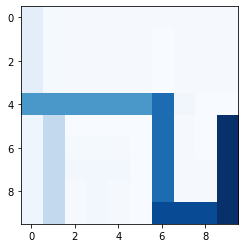

Run: 0
Team: 26b9eea7-0b93-4765-88df-748ef2c4c503
↓ ↓ → → ← ← ← ← ← ← 

↓ ← ← ← ← ← X ↓ ? ? 

↓ ↓ ← ← ↑ ← X ↓ ? ? 

↑ ↓ ? ↓ ↑ ? X ↓ ? ? 

↑ ← ← ← ← ← ← ← X X 

↑ ↑ X X X X ? ↓ X G 

↑ ↑ → ↓ ← X ? ↓ X ↓ 

↑ ↑ ← ← ← X ? ↓ ? ↓ 

↑ ↑ ← ↑ ← X → → → ↓ 

↑ ↑ ← S ← X ? ↓ ? ? 



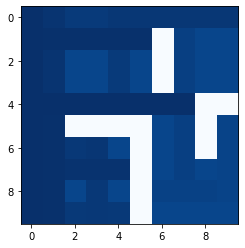

Run: 0
Team: 572364c6-ef3e-4257-9b92-02df96a4b1dd
↓ ↓ ← ↓ ← ← ← ↓ ← ← 

↓ ↓ ← ↓ ← ↑ X ↓ ? ? 

↓ ↓ ← ↓ ← ↑ X ↓ ? ? 

↑ ↓ ? ↓ ? ↑ X ↓ ? ? 

→ → → → → → → ↓ X X 

↑ ↑ X X X X ? ↓ X G 

↑ ↑ → ↓ ← X ? ↓ X ↑ 

↑ ↑ ← ← ← X → → → ↑ 

↑ ↑ ← ↑ ← X ? ↓ ? ? 

↑ ↑ ← S ← X ? ↓ ? ? 



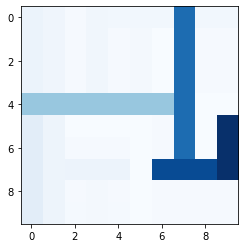

Run: 1
Team: be88c189-bd7a-4388-83ae-489c0a20ca1b
↓ ↓ ← ← ← ← ← ← ← ← 

→ ↓ ← ← ← ← X ↓ ? ? 

→ ↓ → ↑ → ↓ X ↓ ? ? 

↓ ↓ ← ↑ ← ↓ X ↓ ? ? 

→ ↓ ← ↑ ← ← ← ← X X 

↓ ↑ X X X X ↓ ↓ X G 

↓ ↑ ← ← ← X ↓ ↓ X ↓ 

→ ↑ ↑ ↓ ↓ X → ← ← ← 

↑ ↑ ↑ ↓ ← X ↓ ↓ ? ? 

→ ↑ → S ← X ↓ ↓ ? ? 



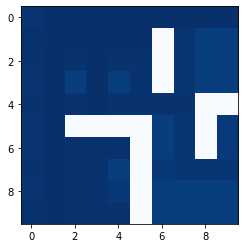

Run: 2
Team: 3ef1f0f5-b750-4c48-8c12-877c9bfdea6f
→ → → → → ← ← ← ← ← 

↓ ↑ ↑ ? ? ↓ X ↓ ? ↑ 

↓ ↑ ↑ ? ? ↓ X → → ↑ 

↓ ↑ ↑ ← ← ↓ X ↑ ? ↑ 

→ ↑ → ← ← ← ← ← X X 

↑ ↑ X X X X ? ↑ X G 

↑ ↑ ↓ ? ? X ? ↑ X ↓ 

↑ ↑ ← ← ← X ? ↑ ? ↓ 

↑ ↑ ← ← ← X → ↑ → ↓ 

↑ ↑ ↑ S ← X ? ↑ ? ? 



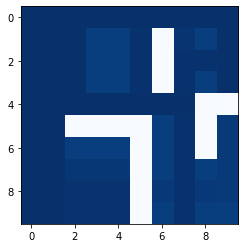

Run: 2
Team: a33c6b93-5a8a-4f00-bf53-c5470d173ce1
→ → → → → → → ↓ ← ← 

↓ ↓ ↓ ← ← ← X ↓ ? ? 

↓ ↓ ← ← ← ← X ↓ ? ? 

↓ ↓ ← ← ← ← X ↓ ← ← 

→ → → → → → ↓ ↓ X X 

↑ ↓ X X X X ↓ ← X G 

↑ ↓ ← ← ← X ↓ ↑ X ↑ 

↑ ← ← ← ← X → → → ↑ 

↑ ↑ → ↑ ← X ↑ ↑ ? ↑ 

↑ ↑ ↑ S ← X ↑ ↑ ? ↑ 



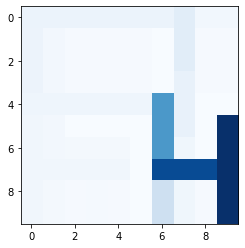

Run: 2
Team: 83905e9a-3117-4ee3-bc56-b3f7a8a1c52d
→ → → → → → → ↓ ← ← 

↓ ↑ ↓ ← ← ← X ↓ ? ? 

↓ ↑ ← ← ← ← X ↓ ? ? 

↓ ↑ ← ← ← ← X ↓ ← ← 

→ → → → → → ↓ ↓ X X 

↑ ↑ X X X X ↓ ← X G 

↑ ↑ ← ← ← X ↓ ↑ X ↑ 

↑ ↑ ← ← ← X ↓ ↑ ← ↑ 

↑ ↑ ← ← ← X → → → ↑ 

↑ ↑ ↑ S ← X ↑ ↑ ? ↑ 



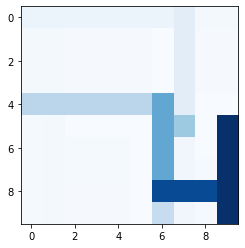

Run: 2
Team: 596832e0-dea9-4411-bb42-d1953b2edae1
→ → → → → → → ↓ ← ← 

↓ ↓ ↓ ← ← ← X ↓ ? ? 

↓ ↓ ← ← ← ← X ↓ ? ? 

↓ ↓ ← ← ← ← X ↓ ← ← 

→ → → → → → ↓ ↓ X X 

↑ ↓ X X X X ↓ ← X G 

↑ ← ← ← ← X ↓ ↑ X ↑ 

↑ ← ← ← ← X ↓ ↑ ← ↑ 

↑ ↑ → ↑ ← X → → → ↑ 

↑ ↑ ↑ S ← X ↑ ↑ ? ↑ 



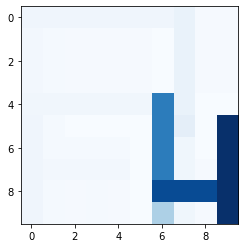

Run: 4
Team: 23cf8554-6dca-4f10-9d75-f1efdd32397e
→ → ↓ ← ← ← ← ↓ ← ← 

↓ ↓ ↑ ← ↑ ← X ↓ ? ↓ 

→ → ↑ ← ↑ ← X ↓ ? ↓ 

→ ↑ ↑ ← ↑ ← X ↓ ? ↓ 

→ → → → → → ↓ ↓ X X 

↓ ↑ X X X X ↓ ↓ X G 

↓ ↑ ? ↓ ↓ X ↓ ← X ↑ 

↓ ↑ ← ← ← X ↓ ↓ ↓ ↑ 

↓ ↑ ? ↑ ↓ X → → → ↑ 

→ ↑ → S ← X → → ↑ ← 



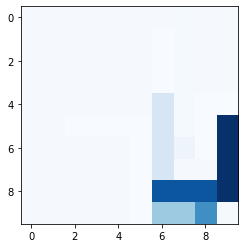

Run: 4
Team: 1bc70f11-d799-42e1-9d6f-24b20a255ded
↓ → → → → → → ↓ ↓ ← 

↓ ↓ ↑ ← ↑ ← X ↓ ↓ ↓ 

↓ ← ← ← ← ← X ↓ ↓ ↓ 

↓ ↑ ↑ → ↑ ← X ↓ ← ← 

→ → → → → → → ↓ X X 

↑ ↑ X X X X ? ↓ X G 

↑ ↑ ? ↓ ↓ X ← ↓ X ↑ 

↑ ↑ ← ← ← X → → → ↑ 

↑ ↑ ? ↑ ↓ X ← ↑ ← ↑ 

↑ ↑ ← S ← X ? ↑ ? ↑ 



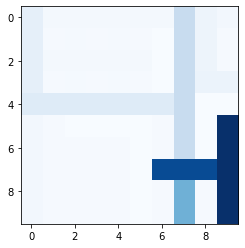

Run: 5
Team: ec7b0519-5b63-46d0-a4c0-46c182df3f9e
→ → → → → ← ← ← ← ← 

→ → ↑ ← ← ← X ↓ ? ? 

↓ ↓ ↑ ← ← ← X ↓ ? ? 

↓ ↑ ↑ ← ← ↓ X ↓ ? ? 

→ ↑ ↑ ← ← ↓ ← ↓ X X 

↑ ↑ X X X X ? ↓ X G 

↑ ↑ ← ↓ ← X ? ↓ X ↓ 

↑ ↑ ← ↑ ← X → → → ↓ 

↑ ↑ ← ← ← X ? ↓ ? ? 

↑ ↑ → S ← X ? ↓ ? ? 



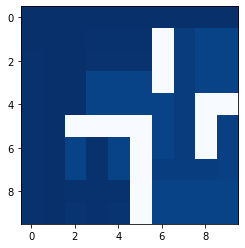

Run: 5
Team: 42ea690c-7396-4473-8b21-74741d1a4531
→ → → → → → → ↓ ← ← 

→ ↑ ↑ ← ← ← X ↓ ? ? 

↓ ↑ ↑ ← ← ← X ↓ ? ? 

↓ ↑ ↑ ← ← ↓ X ↓ ? ? 

→ ↑ ↑ ← ← ↓ ↓ ↓ X X 

↓ ↑ X X X X ↓ ↓ X G 

↓ ↑ ← ↓ ← X ↓ ↓ X ↑ 

↑ ↑ ← ↓ ← X ↓ ← ← ↑ 

↑ ↑ ← ← ← X ↓ ↓ ? ↑ 

↑ ↑ ← S ← X → → → ↑ 



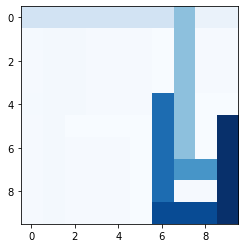

Run: 6
Team: 3f66a163-018c-45fd-a764-02695fea462f
→ → → → → → → ↓ ← ← 

↓ ↓ ? ↑ ? ↓ X ↓ ? ? 

↓ ↓ ? ↑ ? ↓ X ↓ ? ? 

↓ ↓ ? ↑ ? ↓ X ↓ ? ? 

→ → → ↑ ← ← ← ↓ X X 

↑ ↓ X X X X ? ↓ X G 

↑ ← ← ← ↓ X ← ↓ X ↑ 

↑ ↓ ? ↓ ↓ X ? ↓ ? ↑ 

↑ ← ← ← ← X ? ↓ ? ↑ 

↑ → → S ↑ X → → → ↑ 



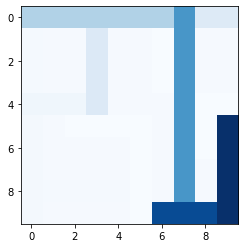

Run: 7
Team: d47ffc96-02e7-4a6e-8e03-08c9ac6435f8
↓ ↓ ↓ ↓ ↓ ← ← ↓ ← ← 

→ ↓ ← ← ↓ ← X ↓ ← ← 

↑ ↓ ← ← ↓ ← X ↓ ? ? 

↑ ↓ ← ↑ ↓ ← X ↓ ← ← 

→ → → → → → → ↓ X X 

↑ ↑ X X X X ? ↓ X G 

↑ ↑ ↓ ↓ ↓ X ? ↓ X ↑ 

↑ ↑ ← ← ← X ? ↓ ? ↑ 

↑ ↑ ← ← ← X ? ↓ ? ↑ 

↑ ↑ ← S ← X → → → ↑ 



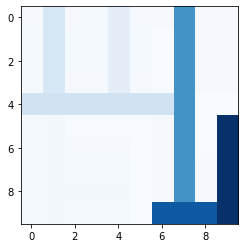

Run: 8
Team: 1faebcd7-9cb3-46d1-bbfd-d91eb0ae4526
→ → → → → ← ← ← ← ← 

↑ ↓ ← ← ← ← X ↓ ? ? 

↑ ↓ ↑ ← ↓ ← X ↓ ? ? 

↑ ↑ ↑ ? ↓ ↓ X ↓ ? ? 

↑ ↑ ← ← ← ← ← ← X X 

↑ ↑ X X X X ? ↓ X G 

↑ ↑ ? ? ? X ? ↓ X ↓ 

↑ ↑ ← ← ← X → → → ↓ 

↑ ↑ ? ? ? X ? ↓ ? ? 

↑ ↑ ← S ← X ? ↓ ? ? 



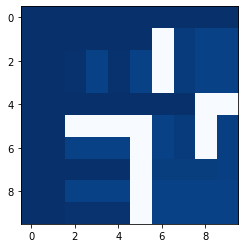

Run: 9
Team: dce3076c-d72c-4877-91d7-c9df00aa1411
↓ ← ← ↓ ← ← ← ↓ ← ← 

↓ ? ? ↓ ? ? X ↓ → ↑ 

↓ ? ? ↓ ? ? X ↓ ? ↑ 

↓ ? ? ↓ ? ? X ↓ ? ↑ 

→ → → → → → ↓ ↓ X X 

↑ ? X X X X ↓ ↓ X G 

↑ ← ← ← ← X ↓ ↓ X ↑ 

↑ ? ↑ ? ? X → → → ↑ 

↑ ? ↑ ? ? X ↓ ↑ ? ↑ 

↑ ← ↑ S ← X → ↑ ← ↑ 



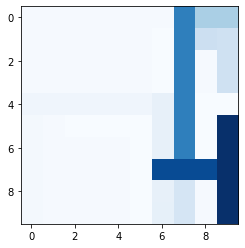

Run: 9
Team: 22e28099-2ed7-4573-8f6c-f891a789e1c7
→ → → → → → → ↓ ← ← 

↓ ? ? ↓ ? ↑ X ↓ → ↑ 

↓ ? ? ↓ ? ↑ X ↓ ? ↑ 

↓ ? ? ↓ ? ↑ X ↓ ? ↑ 

→ → → → → → ↓ ↓ X X 

↑ ? X X X X ↓ ↓ X G 

↑ ← ← ← ← X ↓ ↓ X ↑ 

↑ ? ↑ ? ? X → → → ↑ 

↑ ? ↑ ? ? X ↑ ↑ ? ↑ 

↑ ← ↑ S ← X ↑ ↑ ← ↑ 



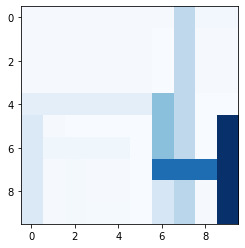

Run: 10
Team: 281bd451-7141-41a2-905b-58a8ac4e5371
→ ↓ → → ↓ ← ← ← ← ← 

↓ ↓ ? ↓ ↓ ? X ↓ ? ? 

← ↓ ← ← ← ← X ↓ ? ? 

← ↓ ← ← ← ← X ↓ ? ? 

→ → → → → → ↓ ← X X 

↓ ↑ X X X X ↓ ↓ X G 

↓ ↑ ? ? ? X ↓ ↓ X ↑ 

→ ↑ ← ← ← X ↓ ↓ ? ↑ 

↑ ↑ ? ? ? X → → → ↑ 

→ ← ← S ← X ↓ ↓ ? ↑ 



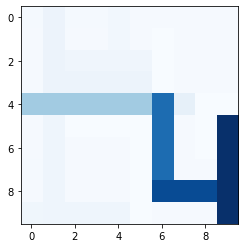

Run: 11
Team: c549f828-da35-4398-96f9-427b84f7514d
→ ↓ ← ← ← ← ← ← ← ← 

↑ ↓ ↓ ↑ ? ↑ X ↓ ? ? 

↑ ↓ ← ← ← ← X ↓ ? ? 

↑ ↑ ← ← ← ← X ↓ ? ? 

↑ ↑ ↑ ↑ ← ↑ ← ← X X 

↑ ↑ X X X X ? ↑ X G 

↑ ↑ ? ? ? X ? ↑ X ↓ 

↑ ↑ ? ? ? X ? ↑ ? ↓ 

↑ ↑ ← ← ← X → ↑ → ↓ 

↑ ↑ ← S ← X ? ↑ ? ? 



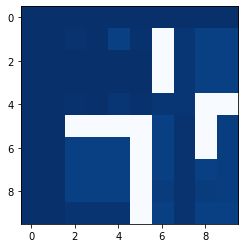

Run: 11
Team: c0756c11-d824-4e4d-9ae9-d76570cb197a
→ → → → → → → ↓ ← ← 

↑ ↑ ↑ ↓ ↓ ↑ X ↓ ? ? 

↑ → ↑ ↓ ← ↑ X ↓ ? ? 

↑ → ↑ → → ↑ X ↓ ? ? 

↑ → ↑ ← ← ↑ ← ↓ X X 

↑ ↑ X X X X ? ↓ X G 

↑ ↑ ? ? ? X ? ↓ X ↑ 

↑ ↑ ? ? ? X ? ↓ ? ↑ 

↑ ↑ ← ← ← X → → → ↑ 

↑ ↑ ← S ← X ? ↑ ? ↑ 



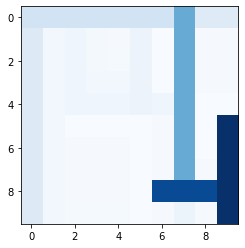

Run: 13
Team: 8078acb7-dbdd-4e09-8f94-2d269a01acc5
→ → → → → → → ↓ → ← 

→ → ↑ ← ← ← X ↓ ? ↓ 

↑ ? ↑ ? ? ? X ↓ ? ↓ 

→ → ↑ ← ← ← X ↓ ? ↓ 

↑ ? ↑ ? ? ? ↓ ↓ X X 

↑ ? X X X X ↓ ↓ X G 

↑ ? ? ↓ ? X ↓ ↓ X ↑ 

↑ ? ? ↓ ? X → ↓ ← ↑ 

↑ ← ← ← ← X ↑ ↓ ← ↑ 

↑ ← ← S ← X → → → ↑ 



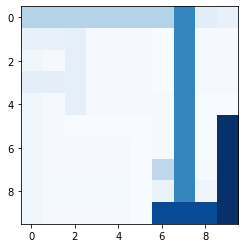

Run: 13
Team: 64b921c4-aefc-4057-8030-f449eaf64b7e
↓ → → ↓ → → → ↓ ← ← 

↓ → ↓ ↓ ↓ ← X ↓ ? ↓ 

↓ ? ↓ ↓ ↓ ? X ↓ ? ↓ 

↓ ← ← ↓ ← ← X ↓ ? ↓ 

→ → → → → → ↓ ↓ X X 

↑ ? X X X X ↓ ↓ X G 

↑ ? ? ↓ ? X ↓ ↓ X ↑ 

↑ ? ? ↓ ? X ↓ ↓ ? ↑ 

↑ ← ← ← ← X → → → ↑ 

↑ ← ← S ← X ↑ ↑ ? ↑ 



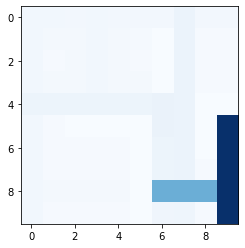

Run: 13
Team: feb1e230-f951-46f8-9193-ab6abf46f7fb
↓ ← ↓ ↓ ↓ ← ← ↓ ← ← 

↓ → ↓ ↓ ↓ ← X ↓ ? ↓ 

↓ ? ↓ ↓ ↓ ? X ↓ ? ↓ 

↓ ← ↓ ↓ ↓ ← X ↓ ? ↓ 

→ → → → → → → ← X X 

↑ ? X X X X ↑ ↑ X G 

↑ ? ? ↓ ? X ↑ ↑ X ↓ 

↑ ? ? ↓ ? X ↑ ↑ ? ↓ 

↑ ← ← ← ← X ↑ ↑ ← ← 

↑ ← ← S ← X ↑ ↑ ? ? 



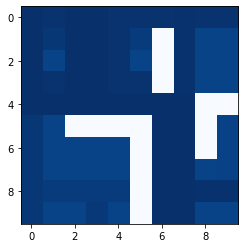

Run: 13
Team: d3f722ce-6c12-4065-ae35-344eef09099e
↓ ← ↓ ↓ ↓ ← ← ↓ ← ← 

↓ → ↓ ↓ ↓ ← X ↓ ? ↓ 

↓ ? ↓ ↓ ↓ ? X ↓ ? ↓ 

↓ → ↓ ↓ ↓ ← X ↓ ? ↓ 

→ → → → → → ↓ ↓ X X 

↑ ? X X X X ↓ ↓ X G 

↑ ? ? ↓ ? X ↓ ↓ X ↑ 

↑ ? ? ↓ ? X ↓ ↓ ? ↑ 

↑ ← ← ← ← X → → → ↑ 

↑ ← ← S ← X ↑ ↑ ? ↑ 



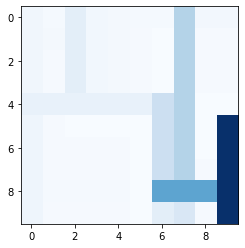

Run: 13
Team: 64c11c2a-3e8b-405c-a441-4489032bfd63
↓ ← ↓ ↓ ↓ ← ← ↓ ← ← 

→ → ↓ ↓ ↓ ← X ↓ ? ↓ 

↓ ? ↓ ↓ ↓ ? X ↓ ? ↓ 

→ → ↓ ↓ ↓ ← X ↓ ? ↓ 

→ → → ← ← ← ← ← X X 

↑ ? X X X X ↓ ↑ X G 

↑ ? ? ↓ ? X ↓ ↑ X ↓ 

↑ ? ? ↓ ? X ↓ ↑ ? ↓ 

↑ ← ← ← ← X ↑ ↑ ← ← 

↑ ← ← S ← X ↑ ↑ ? ? 



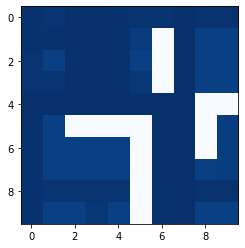

Run: 13
Team: d6074c3f-97b7-4eb7-b1d6-f9d6d8130c91
↓ ← ↓ ← ← ← ← ↓ ← ← 

↓ → ↓ ↓ ↑ ← X ↓ ? ↓ 

↓ ? ↓ ↓ ↑ ? X ↓ ? ↓ 

↓ ← ↓ ← ← ← X ↓ ? ↓ 

→ → → → ← ← ← ← X X 

↑ ? X X X X ↑ ↑ X G 

↑ ? ? ↓ ? X ↑ ↑ X ↓ 

↑ ? ? ↓ ? X ↑ ↑ ? ↓ 

↑ ← ← ← ← X ↑ ↑ ← ← 

↑ ← ← S ← X ↑ ↑ ? ? 



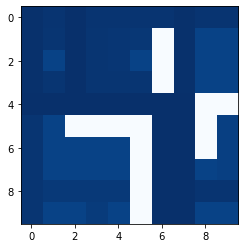

Run: 13
Team: 01e6e6f3-ab01-4658-81cf-ce18ea403230
↓ → ↓ ↓ ↓ → → ↓ ← ← 

↓ → ↓ ↓ ↓ ← X ↓ ? ↓ 

↓ ? ↓ ↓ ↓ ? X ↓ ? ↓ 

↓ → ↓ ↓ ↓ ← X ↓ ? ↓ 

→ → → → → → → ↓ X X 

↑ ? X X X X ↓ ↓ X G 

↑ ? ? ↓ ? X ↓ ↓ X ↑ 

↑ ? ? ↓ ? X ↑ ↓ ? ↑ 

↑ ← ← ← ← X → → → ↑ 

↑ ← ← S ← X ↑ ↑ ? ↑ 



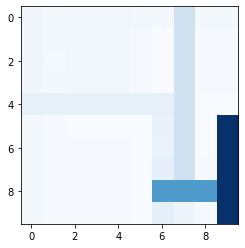

Run: 13
Team: eeeb336a-b7fd-4e58-8a8f-7764caf75adc
→ → ↓ ↓ → → → ↓ ← ← 

↓ → ↓ ↓ ↓ ← X ↓ ? ↓ 

↓ ? ↓ ↓ ↓ ? X ↓ ? ↓ 

→ → ↓ ↓ ↓ ← X ↓ ? ↓ 

→ → → → → → → ↓ X X 

↑ ? X X X X ↑ ↓ X G 

↑ ? ? ↓ ? X ↑ ↓ X ↑ 

↑ ? ? ↓ ? X ↑ ↓ ? ↑ 

↑ ← ← ← ← X → → → ↑ 

↑ ← ← S ← X ↑ ↑ ? ↑ 



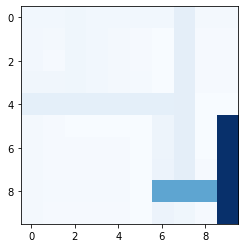

Run: 13
Team: c66787c5-e524-4561-885d-dd97cb796105
↓ → ↓ ↓ ↓ → → ↓ ← ← 

↓ → ↓ ↓ ↓ ← X ↓ ? ↓ 

↓ ? ↓ ↓ ↓ ? X ↓ ? ↓ 

↓ ← ↓ ↓ ↓ ← X ↓ ? ↓ 

→ → → → → → ↓ ↓ X X 

↑ ? X X X X ↓ ↑ X G 

↑ ? ? ↓ ? X ↓ ↑ X ↑ 

↑ ? ? ↓ ? X ↓ ↑ ? ↑ 

↑ ← ← ← ← X → → → ↑ 

↑ ← ← S ← X ↑ ↑ ? ↑ 



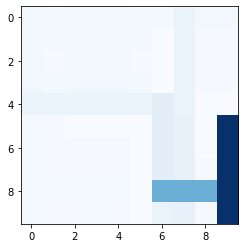

Run: 13
Team: 23deb638-49f8-4774-9ce1-ca8decbc845b
↓ ← ↓ ↓ ← ← ← ↓ ← ← 

↓ → ↓ ↓ ↑ ← X ↓ ? ↓ 

↓ ? ↓ ↓ ↑ ? X ↓ ? ↓ 

↓ → ↓ ↓ ↑ ← X ↓ ? ↓ 

→ → → → → → ← ← X X 

↑ ? X X X X ↑ ↑ X G 

↑ ? ? ↓ ? X ↑ ↑ X ↓ 

↑ ? ? ↓ ? X ↑ ↑ ? ↓ 

↑ ← ← ← ← X ↑ ↑ ← ← 

↑ ← ← S ← X ↑ ↑ ? ? 



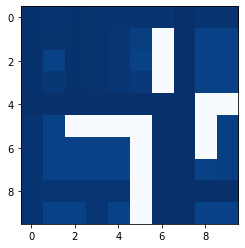

Run: 13
Team: 85b2ff4d-d5b7-4185-9825-8a501a2feff5
↓ → ↓ ↓ → → → ↓ → ← 

↓ → ↓ ↓ ↓ ← X ↓ ? ↓ 

↓ ? ↓ ↓ ↓ ? X ↓ ? ↓ 

↓ → ↓ ↓ ↓ ← X ↓ ? ↓ 

→ → → → → → ← ← X X 

↑ ? X X X X ↑ ↑ X G 

↑ ? ? ↓ ? X ↑ ↑ X ↓ 

↑ ? ? ↓ ? X ↑ ↑ ? ↓ 

↑ ← ← ← ← X ↑ ↑ ← ← 

↑ ← ← S ← X ↑ ↑ ? ? 



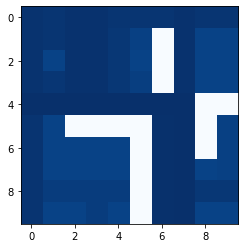

Run: 14
Team: ef02b4e9-082e-4eba-9867-dbfbaff90f05
↓ ? ? ↓ ↓ ? ? ↓ ? ? 

↓ ? ? ↓ ↓ ? X ↓ ? ? 

↓ → → → ↓ ← X ↓ ? ? 

↓ ? ? ↓ ↓ ? X ↓ ? ? 

→ ← ← ← ← ← ← ← X X 

↑ ← X X X X ? ↓ X G 

↑ ? ? ? ? X ? ↓ X ↓ 

↑ ? ? ? ? X ? ↓ ? ↓ 

↑ ? ? ? ? X → → → ↓ 

↑ ← ← S ← X ? ↓ ? ? 



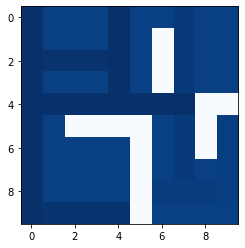

Run: 14
Team: c67fba96-de05-4f9a-b9d6-ac064a892580
↓ ↓ → ↓ ↓ ← ← ↓ ← ← 

↓ ↓ ↑ ↓ ↓ ↑ X ↓ ? ? 

→ → → ↓ ↓ ← X ↓ ? ? 

↓ ↑ ← ↓ ↓ ↑ X ↓ ? ? 

→ → → → → → → ↓ X X 

↑ ↑ X X X X ↓ ↓ X G 

↑ ↑ ← ← ← X ↑ ↓ X ↑ 

↑ ↑ ? ? ? X → → → ↑ 

↑ ↑ ← ← ← X ↑ ↑ ? ↑ 

↑ ↑ ← S ← X ↑ ↑ ? ↑ 



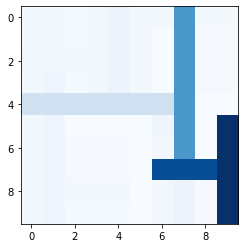

Run: 15
Team: df2e45b9-a7ff-488c-99d5-4dacc8e7431d
↓ ← ↓ ← ← ← ← ← ← ← 

↓ ↑ ↓ ↓ ? ↑ X ↓ ↓ ? 

↓ → → ← ← ← X ↓ ↓ ? 

↓ → ↓ ↓ → ↑ X ↓ ↓ ? 

↓ ← ← ← ← ← ← ← X X 

↓ ↑ X X X X ? ↓ X G 

↓ ← ← ← ← X ? ↓ X ↓ 

↓ ↑ ? ? ? X ? ↓ ? ↓ 

↑ ↑ ← ← ← X → → → ↓ 

↑ ↑ ← S ← X ? ↓ ? ? 



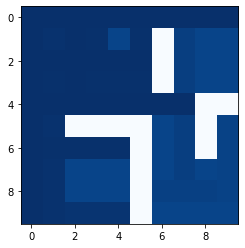

Run: 16
Team: d42659a4-c4b0-415c-a7f8-a798545d521a
→ → → → → → → → ← ← 

? ↑ ? ? ? ? X ↓ ↓ ? 

? ↑ ? ? ? ? X ↓ ↓ ? 

? ↑ ? ? ? ? X ↓ ↓ ? 

? ↑ ? ? ? ? ? ↓ X X 

? ↑ X X X X ? ↓ X G 

? ↑ ? ? ? X ? ↓ X ↓ 

? ↑ ? ? ? X → → → ↓ 

? ↑ ? ? ? X ? ↓ ? ? 

← ↑ ← S ← X ? ↓ ? ? 



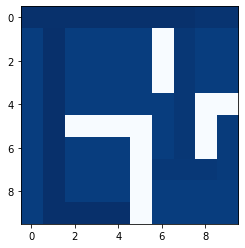

Run: 17
Team: ba5dba25-3997-46ff-b30f-8abe0fbfaead
↓ → ↓ ← ← ← ← ← ← ← 

↓ ← ↓ ← ← ← X ? ? ? 

↓ ↑ ↓ ↓ ↓ ↑ X ? ? ? 

↓ ↑ ↓ → → ↑ X ? ? ? 

→ → → → → → ↓ ← X X 

↑ ↑ X X X X ↓ ? X G 

↑ ← ← ← ← X ↓ ? X ↑ 

↑ ← ← ← ← X ↓ ? ? ↑ 

↑ ← ↑ ← ← X ↓ ? ? ↑ 

↑ ← ← S ← X → → → ↑ 



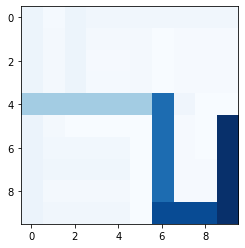

Run: 17
Team: 6887f97e-db11-4043-bd16-7e4789b41361
↓ ↓ ↓ ← ← ← ← ← ← ← 

↓ ↓ ↓ ← ← ← X ? ? ? 

↓ ↓ ↓ ↓ ↓ ↑ X ? ? ? 

↓ ↓ ↓ ← ← ← X ? ? ? 

→ → → → → → ↓ ← X X 

↑ ↓ X X X X ↓ ? X G 

↑ ↓ ← ← ← X ↓ ? X ↑ 

↑ ← ← ← ← X ↓ ? ? ↑ 

↑ ← ← ← ← X ↓ ? ? ↑ 

↑ ↑ ↑ S ← X → → → ↑ 



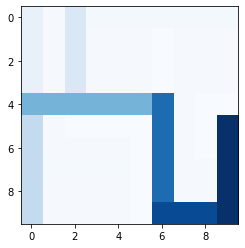

Run: 17
Team: 51ee6514-abb6-44db-a452-254bb653871c
↓ → ↓ ← ← ← ← ← ← ← 

↓ ↓ ↓ ← ← ← X ? ? ? 

↓ ↓ ↓ ↓ ↓ ↑ X ? ? ? 

↓ ↓ ↓ ← ← ↑ X ? ? ? 

→ → → → → → ↓ ← X X 

↑ ↓ X X X X ↓ ? X G 

↑ ↓ ← ↓ ← X ↓ ? X ↑ 

↑ ← ← ← ← X ↓ ? ? ↑ 

↑ ← ← ← ← X ↓ ? ? ↑ 

↑ ← ← S ← X → → → ↑ 



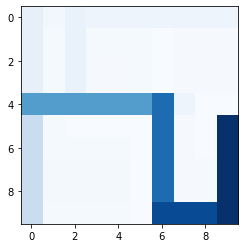

Run: 17
Team: 35810f83-d900-4d2b-95e0-3e62d7378123
↓ ↓ ↓ ← ← ← ← ← ← ← 

↑ ↓ ↓ ← ← ← X ? ? ? 

↑ ↓ ↓ ↓ ↓ ↑ X ? ? ? 

↑ ↓ ↓ ← ← ↑ X ? ? ? 

→ → → → → → ↓ ← X X 

↑ ↓ X X X X ↓ ? X G 

↑ ↓ ← ↓ ← X ↓ ? X ↑ 

↑ ↓ ← ← ← X ↓ ? ? ↑ 

↑ ← ← ← ← X ↓ ? ? ↑ 

↑ ← ← S ← X → → → ↑ 



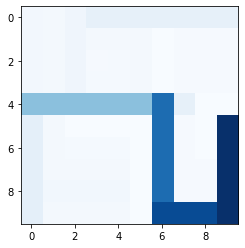

Run: 17
Team: c2cf82b9-6a18-44b4-9f68-4857bcd99b52
↓ → ↓ → ← ← ← ← ← ← 

↓ ↓ ↓ ← ← ← X ? ? ? 

↓ ↓ ↓ ↓ ↓ ↑ X ? ? ? 

↓ ↓ ↓ ← ← ↑ X ? ? ? 

→ → → → → → ↓ ← X X 

↑ ↓ X X X X ↓ ? X G 

↑ ↓ ← ← ← X ↓ ? X ↑ 

↑ ↓ ← ← ← X ↓ ? ? ↑ 

↑ ← ← ← ← X ↓ ? ? ↑ 

↑ ← ← S ← X → → → ↑ 



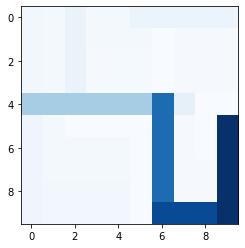

Run: 17
Team: 9bcb20b5-88ca-4915-a9dd-f340b08e44a2
↓ → ↓ ← ↓ ↓ ← ← ← ← 

↓ ← ↓ ← ← ← X ? ? ? 

↓ ↓ ↓ ↓ ↓ ↑ X ? ? ? 

↓ ↓ ↓ → → ↑ X ? ? ? 

→ → → → → → ↓ ← X X 

↑ ↓ X X X X ↓ ? X G 

↑ ↓ ← ↓ ← X ↓ ? X ↑ 

↑ ← ← ↓ ← X ↓ ? ? ↑ 

↑ ← ← ← ← X ↓ ? ? ↑ 

↑ ↑ ← S ← X → → → ↑ 



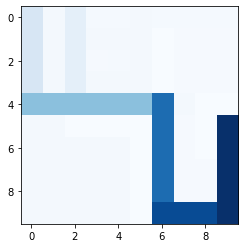

Run: 17
Team: ee3ff6a7-4aee-4ae5-8737-ec029033037f
↓ ↓ ↓ ← ← ↓ ← ← ← ← 

↓ ← ↓ ← ← ← X ? ? ? 

↓ ↓ ↓ ↓ ↓ ↑ X ? ? ? 

↓ ↓ ↓ → → ↑ X ? ? ? 

→ → → → → → ↓ ← X X 

↑ ↓ X X X X ↓ ? X G 

↑ ↓ ← ← ← X ↓ ? X ↑ 

↑ ↓ ← ← ← X ↓ ? ? ↑ 

↑ ← ← ← ← X ↓ ? ? ↑ 

↑ ← ← S ← X → → → ↑ 



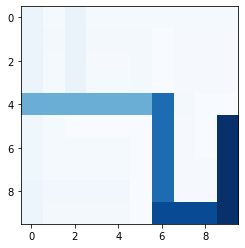

Run: 17
Team: 43950f7e-11c3-49a6-80c7-53fd3077d475
↓ ↓ ↓ ← ← ↓ ← ← ← ← 

↓ ↓ ↓ ← ← ← X ? ? ? 

↓ ↓ ↓ ↓ ↓ ↑ X ? ? ? 

↓ ↓ ↓ ← ← ← X ? ? ? 

→ → → → → → ↓ ← X X 

↑ ↓ X X X X ↓ ? X G 

↑ ↓ ← ↓ ← X ↓ ? X ↑ 

↑ ↓ → ↓ ← X ↓ ? ? ↑ 

↑ ↓ ← ← ← X ↓ ? ? ↑ 

↑ ← ← S ← X → → → ↑ 



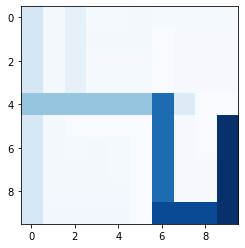

Run: 17
Team: 6ff75f3b-4fbc-4c06-80b6-46fea5dc1100
→ → ↓ ← ← ← ← ← ← ← 

↓ ← ↓ ← ← ← X ? ? ? 

↓ ↓ ↓ ↓ ↓ ↑ X ? ? ? 

↓ ↓ ↓ ← ← ↑ X ? ? ? 

→ → → → → → ↓ ← X X 

→ ↓ X X X X ↓ ? X G 

↑ ← ← ← ← X ↓ ? X ↑ 

↑ ↓ ← ↓ ← X ↓ ? ? ↑ 

→ ← ← ← ← X ↓ ? ? ↑ 

→ ↑ ← S ← X → → → ↑ 



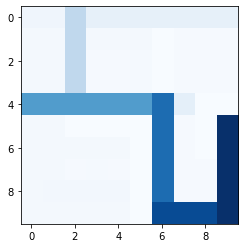

Run: 17
Team: ccccdd0a-313e-4c14-9504-6919ac514e85
↓ → ↓ → → ← ← ← ← ← 

↓ ← ↓ ← ← ← X ? ? ? 

↓ ↑ ↓ ↓ ↓ ↑ X ? ? ? 

↓ ↑ ↓ → → ↑ X ? ? ? 

→ → → → → → ↓ ← X X 

↑ ↑ X X X X ↓ ? X G 

↑ ← ← ← ← X ↓ ? X ↑ 

↑ ← ← ← ← X ↓ ? ? ↑ 

↑ ← ← ← ← X ↓ ? ? ↑ 

↑ ↑ ← S ← X → → → ↑ 



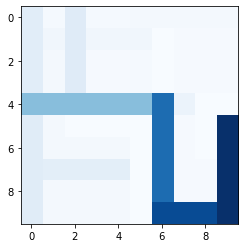

Run: 18
Team: 796c39bb-98e5-4f5f-b827-a971a420ec13
→ ↓ ← ← ← ← ← ← ← ← 

↓ ↓ ← ← ← ↑ X ↓ ← ← 

↓ ↓ → → → ↑ X ↓ ? ? 

↓ ↓ ↑ ↓ ? ↑ X ↓ ? ? 

→ → → → → → ↓ ← X X 

→ ↑ X X X X ↓ ↑ X G 

↓ ↑ ← ← ← X ↓ ↑ X ↑ 

↓ ↑ → ↑ ← X → → → ↑ 

↓ ↑ ← ↑ ← X ↓ ↑ ? ↑ 

→ ↑ ← S ← X ↓ ↑ ? ↑ 



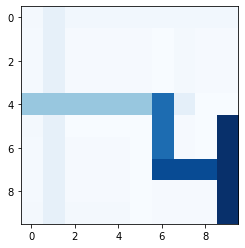

Run: 18
Team: 8827b0ff-8d22-4559-ae37-94660f6e0b37
↓ ↓ ↓ ↓ ← ↓ ← ↓ ← ← 

↓ ↓ ↓ ↓ ← ↓ X ↓ ? ? 

↓ ↓ ↓ ← ← ← X ↓ ? ? 

↓ ↓ ← ← ← ← X ↓ ? ? 

→ → → → → → → ↓ X X 

↑ ↑ X X X X ? ↓ X G 

↑ ↑ ← ← ← X ? ↓ X ↑ 

↑ ↑ ← ← ← X ? ↓ ? ↑ 

↑ ↑ ← ↑ ← X → → → ↑ 

↑ ← ← S ← X ? ↓ ? ↑ 



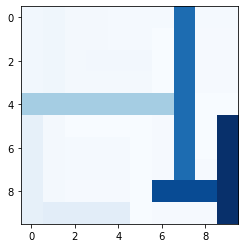

Run: 18
Team: 86cf020b-89c2-4107-af8a-0ac4e3883c3b
↓ ↓ ↓ ↓ ← ↓ ← ← ← ← 

↓ ↓ ← ↓ ← ← X ↓ ? ? 

↓ ↓ ↓ ↓ ← ↓ X ↓ ? ? 

↓ ↓ ← ↓ ← ← X ↓ ? ? 

↓ ↓ → ← ← ← ← ← X X 

↓ ↓ X X X X ? ↓ X G 

→ ↓ ← ← ← X ? ↓ X ↓ 

↑ ↑ ← ↑ ← X ? ↓ ? ↓ 

↑ ↑ ← ↑ ← X → → → ↓ 

↑ ↑ ← S ← X ? ↓ ? ? 



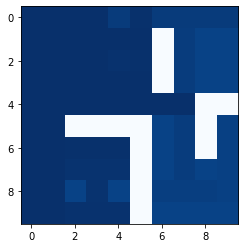

Run: 19
Team: 41f0d95f-f3e9-424e-aa5d-080a2ba1b6d9
→ → → → → → → ↓ ← ← 

← ↑ ← ← ← ← X ↓ ? ? 

? ↑ ? ? ? ? X ↓ ? ? 

← ↑ ← ← ← ← X ↓ ? ? 

? ↑ ? ? ? ? ? ↓ X X 

? ↑ X X X X ? ↓ X G 

? ↑ ? ? ? X ? ↓ X ↑ 

? ↑ ? ? ? X ? ↓ ? ↑ 

? ↑ ? ? ? X ? ↓ ? ↑ 

← ↑ ← S ← X → → → ↑ 



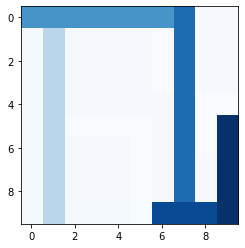

Run: 20
Team: 7b63a1b0-b6b2-452e-b252-175a22392fb6
↓ ↓ ↓ ↓ ← ↓ ← ↓ ← ← 

↓ ↓ ← ↓ ← ← X ↓ ? ? 

↓ ↓ ← ↓ ← ← X ↓ ? ? 

↓ ↓ ← ↓ ← ← X ↓ ? ? 

→ → → → → → → ↓ X X 

↑ ↑ X X X X ? ↓ X G 

↑ ↑ ? ? ? X ? ↓ X ↑ 

↑ ↑ ? ? ? X ? ↓ ? ↑ 

↑ ↑ ? ? ? X ? ↓ ? ↑ 

↑ ↑ ← S ← X → → → ↑ 



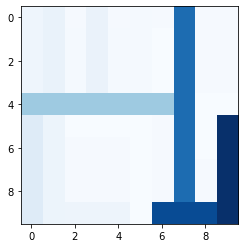

Run: 20
Team: 1a027459-5388-4f2f-a451-ba39797d42f3
↓ ↓ ↓ ↓ ← ← ← ↓ ← ← 

↓ ↓ ← ↓ ← ↑ X ↓ ? ? 

→ ↓ ← ↓ ← ↑ X ↓ ? ? 

↓ ↓ ← ↓ ← ↑ X ↓ ? ? 

→ → → → → → → ↓ X X 

↑ ↑ X X X X ? ↓ X G 

↑ ↑ ? ? ? X ? ↓ X ↑ 

↑ ↑ ? ? ? X ? ↓ ? ↑ 

↑ ↑ ? ? ? X ? ↓ ? ↑ 

↑ ↑ ← S ← X → → → ↑ 



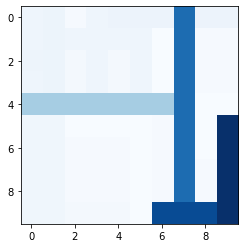

Run: 21
Team: 9f53287c-b9fa-474e-ac56-2f4aa0053baa
↓ ← ← ← ← ← ← ← ← ← 

↓ ↑ ↓ ↑ ↓ ← X ? ↓ ? 

↓ ← ← ← ← ← X ? ↓ ? 

↓ ↑ ← ← ← ← X ? ↓ ? 

→ → → → → → ↓ ← X X 

↑ ↑ X X X X ↓ ? X G 

↑ ↑ ? ? ↓ X ↓ ? X ↑ 

↑ ↑ ? ? ↓ X → → → ↑ 

↑ ↑ ← ← ← X ↓ ? ? ↑ 

↑ ↑ → S ↑ X ↓ ? ? ↑ 



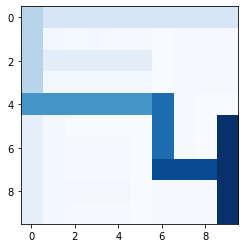

Run: 21
Team: 3bd1fb0f-5d8e-47a5-90de-0ff317976056
→ → ← ← ← ← ← ← ← ← 

↑ ↑ ↑ ↓ ↓ ← X ? ↓ ? 

↑ ← ← ← ← ← X ? ↓ ? 

↑ ↑ ↑ ← ← ← X ? ↓ ? 

↑ ↑ ↑ ↑ → → ↓ ← X X 

↑ ↑ X X X X ↓ ? X G 

↑ ↑ ? ? ↓ X ↓ ? X ↑ 

↑ ↑ ? ? ↓ X → → → ↑ 

↑ ↑ ← ← ← X ↓ ? ? ? 

↑ ↑ → S ↑ X ↓ ? ? ? 



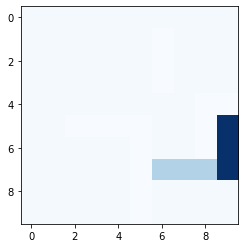

Run: 23
Team: 5f41642a-31dc-4da2-bc34-4d996992e786
→ → → → → → → ↓ ↓ ← 

→ ↓ ↓ ↑ ← ↓ X ↓ ↓ ? 

↓ ↓ ↓ ↑ ↓ ↓ X ↓ ↓ ? 

↓ ↑ ↓ ↑ ↓ ↓ X ↓ ← ← 

→ → → → → → → ↓ X X 

↓ ↑ X X X X ? ↓ X G 

→ ↑ ← ← ← X ← ↓ X ↑ 

→ ↑ ↓ ↑ ← X ← ↓ ← ↑ 

↑ ↑ ← ← ← X ? ↓ ? ↑ 

↑ ↑ ← S ← X → → → ↑ 



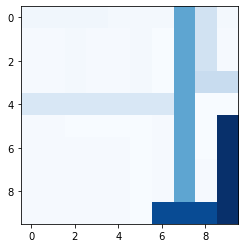

Run: 24
Team: c6596343-8273-4afc-8354-d7fdf0a47c4f
↓ ← ← ← ← ← ← ↓ ← ← 

↓ ↓ ? ? ↑ ? X ↓ ? ? 

↓ ↓ ? ? ↑ ? X ↓ ? ? 

↓ ← ← ← ← ← X ↓ ? ? 

→ → → → → → → ↓ X X 

↑ ↓ X X X X ? ↓ X G 

↑ ← ← ← ← X ? ↓ X ↑ 

↑ ← ↑ ← ← X ? ↓ ? ↑ 

↑ ↓ ↑ ? ? X → → → ↑ 

↑ ← ↑ S ← X ? ↓ ? ↑ 



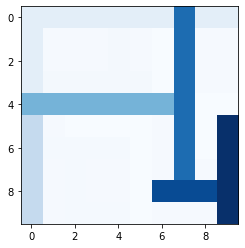

Run: 24
Team: cae39f30-0566-4f55-8756-13f9cc2a7fea
↓ ↓ ← ← ↓ ← ← ↓ ← ← 

↓ ↓ ? ? ↑ ? X ↓ ? ? 

↓ ↓ ? ? ↑ ? X ↓ ? ? 

→ → → → ↑ ← X ↓ ? ? 

→ → → → → → → ↓ X X 

↑ ↓ X X X X ? ↓ X G 

↑ ← ← ← ← X ? ↓ X ↑ 

↑ ← ↑ ← ← X ? ↓ ? ↑ 

↑ ↓ ↑ ? ? X ? ↓ ? ↑ 

↑ ← ↑ S ← X → → → ↑ 



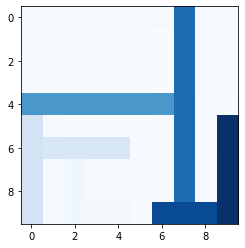

Run: 24
Team: 4566ee37-8aef-471d-a6c5-5f33db3d9ee0
↓ ↓ ← ← ↓ ← ← ← ← ← 

↓ ↓ ← ← ↓ ← X ? ? ? 

↓ ↓ ? ? ↓ ? X ? ? ? 

↓ ↓ → → ↑ ← X ? ? ? 

→ → → → → → ↓ ← X X 

↑ ↑ X X X X ↓ ? X G 

↑ ↑ ← ← ← X ↓ ? X ↑ 

↑ ↑ ← ← ← X → → → ↑ 

↑ ↑ ↑ ← ← X ↓ ? ? ↑ 

↑ ↑ ↑ S ← X ↓ ? ? ↑ 



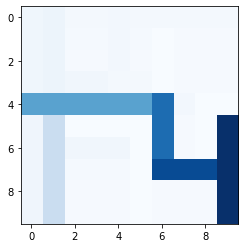

Run: 24
Team: d28d6ba3-47fa-4900-bd2b-77c1935f62f3
↓ ↓ ← ← ← ← ← ← ← ← 

↓ ← ← ← ← ← X ? ? ? 

↓ ↓ ? ? ↑ ? X ? ? ? 

↓ ↓ ← ← ← ← X ? ? ? 

→ → → → → → ↓ ← X X 

↑ ↑ X X X X ↓ ? X G 

↑ ↑ ← ← ← X ↓ ? X ↑ 

↑ ↑ ↑ ← ← X → → → ↑ 

↑ ↑ ↑ ← ← X ↓ ? ? ↑ 

↑ ↑ ↑ S ← X ↓ ? ? ↑ 



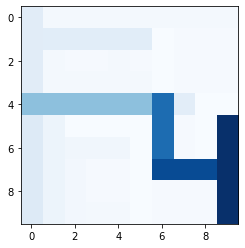

Run: 24
Team: 2632df83-c04d-4584-a777-eebc3b0dcae9
↓ ↓ ← ← ↓ ← ← ← ← ← 

↓ ↓ ← ← ← ← X ? ? ? 

↓ ↓ ? ? ↓ ? X ? ? ? 

↓ ↓ → → ↑ ← X ? ? ? 

→ → → → → → ↓ ← X X 

→ ↑ X X X X ↓ ? X G 

→ ↑ ← ← ← X ↓ ? X ↑ 

↑ ↑ ← ← ← X ↓ → ↓ ↑ 

↑ ↑ ↑ ← ← X → → → ↑ 

↑ ↑ ↑ S ← X ↑ ← ↑ ← 



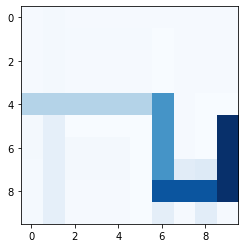

Run: 25
Team: c34d67b4-a52b-4ede-be54-078e4021e91c
↓ ↓ ? ? ? ? ? ? ? ? 

→ ↓ ← ← ← ← X ? ? ? 

↑ ↓ ? ? ? ? X ? ? ? 

↑ ↓ ? ? ? ? X ? ? ? 

→ → → → → → ↓ ← X X 

↑ ↑ X X X X ↓ ? X G 

↑ ↑ ? ↓ ? X ↓ ? X ↑ 

↑ ↑ ? ↓ ? X ↓ ? ? ↑ 

→ ↑ ← ← ← X ↓ ? ? ↑ 

↑ ↑ ← S ← X → → → ↑ 



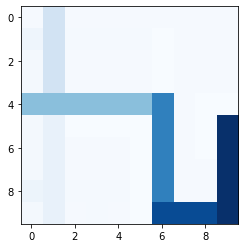

Run: 25
Team: b2d4ffac-04d6-436f-816e-82fe83761dce
↓ ↓ → → ↓ ← ← ↓ ← ← 

↓ ↓ ← ← ↓ ← X ↓ ? ? 

→ → → → ↓ ← X ↓ ← ← 

↓ ↓ ↑ ? ↓ ? X ↓ ? ? 

→ → → → → → → ↓ X X 

↑ ↑ X X X X ↓ ↓ X G 

↑ ↑ ? ↓ ? X ↓ ↓ X ↑ 

→ ↑ ← ↓ ← X ↓ ↓ ← ↑ 

↑ ↑ ← ← ← X ↓ ↓ ? ↑ 

↑ ↑ ← S ← X → → → ↑ 



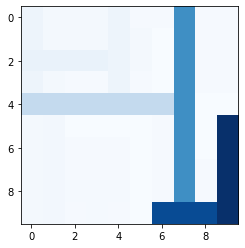

Run: 25
Team: d7a51f93-dd24-445a-98b5-5298d91cc234
↓ ↓ → → ↓ ← ← ↓ ← ← 

↓ ↑ ← ← ← ← X ↓ ? ? 

↓ ← ← ← ← ← X ↓ ← ← 

↓ ↑ ↑ ? ↓ ? X ↓ ? ? 

↓ ↑ ← ← ← ← ← ← X X 

↓ ↑ X X X X ↓ ↑ X G 

↓ ↑ ? ↓ ? X ↓ ↑ X ↓ 

↑ ↑ ← ↓ ← X ↓ ↑ ← ↓ 

↑ ↑ ← ← ← X → ↑ → ↓ 

↑ ↑ ← S ← X ↓ ↑ ? ? 



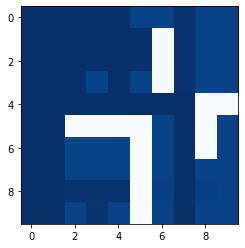

Run: 25
Team: 5c4379be-d048-4911-8052-7dbc50d1a41a
↓ ↓ → → ↓ ← ← ↓ ← ← 

↓ ↓ ↓ ← ↓ ← X ↓ ? ? 

↓ ↓ ↓ ← ↓ ← X ↓ ← ← 

↓ ↓ → → ↓ ← X ↓ ? ? 

→ → → → → → ↓ ← X X 

↑ ↑ X X X X ↓ ↑ X G 

↑ ↑ ? ↓ ? X ↓ ↑ X ↑ 

↑ ↑ ← ↓ ← X ↓ ↑ ← ↑ 

↑ ↑ ← ← ← X ↓ ↑ ? ↑ 

↑ ↑ ← S ← X → → → ↑ 



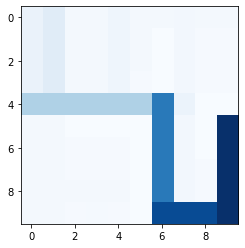

Run: 25
Team: dff8ed3e-3890-452c-83f9-a28d95ca5c9c
→ ↓ → → ↓ ← ← ← ← ← 

→ ↓ ← ← ↓ ← X ↓ ? ? 

→ ↓ → → ↓ ← X ↓ ← ← 

→ → → → ↓ ← X ↓ ? ? 

→ → → → → → ↓ ← X X 

↑ ↑ X X X X ↓ ↑ X G 

↑ ↑ ? ↓ ? X ↓ ↑ X ↑ 

↑ ↑ ← ↓ ← X ↓ ↑ ← ↑ 

↑ ↑ ← ← ← X ↓ ↑ ? ↑ 

↑ ↑ ← S ← X → → → ↑ 



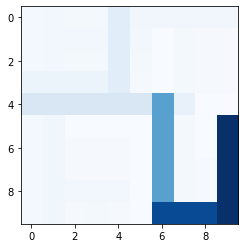

Run: 25
Team: 2bd7c466-1cf9-4640-8674-4d93a5558605
↓ ↓ → → ↓ ← ← ← ← ← 

↓ ↓ ↓ ← ↓ ← X ↓ ? ? 

→ ↓ → → ↓ ← X ↓ ← ← 

→ → → → ↓ ← X ↓ ? ? 

→ → → → → → ↓ ← X X 

↑ ↑ X X X X ↓ ↑ X G 

↑ ↑ ? ↓ ? X ↓ ↑ X ↑ 

↑ ↑ ← ↓ ← X ↓ ↑ ← ↑ 

↑ ↑ ← ← ← X ↓ ↑ ? ↑ 

↑ ↑ ← S ← X → → → ↑ 



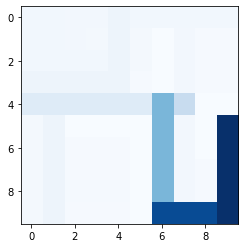

Run: 25
Team: a6bb7bd3-45c1-4781-8dfd-072572abff97
→ → → → ↓ ← ← ← ← ← 

↓ ↑ ← ← ↓ ← X ↑ ? ? 

→ → → → ↓ ← X ↑ ← ← 

→ ↑ → → ↓ ← X ↑ ? ? 

→ → → → → → ↓ ← X X 

↑ ↑ X X X X ↓ ↑ X G 

↑ ↑ ? ↓ ? X ↓ ↑ X ↑ 

↑ ↑ ← ↓ ← X ↓ ↑ ← ↑ 

→ ↑ ← ← ← X ↓ ↑ ? ↑ 

↑ ↑ ← S ← X → → → ↑ 



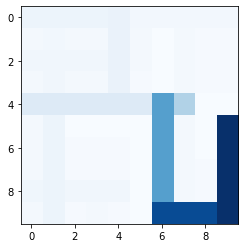

Run: 25
Team: a8e957b2-633b-4386-b6f4-0e2da0cf35ff
↓ ↓ ↓ ← ↓ ← ← ← ← ← 

↓ ↓ ← ← ↓ ← X ↓ ? ? 

→ → → → ↓ ← X ↓ ← ← 

↑ ↑ → → ↓ ← X ↑ ? ? 

→ → ← ← ← ← ↓ ← X X 

↑ ↑ X X X X ↓ ↑ X G 

↑ ↑ ? ↓ ? X ↓ ↑ X ↑ 

↑ ↑ ← ↓ ← X ↓ ↑ ← ↑ 

↑ ↑ ← ← ← X ↓ ↑ ? ↑ 

↑ ↑ ← S ← X → → → ↑ 



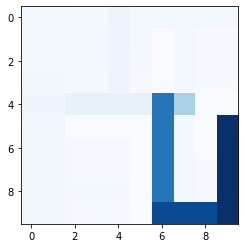

Run: 25
Team: e4852711-1831-4df4-86ff-fb8914db73db
↓ → ↓ → ↓ ← ← ← ← ← 

↓ ← ↓ ← ↓ ← X ↓ ? ? 

→ → ↓ → ↓ ← X ↓ ← ← 

→ → → → ↓ ← X ↑ ? ? 

→ → → → → → ↓ ← X X 

↑ ↓ X X X X ↓ ↑ X G 

↑ ↓ ? ↓ ? X ↓ ↑ X ↑ 

↑ ↓ ← ↓ ← X ↓ ↑ ← ↑ 

↑ ↑ ← ← ← X ↓ ↑ ? ↑ 

↑ ↑ ← S ← X → → → ↑ 



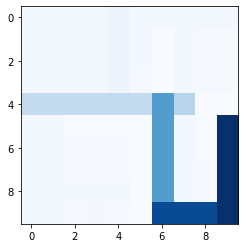

Run: 25
Team: ef2b0249-0524-4c7d-9778-bd3c32a2f0f6
→ ↓ → → ↓ ← ← ↓ ← ← 

→ ↓ ← ← ↓ ← X ↓ ? ? 

↑ ↑ → → ↓ ← X ↓ ← ← 

↑ ↑ → → ↓ ← X ↓ ? ? 

→ → → → → → ↓ ← X X 

↑ ↑ X X X X ↓ ↑ X G 

↑ ↑ ? ↓ ? X ↓ ↑ X ↑ 

↑ ↑ ← ↓ ← X ↓ ↑ ← ↑ 

↑ ↑ ← ← ← X ↓ ↑ ? ↑ 

↑ ↑ ← S ← X → → → ↑ 



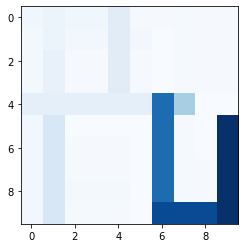

Run: 25
Team: e5f9f007-a639-4ffb-99cc-69f5a3009ebd
↓ ↓ → → ↓ ← ← ↓ ← ← 

↓ ↓ ← ← ↓ ← X ↓ ? ? 

↓ ↓ ↑ ← ↓ ← X ↓ ← ← 

↓ ↓ → → ↓ ← X ↓ ? ? 

→ → → → → → ↓ ↓ X X 

↑ ↑ X X X X ↓ ↑ X G 

↑ ↑ ? ↓ ? X ↓ ↑ X ↑ 

↑ ↑ ← ↓ ← X ↓ ↑ ← ↑ 

↑ ↑ ← ← ← X ↓ ↑ ? ↑ 

↑ ↑ ← S ← X → → → ↑ 



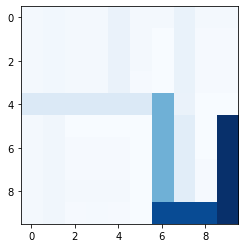

Run: 25
Team: 3c3424ef-d159-4703-8f27-8fb47ba390e6
↓ ↓ ↓ → ↓ ← ← ↓ ← ← 

↓ ↓ ↓ ← ↓ ← X ↓ ? ? 

↓ ↓ → → ↓ ← X ↓ ← ← 

→ → → → ↓ ← X ↓ ? ? 

→ → → → → → ↓ ← X X 

↑ ↑ X X X X ↓ ↑ X G 

↑ ↑ ? ↓ ? X ↓ ↑ X ↑ 

↑ ↑ ← ↓ ← X ↓ ↑ ← ↑ 

↑ ↑ ← ← ← X ↓ ↑ ? ↑ 

↑ ↑ ← S ← X → → → ↑ 



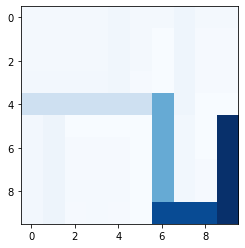

Run: 25
Team: 81d47800-3fc3-4734-9404-ce3286e9ac26
→ ↓ → → ↓ ← ← ↓ ← ← 

↓ ↓ ↓ ← ↓ ← X ↓ ? ? 

→ → → → ↓ ← X ↓ ← ← 

→ → → → ↓ ← X ↓ ? ? 

→ → → → → → ↓ ← X X 

↑ ↑ X X X X ↓ ↑ X G 

↑ ↑ ? ↓ ? X ↓ ↑ X ↑ 

↑ ↑ ← ↓ ← X ↓ ↑ ← ↑ 

↑ ↑ ← ← ← X ↓ ↑ ? ↑ 

↑ ↑ ← S ← X → → → ↑ 



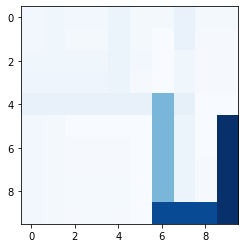

Run: 25
Team: b803f8db-ee2c-4af8-9260-647ae48b330c
↓ ↓ → → ↓ ← ← ↓ ← ← 

↓ ↓ ← ← ↓ ← X ↓ ? ? 

↓ ↓ → → ↓ ← X ↓ ← ← 

↓ ↓ → → ↓ ← X ↓ ? ? 

→ → → → → → ↓ ← X X 

↑ ↑ X X X X ↓ ↑ X G 

↑ ↑ ? ↓ ? X ↓ ↑ X ↑ 

↑ ↑ ← ↓ ← X ↓ ↑ ← ↑ 

↑ ↑ ← ← ← X ↓ ↑ ? ↑ 

↑ ↑ ← S ← X → → → ↑ 



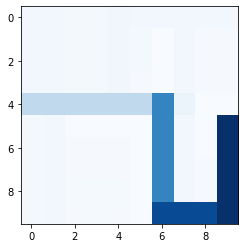

Run: 25
Team: 63ee4d1e-d5b6-45b4-a30f-aa7efc2c63ed
→ → → → ↓ ← ← ↓ ← ← 

↓ ↓ ← ← ↓ ← X ↓ ? ? 

→ → → → ↓ ← X ↓ ← ← 

→ ↑ → → ↓ ← X ↓ ? ? 

→ → → → → → ↓ ← X X 

↓ ↑ X X X X ↓ ↑ X G 

↓ ↑ ? ↓ ? X ↓ ↑ X ↑ 

↑ ↑ ← ↓ ← X ↓ ↑ ← ↑ 

↑ ↑ ← ← ← X ↓ ↑ ? ↑ 

↑ ↑ ← S ← X → → → ↑ 



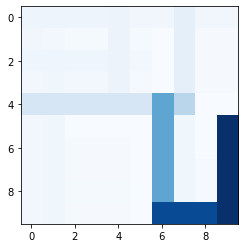

Run: 25
Team: 35aa3ba8-a279-44f0-bf41-8ede1f815b30
↓ ↓ ← ← ↓ ← ← ↓ ← ← 

→ ↓ ← ← ← ← X ↓ ? ? 

↑ ↓ ↑ → ↓ ← X ↓ ← ← 

↑ ↑ ↑ → ↓ ← X ↑ ? ? 

→ → → → → → ↓ ← X X 

↑ ↑ X X X X ↓ ↑ X G 

↑ ↑ ? ↓ ? X ↓ ↑ X ↑ 

↑ ↑ ← ↓ ← X ↓ ↑ ← ↑ 

↑ ↑ ← ← ← X ↓ ↑ ? ↑ 

↑ ↑ ← S ← X → → → ↑ 



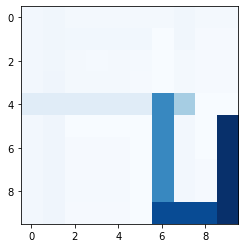

Run: 25
Team: d9036750-6230-4d52-a590-8224ee53709f
↓ ↓ → → ↓ ← ← ↓ ← ← 

↓ ↓ ← ← ↓ ← X ↓ ? ? 

→ → → → ↓ ← X ↓ ← ← 

↓ ↓ → → ↓ ← X ↓ ? ? 

→ → → → → → ↓ ← X X 

↑ ↑ X X X X ↓ ↑ X G 

↑ ↑ ? ↓ ? X ↓ ↑ X ↑ 

→ ↑ ← ↓ ← X ↓ ↑ ← ↑ 

↑ ↑ ← ← ← X ↓ ↑ ? ↑ 

↑ ↑ ← S ← X → → → ↑ 



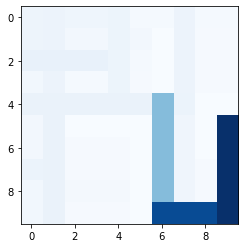

Run: 25
Team: b4ad2f2b-69fc-4427-9395-bf4fbd84e66c
↓ ↓ ← ← ← ← ← ← ← ← 

↓ ↓ ← ← ↓ ← X ↑ ? ? 

→ ↓ → → ↓ ← X ↑ ← ← 

↓ ↓ → → ↓ ← X ↑ ? ? 

→ → → → → → ↓ ← X X 

↑ ↑ X X X X ↓ ↑ X G 

↑ ↑ ? ↓ ? X ↓ ↑ X ↑ 

↑ ↑ ← ↓ ← X ↓ ↑ ← ↑ 

↑ ↑ ← ← ← X ↓ ↑ ? ↑ 

↑ ↑ ← S ← X → → → ↑ 



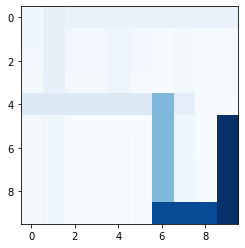

Run: 25
Team: 3967c4c4-2410-4d5d-8af6-a958820ee5d3
→ ↓ → → ↓ ← ← ← ← ← 

↓ ↓ ↓ ← ↓ ← X ↓ ? ? 

→ ↓ → → ↓ ← X ↑ ← ← 

↓ ↓ → → ↓ ← X ↑ ? ? 

→ → → → → → ↓ ← X X 

↑ ↑ X X X X ↓ ↑ X G 

↑ ↑ ? ↓ ? X ↓ ↑ X ↑ 

→ ↑ ← ↓ ← X ↓ ↑ ← ↑ 

↑ ↑ ← ← ← X ↓ ↑ ? ↑ 

↑ ↑ ← S ← X → → → ↑ 



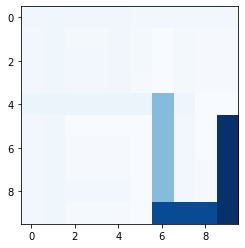

Run: 25
Team: 6cba3c2d-30f7-4cc1-b461-6c6663dbd8be
↓ ↓ ↓ → ↓ ← ← ↓ ← ← 

↓ ↓ ↓ ← ↓ ← X ↓ ? ? 

↓ ↓ ↓ ← ↓ ← X ↓ ← ← 

→ → → → ↓ ← X ↓ ? ? 

→ → → → → → ↓ ↓ X X 

↑ ↑ X X X X ↓ ↓ X G 

↑ ↑ ? ↓ ? X ↓ ↓ X ↑ 

↑ ↑ ← ↓ ← X ↓ ↑ ← ↑ 

↑ ↑ ← ← ← X ↓ ↑ ? ↑ 

↑ ↑ ← S ← X → → → ↑ 



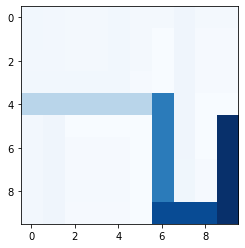

Run: 25
Team: b90cdb5d-2481-4640-937d-2b887325c97c
↓ ↓ ← ← ↓ ← ← ↓ ← ← 

↓ ← ← ← ↓ ← X ↑ ? ? 

↓ → → → ↓ ← X ↑ ← ← 

↓ → → → ↓ ← X ↑ ? ? 

→ → → → → → ↓ ← X X 

↑ ↑ X X X X ↓ ↑ X G 

↑ ↑ ? ↓ ? X ↓ ↑ X ↑ 

↑ ↑ ← ↓ ← X ↓ ↑ ← ↑ 

↑ ↑ ← ← ← X ↓ ↑ ? ↑ 

↑ ↑ ← S ← X → → → ↑ 



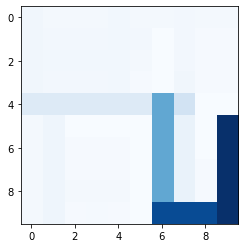

Run: 25
Team: 7afd7fd3-9637-441c-a3a5-0529be50efa5
↓ ↓ → → ↓ ← ← ↓ ← ← 

↓ ↓ ← ← ↓ ← X ↓ ? ? 

→ ↓ → → ↓ ← X ↓ ← ← 

↓ ↓ → → ↓ ← X ↓ ? ? 

→ → → → → → ↓ ← X X 

↑ ↓ X X X X ↓ ↑ X G 

↑ ↓ ? ↓ ? X ↓ ↑ X ↑ 

↑ ↓ ← ↓ ← X ↓ ↑ ← ↑ 

↑ ↑ ← ← ← X ↓ ↑ ? ↑ 

↑ ↑ ← S ← X → → → ↑ 



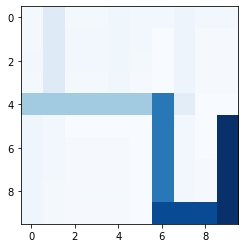

Run: 25
Team: ab98353d-9e7e-43c2-b7e3-1e4c127e50ea
↓ ↓ → → ↓ ← ← ↓ ← ← 

↓ ← ← ← ← ← X ↓ ? ? 

↓ ↓ → → ↓ ← X ↓ ← ← 

↑ ↓ → → ↓ ← X ↓ ? ? 

→ → → → → → ↓ ← X X 

↑ ↑ X X X X ↓ ↑ X G 

↑ ↑ ? ↓ ? X ↓ ↑ X ↑ 

↑ ↑ ← ↓ ← X ↓ ↑ ← ↑ 

↑ ↑ ← ← ← X ↓ ↑ ? ↑ 

↑ ↑ ← S ← X → → → ↑ 



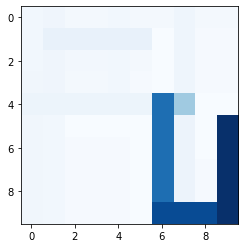

Run: 25
Team: 2ed2fecb-f826-456c-85b8-7994c457b4d4
↓ → → → ↓ ← ← ← ← ← 

↓ ← ↓ ← ↓ ← X ↑ ? ? 

↓ → → → ↓ ← X ↑ ← ← 

↓ → → → ↓ ← X ↑ ? ? 

→ → → → → → ↓ ← X X 

↑ ↑ X X X X ↓ ↑ X G 

↑ ↑ ? ↓ ? X ↓ ↑ X ↑ 

↑ ↑ ← ↓ ← X ↓ ↑ ← ↑ 

↑ ↑ ← ← ← X ↓ ↑ ? ↑ 

↑ ↑ ← S ← X → → → ↑ 



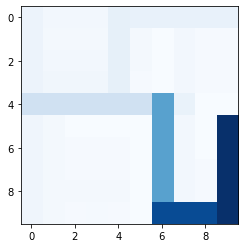

Run: 26
Team: c44194c3-a77b-4ae7-aab7-9af1aae8e628
→ → → → → → → ↓ ← ← 

? ↓ ? ? ? ↑ X ↓ ? ? 

? ↓ ? ? ? ↑ X ↓ ? ? 

? ↓ ? ? ? ↑ X ↓ ? ? 

→ → → → → ↑ ↓ ↓ X X 

? ↑ X X X X ↓ ↓ X G 

? ↑ ? ↓ ↓ X ↓ ↓ X ↑ 

? ↑ ? ↓ ↓ X ↓ ↓ ? ↑ 

? ↑ ? ↓ ↓ X ↓ ← ← ↑ 

→ ↑ ← S ← X → → → ↑ 



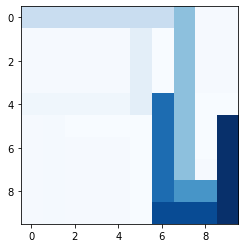

Run: 26
Team: 3151b1c9-1cdb-4ec0-b4af-fb159eded4ee
→ → → → → → → ↓ ← ← 

? ↓ ↓ ? ? ↑ X ↓ ? ? 

? ↓ ↓ ? ? ↑ X ↓ ← ← 

? ↓ ↓ ? ? ↑ X ↑ ? ? 

→ → → → → → → ↑ X X 

? ↑ X X X X ? ↑ X G 

? ↑ ? ↓ ↓ X ← ↑ X ↓ 

? ↑ ? ↓ ↓ X ← ↑ ← ↓ 

? ↑ ? ↓ ↓ X → ↑ → ← 

→ → ← S ← X → ↑ ↑ ← 



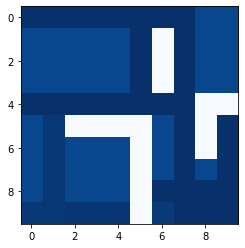

Run: 27
Team: 4ab5b633-fc37-4451-bed4-2985060f77ae
→ → → → → → → ↓ ← ← 

↑ ← ← ← ← ← X ↓ ← ← 

↑ ↓ ← ← ↓ ← X ↓ ↓ ? 

↑ ↓ ← ← ← ← X ↓ ↓ ? 

→ → → → → → ↓ ↓ X X 

↑ ← X X X X ↓ ↓ X G 

↑ ↓ → ↓ ← X ↓ ↓ X ↑ 

↑ ↓ ? ↓ ? X ↓ ← ← ↑ 

↑ ↑ ← ← ← X → → → ↑ 

↑ ↑ ← S ← X ↑ ↑ ? ? 



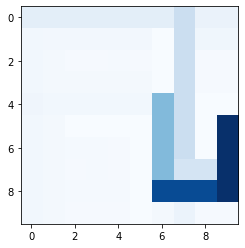

Run: 27
Team: d6d92a21-2817-45be-9449-30bc9f663918
→ → → → → → → ↓ ← ← 

↑ ← ← ← ← ← X ↓ ← ← 

↑ ↓ ← ← ↓ ← X ↓ ↓ ? 

↑ ↓ ← ← ← ← X ↓ ↓ ? 

↑ ↓ → → → → ↓ ↓ X X 

↑ ↑ X X X X ↓ ↓ X G 

↑ ↑ → ↓ ← X ↓ ↓ X ↑ 

↑ ↑ ? ↓ ? X ↓ ← ← ↑ 

↑ ↑ ← ← ← X → → → ↑ 

↑ ↑ ← S ← X ↑ ↑ ? ? 



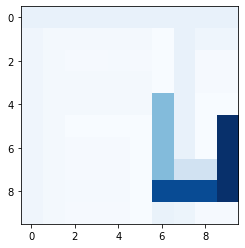

Run: 27
Team: 49fd79ad-5ab4-4740-a542-8a02480afa40
→ → → → → → → ↓ ↓ ← 

↑ ↑ ← ← ← ← X ↓ ← ← 

↑ ↑ ← ← ↓ ← X ↓ ↓ ? 

↑ ↑ ← ← ← ← X ↓ ↓ ? 

→ → → → → → → ↓ X X 

↑ ↑ X X X X ↑ ↓ X G 

↑ ↑ → ↓ ← X ↑ ↓ X ↑ 

↑ ↑ ? ↓ ? X ↑ ↓ ? ↑ 

↑ ↑ ← ← ← X → → → ↑ 

↑ ↑ ← S ← X ↑ ↑ ? ↑ 



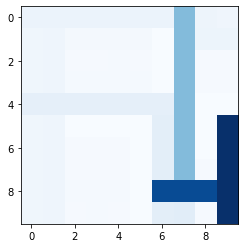

Run: 28
Team: 08150a48-e3b3-4c9c-8ec0-f5fc834053cb
→ → → → → → → ↓ ↓ ← 

→ → → → → ↓ X ↓ ↓ ? 

↑ → ↑ → → ↓ X ↓ ↓ ? 

→ → → → → ↓ X ↓ ← ← 

↑ → ↑ → → ↑ ← ↓ X X 

↑ ↑ X X X X ↓ ↓ X G 

↑ ↑ ? ? ? X ↓ ↓ X ↑ 

↑ ↑ ? ? ? X ↓ ↓ ? ↑ 

↑ ↑ ? ? ? X → → → ↑ 

↑ ↑ ← S ← X ↓ ↓ ? ↑ 



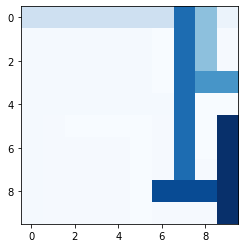

Run: 28
Team: a9373eb3-053e-48ed-822b-91eac86f3a80
→ ↓ → ← ← ↓ ← ← ← ← 

→ ↓ → → → ↓ X ↓ ↓ ? 

→ ↓ → ↑ → ↓ X ↓ ↓ ? 

→ → → → → ↓ X ↓ ← ← 

→ → → → → ↑ ← ← X X 

↑ ↑ X X X X ↓ ↓ X G 

↑ ↑ ? ? ? X ↓ ↓ X ↓ 

↑ ↑ ? ? ? X ↓ ↓ ? ↓ 

↑ ↑ ? ? ? X → → → ↓ 

↑ ↑ ← S ← X ↓ ↓ ? ? 



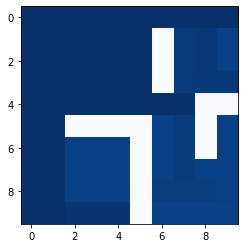

Run: 29
Team: 53ce831b-e420-467a-aa65-343f404a3056
? ↓ ? ? ? ? ? ↓ ? ? 

? ↓ ? ? ? ? X ↓ ? ? 

? ↓ ? ? ? ? X ↓ ? ? 

? ↓ ? ? ? ? X ↓ ? ? 

→ → → → → → → ↓ X X 

? ↑ X X X X ? ↓ X G 

? ↑ ? ? ? X ? ↓ X ↑ 

? ↑ ? ? ? X ? ↓ ? ↑ 

? ↑ ? ? ? X ? ↓ ? ↑ 

← ↑ ← S ← X → → → ↑ 



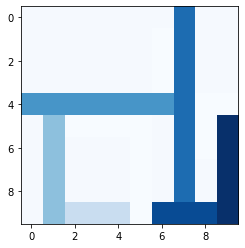

Run: 29
Team: 2157dae8-dd40-45ce-bb97-65d2dc7db0d4
→ → → → → → → ↓ ← ← 

↓ ↑ ↓ ? ? ? X ↓ ? ↑ 

↓ ↑ ↓ ? ? ? X ↓ ? ↑ 

↓ ↑ ← ← ← ← X ↓ → ↑ 

→ → → → → → → ↓ X X 

↑ ↑ X X X X ↓ ↓ X G 

↑ ↑ ← ← ← X → ↓ X ↑ 

↑ ↑ ← ← ← X ↓ ↓ ← ↑ 

↑ ↑ ↑ ↑ ? X ↓ ↓ ? ↑ 

↑ ↑ ↑ S ← X → → → ↑ 



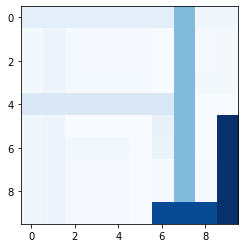

Run: 29
Team: 79b01d33-40b9-460b-a628-be82265bc723
↓ → → → → → → ↓ ← ← 

↓ ↑ ↓ ? ? ? X ↓ ? ↑ 

↓ ↑ ↓ ? ? ? X ↓ ? ↑ 

↓ ↑ ← ← ← ← X ↓ ← ← 

→ → → → → → → ↓ X X 

↑ ↑ X X X X ↓ ↓ X G 

↑ ↑ ← ← ← X → ↓ X ↑ 

↑ ← ← ← ← X ↓ ↓ ? ↑ 

↑ ↑ ↑ ↑ ? X → → → ↑ 

↑ ↑ ↑ S ← X ↓ ↑ ? ↑ 



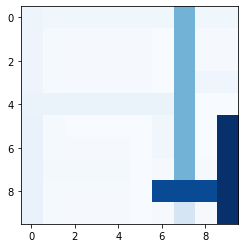

Run: 29
Team: 3dbc74e3-fbbc-4258-b5e7-c42661a2479a
→ → → → → → → ↓ ← ← 

↓ ↑ ↓ ? ? ? X ↓ ? ↑ 

↓ ↑ ↓ ? ? ? X ↓ ? ↑ 

↓ ↑ ← ← ← ← X ↓ ← ← 

→ → → → → → → ↑ X X 

↑ ↑ X X X X ↓ ↑ X G 

↑ ↑ ← ← ← X → ↑ X ↓ 

↑ ↑ ← ← ← X ↓ ↑ ↓ ↓ 

↑ ↑ ↑ ↑ ? X → ↑ ↓ ↓ 

↑ ↑ ↑ S ← X ↓ ↑ ← ← 



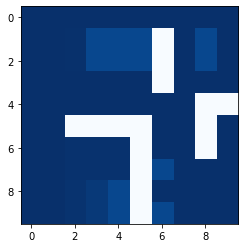

Run: 29
Team: d2dafaef-81b9-45ec-992c-f6bedf032ab4
→ → → → → → → ↓ ← ← 

↓ ↑ ↓ ? ? ? X ↓ ? ↑ 

↓ ↑ ↓ ? ? ? X ↓ ? ↑ 

↓ ↑ ← ← ← ← X ↓ ← ← 

→ → → → → → ↓ ↓ X X 

↑ ↑ X X X X ↓ ↓ X G 

↑ ↑ ← ← ← X → ↓ X ↓ 

↑ ↑ ← ← ← X ↑ ↓ ↓ ↓ 

↑ ↑ ↑ ↑ ? X ↑ → ↓ ← 

↑ ↑ ↑ S ← X ↑ ← ↑ ← 



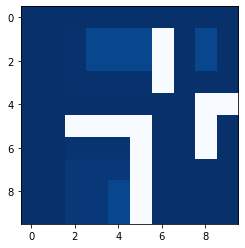

In [18]:
# importing libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

for run in range(runs):
    for team in run_winners[run]['winners']:

        print(f'Run: {run}')
        print(f'Team: {team.id}')
        
        region_action_scores = []
        for learner in team.learners:
            if learner.program.rule.value_set[0] > learner.program.rule.value_set[1]:
                region_action_scores.append({'region': learner.program.rule.region, 'action': learner.program.rule.action_set[0], 'q': learner.program.rule.value_set[0]})
            else:
                region_action_scores.append({'region': learner.program.rule.region, 'action': learner.program.rule.action_set[1], 'q': learner.program.rule.value_set[1]})

        sorted_region_action_scores = sorted(region_action_scores, key=lambda value: float(value['q']), reverse=True)
        # print(sorted_region_action_scores)
        # for record in sorted_region_action_scores:
        #     print(record)
        action_states = []
        for record in sorted_region_action_scores:
            action = ''
            if record['action'] == 0:
                action = '\u2191'
            elif record['action'] == 1:
                action = '\u2193'
            elif record['action'] == 2:
                action = '\u2192'
            elif record['action'] == 3:
                action = '\u2190'

            for i in range(record['region'][3] - record['region'][2]+1):
                state = [0, 0]
                state[record['region'][0]] = record['region'][1]
                state[not record['region'][0]] = record['region'][2] + i
                for cumulative in superimpose:
                    if cumulative['state'] == (state[0], state[1]):
                        if action == '\u2191':
                            cumulative['action_count'][0] += record['q']
                        elif action == '\u2193':
                            cumulative['action_count'][1] += record['q']
                        elif action == '\u2192':
                            cumulative['action_count'][2] += record['q']
                        elif action == '\u2190':
                            cumulative['action_count'][3] += record['q']
                
                # ensure we do not enter duplicate states
                found = 0
                for pair in action_states:
                    if pair['state'] == (state[0], state[1]):
                        found = 1

                if found == 0:
                    action_states.append({'state': (state[0], state[1]), 'action': action, 'q': record['q'] })

        # add in the rest of the states, either they are not visited, or illegal
        for n in reversed(range(env.rows)):
            for m in range(env.cols):
                action = ''
                found = 0
                for record in action_states:
                    if record['state'] == (n, m):
                        found = 1
                        action = record['action']
        #                 action = float(round(record['q'], 0))
                if found == 0:
                    if not env.check_legal((n, m)):
                        action = 'X'
                    else:
                        action = '?'
                if (n, m) == env.start_state:
                    action = 'S'
                if (n, m) == env.win_state:
                    action = 'G'
                print(f'{action} ', end='')
            print('\n')

        q_map = np.zeros((env.rows, env.cols))

        # add in the rest of the states, either they are not visited, or illegal
        for n in range(env.rows):
            for m in range(env.cols):
                action = ''
                found = 0
                for record in action_states:
                    if record['state'] == (n, m):
                        found = 1
                        action = record['q']
                if found == 0:
                    if not env.check_legal((n, m)):
                        action = -1
                    else:
                        action = 0
                q_map[(env.rows-1)-n][m] = action

        plt.imshow(q_map, cmap='Blues', interpolation='nearest')
        if (load == False):
            plt.savefig(f'qtpg/qmaps/{plotName}/{team.id}_qmap.png')
        plt.show()

#         x = []
#         y = []
#         for i in range(env.cols):
#             x.append(i)
#             y.append(i)

#         Y, X = np.meshgrid(x, y)

#         fig = plt.figure()

#         # syntax for 3-D plotting
#         ax = plt.axes(projection ='3d')

#         # syntax for plotting
#         ax.plot_surface(X, Y, q_map, cmap ='viridis', edgecolor ='green')
#         ax.set_title(f'Surface plot for {envName}')
#         plt.show()

In [19]:
actionables = []

# add in the rest of the states, either they are not visited, or illegal
for n in reversed(range(env.rows)):
    for m in range(env.cols):
        action = ''
        for record in superimpose:
            if record['state'] == (n, m):
                chosen_counts = 0
                for i in range(len(record['action_count'])):
                    if record['action_count'][i] > chosen_counts:
                        chosen_counts = record['action_count'][i]
                        if i == 0:
                            action = '\u2191'
                        elif i == 1:
                            action = '\u2193'
                        elif i == 2:
                            action = '\u2192'
                        elif i == 3:
                            action = '\u2190'
                    if chosen_counts == 0:
                        action = '?'
                    if not env.check_legal((n, m)):
                        action = 'X'
#                     if (n, m) == env.start_state:
#                         action = 'S'
                    if (n, m) == env.win_state:
                        action = 'G'
                if action != '?' and action != 'X' and action != 'G':
                    actionables.append({ 'state': (n, m), 'action': action, 'win': False })
                elif action == 'G':
                    actionables.append({ 'state': (n, m), 'action': action, 'win': True })
        
        if (n, m) == env.start_state:
            print('S ', end='')
        else:
            print(f'{action} ', end='')
    print('\n')

states = []
for actionable in actionables:
    states.append(actionable['state'])
    
win_count = 0
for actionable in actionables:
    cancel = 0
    memory = []
    start = actionable['state']
    curr = actionable
    while cancel == 0:
        if curr['action'] == '\u2191':
            state = (curr['state'][0]+1, curr['state'][1])
        elif curr['action'] == '\u2193':
            state = (curr['state'][0]-1, curr['state'][1])
        elif curr['action'] == '\u2192':
            state = (curr['state'][0], curr['state'][1]+1)
        elif curr['action'] == '\u2190':
            state = (curr['state'][0], curr['state'][1]-1)

        if state in memory:
            cancel = 1
        else:
            memory.append(state)
        
        if state == env.win_state:
            win_count += 1
            cancel = 1
    
        found = 0
        for actionable in actionables:
            if state == actionable['state']:
                curr = actionable
                found = 1
        if found == 0:
            cancel = 1

print(f'number of actionable cells: {len(actionables)}')
print(f'number of actionable cells that lead to goal: {win_count}')
print(f'% of actionable cells that lead to goal overall: {win_count / len(actionables) * 100} %')

↓ → → → → → → ↓ ← ← 

↓ ↓ ↓ ← ↓ ← X ↓ ↓ ↑ 

↓ ↓ ↓ ← ↓ ← X ↓ ↓ ↑ 

↓ ↓ ↓ → ↓ ↑ X ↓ ← ← 

→ → → → → → ↓ ↓ X X 

↑ ↑ X X X X ↓ ↓ X G 

↑ ↑ ← ← ← X ↓ ↓ X ↑ 

↑ ↑ ← ← ← X ↓ ↓ → ↑ 

↑ ↑ ← ← ← X ↓ → → ↑ 

↑ ↑ ← S ← X → → → ↑ 

number of actionable cells: 85
number of actionable cells that lead to goal: 85
% of actionable cells that lead to goal overall: 100.0 %


## Heatmap (RL)

In [20]:
# for run in range(runs):
#     for team in run_winners[run]['winners']:

#         print(f'Run: {run}')
#         print(f'Team: {team.id}')
        
#         region_action_scores = []
#         for learner in team.learners:
#             if learner.program.rule.value_set[0] > learner.program.rule.value_set[1]:
#                 region_action_scores.append({'region': learner.program.rule.region, 'action': learner.program.rule.action_set[0], 'q': learner.program.rule.value_set[0]})
#             else:
#                 region_action_scores.append({'region': learner.program.rule.region, 'action': learner.program.rule.action_set[1], 'q': learner.program.rule.value_set[1]})

#         sorted_region_action_scores = sorted(region_action_scores, key=lambda value: float(value['q']), reverse=True)

#         state_counts = []

#         for n in reversed(range(env.rows)):
#             for m in range(env.cols):
#                 state_count = 0
#                 for record in sorted_region_action_scores:
#                     for i in range(record['region'][3] - record['region'][2]+1):
#                         state = [0, 0]
#                         state[record['region'][0]] = record['region'][1]
#                         state[not record['region'][0]] = record['region'][2] + i

#                         if state == [n, m]:
#                             state_count += 1
#                         # state count logic goes here
#                 state_counts.append({'state': (n, m), 'count': state_count})

#         for n in reversed(range(env.rows)):
#             for m in range(env.cols):
#                 for record in state_counts:
#                     if (n, m) == record['state']:
#                         count = record['count']
#                         print(f'{count} ', end='')
#             print('')

In [21]:
query_average = 0
if load == False:
    for query_total in gp_query_runs:
        query_average += query_total
    query_average /= len(gp_query_runs)
else:
    for query_total in loadedQueryTotals:
        query_average += query_total
    query_average /= len(loadedQueryTotals)

print(f'Average query total: {query_average}')
loss_count = 0
for attempt in win_loss:
    if attempt == False:
        loss_count += 1
print(f'RL Runs: {len(win_loss)}')
print(f'Loss Count: {loss_count}')
print(f'Win Count: {len(win_loss) - loss_count}')
print(f'Win Ratio: {(len(win_loss) - loss_count) / len(win_loss)} --> {((len(win_loss) - loss_count) / len(win_loss)) * 100}%')

Average query total: 2454.6666666666665
RL Runs: 95
Loss Count: 20
Win Count: 75
Win Ratio: 0.7894736842105263 --> 78.94736842105263%
